## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import train_test
import friedman3Dataset
import network
import dataset
import matplotlib.pyplot as plt
import sanityChecks
import performanceMetrics
import torch 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error 
import scrapbook as sb
from statistics import mean
import numpy as np
from pytorch_tabnet.tab_model import TabNetClassifier
from pytorch_tabnet.tab_model import TabNetRegressor

## Dataset

In [3]:
#Dataset Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [4]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)

          X1           X2        X3        X4         Y
0  65.444918   271.505604  0.358532  2.763097  0.985096
1  56.435148  1590.433141  0.470603  3.388200  1.248581
2  81.479899  1149.141668  0.171266  3.561465  1.296063
3  90.143353  1594.005646  0.943088  1.557514  1.611684
4  17.735842   384.824670  0.209898  2.136009  1.495596


## Parameters 

In [5]:
n_epochs = 1000
batch_size = 32
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

## GAN Model

**Training GAN for n_epochs number of epochs** 

In [6]:
generator = network.GeneratorTabnet(n_features+1).to(device)
discriminator = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(generator.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(discriminator.parameters(), lr=0.001, betas=(0.5, 0.999))

In [7]:
discLossG1,genLossG1 = train_test.training_GAN(discriminator,generator,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,device)


tensor([[ 1.3161],
        [-0.0747],
        [-0.3543],
        [ 0.2662],
        [ 0.4531],
        [ 0.7535],
        [ 2.4019],
        [ 0.8121],
        [ 0.8524],
        [ 0.4317],
        [ 3.0470],
        [ 0.9513],
        [ 1.5359],
        [ 3.8074],
        [-0.2166],
        [ 0.1147],
        [ 1.5308],
        [-0.0813],
        [ 0.0982],
        [ 0.8774],
        [ 0.7983],
        [-0.0198],
        [-0.1701],
        [-0.3409],
        [-0.0781],
        [ 0.1780],
        [ 1.6610],
        [ 1.0128],
        [ 1.1917],
        [ 0.9692],
        [ 0.3628],
        [ 1.3428]], grad_fn=<MmBackward>)
tensor([[-0.1005],
        [-0.5992],
        [ 1.5579],
        [ 1.0982],
        [ 0.6213],
        [ 0.3406],
        [ 2.8330],
        [ 0.6169],
        [ 0.7906],
        [-0.1061],
        [ 2.4368],
        [ 1.3470],
        [ 1.1899],
        [ 1.2661],
        [ 0.1508],
        [ 0.1958],
        [ 0.5843],
        [ 0.4459],
        [-0.0110],
        

tensor([[ 0.3478],
        [ 0.4609],
        [-0.5152],
        [-0.4579],
        [ 1.1290],
        [ 1.1988],
        [ 0.5411],
        [ 1.6288],
        [ 1.0373],
        [ 0.5359],
        [ 1.6376],
        [-0.0558],
        [ 1.1935],
        [ 1.3531],
        [ 0.0395],
        [ 0.0852]], grad_fn=<MmBackward>)
tensor([[ 0.4010],
        [ 0.2652],
        [-0.3834],
        [-0.2725],
        [ 1.2824],
        [ 0.8272],
        [ 1.6026],
        [ 1.5952],
        [ 0.8094],
        [ 0.7864],
        [ 2.1513],
        [ 0.5029],
        [ 1.4182],
        [ 0.5375],
        [ 0.2771],
        [-0.0642]], grad_fn=<MmBackward>)
tensor([[ 3.4795e-01],
        [ 9.6506e-01],
        [-2.6489e-01],
        [ 3.0271e-01],
        [ 1.1451e-01],
        [ 4.9633e-01],
        [ 4.5633e-02],
        [ 6.6372e-01],
        [ 1.5455e-01],
        [ 5.3696e-01],
        [ 7.5361e-01],
        [ 5.0749e-01],
        [ 7.3412e-01],
        [-4.6034e-01],
        [ 5.2980e-01],
 

tensor([[ 0.9917],
        [ 0.1751],
        [ 0.9296],
        [ 1.6378],
        [ 0.9819],
        [ 1.1703],
        [ 2.2734],
        [ 0.8743],
        [ 0.2743],
        [ 0.6076],
        [ 0.7444],
        [ 0.4066],
        [ 0.2162],
        [-0.1452],
        [ 1.5385],
        [ 0.0829]], grad_fn=<MmBackward>)
tensor([[ 0.3427],
        [ 0.0869],
        [-0.3134],
        [ 0.8079],
        [ 0.3601],
        [ 0.0803],
        [ 0.4505],
        [ 0.6131],
        [-0.4727],
        [ 0.6551],
        [ 0.0244],
        [ 1.7792],
        [ 0.1543],
        [ 0.0589],
        [ 1.1523],
        [ 1.2033],
        [ 1.9158],
        [-0.0740],
        [-0.9418],
        [ 1.1511],
        [ 1.6296],
        [ 0.3179],
        [-0.1325],
        [ 0.4550],
        [ 1.4378],
        [ 0.6424],
        [ 1.8752],
        [ 0.1192],
        [ 0.0304],
        [ 1.5988],
        [ 1.2092],
        [ 0.2260]], grad_fn=<MmBackward>)
tensor([[ 0.2266],
        [-0.2549],
    

tensor([[ 0.5581],
        [ 0.1097],
        [-0.2342],
        [ 1.1161],
        [ 1.1227],
        [ 0.1822],
        [ 0.6537],
        [ 0.8312],
        [ 1.4207],
        [-0.0812],
        [ 1.5505],
        [ 1.1249],
        [ 0.5491],
        [-0.0287],
        [ 0.7433],
        [ 1.1725],
        [ 0.1239],
        [ 0.2467],
        [ 0.1067],
        [ 0.1076],
        [ 0.3794],
        [ 0.5171],
        [ 1.3050],
        [ 0.0142],
        [-0.1663],
        [ 1.9817],
        [ 0.0139],
        [ 1.2294],
        [ 0.9737],
        [ 1.0650],
        [-0.3024],
        [ 0.1312]], grad_fn=<MmBackward>)
tensor([[ 0.2405],
        [ 0.3418],
        [ 0.4833],
        [ 0.0297],
        [-0.0326],
        [ 2.0762],
        [ 0.5518],
        [ 0.8432],
        [-0.1818],
        [ 0.4403],
        [ 0.6806],
        [-0.3965],
        [ 0.9532],
        [ 0.5212],
        [ 1.3011],
        [ 0.1880]], grad_fn=<MmBackward>)
tensor([[ 0.5257],
        [ 0.6212],
    

tensor([[ 0.2413],
        [-0.2603],
        [ 0.1860],
        [ 0.0228],
        [-0.2503],
        [ 0.9678],
        [ 1.1761],
        [ 0.4786],
        [ 0.4637],
        [ 1.6977],
        [-0.1575],
        [ 0.4054],
        [-0.0105],
        [-0.2385],
        [ 1.7158],
        [ 0.2539],
        [ 0.2257],
        [ 3.3832],
        [ 1.0603],
        [ 0.4780],
        [ 0.0947],
        [ 0.0845],
        [-0.5412],
        [ 0.3343],
        [ 0.5569],
        [ 1.4814],
        [ 2.0059],
        [ 0.4605],
        [-0.1217],
        [ 0.1648],
        [ 0.3903],
        [-0.1634]], grad_fn=<MmBackward>)
tensor([[ 2.1733],
        [-0.0523],
        [ 0.3792],
        [ 0.2535],
        [ 0.5033],
        [-0.1127],
        [ 0.9145],
        [-0.0989],
        [ 0.5863],
        [-0.0035],
        [ 0.5074],
        [ 1.2272],
        [-0.1646],
        [-0.4319],
        [ 0.3207],
        [ 0.1968],
        [-0.0352],
        [ 0.4336],
        [-0.1902],
        

tensor([[-0.2113],
        [-0.0325],
        [ 0.8327],
        [-0.0564],
        [ 0.4870],
        [ 0.1378],
        [ 0.0369],
        [ 0.8218],
        [ 0.1277],
        [ 0.3526],
        [ 1.5047],
        [ 0.9737],
        [ 0.2236],
        [ 0.7076],
        [-0.7225],
        [ 1.0315]], grad_fn=<MmBackward>)
tensor([[-0.3195],
        [ 0.6358],
        [ 0.1353],
        [-0.1651],
        [ 0.3948],
        [ 0.0247],
        [ 0.3015],
        [ 0.2839],
        [-0.0735],
        [-0.4245],
        [ 0.4829],
        [-0.2398],
        [ 1.9458],
        [ 0.6558],
        [-0.2993],
        [ 0.6246],
        [ 0.1598],
        [ 0.4694],
        [ 0.8074],
        [ 0.0054],
        [-0.0541],
        [-0.6366],
        [-0.2196],
        [ 0.3527],
        [ 1.1281],
        [-0.2183],
        [ 0.3335],
        [ 0.3558],
        [ 0.4850],
        [ 2.8682],
        [-0.5284],
        [ 0.1611]], grad_fn=<MmBackward>)
tensor([[-0.7089],
        [ 0.5680],
    

tensor([[ 0.0533],
        [-0.2236],
        [-0.1433],
        [-0.0270],
        [ 0.0490],
        [ 1.2108],
        [ 0.5861],
        [ 0.7966],
        [ 0.4170],
        [ 0.8388],
        [ 0.5899],
        [ 0.0704],
        [-0.0035],
        [ 1.1025],
        [ 0.6584],
        [-0.6004],
        [-0.3253],
        [ 0.0821],
        [ 1.0653],
        [-0.3013],
        [ 0.0635],
        [-0.9376],
        [ 0.4403],
        [-0.0865],
        [-0.2441],
        [-0.3540],
        [ 0.7342],
        [-0.0178],
        [-0.3188],
        [-0.2115],
        [ 0.6517],
        [-0.7866]], grad_fn=<MmBackward>)
tensor([[ 2.5512],
        [ 1.2009],
        [ 0.7239],
        [-0.2395],
        [-0.3692],
        [-0.2660],
        [ 0.3013],
        [ 1.1605],
        [-0.3103],
        [ 0.4396],
        [-0.0416],
        [ 0.0897],
        [-0.2408],
        [ 0.3827],
        [ 2.5665],
        [-0.0855],
        [-0.0844],
        [ 0.6703],
        [ 1.1222],
        

tensor([[ 2.7105],
        [ 0.3482],
        [-0.0389],
        [-0.1819],
        [-0.5910],
        [ 0.0120],
        [ 0.4018],
        [ 1.6465],
        [ 0.4145],
        [ 0.5202],
        [-0.2710],
        [-0.7143],
        [-0.3947],
        [ 0.5395],
        [ 2.1959],
        [ 0.0161],
        [ 0.0281],
        [-0.2625],
        [ 2.1796],
        [ 0.2516],
        [-0.1412],
        [-0.2368],
        [-0.2229],
        [-0.1831],
        [ 0.4305],
        [ 0.7507],
        [-0.4162],
        [ 0.3649],
        [ 0.2334],
        [ 0.2655],
        [-0.9729],
        [ 0.2622]], grad_fn=<MmBackward>)
tensor([[ 0.2194],
        [-0.3582],
        [ 0.1054],
        [-0.2915],
        [ 0.0975],
        [-0.9130],
        [ 0.6153],
        [ 0.9420],
        [ 0.2311],
        [ 0.9213],
        [ 0.6772],
        [-0.2825],
        [-0.4359],
        [ 0.5836],
        [-0.5403],
        [-0.2778]], grad_fn=<MmBackward>)
tensor([[ 3.5183e-01],
        [ 1.6415e-0

tensor([[ 0.4197],
        [ 0.3739],
        [ 0.0549],
        [ 0.6333],
        [-0.2685],
        [-0.6566],
        [-0.1983],
        [ 0.4359],
        [-0.2809],
        [-0.5768],
        [-0.5403],
        [ 0.3742],
        [-0.3093],
        [-0.0742],
        [-0.1960],
        [ 0.0482]], grad_fn=<MmBackward>)
tensor([[ 0.6040],
        [ 0.1599],
        [-0.0200],
        [-0.2001],
        [-0.2645],
        [-0.9161],
        [ 0.0317],
        [ 0.5284],
        [-0.4739],
        [ 0.6578],
        [-0.5898],
        [-0.3049],
        [ 1.0694],
        [ 0.3388],
        [-0.3960],
        [-0.2760]], grad_fn=<MmBackward>)
tensor([[-0.0742],
        [-0.2397],
        [ 0.1447],
        [-0.0939],
        [ 0.1775],
        [ 0.0437],
        [-0.2715],
        [ 0.3705],
        [-0.1971],
        [-0.2649],
        [-0.0107],
        [ 1.0233],
        [ 1.1815],
        [-0.0389],
        [-0.4017],
        [-0.2442],
        [ 0.2165],
        [ 0.7926],
    

tensor([[-0.9704],
        [ 0.6189],
        [-0.0308],
        [ 0.3295],
        [-0.4471],
        [-0.0017],
        [ 0.0603],
        [-0.0686],
        [-0.6322],
        [ 0.1023],
        [-0.5284],
        [-0.0655],
        [ 0.0314],
        [ 0.0954],
        [ 0.7761],
        [ 1.2778]], grad_fn=<MmBackward>)
tensor([[-0.3303],
        [ 1.1129],
        [-0.0955],
        [-0.0777],
        [ 0.3461],
        [ 0.0660],
        [-0.3452],
        [-0.3953],
        [-1.0441],
        [-0.3636],
        [-0.2910],
        [ 0.5313],
        [-0.4921],
        [-0.4968],
        [-0.2161],
        [ 0.0936],
        [ 1.0926],
        [ 0.1972],
        [-0.6051],
        [-0.0370],
        [ 0.0331],
        [ 0.6133],
        [-0.5641],
        [ 0.1341],
        [ 1.2082],
        [ 0.2243],
        [ 0.6044],
        [-0.5577],
        [-0.5601],
        [ 0.5279],
        [-0.6109],
        [ 0.3833]], grad_fn=<MmBackward>)
tensor([[-0.6655],
        [ 1.5767],
    

tensor([[-0.8446],
        [ 0.0911],
        [-0.0524],
        [-0.2296],
        [-1.3513],
        [ 0.0704],
        [ 0.0097],
        [-0.2310],
        [-0.3394],
        [ 0.3298],
        [ 0.0059],
        [ 0.8591],
        [-0.2028],
        [ 0.3088],
        [-0.1348],
        [-0.1770]], grad_fn=<MmBackward>)
tensor([[-0.5850],
        [-0.7657],
        [-0.4598],
        [-0.2422],
        [ 0.1304],
        [ 0.2153],
        [-0.7168],
        [-0.9333],
        [-0.1403],
        [-0.0935],
        [-0.3360],
        [ 0.2765],
        [ 0.2041],
        [ 0.2825],
        [ 1.1612],
        [-0.1537],
        [ 0.2714],
        [ 1.5713],
        [-0.4348],
        [ 0.1781],
        [ 0.1764],
        [ 0.4404],
        [-0.0531],
        [-0.0762],
        [-0.3192],
        [-0.1501],
        [ 0.7775],
        [-0.0833],
        [ 0.1480],
        [-0.2384],
        [-0.7789],
        [-0.9715]], grad_fn=<MmBackward>)
tensor([[-0.4465],
        [-0.7552],
    

tensor([[-0.9673],
        [ 0.1274],
        [-0.4550],
        [ 0.6980],
        [-0.7537],
        [ 0.5489],
        [-0.1227],
        [-0.0586],
        [ 0.1163],
        [-0.1208],
        [-0.0500],
        [-0.2816],
        [-0.7227],
        [-0.2216],
        [-0.9573],
        [-0.6008]], grad_fn=<MmBackward>)
tensor([[-0.8156],
        [-0.0673],
        [-1.1695],
        [ 0.3681],
        [ 0.0546],
        [-0.1152],
        [-0.0018],
        [ 0.1353],
        [-0.0860],
        [-0.2166],
        [ 0.4908],
        [-0.1080],
        [ 0.3353],
        [-0.4573],
        [ 0.0911],
        [-0.5087],
        [-0.5208],
        [ 0.0166],
        [-0.1998],
        [-0.4957],
        [-0.6152],
        [-1.1909],
        [-0.1562],
        [-0.5269],
        [-1.2259],
        [ 0.2141],
        [-0.1104],
        [ 0.1274],
        [-0.0618],
        [-0.0170],
        [-0.7586],
        [ 0.1295]], grad_fn=<MmBackward>)
tensor([[-0.2895],
        [-0.3969],
    

tensor([[ 0.3941],
        [-0.1949],
        [ 0.9005],
        [-0.6432],
        [-1.0210],
        [-0.1732],
        [-0.4147],
        [-0.6619],
        [ 0.3259],
        [-0.2138],
        [ 0.0584],
        [-0.3836],
        [-0.1758],
        [-0.3569],
        [-0.2430],
        [-0.7491]], grad_fn=<MmBackward>)
tensor([[-1.2457],
        [-0.5981],
        [-0.2986],
        [ 0.1778],
        [-0.1654],
        [-0.6702],
        [-0.0585],
        [-0.4284],
        [ 0.1997],
        [-0.1786],
        [-2.0890],
        [ 0.0802],
        [ 0.4689],
        [-0.1930],
        [-1.1351],
        [-0.3345],
        [ 0.2357],
        [ 0.0679],
        [-0.2837],
        [ 0.0217],
        [-0.7730],
        [-0.3474],
        [-0.3902],
        [ 0.7276],
        [-0.1060],
        [-0.4703],
        [-0.7173],
        [-0.6637],
        [-0.2705],
        [-0.4065],
        [-0.5389],
        [ 0.0201]], grad_fn=<MmBackward>)
tensor([[-0.9343],
        [-0.4696],
    

tensor([[ 0.1047],
        [-0.3846],
        [-0.0830],
        [-1.3708],
        [-0.2882],
        [-0.6439],
        [-0.7578],
        [-0.3038],
        [-0.2634],
        [-0.0399],
        [-0.1633],
        [-0.2019],
        [-0.0736],
        [ 0.3573],
        [-0.6913],
        [ 0.3968]], grad_fn=<MmBackward>)
tensor([[ 0.1438],
        [-0.4066],
        [ 0.1791],
        [-0.3539],
        [ 0.0178],
        [ 0.2359],
        [-0.3597],
        [-0.3497],
        [-0.3399],
        [-0.0578],
        [-0.7358],
        [-1.0397],
        [-0.7012],
        [ 0.9205],
        [-0.5725],
        [ 0.2857],
        [-0.6677],
        [-0.4716],
        [-0.6062],
        [-1.7513],
        [-0.3570],
        [-1.2632],
        [-0.2165],
        [-0.5242],
        [-0.4138],
        [-0.3231],
        [-0.7763],
        [-0.0555],
        [ 0.1357],
        [-0.3315],
        [-0.3333],
        [-0.6499]], grad_fn=<MmBackward>)
tensor([[ 3.7689e-01],
        [-4.0194e-0

tensor([[-0.4162],
        [ 0.3004],
        [ 0.1059],
        [ 0.0759],
        [ 1.1349],
        [-0.5999],
        [ 0.2819],
        [ 0.3463],
        [-0.0438],
        [-0.4405],
        [-1.0160],
        [-0.5840],
        [-1.4405],
        [-0.9968],
        [-0.6226],
        [-0.4858]], grad_fn=<MmBackward>)
tensor([[-0.1842],
        [-0.2439],
        [-0.4589],
        [-0.3423],
        [ 0.1670],
        [-1.4257],
        [ 0.0182],
        [ 0.0214],
        [ 0.2522],
        [-0.7921],
        [-1.0911],
        [ 0.3478],
        [-0.7743],
        [-0.4283],
        [-0.3952],
        [-0.6585]], grad_fn=<MmBackward>)
tensor([[-1.0594],
        [ 0.0931],
        [-0.3067],
        [-0.4842],
        [-0.7816],
        [ 0.6698],
        [-0.9725],
        [-0.6661],
        [-0.6504],
        [-1.5791],
        [-0.6516],
        [-0.0653],
        [ 0.0399],
        [-0.5342],
        [ 0.1420],
        [-0.2343],
        [-0.2107],
        [-1.2657],
    

tensor([[-1.4282],
        [-0.1942],
        [ 0.2855],
        [-1.8867],
        [-0.7052],
        [-0.0559],
        [-1.0091],
        [ 0.3182],
        [-0.2245],
        [ 0.2651],
        [ 0.1908],
        [-0.5342],
        [ 0.2266],
        [-1.4244],
        [-0.3603],
        [-0.0618]], grad_fn=<MmBackward>)
tensor([[-0.1465],
        [-1.3831],
        [-0.4271],
        [-0.5441],
        [ 0.1981],
        [-1.1420],
        [-0.0697],
        [-0.1363],
        [-1.9057],
        [-1.3659],
        [ 0.0118],
        [-0.6472],
        [-1.2389],
        [-0.7823],
        [ 0.0290],
        [-0.5819],
        [ 0.2957],
        [ 0.1883],
        [-0.2847],
        [ 0.4323],
        [-0.7792],
        [-0.5736],
        [ 0.6484],
        [ 0.0501],
        [-1.1653],
        [-0.1021],
        [-0.2977],
        [ 0.1077],
        [-0.3229],
        [-0.2194],
        [-0.6246],
        [ 0.0649]], grad_fn=<MmBackward>)
tensor([[ 1.3581],
        [-0.8454],
    

tensor([[-2.5243],
        [-0.3327],
        [-0.7360],
        [ 0.1896],
        [ 0.0906],
        [-1.1180],
        [ 1.1992],
        [-0.0675],
        [-1.0171],
        [ 0.1701],
        [ 0.9486],
        [ 0.0238],
        [-0.2520],
        [-0.7391],
        [-0.4598],
        [-0.7460]], grad_fn=<MmBackward>)
tensor([[-0.6753],
        [-0.2318],
        [-0.8260],
        [-0.0924],
        [-0.7155],
        [-0.3108],
        [-0.4039],
        [-0.6301],
        [ 0.0286],
        [ 0.9214],
        [ 0.1027],
        [-2.4090],
        [-0.7249],
        [-0.6466],
        [-0.1275],
        [-0.5124],
        [-0.1331],
        [-0.3631],
        [ 0.6984],
        [-0.1406],
        [-0.3012],
        [-0.0249],
        [-0.3972],
        [-0.7162],
        [-2.7837],
        [ 1.0128],
        [ 0.0720],
        [ 0.5281],
        [-0.1466],
        [-1.0283],
        [-0.3323],
        [ 0.9855]], grad_fn=<MmBackward>)
tensor([[-1.6986],
        [-0.3056],
    

tensor([[-1.4695],
        [ 0.6835],
        [-0.8123],
        [-0.3165],
        [-0.5305],
        [-0.3836],
        [ 0.1801],
        [-0.8058],
        [-0.5131],
        [-1.0272],
        [ 0.5718],
        [-0.2380],
        [-1.0023],
        [-0.2962],
        [ 2.4151],
        [-0.6393]], grad_fn=<MmBackward>)
tensor([[-0.8508],
        [ 2.3341],
        [-0.4161],
        [-0.5953],
        [-0.9869],
        [-1.7824],
        [-0.0916],
        [-0.7862],
        [-0.1537],
        [-0.7555],
        [-0.3073],
        [ 0.0345],
        [-0.5490],
        [-0.5639],
        [-1.3017],
        [-0.2123],
        [-1.1137],
        [-0.1358],
        [ 0.1463],
        [ 0.9682],
        [-0.0739],
        [-0.0710],
        [-0.9108],
        [-1.5163],
        [ 0.0289],
        [-0.3974],
        [-0.7932],
        [ 0.8177],
        [-0.4619],
        [ 0.0557],
        [ 0.4531],
        [ 1.8769]], grad_fn=<MmBackward>)
tensor([[-1.0896],
        [ 1.4283],
    

tensor([[ 0.0995],
        [-0.7705],
        [ 0.0477],
        [-0.3403],
        [ 0.4483],
        [-0.5757],
        [-0.6447],
        [-1.6626],
        [-0.1183],
        [ 0.7226],
        [ 0.5196],
        [-0.3268],
        [ 0.0864],
        [-1.1506],
        [ 0.0957],
        [-0.0989]], grad_fn=<MmBackward>)
tensor([[ 0.2077],
        [-0.3613],
        [ 0.4228],
        [-0.3694],
        [ 0.0523],
        [-0.4281],
        [-0.3667],
        [-1.3902],
        [-0.2918],
        [ 0.4964],
        [ 0.1598],
        [-0.2346],
        [ 0.1725],
        [-0.4290],
        [ 0.4887],
        [-0.0175]], grad_fn=<MmBackward>)
tensor([[ 0.3082],
        [-0.1830],
        [-0.6280],
        [ 0.4645],
        [-0.2872],
        [-0.1400],
        [ 0.2402],
        [-0.3057],
        [-1.1021],
        [ 0.1615],
        [-0.5190],
        [-0.6794],
        [-0.9285],
        [-0.0827],
        [ 0.6956],
        [-0.4592],
        [-0.2095],
        [-0.4670],
    

tensor([[-1.2507],
        [-1.4738],
        [ 0.0225],
        [ 1.5066],
        [-0.0202],
        [-0.7882],
        [ 0.2505],
        [-0.0490],
        [-0.2756],
        [-0.2656],
        [-0.5004],
        [-0.2745],
        [ 0.1600],
        [-0.4340],
        [-0.0018],
        [-0.1376]], grad_fn=<MmBackward>)
tensor([[ 1.3858],
        [ 0.4627],
        [-0.5662],
        [ 0.5456],
        [-0.6591],
        [ 1.4398],
        [-0.5654],
        [-0.1398],
        [ 0.4688],
        [ 1.3056],
        [-0.1983],
        [ 0.0436],
        [-1.0248],
        [ 0.6038],
        [ 1.5470],
        [ 0.3072],
        [-1.0994],
        [-0.0343],
        [-2.3009],
        [-0.1438],
        [-0.1430],
        [ 1.4139],
        [-0.4637],
        [-1.8436],
        [-0.8054],
        [-0.4305],
        [ 0.0072],
        [-0.1743],
        [-1.2708],
        [-0.5903],
        [ 0.5308],
        [ 0.3433]], grad_fn=<MmBackward>)
tensor([[ 1.5734e+00],
        [ 4.7109e-0

tensor([[-0.9601],
        [ 0.5592],
        [-1.0416],
        [ 0.7762],
        [ 0.4850],
        [-0.2011],
        [-0.8991],
        [-0.1813],
        [ 0.2899],
        [ 1.5024],
        [ 0.6001],
        [-0.0864],
        [ 1.1251],
        [ 0.8953],
        [-0.8265],
        [ 0.4940]], grad_fn=<MmBackward>)
tensor([[-2.0037],
        [-0.0755],
        [-0.6660],
        [ 2.0475],
        [ 0.6334],
        [-0.3900],
        [ 0.0471],
        [ 0.5040],
        [-0.8683],
        [ 0.1772],
        [-1.2150],
        [-0.3147],
        [-0.3189],
        [-0.3682],
        [ 1.3518],
        [ 0.0991],
        [ 0.0451],
        [-1.2727],
        [ 0.1797],
        [ 0.1042],
        [ 0.5724],
        [ 0.2855],
        [ 0.2567],
        [-1.6039],
        [-0.7030],
        [ 0.6963],
        [ 2.0148],
        [ 0.8076],
        [ 0.4751],
        [-0.0895],
        [-0.4866],
        [-1.2152]], grad_fn=<MmBackward>)
tensor([[-1.8331],
        [ 0.0735],
    

tensor([[-1.2891e+00],
        [-2.4964e-01],
        [-3.7865e-01],
        [ 5.7138e-01],
        [-2.8966e-01],
        [-4.6641e-01],
        [-1.2367e+00],
        [-1.9729e+00],
        [ 6.4459e-01],
        [ 1.2239e-01],
        [ 2.5823e-01],
        [ 6.2045e-01],
        [-1.7037e-01],
        [ 3.7265e-01],
        [ 6.9499e-02],
        [ 4.7017e-01],
        [-2.6164e-01],
        [-6.0185e-01],
        [ 1.0448e+00],
        [ 7.1835e-04],
        [-7.5675e-01],
        [ 8.0087e-01],
        [ 5.8627e-01],
        [-2.8988e-01],
        [-3.9868e-01],
        [ 9.9208e-01],
        [-6.8247e-01],
        [ 2.5127e+00],
        [ 1.7086e+00],
        [ 4.9480e-01],
        [-2.3864e-02],
        [ 1.2408e-01]], grad_fn=<MmBackward>)
tensor([[-2.6154],
        [-0.1367],
        [-0.2343],
        [-0.0611],
        [-0.4552],
        [-0.4221],
        [-1.4623],
        [ 0.3391],
        [ 0.7632],
        [-0.5882],
        [-0.1757],
        [ 1.3661],
        [ 0.0

tensor([[-2.3656],
        [-0.5010],
        [-0.7041],
        [ 0.9990],
        [ 0.9410],
        [ 0.5139],
        [-0.7521],
        [-0.1656],
        [ 0.2454],
        [ 0.1288],
        [-0.1780],
        [ 0.8983],
        [-1.8578],
        [ 0.8826],
        [ 2.3345],
        [ 0.8540],
        [ 0.3714],
        [ 0.0549],
        [ 0.2543],
        [-1.3395],
        [-0.0818],
        [ 0.0448],
        [ 0.9313],
        [ 1.9843],
        [-0.6733],
        [ 0.1445],
        [-1.5292],
        [ 1.2864],
        [ 3.2521],
        [ 0.9531],
        [ 0.9032],
        [-0.3596]], grad_fn=<MmBackward>)
tensor([[-0.1620],
        [-0.2786],
        [ 0.0972],
        [-1.0254],
        [-1.1795],
        [ 1.0128],
        [-0.7892],
        [ 0.3481],
        [ 1.4062],
        [ 0.8829],
        [ 0.2154],
        [-0.7511],
        [ 0.2715],
        [ 1.5799],
        [ 0.3650],
        [-0.1093],
        [ 0.2592],
        [ 0.1471],
        [-1.2121],
        

tensor([[-0.2664],
        [-2.7734],
        [ 1.6737],
        [ 1.3597],
        [-0.0299],
        [-0.3685],
        [ 1.7609],
        [-1.0410],
        [ 0.8343],
        [-0.2796],
        [-0.2248],
        [ 0.7632],
        [-0.1894],
        [-0.6066],
        [-0.4408],
        [ 0.7667]], grad_fn=<MmBackward>)
tensor([[ 1.2565e-01],
        [-3.6278e-01],
        [ 2.5134e-01],
        [ 2.4721e+00],
        [ 1.0349e-01],
        [-6.6160e-01],
        [ 6.3810e-01],
        [ 6.8385e-01],
        [-8.1716e-01],
        [-2.1778e-01],
        [ 1.6251e+00],
        [ 9.9012e-01],
        [ 5.1623e-01],
        [ 1.7760e-01],
        [ 1.6940e+00],
        [ 5.7192e-01],
        [ 7.0478e-01],
        [-8.3824e-04],
        [-9.5065e-02],
        [-5.8642e-01],
        [ 1.3310e+00],
        [ 3.0420e+00],
        [-3.6722e+00],
        [-9.5858e-01],
        [-4.7532e-01],
        [-4.3506e-01],
        [-7.3268e-01],
        [ 1.1632e+00],
        [-5.3705e-01],
      

tensor([[ 0.5476],
        [-0.5846],
        [ 1.5486],
        [ 0.7723],
        [-0.6867],
        [-0.2076],
        [-3.0146],
        [-0.8030],
        [-0.9909],
        [-0.3298],
        [ 0.9946],
        [-0.3454],
        [-0.3432],
        [ 1.4909],
        [ 0.5803],
        [ 2.2721]], grad_fn=<MmBackward>)
tensor([[-1.3846],
        [-0.4283],
        [-0.1013],
        [ 0.9822],
        [ 0.6194],
        [-0.2504],
        [-1.3023],
        [ 0.0042],
        [-0.6546],
        [-0.1645],
        [ 0.6848],
        [ 2.5317],
        [-0.1171],
        [ 0.5221],
        [ 0.3737],
        [ 0.2442]], grad_fn=<MmBackward>)
tensor([[-7.3956e-01],
        [-3.5648e-01],
        [ 1.4614e-01],
        [-5.9558e-01],
        [-1.4821e+00],
        [ 7.9944e-01],
        [-1.1561e-01],
        [ 2.4723e+00],
        [-8.0941e-01],
        [ 8.6369e-01],
        [ 1.3343e+00],
        [-6.8975e-01],
        [-7.2655e-01],
        [ 7.4554e-01],
        [ 1.2433e+00],
 

tensor([[ 0.2179],
        [ 2.1280],
        [ 0.3952],
        [ 0.0251],
        [ 0.2615],
        [ 0.5059],
        [ 1.4209],
        [ 0.6263],
        [ 0.3297],
        [-0.0232],
        [ 2.7273],
        [-2.8751],
        [-0.1345],
        [-0.2230],
        [ 1.0185],
        [ 0.3896],
        [-1.0640],
        [-0.2107],
        [-0.5014],
        [-0.5662],
        [-0.9481],
        [-2.1201],
        [-0.2595],
        [ 0.5289],
        [ 0.6485],
        [-2.2452],
        [-0.2983],
        [ 0.1663],
        [ 1.0487],
        [ 0.1205],
        [ 0.1148],
        [ 0.1021]], grad_fn=<MmBackward>)
tensor([[ 0.4995],
        [ 1.2973],
        [-0.3014],
        [-1.4479],
        [-0.4360],
        [ 1.3861],
        [ 0.7202],
        [ 0.0630],
        [ 0.9275],
        [-0.4083],
        [ 1.5378],
        [-2.8771],
        [ 1.4064],
        [ 2.0842],
        [ 2.0953],
        [ 0.1690],
        [-0.2464],
        [-0.9722],
        [-0.3631],
        

tensor([[-0.0556],
        [ 0.4710],
        [-0.7878],
        [ 0.8800],
        [ 0.1175],
        [-0.3470],
        [-0.9619],
        [ 0.1155],
        [-0.2513],
        [-2.0763],
        [ 0.1809],
        [ 2.9217],
        [-0.4536],
        [ 0.7799],
        [ 0.0204],
        [-0.1020]], grad_fn=<MmBackward>)
tensor([[-1.2868],
        [-0.5160],
        [ 0.8752],
        [-0.3220],
        [ 0.6922],
        [ 1.1223],
        [ 0.2056],
        [-0.0248],
        [ 0.6700],
        [ 1.2706],
        [ 0.2239],
        [ 1.2717],
        [-0.6059],
        [-0.3055],
        [-0.1971],
        [ 0.5570],
        [ 1.0534],
        [ 0.4022],
        [-0.4903],
        [-0.8658],
        [ 0.3680],
        [-0.1676],
        [-1.2660],
        [ 0.0513],
        [-0.2536],
        [ 0.4160],
        [-2.1964],
        [-0.8119],
        [-1.3219],
        [-0.3241],
        [ 0.1430],
        [ 1.1181]], grad_fn=<MmBackward>)
tensor([[ 0.4721],
        [-0.7661],
    

tensor([[-1.4978],
        [ 0.2111],
        [-2.1690],
        [ 0.9982],
        [ 0.6738],
        [-0.7990],
        [ 1.5202],
        [-0.2660],
        [ 0.1380],
        [ 1.0574],
        [-0.5130],
        [ 0.0375],
        [ 1.0987],
        [-0.7042],
        [ 0.4330],
        [ 0.4113]], grad_fn=<MmBackward>)
tensor([[ 2.9293e-01],
        [-1.9045e+00],
        [ 5.3781e-01],
        [ 7.1754e-01],
        [ 1.0827e+00],
        [-4.6892e-01],
        [ 4.5110e-01],
        [-2.6681e-01],
        [ 4.0366e-01],
        [-4.7021e-01],
        [ 1.7628e-01],
        [-4.2896e-01],
        [-1.3659e+00],
        [ 3.0588e-01],
        [-6.5821e-01],
        [ 1.3734e-01],
        [ 1.5338e+00],
        [-1.7039e-01],
        [-1.1122e-04],
        [ 8.5417e-01],
        [-1.0065e-01],
        [-1.8808e-01],
        [-1.2716e+00],
        [-2.6187e+00],
        [ 1.0009e+00],
        [-1.3030e+00],
        [-7.3025e-01],
        [ 4.9073e-01],
        [-6.1536e-01],
      

tensor([[ 0.6871],
        [ 0.3210],
        [ 0.3905],
        [ 0.8489],
        [-0.0843],
        [ 0.0497],
        [ 0.8471],
        [ 0.3415],
        [-1.0500],
        [ 0.3935],
        [ 0.3019],
        [-0.9637],
        [-3.6259],
        [ 0.4384],
        [-0.6236],
        [ 0.9331]], grad_fn=<MmBackward>)
tensor([[ 0.0680],
        [ 0.3071],
        [ 0.4558],
        [-0.6844],
        [-0.8937],
        [ 0.5117],
        [-0.9136],
        [-0.0910],
        [ 0.5008],
        [-0.8184],
        [-0.2502],
        [ 1.2496],
        [ 0.3890],
        [ 0.4489],
        [-0.8628],
        [-0.0183],
        [ 0.4556],
        [ 0.4218],
        [-1.5061],
        [-2.9747],
        [ 0.3453],
        [-0.2295],
        [ 1.9552],
        [ 0.9218],
        [-1.3973],
        [-0.0199],
        [ 0.0488],
        [-1.1821],
        [-1.3421],
        [ 1.2904],
        [ 1.7425],
        [-0.3802]], grad_fn=<MmBackward>)
tensor([[ 0.0156],
        [ 0.2422],
    

tensor([[ 0.2240],
        [ 1.6633],
        [-0.1060],
        [ 0.1614],
        [-2.1417],
        [ 0.7247],
        [-0.0479],
        [ 0.3309],
        [ 1.2240],
        [-0.4214],
        [-0.2323],
        [-0.2104],
        [-0.1827],
        [-0.2092],
        [ 0.8547],
        [ 0.8718],
        [ 0.1900],
        [-4.3347],
        [-0.6388],
        [ 0.6953],
        [ 0.2514],
        [-0.6547],
        [ 1.0747],
        [-0.1571],
        [-0.3517],
        [-0.5488],
        [-1.1011],
        [-0.5188],
        [ 0.2593],
        [-0.1221],
        [ 0.4799],
        [ 0.6054]], grad_fn=<MmBackward>)
tensor([[ 0.5880],
        [ 1.7137],
        [-0.2044],
        [-0.6770],
        [-0.3632],
        [ 0.2581],
        [-0.9957],
        [ 0.9846],
        [ 0.3119],
        [-0.6626],
        [-0.2404],
        [ 0.4703],
        [-0.2863],
        [-0.2825],
        [ 1.1101],
        [ 0.0119],
        [ 2.3908],
        [-3.3084],
        [-0.4115],
        

tensor([[ 0.1571],
        [ 0.2207],
        [ 0.7286],
        [-1.4726],
        [-0.6382],
        [-1.7204],
        [ 0.4503],
        [-0.2396],
        [-0.1224],
        [-0.5726],
        [-0.2642],
        [-0.0550],
        [ 0.9600],
        [-0.3750],
        [ 0.4217],
        [ 1.4373]], grad_fn=<MmBackward>)
tensor([[ 0.3761],
        [-0.2390],
        [ 0.2676],
        [-0.3714],
        [ 0.2027],
        [-0.4080],
        [ 0.3298],
        [ 0.3605],
        [-0.3234],
        [-0.8975],
        [-1.3489],
        [-0.9213],
        [ 1.4619],
        [ 0.1683],
        [-0.0760],
        [ 1.6670]], grad_fn=<MmBackward>)
tensor([[-1.8666e-01],
        [ 1.4356e+00],
        [-2.5275e+00],
        [ 4.5953e-01],
        [ 1.0409e-01],
        [-5.1550e-01],
        [-1.0021e+00],
        [-1.3522e+00],
        [ 3.6733e-02],
        [ 8.4226e-01],
        [ 3.1017e-01],
        [ 8.0279e-01],
        [ 5.0468e-01],
        [-4.5811e-01],
        [-2.2645e-01],
 

tensor([[ 0.3618],
        [ 0.2359],
        [-0.2153],
        [ 0.7990],
        [-0.0655],
        [ 0.6604],
        [ 0.4632],
        [ 0.0500],
        [ 0.3886],
        [-0.5524],
        [-2.8524],
        [-0.6745],
        [-0.1316],
        [-0.5568],
        [-1.2295],
        [ 0.6918]], grad_fn=<MmBackward>)
tensor([[ 0.9163],
        [ 0.5994],
        [-1.2114],
        [ 0.4958],
        [-0.3263],
        [ 0.1511],
        [ 0.1458],
        [ 1.1087],
        [ 0.7112],
        [ 0.1320],
        [-1.1172],
        [ 0.1050],
        [-0.5612],
        [ 0.5473],
        [-2.3992],
        [ 0.7387]], grad_fn=<MmBackward>)
tensor([[ 1.1260e+00],
        [ 8.8810e-01],
        [-7.9090e-01],
        [ 3.1019e-01],
        [ 4.2721e-01],
        [-2.6893e-01],
        [-1.1089e-01],
        [ 4.2161e-01],
        [-3.3874e-02],
        [ 3.1297e-01],
        [-2.7230e+00],
        [ 1.9681e-02],
        [-3.2549e-02],
        [-9.0726e-02],
        [-6.9204e-01],
 

tensor([[ 0.4941],
        [-0.0669],
        [ 0.6331],
        [-0.8983],
        [ 0.1932],
        [-0.2847],
        [ 0.7311],
        [ 1.2073],
        [-0.2082],
        [ 0.4850],
        [-2.0394],
        [ 0.3195],
        [-0.8917],
        [-0.7914],
        [ 0.8358],
        [ 0.1029],
        [ 0.0396],
        [ 0.6413],
        [ 1.0848],
        [-0.7835],
        [ 1.0396],
        [-0.4368],
        [-0.7950],
        [-0.5643],
        [ 0.2596],
        [-1.4181],
        [-0.6638],
        [ 1.2679],
        [-0.2035],
        [ 0.0431],
        [-0.5210],
        [ 0.8446]], grad_fn=<MmBackward>)
tensor([[ 0.7270],
        [-1.6409],
        [ 0.3816],
        [-0.1697],
        [ 0.2802],
        [ 0.1677],
        [ 0.8058],
        [ 1.5335],
        [-0.1499],
        [ 0.1834],
        [-0.6289],
        [ 0.2624],
        [-1.1407],
        [-0.3766],
        [-1.5552],
        [ 0.7564],
        [-0.9858],
        [ 0.5206],
        [ 1.1894],
        

tensor([[ 0.0175],
        [ 0.4822],
        [-1.5654],
        [-1.4915],
        [ 0.3522],
        [ 1.4005],
        [-0.4048],
        [ 0.5056],
        [ 0.5362],
        [-0.2462],
        [ 0.3738],
        [ 0.6767],
        [ 0.7418],
        [-0.6884],
        [ 0.0402],
        [ 0.3578],
        [-1.3309],
        [ 0.8156],
        [-2.6568],
        [ 2.6786],
        [-0.6097],
        [-0.2664],
        [ 0.3617],
        [ 0.8348],
        [-0.4673],
        [ 0.3231],
        [-0.1069],
        [-0.2014],
        [-0.0205],
        [-0.4648],
        [ 0.9415],
        [-0.5298]], grad_fn=<MmBackward>)
tensor([[ 0.2522],
        [ 0.6030],
        [ 0.1505],
        [ 0.4557],
        [ 0.6873],
        [-0.0234],
        [-0.1352],
        [ 0.3176],
        [-2.5175],
        [-0.2389],
        [-0.3822],
        [-0.8133],
        [ 2.1458],
        [ 0.4334],
        [ 0.5922],
        [ 1.2530],
        [ 0.1019],
        [-0.0560],
        [-0.7836],
        

tensor([[ 0.0473],
        [-4.6227],
        [-0.0237],
        [ 1.2287],
        [-0.7583],
        [-0.0332],
        [ 0.3766],
        [ 0.7462],
        [ 0.0429],
        [-0.9439],
        [-0.0141],
        [-0.0223],
        [ 0.4657],
        [ 0.6982],
        [-0.2749],
        [ 0.3814],
        [ 0.5016],
        [-1.3005],
        [ 0.2972],
        [ 0.2094],
        [ 0.1561],
        [-0.1725],
        [-0.2133],
        [-0.0254],
        [ 0.4186],
        [-0.9758],
        [-0.6797],
        [ 0.7952],
        [-0.1881],
        [ 0.3876],
        [-0.9703],
        [ 0.9044]], grad_fn=<MmBackward>)
tensor([[ 1.3257],
        [-0.1545],
        [-1.9646],
        [-0.2781],
        [-1.2652],
        [ 0.5152],
        [ 0.7553],
        [ 0.6791],
        [ 1.1747],
        [ 0.8168],
        [-0.7121],
        [ 0.4289],
        [ 0.2615],
        [-0.4431],
        [ 0.9266],
        [-0.8340],
        [-0.4139],
        [-0.0327],
        [-0.2879],
        

tensor([[-1.1483],
        [ 0.3918],
        [-0.8691],
        [-0.2619],
        [-2.2589],
        [ 0.7374],
        [-0.0858],
        [ 0.5328],
        [ 0.3742],
        [ 0.6732],
        [-0.2629],
        [-0.8369],
        [ 0.5806],
        [ 0.1577],
        [ 0.3567],
        [-0.3628],
        [-0.2427],
        [-0.7101],
        [ 0.5653],
        [ 0.8629],
        [ 0.2213],
        [ 0.7759],
        [ 1.3272],
        [ 0.3988],
        [-0.4561],
        [-0.4092],
        [ 0.6528],
        [ 0.2106],
        [ 1.0522],
        [-3.5415],
        [ 0.8548],
        [-0.2338]], grad_fn=<MmBackward>)
tensor([[-0.9982],
        [-0.3156],
        [-0.4993],
        [-0.1241],
        [-1.5283],
        [ 0.3451],
        [-0.2044],
        [ 1.3476],
        [ 0.5069],
        [ 0.6837],
        [-0.4465],
        [-0.9515],
        [-0.4647],
        [-0.1511],
        [ 0.2691],
        [ 0.1328],
        [ 0.2770],
        [-1.2638],
        [ 0.6361],
        

tensor([[-0.2109],
        [ 0.3179],
        [ 0.6377],
        [-1.3645],
        [-0.4254],
        [ 0.8340],
        [-3.7671],
        [-0.1668],
        [-0.2864],
        [ 0.6738],
        [ 0.5488],
        [-0.6130],
        [-0.5791],
        [ 0.5469],
        [ 0.5710],
        [ 0.8308],
        [-0.6553],
        [ 0.0289],
        [ 0.3156],
        [ 1.5705],
        [-1.3357],
        [ 0.3114],
        [ 0.3147],
        [ 0.2373],
        [-1.0555],
        [-0.8672],
        [ 0.8995],
        [-0.4553],
        [ 1.4456],
        [ 0.3241],
        [ 0.7179],
        [ 0.1783]], grad_fn=<MmBackward>)
tensor([[ 0.8088],
        [ 0.6982],
        [ 0.6527],
        [-1.4930],
        [ 0.2806],
        [ 0.3433],
        [-0.3309],
        [-0.2185],
        [-0.0991],
        [-2.5106],
        [ 0.5403],
        [-0.6213],
        [ 0.3141],
        [ 0.0627],
        [ 0.5831],
        [ 0.8188]], grad_fn=<MmBackward>)
tensor([[ 1.0491],
        [ 0.3465],
    

tensor([[ 0.0593],
        [-0.6224],
        [-0.4417],
        [ 0.2534],
        [ 0.5840],
        [ 0.6059],
        [ 0.6161],
        [ 0.0530],
        [-1.1771],
        [ 0.4741],
        [ 0.3537],
        [ 0.0270],
        [ 1.0232],
        [ 0.4120],
        [ 0.6866],
        [-0.2252],
        [-1.4455],
        [ 1.3566],
        [ 0.5707],
        [ 0.9153],
        [-2.3966],
        [-0.1075],
        [ 0.4235],
        [-1.4197],
        [-0.1737],
        [-0.3307],
        [-0.4537],
        [ 0.6698],
        [-0.5220],
        [ 1.5529],
        [ 1.1048],
        [-2.0945]], grad_fn=<MmBackward>)
tensor([[ 0.4612],
        [-0.1122],
        [ 1.2363],
        [-0.2482],
        [ 0.3090],
        [ 0.1713],
        [ 0.1178],
        [-0.9454],
        [-1.1021],
        [ 1.0690],
        [-3.3254],
        [-0.1181],
        [-0.0223],
        [ 0.6988],
        [ 0.2536],
        [-0.9816]], grad_fn=<MmBackward>)
tensor([[ 0.2201],
        [-0.1715],
    

tensor([[ 0.4692],
        [-0.3993],
        [-0.7751],
        [-2.7580],
        [ 0.5816],
        [ 0.1621],
        [ 0.6019],
        [-0.7331],
        [-0.6210],
        [-0.3338],
        [ 0.1786],
        [ 1.1979],
        [ 0.1005],
        [ 0.3873],
        [ 0.1334],
        [ 0.9567]], grad_fn=<MmBackward>)
tensor([[-0.0456],
        [-0.1801],
        [-0.0123],
        [-2.4276],
        [ 1.4185],
        [ 0.5948],
        [-1.0863],
        [-0.7247],
        [-0.6704],
        [-0.2360],
        [ 0.1123],
        [ 0.8696],
        [-0.1531],
        [ 0.4109],
        [ 0.3906],
        [ 1.0833]], grad_fn=<MmBackward>)
tensor([[ 7.1278e-01],
        [ 3.7225e-01],
        [-1.8729e+00],
        [-1.9688e+00],
        [-2.7861e-01],
        [ 2.3357e-01],
        [-2.9935e-02],
        [-3.1555e+00],
        [-1.1249e-02],
        [ 1.0514e+00],
        [ 2.1051e-01],
        [ 9.8426e-01],
        [ 1.4159e-01],
        [ 4.6293e-01],
        [-4.7019e-01],
 

tensor([[ 1.4832],
        [-0.5372],
        [-0.8297],
        [-0.3760],
        [ 0.6369],
        [ 0.0127],
        [-1.4124],
        [-0.6948],
        [ 0.7356],
        [ 0.1527],
        [ 1.0274],
        [ 0.1863],
        [ 0.4004],
        [ 0.4034],
        [ 0.8838],
        [-0.0233]], grad_fn=<MmBackward>)
tensor([[ 0.7919],
        [-0.2318],
        [-0.8255],
        [-0.2918],
        [ 0.3017],
        [-0.0206],
        [-2.0636],
        [-0.1744],
        [ 0.1875],
        [ 0.0072],
        [ 1.0833],
        [-0.0933],
        [ 0.7326],
        [ 0.0572],
        [ 1.0280],
        [ 0.2303]], grad_fn=<MmBackward>)
tensor([[-3.2581],
        [-0.3615],
        [ 0.6163],
        [-0.6122],
        [ 0.4427],
        [ 0.5683],
        [ 0.2439],
        [-0.1399],
        [-1.9018],
        [ 0.4477],
        [ 0.1295],
        [-2.5103],
        [ 0.1168],
        [ 0.0171],
        [-0.4760],
        [-0.1927],
        [ 0.4185],
        [-1.7595],
    

tensor([[ 0.8509],
        [ 0.0261],
        [-1.5016],
        [ 0.3452],
        [-0.2140],
        [-0.2491],
        [-0.1125],
        [ 1.0012],
        [-0.5014],
        [-0.7985],
        [-0.1996],
        [ 0.5365],
        [ 0.0588],
        [ 1.4617],
        [ 0.8199],
        [-1.1262]], grad_fn=<MmBackward>)
tensor([[ 0.6111],
        [-0.4421],
        [-0.6117],
        [-0.3559],
        [ 0.5866],
        [-0.2570],
        [-2.6948],
        [-1.5901],
        [ 0.5984],
        [ 0.5866],
        [ 0.3097],
        [ 0.2141],
        [ 1.1280],
        [ 0.1695],
        [-0.1034],
        [ 0.5997],
        [ 0.4354],
        [-0.1457],
        [ 0.5099],
        [ 0.7420],
        [ 0.2018],
        [-0.8010],
        [-0.7144],
        [ 0.2723],
        [ 0.9250],
        [ 0.3882],
        [ 0.2219],
        [ 0.8069],
        [ 0.5556],
        [-0.6202],
        [-0.2584],
        [-1.1716]], grad_fn=<MmBackward>)
tensor([[ 5.0548e-01],
        [-4.9364e-0

tensor([[ 0.6484],
        [-0.4808],
        [-3.2501],
        [ 1.2509],
        [ 0.9410],
        [ 0.1276],
        [-1.1510],
        [ 0.2780],
        [ 0.0207],
        [-0.0564],
        [ 0.6974],
        [-0.1796],
        [-0.3035],
        [-0.1021],
        [-0.6177],
        [-0.0476],
        [ 0.4005],
        [-0.1766],
        [-0.2207],
        [ 0.7531],
        [-1.8637],
        [-2.9907],
        [ 0.4033],
        [ 0.4710],
        [-0.0102],
        [ 0.5087],
        [ 0.9444],
        [ 0.4434],
        [ 0.4993],
        [ 0.7084],
        [ 0.3153],
        [ 0.0648]], grad_fn=<MmBackward>)
tensor([[ 0.3171],
        [ 0.1934],
        [-3.2111],
        [ 0.8871],
        [ 0.7610],
        [-0.0119],
        [-1.0619],
        [ 0.2278],
        [-0.1159],
        [ 0.2145],
        [ 1.5653],
        [ 0.0670],
        [-0.3564],
        [-0.3526],
        [-0.5018],
        [-0.0223],
        [-0.1914],
        [-0.1849],
        [-0.0824],
        

tensor([[ 0.6253],
        [ 1.0385],
        [-0.5857],
        [ 0.3442],
        [ 0.4388],
        [ 0.3163],
        [ 0.5801],
        [ 0.7514],
        [-0.4949],
        [ 0.3256],
        [-0.1943],
        [-1.0040],
        [ 0.6676],
        [-0.0741],
        [-0.1028],
        [-0.3368],
        [-1.8792],
        [-0.2425],
        [ 0.2224],
        [ 0.1189],
        [ 0.0836],
        [-0.8536],
        [ 0.1442],
        [-0.2022],
        [ 0.9331],
        [ 0.2371],
        [ 0.5160],
        [-0.4094],
        [ 0.8551],
        [-2.6561],
        [-0.1740],
        [ 0.6906]], grad_fn=<MmBackward>)
tensor([[-3.8368e-01],
        [-1.8699e+00],
        [ 1.0786e-01],
        [ 1.8064e-01],
        [ 3.3491e-01],
        [-2.9225e-01],
        [ 3.0603e-03],
        [-3.6500e-01],
        [-2.5383e-01],
        [-7.9431e-01],
        [ 2.4659e-01],
        [ 4.8786e-01],
        [ 6.4598e-01],
        [ 3.2726e-01],
        [-1.8450e-01],
        [-1.7987e-03],
 

tensor([[ 0.8265],
        [ 0.5744],
        [ 0.6604],
        [-0.0498],
        [ 1.7133],
        [-0.0762],
        [ 0.5658],
        [-0.3886],
        [ 0.3180],
        [ 0.0364],
        [-0.2130],
        [ 0.2175],
        [ 0.1456],
        [ 0.4864],
        [-0.0557],
        [-0.1840],
        [-3.5012],
        [-0.2522],
        [-0.1303],
        [ 0.2755],
        [-0.0997],
        [-0.4990],
        [ 0.2798],
        [-1.9123],
        [ 0.0619],
        [-2.4490],
        [ 0.1255],
        [-0.1087],
        [ 0.7955],
        [ 0.6790],
        [ 0.5275],
        [-0.9460]], grad_fn=<MmBackward>)
tensor([[ 0.2132],
        [-0.0818],
        [ 0.2426],
        [ 0.2946],
        [ 1.2915],
        [ 0.1450],
        [ 0.0397],
        [ 0.4348],
        [-0.0456],
        [-0.1468],
        [ 0.3179],
        [-2.0480],
        [-0.5595],
        [ 0.6074],
        [-0.2104],
        [ 0.2561],
        [ 0.0067],
        [ 0.3928],
        [-0.0557],
        

tensor([[-1.8655],
        [-0.6189],
        [ 0.4436],
        [-0.2632],
        [-0.1819],
        [ 0.3370],
        [ 0.2020],
        [-0.5225],
        [-0.2807],
        [-1.0495],
        [ 0.5549],
        [-0.2898],
        [ 0.6662],
        [ 0.2781],
        [-1.2304],
        [ 0.0812],
        [-1.9156],
        [-0.1564],
        [ 0.6756],
        [ 0.9962],
        [ 0.4922],
        [ 0.4674],
        [ 0.2766],
        [ 0.4398],
        [ 0.0272],
        [ 0.2821],
        [ 0.8071],
        [-0.0290],
        [ 0.1260],
        [-0.2954],
        [ 0.8546],
        [-4.0253]], grad_fn=<MmBackward>)
tensor([[-1.7110],
        [ 0.5031],
        [ 0.5071],
        [-0.1646],
        [ 1.2061],
        [-0.0982],
        [-0.1138],
        [-0.6395],
        [-0.0908],
        [ 0.1902],
        [-0.3536],
        [-0.2050],
        [ 0.5910],
        [ 0.3395],
        [-0.1168],
        [ 0.2642],
        [-1.8994],
        [ 0.3332],
        [-1.3808],
        

tensor([[-0.6053],
        [-0.5253],
        [ 0.4783],
        [ 0.3704],
        [ 0.0933],
        [ 0.6627],
        [-1.7636],
        [ 0.7992],
        [-0.2043],
        [-2.9044],
        [-0.3712],
        [ 0.4741],
        [ 0.6125],
        [-0.4901],
        [-0.8153],
        [ 1.0491],
        [ 0.0954],
        [ 0.7639],
        [ 1.0773],
        [-0.8348],
        [-0.3874],
        [ 0.4265],
        [ 0.5609],
        [ 0.5410],
        [-0.4474],
        [ 0.1436],
        [-0.4502],
        [ 0.2442],
        [ 0.7783],
        [-0.3737],
        [-0.0373],
        [ 0.1279]], grad_fn=<MmBackward>)
tensor([[ 0.5767],
        [-0.9820],
        [ 0.3401],
        [ 0.8926],
        [-2.8126],
        [-0.2947],
        [-0.8337],
        [-1.6903],
        [-0.6703],
        [-0.0616],
        [-0.3300],
        [-0.3379],
        [-0.5502],
        [ 0.8062],
        [ 0.1251],
        [ 0.5911],
        [-1.2623],
        [ 0.1454],
        [ 0.1839],
        

tensor([[-0.0788],
        [ 0.2399],
        [ 1.4477],
        [ 0.1172],
        [-1.1329],
        [-2.5088],
        [-0.5470],
        [ 0.8391],
        [-0.4512],
        [-0.5565],
        [-3.2661],
        [ 0.5635],
        [ 0.3206],
        [ 0.5964],
        [ 0.5998],
        [-0.3837],
        [-0.0838],
        [ 0.4858],
        [-0.3833],
        [-0.1333],
        [-0.1547],
        [-0.2182],
        [-0.3005],
        [ 0.4049],
        [ 0.7660],
        [-0.5174],
        [ 0.3839],
        [ 0.4251],
        [-0.2416],
        [ 0.4998],
        [-2.3508],
        [ 0.9510]], grad_fn=<MmBackward>)
tensor([[ 6.7030e-02],
        [ 4.4936e-01],
        [ 6.0078e-01],
        [-2.6726e-02],
        [-9.4015e-01],
        [-2.0413e+00],
        [-4.6583e-01],
        [ 5.7851e-01],
        [-4.9910e-01],
        [ 1.4463e-02],
        [-3.0955e+00],
        [ 1.1516e+00],
        [ 9.1181e-04],
        [ 7.9164e-01],
        [ 7.8716e-01],
        [-2.9605e-01],
 

tensor([[ 0.1169],
        [ 0.7876],
        [-0.5239],
        [-0.0787],
        [ 0.1251],
        [-0.9288],
        [ 0.7884],
        [-0.8094],
        [ 0.3748],
        [-1.0020],
        [ 0.3975],
        [ 0.1480],
        [ 0.5591],
        [-0.5204],
        [ 0.8154],
        [ 0.5687],
        [ 0.2754],
        [ 0.2315],
        [ 0.5531],
        [-0.0829],
        [-0.9630],
        [-0.2115],
        [ 0.5750],
        [-0.3406],
        [-4.5042],
        [ 0.4732],
        [ 0.5200],
        [ 0.1520],
        [-0.4379],
        [-0.2811],
        [ 0.5069],
        [ 0.3630]], grad_fn=<MmBackward>)
tensor([[-0.5253],
        [-0.0846],
        [-2.1313],
        [ 0.2548],
        [ 0.4414],
        [ 1.2290],
        [ 0.4566],
        [-0.4245],
        [ 0.0112],
        [-0.0913],
        [-0.1963],
        [-0.3183],
        [-2.0907],
        [-0.1044],
        [ 0.7585],
        [ 1.0715]], grad_fn=<MmBackward>)
tensor([[-0.4476],
        [-0.4366],
    

tensor([[ 0.4539],
        [ 0.0892],
        [-0.2317],
        [ 0.7244],
        [ 0.2292],
        [-3.3185],
        [-0.0250],
        [-1.2243],
        [-0.0391],
        [-1.2941],
        [-0.2357],
        [-2.0283],
        [-1.9630],
        [ 0.2211],
        [ 0.7110],
        [-0.1729],
        [ 0.6722],
        [-0.0461],
        [ 0.8062],
        [ 0.7352],
        [-0.6217],
        [ 0.3781],
        [ 0.2598],
        [ 0.6392],
        [ 0.4852],
        [-0.1811],
        [-0.1035],
        [ 0.7362],
        [-0.1193],
        [ 0.3404],
        [ 0.3422],
        [ 0.2772]], grad_fn=<MmBackward>)
tensor([[ 0.2781],
        [ 0.1715],
        [ 0.1878],
        [ 0.0436],
        [ 0.1380],
        [-2.9697],
        [-0.0668],
        [-1.3852],
        [-0.5775],
        [-0.7293],
        [-0.1370],
        [-1.4930],
        [-3.1168],
        [ 0.0297],
        [ 1.2009],
        [-0.0347],
        [ 0.3329],
        [ 0.0987],
        [ 0.7517],
        

tensor([[ 7.2590e-01],
        [ 8.6315e-01],
        [ 6.4061e-01],
        [ 3.5167e-06],
        [ 7.6244e-01],
        [ 8.7838e-01],
        [ 1.1459e-02],
        [ 7.8073e-01],
        [-1.3850e-01],
        [-3.7779e-01],
        [-5.7786e-02],
        [-5.2556e-02],
        [ 6.1958e-01],
        [ 1.5842e+00],
        [ 1.6519e-01],
        [ 1.1486e+00],
        [-4.3753e-03],
        [ 3.4130e-01],
        [-7.2824e-01],
        [-2.1129e+00],
        [ 3.4272e-01],
        [ 2.1677e-01],
        [-3.0087e+00],
        [ 3.0877e-01],
        [ 9.7489e-01],
        [ 1.2577e-03],
        [-1.8429e-01],
        [-6.1536e-01],
        [-2.4704e+00],
        [ 1.4169e+00],
        [ 5.3427e-01],
        [-1.9628e+00]], grad_fn=<MmBackward>)
tensor([[ 0.2194],
        [-3.1578],
        [ 0.5061],
        [-0.7038],
        [-0.9235],
        [ 1.2014],
        [ 0.2737],
        [-0.1527],
        [ 1.1390],
        [-0.2035],
        [-0.2180],
        [ 1.0771],
        [ 0.0

tensor([[-2.0770e-02],
        [ 8.8659e-01],
        [ 3.6065e-03],
        [ 6.4821e-02],
        [-2.9974e-01],
        [-4.4920e-01],
        [ 7.4137e-01],
        [ 2.5431e-01],
        [-2.6392e-01],
        [-4.5595e-01],
        [ 1.5279e+00],
        [ 8.0310e-01],
        [ 5.4033e-01],
        [ 4.4285e-01],
        [ 7.3522e-01],
        [ 3.0974e-01],
        [ 1.1700e-01],
        [ 6.1920e-01],
        [ 1.8614e-01],
        [ 1.3476e-01],
        [ 6.8038e-01],
        [ 6.9814e-01],
        [ 1.2281e+00],
        [-2.3641e+00],
        [-6.2709e-02],
        [-4.0417e+00],
        [-1.0878e-01],
        [-7.8230e-02],
        [-3.9652e-01],
        [ 2.3105e-02],
        [-2.8580e-01],
        [-1.7588e-01]], grad_fn=<MmBackward>)
tensor([[ 0.9849],
        [ 0.6292],
        [-0.3965],
        [-1.5305],
        [ 0.4431],
        [ 0.2227],
        [-3.4016],
        [ 0.8522],
        [-0.2056],
        [-0.1473],
        [ 0.1299],
        [-0.8475],
        [ 0.2

tensor([[ 0.6257],
        [-0.3979],
        [-0.4881],
        [-0.1097],
        [ 0.6470],
        [ 0.5575],
        [ 0.3758],
        [ 0.2133],
        [-0.4583],
        [ 0.4800],
        [ 0.6592],
        [ 0.6139],
        [ 0.4610],
        [-2.1284],
        [ 0.2113],
        [-3.0372]], grad_fn=<MmBackward>)
tensor([[ 0.2988],
        [-0.0599],
        [-0.3153],
        [-0.0824],
        [ 0.5106],
        [ 0.7790],
        [ 0.4244],
        [ 0.2530],
        [-1.8414],
        [ 0.9792],
        [ 0.3357],
        [ 0.9126],
        [ 0.3149],
        [-0.6426],
        [-0.1281],
        [-3.2324]], grad_fn=<MmBackward>)
tensor([[-0.0213],
        [-0.7269],
        [-0.1592],
        [-0.5658],
        [ 0.1615],
        [ 0.4879],
        [ 1.1101],
        [-3.3018],
        [ 0.5881],
        [ 0.0170],
        [-0.1616],
        [ 0.2179],
        [ 0.1449],
        [ 0.4089],
        [ 0.2145],
        [-0.2513],
        [ 0.4267],
        [-0.5510],
    

tensor([[-0.8219],
        [-0.0226],
        [ 0.2827],
        [ 0.4978],
        [-0.3523],
        [ 0.2076],
        [-0.2385],
        [-1.4679],
        [-0.2284],
        [ 0.2517],
        [ 0.3825],
        [ 0.2921],
        [ 0.8400],
        [ 0.7037],
        [-0.6301],
        [ 0.3879]], grad_fn=<MmBackward>)
tensor([[ 0.4117],
        [-2.8174],
        [ 0.5468],
        [ 0.5057],
        [-0.3246],
        [ 0.7117],
        [-0.0407],
        [ 0.4254],
        [ 0.9043],
        [-0.8269],
        [-0.3521],
        [ 0.7944],
        [ 0.7136],
        [-3.1137],
        [-0.0892],
        [ 1.4098],
        [ 0.6779],
        [ 0.0064],
        [-3.5614],
        [ 0.0781],
        [-0.3016],
        [-0.9976],
        [ 0.5046],
        [-1.1935],
        [ 0.8571],
        [-0.1267],
        [ 0.6981],
        [ 0.5932],
        [-0.1982],
        [ 0.3469],
        [-0.1041],
        [ 0.7526]], grad_fn=<MmBackward>)
tensor([[ 0.3862],
        [-3.2481],
    

tensor([[ 0.0167],
        [-0.5355],
        [-2.0468],
        [ 0.0950],
        [ 1.0326],
        [-0.1111],
        [-0.0192],
        [ 0.2712],
        [ 0.8288],
        [-2.1811],
        [ 2.0270],
        [-0.7380],
        [-0.1880],
        [ 0.0055],
        [ 0.6623],
        [-0.2074]], grad_fn=<MmBackward>)
tensor([[ 0.5766],
        [ 1.1101],
        [ 0.6004],
        [ 0.1428],
        [-0.2036],
        [ 0.8220],
        [-0.1686],
        [ 0.0524],
        [ 0.5206],
        [-0.4430],
        [ 0.3392],
        [-0.2595],
        [-1.5835],
        [-1.5880],
        [-0.2578],
        [-1.4360],
        [ 0.3310],
        [-0.2928],
        [ 0.5793],
        [ 0.2964],
        [ 0.6574],
        [ 1.1779],
        [ 0.6267],
        [ 0.0716],
        [-0.5246],
        [-0.2624],
        [ 0.5690],
        [-0.1300],
        [-0.9952],
        [-2.9883],
        [ 1.1109],
        [-0.8293]], grad_fn=<MmBackward>)
tensor([[ 0.7017],
        [ 0.3634],
    

tensor([[ 0.3309],
        [ 0.0843],
        [ 0.0275],
        [ 0.1645],
        [-0.2727],
        [ 0.3292],
        [-0.2327],
        [ 0.1923],
        [ 0.4876],
        [-0.4613],
        [-0.7788],
        [-0.5318],
        [ 0.2005],
        [-2.4829],
        [ 0.9864],
        [-0.0040],
        [-0.0953],
        [-0.3690],
        [ 0.6163],
        [ 0.2694],
        [-2.0682],
        [ 0.0180],
        [ 1.2699],
        [ 0.0394],
        [ 0.4410],
        [-0.1085],
        [ 0.3143],
        [ 0.5383],
        [-0.5666],
        [ 0.9493],
        [-0.2367],
        [-0.0044]], grad_fn=<MmBackward>)
tensor([[ 0.7513],
        [ 0.1641],
        [ 0.4469],
        [-1.0173],
        [-0.2056],
        [-0.4586],
        [-0.3020],
        [ 0.2929],
        [ 0.6378],
        [-0.1849],
        [-0.9169],
        [-0.3802],
        [-0.6891],
        [-3.4148],
        [ 0.8720],
        [ 0.1178],
        [ 0.2013],
        [-0.4364],
        [ 0.5030],
        

tensor([[-0.1108],
        [ 1.3189],
        [ 1.0002],
        [ 0.2242],
        [ 0.3095],
        [ 0.9278],
        [ 0.5282],
        [-0.1910],
        [-0.4091],
        [ 0.2492],
        [ 0.2957],
        [ 0.4936],
        [-0.3534],
        [-0.6341],
        [-3.7537],
        [ 0.5647],
        [-2.9696],
        [-0.1774],
        [ 1.1180],
        [ 0.1668],
        [-0.0660],
        [-0.2605],
        [ 0.4220],
        [ 0.2980],
        [-3.4915],
        [ 0.9198],
        [ 0.3746],
        [ 0.8178],
        [-0.4690],
        [ 0.1692],
        [ 0.3910],
        [ 0.5551]], grad_fn=<MmBackward>)
tensor([[-0.0436],
        [-0.6418],
        [ 0.6451],
        [-0.3671],
        [ 0.3151],
        [-0.5450],
        [ 0.7122],
        [-2.4797],
        [-0.4310],
        [ 1.0153],
        [ 0.5908],
        [-0.1571],
        [ 0.8492],
        [ 0.3551],
        [-0.2936],
        [-0.0597],
        [-3.3452],
        [ 1.2910],
        [ 0.4421],
        

tensor([[ 0.5922],
        [ 0.8201],
        [-3.7178],
        [-0.6145],
        [ 0.5392],
        [ 0.6929],
        [ 0.2608],
        [-0.1983],
        [ 0.3749],
        [ 0.9044],
        [-0.1203],
        [ 0.3445],
        [ 0.2475],
        [-0.6530],
        [-0.2069],
        [ 0.2181],
        [ 1.2882],
        [-0.8540],
        [ 0.4138],
        [-0.5777],
        [ 0.6909],
        [ 0.3856],
        [ 0.6552],
        [-0.3000],
        [-0.2485],
        [-0.0865],
        [-4.4674],
        [-0.2091],
        [ 0.2557],
        [-0.1392],
        [ 0.7093],
        [-0.2070]], grad_fn=<MmBackward>)
tensor([[ 0.5876],
        [ 0.5999],
        [-3.7007],
        [-0.5190],
        [ 0.6476],
        [ 0.3221],
        [ 0.2829],
        [ 0.0700],
        [-0.1711],
        [ 0.9469],
        [-0.3209],
        [ 0.3964],
        [ 0.0804],
        [-0.5733],
        [-0.1407],
        [ 0.3424],
        [ 1.1448],
        [-0.5189],
        [ 0.3158],
        

tensor([[ 0.1756],
        [ 0.4542],
        [-0.8725],
        [ 0.8267],
        [-0.4412],
        [ 0.3983],
        [-0.3747],
        [ 0.6657],
        [-2.9027],
        [ 0.7038],
        [-2.1299],
        [ 0.5888],
        [ 0.6784],
        [ 0.2600],
        [ 0.4506],
        [-0.1388],
        [-1.9886],
        [-0.1585],
        [ 0.9910],
        [ 0.2397],
        [ 0.5046],
        [ 0.1827],
        [ 0.7974],
        [ 0.2495],
        [ 0.6234],
        [ 0.1852],
        [-1.1523],
        [ 0.2792],
        [-0.6005],
        [ 0.5048],
        [-0.2015],
        [-0.3857]], grad_fn=<MmBackward>)
tensor([[ 0.2946],
        [ 0.5180],
        [-1.0306],
        [ 0.6390],
        [ 1.3454],
        [-2.8281],
        [ 0.3773],
        [-0.4823],
        [ 0.4073],
        [-0.2632],
        [ 0.7795],
        [ 0.0206],
        [ 0.0079],
        [-0.2125],
        [ 0.1259],
        [ 0.4386]], grad_fn=<MmBackward>)
tensor([[-1.4013],
        [ 0.5073],
    

tensor([[ 0.2713],
        [-0.1880],
        [-0.0719],
        [-0.1806],
        [ 0.8896],
        [-0.0704],
        [-0.2019],
        [ 0.3697],
        [-3.6495],
        [-0.0189],
        [ 0.4340],
        [-0.0578],
        [ 0.2094],
        [ 0.9249],
        [ 0.7043],
        [-3.2338],
        [ 0.0655],
        [ 1.6721],
        [-0.2868],
        [-2.1739],
        [ 0.0080],
        [ 0.4321],
        [ 1.0117],
        [ 0.6117],
        [-0.0203],
        [ 0.7270],
        [ 0.2672],
        [ 0.5275],
        [-0.7883],
        [-0.1772],
        [ 0.6520],
        [ 0.5880]], grad_fn=<MmBackward>)
tensor([[ 0.7968],
        [-0.0439],
        [ 0.4661],
        [ 0.4885],
        [-0.2935],
        [ 0.3551],
        [-1.1740],
        [ 0.8070],
        [ 0.9298],
        [-0.1054],
        [-0.1960],
        [ 0.1561],
        [ 0.3770],
        [-2.3284],
        [-0.9518],
        [-0.1294]], grad_fn=<MmBackward>)
tensor([[ 0.6577],
        [ 0.3661],
    

tensor([[ 0.6537],
        [ 0.0107],
        [-0.2215],
        [ 0.7416],
        [ 0.3000],
        [ 0.9696],
        [-0.2704],
        [-0.3224],
        [-3.1340],
        [-0.0175],
        [-0.1439],
        [ 0.7034],
        [-0.3280],
        [-2.0065],
        [ 0.1224],
        [ 0.2755]], grad_fn=<MmBackward>)
tensor([[ 0.6682],
        [ 0.1970],
        [-0.0845],
        [ 0.2815],
        [ 0.1255],
        [ 0.2145],
        [ 0.0846],
        [-0.2665],
        [-2.7169],
        [-0.3711],
        [-0.3009],
        [ 0.6449],
        [-0.0748],
        [-2.1483],
        [ 0.5381],
        [ 0.7098]], grad_fn=<MmBackward>)
tensor([[-0.6149],
        [ 0.4795],
        [-1.4405],
        [ 0.3378],
        [-4.5243],
        [-1.5267],
        [ 0.6618],
        [-0.7270],
        [ 0.4215],
        [-0.5377],
        [-0.5545],
        [ 0.3233],
        [-0.3035],
        [ 0.6186],
        [ 0.2298],
        [ 0.6567],
        [-0.4793],
        [ 0.8097],
    

tensor([[ 0.5103],
        [ 0.8401],
        [ 0.6371],
        [ 1.1666],
        [ 0.2945],
        [ 0.8743],
        [ 0.4641],
        [-0.7046],
        [ 0.0310],
        [-0.0357],
        [-0.8567],
        [-0.1452],
        [-0.1902],
        [ 0.1929],
        [-0.5801],
        [-0.2748]], grad_fn=<MmBackward>)
tensor([[-0.5240],
        [-0.3031],
        [-3.4539],
        [-0.4696],
        [ 0.3657],
        [-0.2987],
        [-0.4543],
        [-0.9695],
        [-0.3449],
        [-0.8541],
        [ 0.7706],
        [ 0.2298],
        [-0.2742],
        [ 0.2716],
        [-0.1412],
        [ 0.2140],
        [-0.9639],
        [ 0.6959],
        [ 0.6592],
        [ 0.4502],
        [ 0.2515],
        [ 0.3294],
        [ 0.8409],
        [-0.2708],
        [ 0.2432],
        [ 0.3067],
        [ 0.5244],
        [-0.8672],
        [ 0.5642],
        [ 0.9516],
        [-0.2479],
        [-0.0683]], grad_fn=<MmBackward>)
tensor([[ 0.0168],
        [-0.2516],
    

tensor([[ 0.3704],
        [ 0.3666],
        [ 0.1964],
        [ 0.5454],
        [ 0.9521],
        [-0.8774],
        [-4.1192],
        [ 0.9316],
        [-0.9663],
        [ 0.7867],
        [-0.2345],
        [-0.8646],
        [ 0.3093],
        [-1.0902],
        [-0.3113],
        [-0.7058],
        [ 0.6740],
        [-0.5160],
        [-0.2236],
        [-0.0522],
        [-1.1868],
        [ 0.4098],
        [ 0.4504],
        [ 0.8360],
        [ 0.7419],
        [-0.9967],
        [-0.1024],
        [ 0.8657],
        [ 0.2803],
        [ 1.1424],
        [ 0.2395],
        [ 0.6224]], grad_fn=<MmBackward>)
tensor([[-0.3519],
        [ 0.2421],
        [ 0.1924],
        [ 0.5784],
        [ 1.1789],
        [-0.8421],
        [-3.7779],
        [ 0.8420],
        [-0.4566],
        [ 1.0525],
        [-0.1429],
        [-0.2524],
        [ 0.6493],
        [-0.3667],
        [-0.3888],
        [-0.5673],
        [ 0.7344],
        [-3.2446],
        [-0.4530],
        

tensor([[ 1.0679],
        [ 0.4944],
        [ 0.1609],
        [-0.3593],
        [-0.2129],
        [-0.3383],
        [-0.4599],
        [-0.7615],
        [ 0.0521],
        [ 0.5539],
        [ 0.6963],
        [ 0.4383],
        [ 0.5129],
        [ 0.2800],
        [ 0.7300],
        [ 0.4170],
        [-0.5311],
        [-5.1009],
        [ 0.4041],
        [-0.0424],
        [ 0.1570],
        [ 0.8596],
        [-1.1011],
        [-0.5971],
        [ 0.3148],
        [-0.4973],
        [ 0.2712],
        [ 0.7542],
        [ 0.7764],
        [ 0.2672],
        [ 0.6805],
        [-2.3249]], grad_fn=<MmBackward>)
tensor([[ 0.8205],
        [ 0.6182],
        [ 0.0589],
        [-0.1623],
        [-0.4277],
        [-1.0085],
        [-0.3036],
        [-1.0576],
        [-0.6740],
        [ 0.6280],
        [ 0.6260],
        [ 0.0520],
        [ 0.4003],
        [ 0.3093],
        [ 1.0163],
        [ 0.3126],
        [ 0.3333],
        [-0.2795],
        [ 0.4977],
        

tensor([[ 0.1731],
        [-0.2130],
        [-1.3401],
        [-1.3602],
        [ 0.3488],
        [ 0.6037],
        [-0.6994],
        [-0.1502],
        [-0.0509],
        [-0.4148],
        [ 0.1084],
        [-0.8956],
        [ 0.3062],
        [-2.5815],
        [ 0.8682],
        [ 0.6109],
        [ 0.3633],
        [ 0.7724],
        [ 0.7921],
        [-0.3361],
        [ 0.2106],
        [ 0.4499],
        [ 0.6264],
        [-0.6126],
        [ 0.4486],
        [ 0.3309],
        [ 1.2074],
        [-3.4423],
        [ 0.1590],
        [ 0.2860],
        [ 0.3424],
        [ 0.2713]], grad_fn=<MmBackward>)
tensor([[ 0.0172],
        [-0.3190],
        [-2.1935],
        [-0.3325],
        [ 0.5083],
        [ 0.6643],
        [-0.5208],
        [-0.4247],
        [-0.1893],
        [-0.4732],
        [ 0.4131],
        [-0.9112],
        [ 0.3294],
        [-2.4282],
        [ 0.5855],
        [ 0.8284],
        [ 0.2868],
        [ 0.9061],
        [ 0.9698],
        

tensor([[-0.3818],
        [ 0.3446],
        [ 0.4761],
        [ 0.5414],
        [-0.6660],
        [-0.9013],
        [-2.4583],
        [ 0.6365],
        [ 0.4398],
        [-0.2838],
        [ 0.1981],
        [ 0.8432],
        [ 0.9344],
        [-0.0858],
        [ 0.4496],
        [ 0.2955],
        [-0.0645],
        [-0.0306],
        [ 0.2930],
        [ 0.6401],
        [ 0.2585],
        [ 0.4012],
        [ 1.0779],
        [-0.2054],
        [-2.7112],
        [ 0.2019],
        [ 0.7170],
        [ 1.1729],
        [-3.8393],
        [ 0.0916],
        [ 0.3585],
        [ 0.0279]], grad_fn=<MmBackward>)
tensor([[-1.5988],
        [-0.5734],
        [ 0.5851],
        [ 0.0722],
        [ 0.0917],
        [ 0.3078],
        [-0.9665],
        [ 0.6521],
        [ 1.0587],
        [-0.2544],
        [ 1.0508],
        [ 0.2879],
        [-0.3913],
        [ 0.4093],
        [ 0.2926],
        [ 0.1584]], grad_fn=<MmBackward>)
tensor([[ 0.7255],
        [-0.2229],
    

tensor([[ 0.6806],
        [-0.0072],
        [ 0.0788],
        [ 0.6055],
        [-0.2616],
        [ 0.2499],
        [-0.1094],
        [ 0.4645],
        [ 0.1506],
        [-2.5659],
        [ 0.6743],
        [-0.0970],
        [ 1.1032],
        [ 1.2129],
        [-0.6440],
        [-1.1517]], grad_fn=<MmBackward>)
tensor([[ 0.5894],
        [-0.2149],
        [ 0.0983],
        [ 0.6534],
        [-0.2110],
        [ 0.4764],
        [-0.0751],
        [ 0.5563],
        [-0.6100],
        [-2.8508],
        [ 0.9758],
        [ 0.3973],
        [ 1.1835],
        [ 0.8440],
        [-0.5386],
        [-0.6170]], grad_fn=<MmBackward>)
tensor([[ 1.2926],
        [-2.9713],
        [ 0.2982],
        [ 0.4226],
        [ 0.0056],
        [-0.1176],
        [-0.4021],
        [ 0.3055],
        [ 0.7031],
        [-0.4254],
        [-0.0558],
        [ 0.4773],
        [-0.1484],
        [-1.8365],
        [ 0.7584],
        [-2.2150],
        [ 0.4969],
        [ 0.1278],
    

tensor([[ 0.1393],
        [-1.8108],
        [-0.1021],
        [ 0.8595],
        [ 0.4945],
        [-0.2560],
        [ 0.4710],
        [-2.0462],
        [ 0.4128],
        [ 1.0640],
        [ 0.7282],
        [ 0.1395],
        [-3.0309],
        [ 0.2559],
        [ 0.0421],
        [ 0.4667]], grad_fn=<MmBackward>)
tensor([[ 1.2860],
        [-0.3701],
        [-0.5020],
        [ 0.5382],
        [ 0.6637],
        [-0.1554],
        [ 0.5188],
        [-2.5816],
        [ 0.5404],
        [ 0.1755],
        [ 0.1978],
        [ 0.4170],
        [-2.3299],
        [ 1.0260],
        [-0.1607],
        [ 0.2832]], grad_fn=<MmBackward>)
tensor([[-0.0901],
        [-0.3156],
        [-1.4893],
        [ 0.3013],
        [-0.3373],
        [-0.4887],
        [-1.0184],
        [-2.9899],
        [ 0.3640],
        [ 0.3690],
        [-2.3927],
        [ 0.5541],
        [-2.8738],
        [ 0.5026],
        [-0.6251],
        [-0.0888],
        [ 0.5177],
        [-0.1006],
    

tensor([[-0.2836],
        [ 0.0501],
        [-0.3151],
        [ 0.7351],
        [ 0.5635],
        [-0.1412],
        [ 0.7594],
        [ 0.6241],
        [-1.9653],
        [ 0.8583],
        [ 1.3434],
        [-1.3754],
        [-0.2466],
        [ 0.1632],
        [-1.7959],
        [ 0.1814]], grad_fn=<MmBackward>)
tensor([[-0.4554],
        [-0.5468],
        [ 0.5382],
        [ 0.9387],
        [ 0.6141],
        [-0.2834],
        [ 0.6728],
        [ 0.4324],
        [-1.2430],
        [ 0.6767],
        [ 1.3250],
        [-0.6244],
        [-0.4777],
        [ 0.3667],
        [-2.4416],
        [-0.0046]], grad_fn=<MmBackward>)
tensor([[ 1.1639],
        [ 0.6118],
        [ 0.5917],
        [-3.8008],
        [ 0.5709],
        [ 0.6929],
        [ 0.4415],
        [ 1.2102],
        [-0.0215],
        [ 0.4927],
        [ 0.4648],
        [-0.0784],
        [ 0.5137],
        [-2.3993],
        [ 0.3958],
        [-0.3171],
        [ 0.0979],
        [ 0.9906],
    

tensor([[-0.1922],
        [ 0.8175],
        [-0.7243],
        [-1.5073],
        [-2.7783],
        [ 0.4675],
        [-0.3264],
        [ 0.4973],
        [ 0.2261],
        [-0.0869],
        [ 0.8995],
        [-0.3899],
        [-0.0113],
        [-0.3234],
        [-0.0934],
        [-0.7393],
        [-0.0974],
        [-0.6746],
        [ 0.9438],
        [ 0.6972],
        [ 1.0487],
        [ 0.2776],
        [ 0.3208],
        [ 0.0345],
        [ 0.9066],
        [-2.9087],
        [-0.2089],
        [ 0.4884],
        [-0.1656],
        [ 0.2984],
        [ 0.2335],
        [ 0.5570]], grad_fn=<MmBackward>)
tensor([[-0.1116],
        [ 0.9727],
        [-0.2471],
        [ 0.2500],
        [-1.1946],
        [ 0.5115],
        [-0.3732],
        [ 0.6183],
        [-0.5880],
        [-0.1398],
        [ 0.7863],
        [-0.4566],
        [ 0.1147],
        [-0.4674],
        [-0.2942],
        [-0.7981],
        [-0.0850],
        [-0.6685],
        [ 0.7920],
        

tensor([[ 0.0857],
        [ 0.8018],
        [ 0.0185],
        [-0.2270],
        [-0.6145],
        [ 0.3108],
        [ 1.0839],
        [ 0.3327],
        [-0.6232],
        [ 0.6685],
        [ 0.2541],
        [-0.6386],
        [-0.0098],
        [-0.5425],
        [ 0.4961],
        [ 0.2501],
        [ 0.9836],
        [ 0.5198],
        [ 0.4333],
        [ 0.6003],
        [-1.5756],
        [-0.2894],
        [-0.7732],
        [-2.9795],
        [-0.8985],
        [-0.1799],
        [ 0.6161],
        [-0.2297],
        [ 0.8050],
        [-0.1528],
        [ 0.1899],
        [ 0.2220]], grad_fn=<MmBackward>)
tensor([[ 0.9277],
        [ 0.3421],
        [-0.8371],
        [-0.2747],
        [ 0.7310],
        [-0.0741],
        [ 0.3500],
        [-3.9428],
        [ 0.6285],
        [ 0.7325],
        [ 0.7189],
        [-0.7165],
        [ 0.7471],
        [ 0.3467],
        [-0.1005],
        [ 0.4218],
        [ 0.5113],
        [ 0.4871],
        [ 0.3350],
        

tensor([[-3.4138],
        [ 0.5452],
        [ 0.3830],
        [-0.1315],
        [ 0.9963],
        [-1.0108],
        [ 0.3170],
        [-0.1245],
        [ 0.2109],
        [-0.5563],
        [-1.2128],
        [-0.0201],
        [ 0.6680],
        [-0.6287],
        [ 0.3077],
        [ 0.1815],
        [-0.4927],
        [ 0.1989],
        [-0.3375],
        [-0.2913],
        [ 0.5778],
        [ 0.0593],
        [ 0.9857],
        [-0.1655],
        [ 0.8183],
        [-0.1498],
        [ 0.5724],
        [ 0.2411],
        [ 0.7057],
        [ 1.3514],
        [-4.1095],
        [ 0.5043]], grad_fn=<MmBackward>)
tensor([[ 0.5354],
        [-0.1798],
        [-1.7062],
        [ 0.7951],
        [-0.8098],
        [ 0.8606],
        [ 0.1715],
        [ 0.5475],
        [ 0.2362],
        [ 0.3187],
        [-0.2917],
        [ 1.1170],
        [-1.7841],
        [-0.0605],
        [ 0.4822],
        [ 0.1804],
        [ 0.5815],
        [ 0.4819],
        [-1.6701],
        

tensor([[ 0.2458],
        [ 0.4351],
        [ 0.8187],
        [-0.2808],
        [-0.1387],
        [ 0.4230],
        [ 0.3464],
        [ 0.9511],
        [-3.0791],
        [ 0.8638],
        [-2.9917],
        [-0.4722],
        [-0.1324],
        [-0.4232],
        [-0.7287],
        [ 0.2779],
        [ 0.3596],
        [-1.7561],
        [ 0.3060],
        [-0.2638],
        [ 0.8368],
        [-0.2813],
        [ 0.7784],
        [ 0.6427],
        [ 0.5090],
        [ 0.9111],
        [-0.9822],
        [ 0.1582],
        [ 0.7611],
        [-0.0607],
        [-0.3123],
        [-0.1828]], grad_fn=<MmBackward>)
tensor([[ 0.0284],
        [ 0.6188],
        [ 0.7864],
        [-0.2681],
        [-0.3299],
        [ 0.7399],
        [ 0.4630],
        [ 0.8732],
        [-4.0669],
        [ 0.7878],
        [ 0.4072],
        [-0.1158],
        [ 0.0399],
        [-1.2480],
        [-0.2597],
        [ 0.3871],
        [-0.1215],
        [-0.7364],
        [ 0.2769],
        

tensor([[ 0.8700],
        [-1.5794],
        [ 0.8966],
        [-0.0071],
        [ 0.7227],
        [ 0.1091],
        [-3.3854],
        [-0.0840],
        [-0.5106],
        [ 0.6403],
        [ 0.3957],
        [ 0.8626],
        [-0.9089],
        [ 0.7815],
        [ 0.6610],
        [-0.4001],
        [-0.2229],
        [-0.1116],
        [ 0.7469],
        [-1.1353],
        [ 0.8779],
        [ 0.5441],
        [ 0.0077],
        [-0.1568],
        [ 0.6652],
        [ 0.4110],
        [-0.3633],
        [ 0.3331],
        [-0.4928],
        [ 0.3440],
        [-0.2396],
        [-0.4748]], grad_fn=<MmBackward>)
tensor([[ 0.7700],
        [-0.6234],
        [ 0.7865],
        [-0.1998],
        [ 0.6343],
        [ 0.2003],
        [-2.8722],
        [ 0.1843],
        [-2.9922],
        [ 0.4786],
        [ 0.3699],
        [ 1.0524],
        [-1.1892],
        [ 1.1371],
        [ 0.6137],
        [ 0.0527],
        [-0.2217],
        [ 0.1649],
        [ 0.4986],
        

tensor([[ 0.0836],
        [ 1.0183],
        [-0.1547],
        [ 0.6115],
        [ 0.4808],
        [ 0.4740],
        [ 0.9403],
        [-3.9151],
        [ 0.0084],
        [-2.0461],
        [-1.0793],
        [ 0.6681],
        [ 0.6825],
        [ 0.9245],
        [-0.4699],
        [-0.1090],
        [ 0.6218],
        [-2.0893],
        [ 0.2023],
        [ 0.5454],
        [ 0.6240],
        [-0.6283],
        [-0.4108],
        [ 0.1127],
        [-0.2556],
        [ 0.4515],
        [ 0.3675],
        [-0.1963],
        [ 0.6630],
        [ 0.4545],
        [ 0.6238],
        [ 0.0926]], grad_fn=<MmBackward>)
tensor([[-2.4807],
        [ 0.6314],
        [ 0.5510],
        [-0.3652],
        [ 0.7042],
        [ 0.5892],
        [-0.4462],
        [ 0.2360],
        [ 0.6937],
        [ 0.0942],
        [ 0.0196],
        [-0.1840],
        [-1.0644],
        [ 0.0902],
        [ 0.5559],
        [-1.0589]], grad_fn=<MmBackward>)
tensor([[-2.3139],
        [ 0.5913],
    

tensor([[ 0.6657],
        [ 0.2090],
        [-1.7707],
        [ 0.3706],
        [ 0.7624],
        [ 0.3512],
        [-0.4226],
        [ 0.5943],
        [-0.1905],
        [ 0.6537],
        [ 0.9007],
        [-0.8768],
        [-0.0566],
        [-0.2753],
        [-2.7249],
        [-0.2638]], grad_fn=<MmBackward>)
tensor([[ 0.8265],
        [ 0.4709],
        [-1.6035],
        [ 0.5887],
        [ 0.7583],
        [-0.0590],
        [-0.5767],
        [ 0.5181],
        [-0.1475],
        [ 0.7637],
        [ 0.5584],
        [-1.5828],
        [-0.3160],
        [-0.2112],
        [-0.8102],
        [-0.5422]], grad_fn=<MmBackward>)
tensor([[ 6.6937e-01],
        [ 5.1802e-01],
        [ 2.8315e-01],
        [ 6.6715e-01],
        [ 4.9387e-01],
        [ 7.6538e-01],
        [-3.5433e-01],
        [ 2.6697e-01],
        [-3.1954e+00],
        [-1.2688e-01],
        [ 5.1885e-01],
        [ 3.4591e-01],
        [-3.1820e-01],
        [ 7.1459e-02],
        [ 3.9342e-01],
 

tensor([[ 1.0996],
        [-0.1840],
        [ 0.0908],
        [ 0.6659],
        [-1.6696],
        [ 0.6123],
        [-2.3917],
        [-1.1114],
        [-0.3010],
        [-0.4212],
        [ 0.5341],
        [ 0.1074],
        [-0.1105],
        [ 0.2175],
        [ 0.6007],
        [ 0.0943]], grad_fn=<MmBackward>)
tensor([[-0.2147],
        [-3.2121],
        [ 0.3679],
        [ 0.6009],
        [ 0.6039],
        [ 1.1609],
        [-0.4059],
        [ 0.9036],
        [ 0.0574],
        [-0.1915],
        [ 0.4737],
        [ 0.1956],
        [-0.4484],
        [ 0.0082],
        [ 0.0938],
        [-1.5608],
        [-0.4178],
        [ 0.3812],
        [-0.2488],
        [ 0.8703],
        [ 1.0461],
        [-3.2192],
        [-0.0253],
        [ 0.3386],
        [ 0.4257],
        [ 0.3896],
        [-0.2259],
        [ 0.4675],
        [ 0.4717],
        [ 0.3044],
        [-0.5632],
        [ 0.5329]], grad_fn=<MmBackward>)
tensor([[-0.2030],
        [ 0.2857],
    

tensor([[-0.4329],
        [-0.0442],
        [ 0.5208],
        [ 0.3426],
        [-0.3431],
        [ 0.1957],
        [ 0.4646],
        [-0.1174],
        [ 0.3420],
        [-3.1347],
        [ 0.6591],
        [-0.3114],
        [ 1.0066],
        [-0.0141],
        [ 0.5990],
        [-2.4044],
        [ 0.1203],
        [-0.8536],
        [ 0.0952],
        [-0.2469],
        [-0.4240],
        [ 0.4721],
        [ 0.8300],
        [ 0.9254],
        [ 0.1258],
        [ 0.2300],
        [-4.1376],
        [ 0.7263],
        [-0.4109],
        [-0.4886],
        [-0.7484],
        [ 1.0118]], grad_fn=<MmBackward>)
tensor([[-1.9764],
        [ 0.2179],
        [ 0.4545],
        [ 0.4164],
        [-0.1555],
        [ 0.0728],
        [ 0.5605],
        [ 0.0427],
        [ 0.3620],
        [-2.4384],
        [ 0.1380],
        [-0.4064],
        [ 0.7035],
        [-0.1196],
        [ 0.6647],
        [-1.7404],
        [ 0.1826],
        [-0.1479],
        [ 0.2505],
        

tensor([[ 0.5593],
        [-0.1074],
        [ 0.3875],
        [-0.4779],
        [ 0.1965],
        [ 0.4080],
        [ 0.3866],
        [ 0.4116],
        [-1.6207],
        [-0.0940],
        [ 0.3858],
        [ 0.5571],
        [-0.9348],
        [-1.1126],
        [-2.3182],
        [ 0.4178],
        [-0.2251],
        [-2.7946],
        [-0.1454],
        [ 0.6904],
        [ 0.1336],
        [ 0.8077],
        [ 0.1995],
        [-0.0925],
        [-0.0631],
        [-0.7068],
        [ 0.1790],
        [ 0.7575],
        [ 0.1913],
        [-2.1958],
        [ 0.6483],
        [ 1.1741]], grad_fn=<MmBackward>)
tensor([[-0.1515],
        [-2.3172],
        [ 0.9092],
        [ 0.4541],
        [ 0.6022],
        [ 0.5253],
        [-0.0344],
        [ 0.3197],
        [-0.9202],
        [-0.3542],
        [-2.1663],
        [ 0.0044],
        [-0.7139],
        [-1.9956],
        [-0.4654],
        [-0.4583],
        [ 0.3539],
        [ 0.3771],
        [-0.1030],
        

tensor([[-0.2810],
        [-0.1064],
        [-2.5445],
        [ 0.6556],
        [-2.2117],
        [-0.1482],
        [ 0.6307],
        [-0.4622],
        [-0.6378],
        [ 0.7975],
        [ 0.6755],
        [-0.0938],
        [ 0.5158],
        [ 0.4409],
        [-2.0257],
        [-0.1477],
        [-0.5402],
        [ 0.6221],
        [ 0.5464],
        [ 0.6077],
        [-0.5999],
        [ 0.5471],
        [-0.8601],
        [ 0.2033],
        [-0.3280],
        [ 0.5179],
        [-0.3152],
        [ 0.4879],
        [ 0.4540],
        [-2.5902],
        [ 1.2177],
        [ 0.6435]], grad_fn=<MmBackward>)
tensor([[-4.0725],
        [ 0.5625],
        [ 0.4573],
        [ 0.1015],
        [ 0.6033],
        [ 0.5084],
        [ 0.1238],
        [ 0.4929],
        [-0.3022],
        [ 0.1499],
        [-0.5085],
        [ 0.4452],
        [-0.5213],
        [ 0.9231],
        [ 0.5426],
        [-0.3440],
        [ 0.5438],
        [ 0.7945],
        [-3.0781],
        

tensor([[-0.7073],
        [ 0.4652],
        [ 0.5401],
        [ 0.8220],
        [-1.0299],
        [-3.1088],
        [ 0.3523],
        [-0.4849],
        [ 0.4157],
        [ 0.4021],
        [-0.4135],
        [-0.3040],
        [ 0.5959],
        [ 0.2199],
        [ 0.3121],
        [ 0.3571],
        [ 0.0958],
        [ 0.9570],
        [ 0.5185],
        [ 0.1201],
        [ 0.1078],
        [ 0.5992],
        [-0.3490],
        [ 0.5461],
        [ 0.2967],
        [-0.1677],
        [-0.2542],
        [-0.4401],
        [-0.0334],
        [ 0.5202],
        [-3.3909],
        [ 0.7653]], grad_fn=<MmBackward>)
tensor([[-0.5277],
        [ 0.6945],
        [ 0.6953],
        [ 0.8977],
        [-0.6063],
        [-3.9255],
        [ 0.2561],
        [-0.0229],
        [ 0.5207],
        [ 0.3666],
        [ 0.0891],
        [-0.0224],
        [ 0.6603],
        [ 0.3926],
        [ 0.3491],
        [ 0.5683],
        [ 0.0276],
        [ 0.8976],
        [ 0.4041],
        

tensor([[-2.2254],
        [ 0.5717],
        [-0.0346],
        [ 0.2694],
        [ 0.3973],
        [-2.0360],
        [-0.2577],
        [ 0.2228],
        [-3.7217],
        [ 0.7501],
        [ 0.1970],
        [ 0.0477],
        [-0.2523],
        [ 0.0704],
        [ 0.9350],
        [ 0.0424],
        [ 0.5762],
        [-0.8757],
        [ 1.2768],
        [-0.8529],
        [ 0.4346],
        [ 0.0241],
        [ 0.8063],
        [-0.1563],
        [ 0.8404],
        [ 0.6362],
        [ 0.3393],
        [ 0.1550],
        [ 0.4517],
        [-0.7109],
        [-3.0357],
        [ 0.0524]], grad_fn=<MmBackward>)
tensor([[-1.8677],
        [-0.3518],
        [ 0.4865],
        [ 0.0463],
        [-1.7524],
        [-0.6380],
        [ 0.5640],
        [ 1.3174],
        [-0.3085],
        [ 0.4297],
        [ 0.5282],
        [-0.2918],
        [ 0.2220],
        [ 0.0881],
        [ 0.7270],
        [ 1.2145]], grad_fn=<MmBackward>)
tensor([[-0.5321],
        [-0.6969],
    

tensor([[ 7.7394e-02],
        [ 1.2803e-03],
        [ 8.2943e-01],
        [-2.0591e+00],
        [ 1.0765e-01],
        [ 7.8114e-01],
        [-9.2978e-01],
        [ 1.1222e+00],
        [-2.5594e-01],
        [ 1.2275e+00],
        [ 5.3760e-02],
        [ 2.0824e-02],
        [-2.2616e+00],
        [ 9.5447e-01],
        [-3.4221e-02],
        [ 6.7414e-01],
        [-7.9434e-01],
        [-1.8976e-01],
        [-4.4863e-01],
        [ 6.5747e-01],
        [ 8.4116e-01],
        [ 5.9637e-01],
        [ 5.3722e-01],
        [-3.7859e-01],
        [-6.7555e-01],
        [ 2.8470e-01],
        [ 4.5369e-02],
        [-6.5489e-02],
        [ 8.6650e-02],
        [ 4.7782e-01],
        [-1.3183e+00],
        [ 6.4721e-01]], grad_fn=<MmBackward>)
tensor([[ 0.9992],
        [-1.2348],
        [-1.3973],
        [ 0.9315],
        [-0.3061],
        [-0.6720],
        [ 0.9443],
        [-0.0751],
        [ 0.8041],
        [ 0.1072],
        [ 0.3648],
        [ 0.4306],
        [ 0.8

tensor([[-1.2400],
        [ 0.6448],
        [-0.0458],
        [ 0.6775],
        [ 0.2652],
        [-3.5731],
        [ 0.5581],
        [ 0.8287],
        [-0.0151],
        [-0.7963],
        [ 0.7233],
        [ 0.1433],
        [-2.1089],
        [ 0.1672],
        [-0.5640],
        [ 1.0683]], grad_fn=<MmBackward>)
tensor([[-0.1524],
        [ 0.4693],
        [-0.2832],
        [ 0.7766],
        [ 0.2056],
        [-3.5399],
        [ 0.6785],
        [ 0.7101],
        [-0.5469],
        [-0.4857],
        [ 0.6058],
        [ 0.8953],
        [-2.5619],
        [ 0.3775],
        [-0.2264],
        [ 0.4756]], grad_fn=<MmBackward>)
tensor([[-0.2183],
        [ 0.4617],
        [ 0.7434],
        [ 0.9509],
        [-0.5297],
        [ 0.3783],
        [ 0.3861],
        [ 0.8720],
        [-0.0767],
        [-2.4361],
        [ 0.1506],
        [-1.3559],
        [ 0.6192],
        [-2.7590],
        [ 0.5354],
        [ 0.2057],
        [-0.6804],
        [ 0.3502],
    

tensor([[ 0.0521],
        [-0.0911],
        [ 0.4555],
        [ 0.9503],
        [-0.4239],
        [-1.8335],
        [ 0.3247],
        [ 0.5175],
        [ 0.8645],
        [-0.2415],
        [ 0.3264],
        [ 0.7121],
        [ 0.1965],
        [ 0.2607],
        [-1.5005],
        [-0.8901]], grad_fn=<MmBackward>)
tensor([[ 0.4050],
        [ 0.5395],
        [ 0.4343],
        [ 1.0503],
        [-0.7274],
        [-1.2867],
        [-0.1504],
        [ 0.2432],
        [ 0.9175],
        [ 0.0099],
        [ 0.2862],
        [ 0.4806],
        [ 0.3309],
        [ 0.4387],
        [-0.0575],
        [-2.3632]], grad_fn=<MmBackward>)
tensor([[ 0.7399],
        [-1.9779],
        [-0.9877],
        [ 0.5812],
        [ 0.1545],
        [ 0.6009],
        [-0.1168],
        [-0.2204],
        [-0.1233],
        [ 0.2233],
        [-1.3749],
        [-0.7620],
        [-0.4069],
        [ 0.5082],
        [ 1.0654],
        [ 0.4003],
        [-2.2393],
        [-1.4542],
    

tensor([[ 0.2652],
        [ 0.0393],
        [-0.5740],
        [ 1.0290],
        [ 0.5854],
        [-0.9094],
        [ 0.4481],
        [ 0.2649],
        [ 0.7670],
        [ 0.7175],
        [ 1.2000],
        [-3.6390],
        [ 0.4305],
        [-1.3479],
        [-0.4661],
        [-0.5335]], grad_fn=<MmBackward>)
tensor([[ 0.5842],
        [ 0.7412],
        [-0.4976],
        [-1.3793],
        [ 0.3188],
        [-1.1282],
        [ 0.6270],
        [ 0.7123],
        [ 0.5094],
        [ 0.2828],
        [ 0.1923],
        [-0.3633],
        [ 0.0279],
        [-0.1120],
        [ 1.0164],
        [ 0.0804],
        [ 0.6117],
        [-0.6580],
        [ 0.8008],
        [-0.5370],
        [-4.2103],
        [-0.5791],
        [ 0.2772],
        [ 0.6437],
        [-1.7839],
        [-0.1495],
        [ 0.5330],
        [-0.3927],
        [ 0.7115],
        [ 0.0780],
        [-0.6612],
        [ 0.5422]], grad_fn=<MmBackward>)
tensor([[-0.0504],
        [ 0.5633],
    

tensor([[-0.4273],
        [-0.2512],
        [ 0.1453],
        [-0.2516],
        [-0.6201],
        [ 1.2370],
        [ 0.4598],
        [ 0.7561],
        [-0.3600],
        [ 0.0609],
        [-0.1265],
        [ 0.2047],
        [ 0.5541],
        [ 0.5501],
        [-0.3839],
        [ 0.6501],
        [ 0.9349],
        [-0.7303],
        [-0.5542],
        [ 0.1815],
        [ 0.3013],
        [ 0.6885],
        [ 0.6673],
        [ 0.6228],
        [-0.4114],
        [ 0.4092],
        [ 0.7248],
        [-0.6724],
        [-1.1585],
        [-3.1629],
        [ 0.7287],
        [-3.4646]], grad_fn=<MmBackward>)
tensor([[ 0.1811],
        [-1.3634],
        [ 0.2091],
        [ 0.2485],
        [-2.7217],
        [ 0.9013],
        [ 0.3660],
        [ 0.7217],
        [ 0.0596],
        [ 0.1516],
        [ 0.0441],
        [ 0.1063],
        [ 0.7666],
        [ 0.4548],
        [ 0.0119],
        [ 0.6309],
        [ 0.8377],
        [-0.6239],
        [-0.1589],
        

tensor([[-0.2482],
        [-0.8563],
        [-0.0602],
        [ 0.2291],
        [ 0.4808],
        [ 0.9450],
        [ 0.3245],
        [ 0.2675],
        [-0.4421],
        [ 0.6580],
        [-0.3114],
        [-0.4515],
        [ 0.3404],
        [-0.1130],
        [ 0.7773],
        [-0.7237],
        [-0.7264],
        [-0.1274],
        [-0.0715],
        [ 0.2222],
        [-1.4100],
        [ 1.0517],
        [-1.1058],
        [ 0.7444],
        [ 0.7449],
        [ 0.2608],
        [-1.6055],
        [ 0.2343],
        [-0.1009],
        [ 0.9439],
        [-2.0870],
        [ 1.0427]], grad_fn=<MmBackward>)
tensor([[-0.4613],
        [-2.3467],
        [-0.0498],
        [ 0.6282],
        [ 0.6099],
        [ 0.8296],
        [ 0.3295],
        [ 0.4831],
        [-1.7215],
        [ 0.7532],
        [-0.9582],
        [-0.5930],
        [ 0.3544],
        [ 0.0337],
        [ 0.6336],
        [-1.0004],
        [-0.8365],
        [ 0.0611],
        [ 0.0438],
        

tensor([[-1.6741e-01],
        [-8.6467e-03],
        [ 6.1031e-01],
        [ 1.1843e+00],
        [-2.1844e+00],
        [ 1.5626e-01],
        [-1.4894e+00],
        [-5.1319e-02],
        [-2.3198e-01],
        [-9.4740e-02],
        [ 5.8005e-01],
        [-1.1289e+00],
        [ 1.1194e+00],
        [ 1.1581e-01],
        [ 3.1413e-01],
        [-1.7482e-01],
        [ 7.3386e-01],
        [-3.9404e-02],
        [ 5.3969e-01],
        [ 7.4894e-01],
        [ 7.3071e-02],
        [ 6.3549e-01],
        [ 1.1989e-03],
        [ 1.1314e-01],
        [ 6.7479e-01],
        [ 4.6140e-01],
        [ 4.2342e-01],
        [-4.3723e+00],
        [-2.7587e-01],
        [-8.5614e-03],
        [ 2.6826e-01],
        [ 1.1302e+00]], grad_fn=<MmBackward>)
tensor([[ 0.3307],
        [ 0.6943],
        [ 0.4229],
        [ 0.2265],
        [ 0.3821],
        [ 0.5418],
        [ 0.3734],
        [-3.5109],
        [-0.0483],
        [-0.0578],
        [-0.7147],
        [-0.8023],
        [ 0.7

tensor([[-1.7389],
        [-0.4795],
        [ 0.3496],
        [ 0.6253],
        [ 0.0572],
        [ 0.8494],
        [ 0.7256],
        [ 1.1229],
        [-0.4080],
        [ 0.3632],
        [-0.0224],
        [ 0.2046],
        [ 0.3323],
        [-0.0317],
        [ 0.1770],
        [-0.5171],
        [ 0.4750],
        [ 0.2128],
        [ 0.5165],
        [ 0.9020],
        [-0.0228],
        [-0.2949],
        [-0.8004],
        [ 0.0618],
        [ 0.5483],
        [ 0.6778],
        [-0.1822],
        [-3.2242],
        [-0.8634],
        [ 0.3290],
        [ 0.6788],
        [-1.7221]], grad_fn=<MmBackward>)
tensor([[ 0.0888],
        [-0.4143],
        [ 0.9830],
        [-0.0070],
        [ 0.5968],
        [ 0.0927],
        [ 0.5169],
        [ 0.2053],
        [ 1.1384],
        [-0.5221],
        [-0.1327],
        [ 0.1237],
        [-0.1580],
        [ 0.3613],
        [ 0.3926],
        [ 0.7044],
        [-3.0181],
        [-1.8981],
        [-1.0926],
        

tensor([[ 0.2375],
        [ 0.5149],
        [ 0.4027],
        [ 0.3734],
        [ 0.1852],
        [ 0.2127],
        [ 1.0529],
        [-0.0390],
        [ 0.0206],
        [-0.1525],
        [-3.4840],
        [-0.2318],
        [ 0.0257],
        [ 0.4602],
        [-0.6773],
        [-0.4610],
        [ 0.3241],
        [ 0.2244],
        [ 0.3083],
        [ 0.7345],
        [-0.1624],
        [-0.7344],
        [ 1.0601],
        [ 0.3804],
        [ 1.1146],
        [-3.0941],
        [ 0.4382],
        [ 0.4206],
        [-0.7539],
        [-0.0142],
        [ 0.3794],
        [-0.0357]], grad_fn=<MmBackward>)
tensor([[ 0.2790],
        [ 0.4926],
        [ 0.2168],
        [ 0.2333],
        [ 0.2482],
        [ 0.0866],
        [ 0.9670],
        [ 0.1917],
        [ 0.0888],
        [-0.1393],
        [-3.9774],
        [-0.0825],
        [-0.1252],
        [ 0.6334],
        [-0.8137],
        [-0.4331],
        [ 0.2945],
        [ 0.4052],
        [-0.0892],
        

tensor([[ 0.0444],
        [ 0.2861],
        [ 0.3788],
        [-0.8133],
        [-1.1607],
        [ 0.6003],
        [-0.3510],
        [-0.1209],
        [-0.9046],
        [ 0.4203],
        [-3.5742],
        [ 0.3575],
        [ 0.6285],
        [ 0.5942],
        [-0.2067],
        [ 0.3397],
        [-0.2157],
        [ 0.4192],
        [ 0.5643],
        [ 0.8119],
        [ 0.7900],
        [-0.5087],
        [-2.8880],
        [-4.3177],
        [-0.0450],
        [ 0.8470],
        [ 0.8690],
        [ 0.3325],
        [ 1.1055],
        [ 0.3024],
        [ 0.4315],
        [-0.1480]], grad_fn=<MmBackward>)
tensor([[ 0.5092],
        [ 0.7820],
        [ 0.0619],
        [ 0.3816],
        [ 0.0879],
        [ 0.8482],
        [-0.4548],
        [-0.5210],
        [ 0.5532],
        [-0.7150],
        [ 0.1950],
        [-2.5591],
        [-0.0675],
        [ 0.2147],
        [-0.2923],
        [ 1.2235]], grad_fn=<MmBackward>)
tensor([[ 0.5711],
        [ 1.1740],
    

tensor([[ 0.4214],
        [-0.0496],
        [-1.6890],
        [ 0.6077],
        [-0.7485],
        [-0.2008],
        [-0.2430],
        [ 0.1848],
        [ 0.5890],
        [ 0.4153],
        [ 0.8934],
        [-3.9416],
        [-0.1081],
        [ 0.8920],
        [ 0.3133],
        [-0.0422],
        [-2.5731],
        [-0.0063],
        [ 0.3721],
        [-0.7666],
        [-0.0168],
        [ 0.1553],
        [ 0.9245],
        [-0.9229],
        [ 0.1787],
        [-0.6650],
        [ 0.2516],
        [-0.0340],
        [-0.8693],
        [ 0.7285],
        [ 0.9129],
        [-0.4365]], grad_fn=<MmBackward>)
tensor([[ 0.4949],
        [-0.4587],
        [ 0.8878],
        [ 0.5146],
        [ 0.0776],
        [ 1.0567],
        [ 0.0771],
        [ 0.4694],
        [-0.2109],
        [-2.7320],
        [ 0.6377],
        [-0.2455],
        [-1.1810],
        [-0.0826],
        [ 0.3196],
        [-1.1689]], grad_fn=<MmBackward>)
tensor([[ 0.9623],
        [-0.1866],
    

tensor([[ 0.6744],
        [ 0.4621],
        [-0.0843],
        [ 0.4092],
        [ 0.3244],
        [-0.2353],
        [ 0.9893],
        [ 0.2629],
        [ 0.3132],
        [ 0.3168],
        [-3.3283],
        [ 0.3174],
        [-0.7960],
        [ 0.6252],
        [ 0.0142],
        [-0.3344],
        [-0.3533],
        [-1.2969],
        [-3.2712],
        [ 0.4090],
        [ 0.6401],
        [ 0.4131],
        [ 0.4386],
        [ 1.2964],
        [ 0.6110],
        [ 0.0849],
        [-0.5930],
        [ 0.2033],
        [-0.2857],
        [-0.7206],
        [ 0.7233],
        [ 0.3283]], grad_fn=<MmBackward>)
tensor([[-0.1243],
        [ 0.6231],
        [ 0.6018],
        [ 0.0184],
        [-0.2034],
        [-1.0269],
        [ 0.3066],
        [-3.8825],
        [ 0.6820],
        [-0.2062],
        [-0.4895],
        [ 0.5815],
        [-0.4358],
        [ 1.0614],
        [ 0.9850],
        [ 0.0855]], grad_fn=<MmBackward>)
tensor([[-0.0474],
        [ 0.6405],
    

tensor([[ 0.6280],
        [ 0.5100],
        [ 0.0888],
        [ 0.1757],
        [ 0.2666],
        [-3.2203],
        [-0.6079],
        [-0.6853],
        [ 0.4322],
        [ 0.1255],
        [-1.6528],
        [ 0.8921],
        [-0.6694],
        [ 0.8117],
        [-0.1533],
        [ 0.3125],
        [ 0.1973],
        [ 0.4620],
        [ 0.3422],
        [ 0.4722],
        [ 1.0072],
        [-1.7592],
        [-1.4156],
        [ 0.4388],
        [-3.2482],
        [ 1.1174],
        [ 0.0131],
        [-0.7247],
        [-0.1680],
        [ 0.5218],
        [ 0.6269],
        [ 0.3542]], grad_fn=<MmBackward>)
tensor([[ 0.3920],
        [-0.1392],
        [-1.4858],
        [ 0.5267],
        [ 0.2281],
        [ 0.1500],
        [ 0.4090],
        [ 0.2642],
        [-0.1743],
        [ 0.3136],
        [-0.0606],
        [-2.1202],
        [ 0.7650],
        [ 0.1940],
        [ 0.2975],
        [-1.4199]], grad_fn=<MmBackward>)
tensor([[-0.0131],
        [-0.0164],
    

tensor([[ 0.1504],
        [-0.7289],
        [ 0.5871],
        [ 0.0355],
        [ 0.0105],
        [ 0.2696],
        [ 0.9470],
        [ 0.2555],
        [ 0.4723],
        [ 0.3313],
        [ 0.0328],
        [ 0.6243],
        [-3.6296],
        [ 0.7349],
        [ 0.5552],
        [ 0.4016]], grad_fn=<MmBackward>)
tensor([[ 0.4769],
        [-1.9469],
        [ 0.1409],
        [-0.3870],
        [-0.2386],
        [ 0.3130],
        [ 0.6419],
        [ 0.4899],
        [ 0.2258],
        [ 0.7512],
        [ 0.0813],
        [ 1.0256],
        [-2.5033],
        [ 0.8111],
        [ 0.3099],
        [-0.7602]], grad_fn=<MmBackward>)
tensor([[ 0.2123],
        [ 0.2421],
        [ 0.7376],
        [-0.8860],
        [ 0.5153],
        [ 0.1245],
        [ 0.3744],
        [-0.0577],
        [-0.3700],
        [ 0.7495],
        [ 0.1800],
        [-0.1434],
        [ 1.1160],
        [ 0.2762],
        [-3.7719],
        [ 0.6905],
        [-0.7398],
        [ 0.1505],
    

tensor([[ 0.1785],
        [ 0.3979],
        [ 0.1264],
        [-0.1938],
        [ 1.1945],
        [ 0.2088],
        [-1.2159],
        [ 0.2567],
        [-0.2432],
        [ 0.7365],
        [ 0.6162],
        [-0.3237],
        [-1.5034],
        [ 0.4837],
        [ 0.4211],
        [-0.3631]], grad_fn=<MmBackward>)
tensor([[ 0.4137],
        [-5.0855],
        [ 0.4755],
        [ 0.9390],
        [ 0.7648],
        [ 0.8696],
        [ 0.5364],
        [ 0.2124],
        [ 0.6186],
        [ 0.0156],
        [ 0.5836],
        [ 0.8906],
        [ 0.4934],
        [ 0.5189],
        [ 0.0633],
        [ 0.4930],
        [-0.5429],
        [ 0.4711],
        [-0.2808],
        [-1.4299],
        [-0.1286],
        [ 0.0425],
        [ 1.0540],
        [ 0.1041],
        [ 0.3599],
        [-1.6017],
        [-1.6313],
        [-0.5124],
        [-0.3072],
        [ 0.3810],
        [-0.0261],
        [ 0.9609]], grad_fn=<MmBackward>)
tensor([[ 0.6330],
        [-4.8420],
    

tensor([[-0.2345],
        [ 0.2992],
        [ 0.2099],
        [-0.3366],
        [ 0.8503],
        [-0.1004],
        [-0.1517],
        [ 0.5775],
        [ 0.0700],
        [ 0.2458],
        [ 0.9046],
        [-0.9258],
        [ 0.0276],
        [ 0.7778],
        [ 0.2001],
        [-4.3084]], grad_fn=<MmBackward>)
tensor([[ 0.9731],
        [ 0.7157],
        [ 0.9285],
        [ 0.5002],
        [-3.3146],
        [ 0.3191],
        [ 0.4940],
        [ 0.0690],
        [-1.4912],
        [ 0.5270],
        [-3.3868],
        [-0.4344],
        [ 0.6519],
        [-0.1271],
        [-0.3418],
        [ 0.5237],
        [ 0.6067],
        [ 0.3211],
        [ 0.7000],
        [ 0.4257],
        [ 0.7062],
        [ 0.3685],
        [ 0.0204],
        [ 0.2459],
        [ 0.3053],
        [ 0.2541],
        [ 0.4247],
        [ 0.0923],
        [-0.6663],
        [-1.1948],
        [ 0.5174],
        [-2.3559]], grad_fn=<MmBackward>)
tensor([[ 0.7056],
        [ 0.7746],
    

tensor([[-0.4933],
        [ 0.1951],
        [-1.4095],
        [ 0.1859],
        [ 0.7088],
        [-0.8092],
        [ 0.2757],
        [-4.6402],
        [-0.6116],
        [ 0.7392],
        [ 0.3813],
        [ 0.1086],
        [ 0.1593],
        [-0.8293],
        [ 0.6433],
        [ 0.4104],
        [ 0.7615],
        [ 0.2900],
        [ 0.7193],
        [ 0.6701],
        [-2.3966],
        [ 0.2587],
        [ 0.8378],
        [-0.2176],
        [ 0.4392],
        [ 0.5520],
        [-1.6466],
        [ 0.1133],
        [ 0.8815],
        [ 0.8314],
        [ 0.8938],
        [-1.3389]], grad_fn=<MmBackward>)
tensor([[-0.0542],
        [-0.0603],
        [-1.8391],
        [ 0.0991],
        [ 0.5309],
        [-0.7705],
        [ 0.3566],
        [-3.3492],
        [-1.2263],
        [ 0.9207],
        [ 0.1174],
        [-0.0935],
        [ 0.2621],
        [-0.1078],
        [-0.4379],
        [ 0.4291],
        [ 0.8738],
        [ 0.3362],
        [ 0.9001],
        

tensor([[ 0.7039],
        [-0.4318],
        [ 0.6659],
        [-0.1371],
        [ 0.6814],
        [-3.6361],
        [-0.2056],
        [-0.6317],
        [ 0.3695],
        [-0.2105],
        [-0.0430],
        [ 0.6067],
        [ 0.2242],
        [-0.2717],
        [-0.2688],
        [-0.5441],
        [ 0.1328],
        [-0.7925],
        [ 0.1860],
        [-2.6050],
        [ 0.9484],
        [ 0.6971],
        [ 0.4729],
        [-1.2900],
        [ 0.0209],
        [ 0.2670],
        [ 0.6704],
        [-0.7379],
        [ 0.6566],
        [-1.5833],
        [ 0.3124],
        [ 0.4092]], grad_fn=<MmBackward>)
tensor([[ 0.5668],
        [ 0.3109],
        [-1.4036],
        [-1.1590],
        [-0.8380],
        [ 0.1218],
        [ 0.1164],
        [ 0.5128],
        [-0.6266],
        [ 0.4095],
        [ 0.4525],
        [ 0.5541],
        [-0.0186],
        [ 0.8663],
        [ 0.6505],
        [ 0.7350],
        [-1.7812],
        [ 1.0756],
        [ 0.7012],
        

tensor([[-0.4947],
        [ 0.6519],
        [ 0.6441],
        [-0.0793],
        [-0.1983],
        [ 0.3798],
        [ 0.5644],
        [-3.2944],
        [ 0.2484],
        [-0.3811],
        [ 0.7734],
        [ 0.2645],
        [ 0.6739],
        [-0.3981],
        [ 0.8193],
        [ 0.4165],
        [-0.0736],
        [ 0.7025],
        [ 0.2118],
        [ 0.8304],
        [ 0.2656],
        [ 0.5303],
        [ 0.1639],
        [-3.1006],
        [ 0.3666],
        [-0.0601],
        [-1.0343],
        [ 0.8364],
        [-0.1434],
        [-0.5365],
        [ 0.5071],
        [-0.7796]], grad_fn=<MmBackward>)
tensor([[-0.6043],
        [ 0.3883],
        [ 0.6671],
        [ 0.1738],
        [-0.3490],
        [ 0.2229],
        [ 0.0209],
        [-3.2935],
        [ 0.3727],
        [-0.3359],
        [ 0.9743],
        [ 0.3216],
        [ 0.3994],
        [-0.7175],
        [ 0.4435],
        [ 0.6249],
        [-0.4133],
        [ 0.8706],
        [ 0.5276],
        

tensor([[-0.2865],
        [ 0.4227],
        [ 0.2272],
        [ 0.0029],
        [ 0.0548],
        [ 0.0928],
        [-0.1195],
        [-1.3777],
        [ 0.3571],
        [ 0.9536],
        [ 0.7082],
        [ 1.0946],
        [ 0.5455],
        [-0.8495],
        [-1.9365],
        [-0.4488],
        [-0.8906],
        [ 0.9021],
        [ 0.2784],
        [ 0.3226],
        [-0.1603],
        [ 1.0147],
        [ 0.2511],
        [-0.0505],
        [ 0.5242],
        [ 0.2853],
        [ 1.2485],
        [-1.5598],
        [ 0.6575],
        [-2.2481],
        [-0.5042],
        [-0.0732]], grad_fn=<MmBackward>)
tensor([[ 0.0456],
        [ 0.5324],
        [ 0.0346],
        [ 0.1527],
        [ 0.0592],
        [ 0.6761],
        [ 0.1788],
        [-1.3707],
        [ 0.5844],
        [ 0.8276],
        [ 0.6006],
        [ 0.7646],
        [ 0.6042],
        [-0.7399],
        [-1.3602],
        [-0.7770],
        [-2.1505],
        [ 0.9337],
        [ 0.3874],
        

tensor([[ 0.4367],
        [ 0.7543],
        [-0.6035],
        [-1.0960],
        [ 0.3674],
        [-0.2199],
        [ 0.6586],
        [-3.2275],
        [ 0.2457],
        [ 0.7025],
        [-0.2010],
        [ 0.6302],
        [-1.3121],
        [-0.7419],
        [ 0.2836],
        [-2.4680],
        [ 0.6585],
        [ 0.4205],
        [ 0.1636],
        [ 0.4900],
        [ 0.1616],
        [ 0.4299],
        [-0.0440],
        [ 0.4270],
        [ 0.8129],
        [ 0.6449],
        [-1.8382],
        [-0.7587],
        [ 0.0326],
        [ 0.7612],
        [-0.4476],
        [ 0.5954]], grad_fn=<MmBackward>)
tensor([[ 0.5244],
        [-0.4205],
        [-0.0248],
        [ 0.8399],
        [-1.7504],
        [-1.0783],
        [ 0.1875],
        [ 0.5020],
        [-0.0589],
        [-0.2775],
        [ 0.6977],
        [-1.1124],
        [ 0.7724],
        [ 0.7700],
        [ 0.3580],
        [ 0.0728]], grad_fn=<MmBackward>)
tensor([[ 0.4984],
        [-0.3060],
    

tensor([[ 1.6600e-01],
        [ 1.1487e+00],
        [ 1.1351e+00],
        [-3.7366e-02],
        [ 1.8303e-04],
        [ 6.1321e-01],
        [-1.3280e+00],
        [ 9.5791e-01],
        [-6.3871e-01],
        [-9.5004e-02],
        [ 5.1911e-02],
        [ 4.5323e-02],
        [ 4.6510e-01],
        [-3.2758e+00],
        [ 6.3694e-01],
        [ 1.6668e-01]], grad_fn=<MmBackward>)
tensor([[ 0.2953],
        [ 0.8366],
        [ 0.3517],
        [ 0.3451],
        [ 0.2276],
        [ 0.4636],
        [-0.2541],
        [ 0.7519],
        [-0.3577],
        [ 0.3506],
        [ 0.1349],
        [-1.2983],
        [ 0.1266],
        [-3.1661],
        [ 0.3556],
        [ 0.1409]], grad_fn=<MmBackward>)
tensor([[-3.1717],
        [ 0.4581],
        [ 0.7875],
        [ 0.4221],
        [ 0.4540],
        [ 0.5244],
        [ 0.6201],
        [ 0.1158],
        [-2.1228],
        [ 0.7214],
        [ 0.0555],
        [ 0.0377],
        [-0.7032],
        [-1.4193],
        [ 0.2837

tensor([[ 0.1099],
        [-0.4003],
        [ 0.0342],
        [ 0.9039],
        [ 0.1112],
        [-0.1250],
        [ 0.5459],
        [ 0.2832],
        [-0.1240],
        [-2.4535],
        [-0.4737],
        [-0.1907],
        [ 0.4545],
        [ 0.6575],
        [ 0.6781],
        [ 1.0121],
        [ 0.2568],
        [ 0.0595],
        [ 0.3342],
        [-2.2497],
        [ 0.0293],
        [ 0.5453],
        [ 0.4191],
        [-1.7238],
        [ 0.2862],
        [-0.4848],
        [ 0.9345],
        [ 0.1569],
        [-0.0948],
        [-0.5225],
        [-0.0337],
        [ 1.6367]], grad_fn=<MmBackward>)
tensor([[ 0.2656],
        [-0.1405],
        [ 0.4608],
        [ 0.7588],
        [ 0.0155],
        [-0.0469],
        [ 0.3769],
        [ 0.3831],
        [ 0.0460],
        [-2.6773],
        [-0.3877],
        [ 0.1020],
        [ 0.4545],
        [ 0.4503],
        [ 0.6676],
        [ 0.8150],
        [ 0.9068],
        [ 0.2527],
        [ 0.6606],
        

tensor([[ 0.5519],
        [ 0.9478],
        [ 0.2566],
        [ 0.3395],
        [ 0.1766],
        [-0.5809],
        [-3.1664],
        [ 0.5582],
        [ 0.4187],
        [ 0.8779],
        [ 0.1206],
        [-0.9495],
        [ 0.1604],
        [ 0.2787],
        [-0.6121],
        [-0.0047],
        [ 0.0338],
        [-1.1727],
        [-0.2698],
        [-0.5227],
        [ 0.5903],
        [ 0.3682],
        [-0.0803],
        [ 0.0164],
        [-1.0324],
        [-0.0124],
        [ 0.1784],
        [ 0.1903],
        [ 0.5945],
        [ 0.1858],
        [-1.3377],
        [ 0.5620]], grad_fn=<MmBackward>)
tensor([[-0.2003],
        [-2.7393],
        [-0.4631],
        [ 0.8126],
        [ 0.0473],
        [ 0.3757],
        [ 0.2938],
        [ 0.1854],
        [ 0.7186],
        [-3.1156],
        [-0.4433],
        [ 0.8004],
        [-0.3112],
        [ 0.2327],
        [ 0.3348],
        [ 0.3474],
        [-0.9287],
        [ 0.1224],
        [ 0.6215],
        

tensor([[ 0.1757],
        [ 0.1258],
        [ 0.1459],
        [-1.6671],
        [ 1.7527],
        [-0.2051],
        [-0.3777],
        [ 0.4199],
        [ 0.9730],
        [ 0.2244],
        [ 0.5105],
        [ 0.2544],
        [-4.3918],
        [-0.4418],
        [ 0.2894],
        [ 0.6009],
        [ 0.2439],
        [ 0.5278],
        [ 0.1065],
        [ 0.5056],
        [-1.4531],
        [-1.2590],
        [ 0.7320],
        [ 0.3710],
        [ 0.8138],
        [-0.2881],
        [-2.8951],
        [-0.0333],
        [ 1.1921],
        [-0.8879],
        [-0.3408],
        [ 0.4702]], grad_fn=<MmBackward>)
tensor([[-0.7850],
        [-0.0574],
        [-1.2614],
        [ 0.5155],
        [ 0.3245],
        [-0.6259],
        [ 0.1554],
        [ 0.7104],
        [-3.7743],
        [ 0.1715],
        [ 0.7851],
        [ 0.3107],
        [-0.2713],
        [ 0.8147],
        [ 0.3889],
        [ 0.4095],
        [ 0.3281],
        [ 0.8018],
        [ 1.0110],
        

tensor([[ 0.9165],
        [ 0.4095],
        [ 0.0716],
        [ 0.0278],
        [ 0.4531],
        [ 0.5745],
        [ 0.1549],
        [ 0.0457],
        [ 0.0845],
        [-0.6395],
        [ 0.3011],
        [ 0.4767],
        [ 0.5688],
        [-1.1523],
        [ 0.8761],
        [-2.6890],
        [ 0.9411],
        [ 0.1837],
        [ 0.0158],
        [ 0.2815],
        [ 0.1122],
        [ 0.3939],
        [ 0.5822],
        [ 0.2179],
        [-0.2502],
        [ 0.5691],
        [ 0.2713],
        [-2.6903],
        [-0.5886],
        [-1.2779],
        [-3.4301],
        [ 0.1121]], grad_fn=<MmBackward>)
tensor([[ 7.6268e-01],
        [ 4.0889e-01],
        [ 9.8555e-02],
        [ 1.9048e-01],
        [ 4.2320e-01],
        [ 5.7586e-01],
        [ 1.6193e-01],
        [-2.5174e-01],
        [ 1.8780e-03],
        [-3.4828e-01],
        [ 1.1580e-01],
        [ 3.9288e-01],
        [ 1.5322e-01],
        [-9.8737e-01],
        [ 7.5098e-01],
        [-2.4911e+00],
 

tensor([[-1.1700],
        [ 0.2342],
        [ 0.3491],
        [-0.9781],
        [-1.2979],
        [ 0.0188],
        [ 0.3653],
        [ 1.0575],
        [ 0.0014],
        [-0.2335],
        [ 0.2534],
        [-0.2220],
        [ 0.0083],
        [ 0.8072],
        [ 0.8884],
        [ 0.0661]], grad_fn=<MmBackward>)
tensor([[ 0.9611],
        [ 0.1321],
        [ 0.7198],
        [ 0.4629],
        [ 0.2909],
        [ 0.3170],
        [ 0.1431],
        [-0.7527],
        [ 0.1676],
        [ 0.4114],
        [ 0.0133],
        [-4.6409],
        [ 0.4760],
        [ 0.1230],
        [-0.2760],
        [ 0.8975],
        [-2.8638],
        [ 0.7423],
        [-0.4530],
        [-0.3468],
        [ 0.2647],
        [ 0.6503],
        [ 0.5182],
        [-0.3368],
        [ 0.6095],
        [-0.3158],
        [-0.8599],
        [ 0.2478],
        [-0.3710],
        [-0.0124],
        [ 0.0863],
        [ 0.1143]], grad_fn=<MmBackward>)
tensor([[ 0.8798],
        [-0.1185],
    

tensor([[ 0.9274],
        [ 0.1283],
        [ 0.4108],
        [-0.1606],
        [-0.9452],
        [ 0.4515],
        [ 0.7558],
        [ 0.3039],
        [-0.0611],
        [-3.9010],
        [-3.4849],
        [ 0.4194],
        [ 0.3870],
        [-0.3249],
        [-1.4052],
        [ 0.7813],
        [-0.6956],
        [-0.2982],
        [ 0.3909],
        [-1.2638],
        [-0.4111],
        [ 0.3466],
        [ 0.5426],
        [ 0.4684],
        [ 0.8294],
        [ 1.1890],
        [ 0.3119],
        [ 0.9709],
        [ 0.6547],
        [-0.8556],
        [ 0.3646],
        [ 0.3538]], grad_fn=<MmBackward>)
tensor([[ 0.6822],
        [ 0.2702],
        [ 0.5382],
        [-0.3777],
        [-0.5290],
        [ 0.5749],
        [ 0.7618],
        [ 0.5889],
        [ 0.0479],
        [-2.6602],
        [-2.4492],
        [ 0.3745],
        [ 0.1541],
        [-0.2523],
        [-0.4332],
        [ 0.9443],
        [-2.0130],
        [-0.4606],
        [ 0.4472],
        

tensor([[ 0.6062],
        [ 0.3783],
        [ 0.1161],
        [-0.2387],
        [ 0.6618],
        [ 0.0624],
        [ 0.1058],
        [-0.1134],
        [ 0.4223],
        [-2.7610],
        [-0.6414],
        [-2.7945],
        [-0.2732],
        [ 0.1929],
        [-3.9682],
        [ 0.1056],
        [ 0.4026],
        [-1.1850],
        [-1.2901],
        [ 0.2990],
        [ 0.0061],
        [ 0.4777],
        [ 0.6011],
        [ 0.8236],
        [ 0.6995],
        [ 0.8844],
        [ 0.0799],
        [ 0.8599],
        [ 0.5694],
        [ 1.1540],
        [-0.5174],
        [ 0.7221]], grad_fn=<MmBackward>)
tensor([[-1.5727],
        [ 0.2004],
        [ 0.7455],
        [-0.3380],
        [ 0.0430],
        [ 0.7882],
        [-2.4891],
        [ 0.5825],
        [ 0.1168],
        [ 0.4263],
        [ 0.5412],
        [-0.1129],
        [ 0.7276],
        [-0.8821],
        [ 0.7730],
        [ 0.0905]], grad_fn=<MmBackward>)
tensor([[-1.7243],
        [ 0.2243],
    

tensor([[-0.1328],
        [ 0.7230],
        [-2.3858],
        [ 0.5759],
        [ 0.4792],
        [ 0.8607],
        [ 0.3296],
        [ 0.5769],
        [ 0.8819],
        [ 0.7961],
        [ 0.1491],
        [ 0.5354],
        [-2.2416],
        [ 0.4377],
        [ 0.8299],
        [ 0.7600],
        [-0.5081],
        [ 0.1037],
        [-0.2121],
        [-2.4776],
        [-0.0623],
        [ 0.2118],
        [-1.0998],
        [-0.5702],
        [ 0.9771],
        [-0.0618],
        [-0.4189],
        [-0.1047],
        [ 0.6130],
        [-0.6477],
        [ 0.0157],
        [-0.1639]], grad_fn=<MmBackward>)
tensor([[ 0.8347],
        [ 0.6440],
        [ 0.7815],
        [-3.2219],
        [ 0.2573],
        [ 0.3785],
        [ 0.5469],
        [-0.7680],
        [ 0.2372],
        [ 0.1396],
        [-0.5851],
        [ 0.7804],
        [ 0.5256],
        [ 0.0183],
        [-1.0729],
        [ 0.3206]], grad_fn=<MmBackward>)
tensor([[ 0.5592],
        [ 0.6759],
    

tensor([[ 0.3008],
        [ 0.6393],
        [ 0.6557],
        [-0.9666],
        [-2.7835],
        [ 0.9573],
        [-0.0390],
        [-4.8434],
        [ 0.5012],
        [ 0.1688],
        [-0.4869],
        [-2.8228],
        [ 1.1506],
        [ 0.3975],
        [-1.2830],
        [ 0.0348],
        [ 0.5593],
        [ 0.9420],
        [ 0.4757],
        [ 0.2901],
        [-0.1780],
        [-1.4034],
        [ 0.6112],
        [ 0.5565],
        [-2.2265],
        [ 0.7301],
        [ 0.0856],
        [ 0.6163],
        [ 0.3715],
        [ 0.1803],
        [-1.3960],
        [ 0.7185]], grad_fn=<MmBackward>)
tensor([[-0.2640],
        [ 0.2666],
        [-2.5805],
        [-0.1615],
        [-0.3892],
        [ 0.1327],
        [ 1.0583],
        [ 0.8392],
        [ 0.1627],
        [ 0.7885],
        [ 0.0373],
        [ 0.0136],
        [-0.8251],
        [ 0.0398],
        [-0.4123],
        [ 0.7025]], grad_fn=<MmBackward>)
tensor([[-0.2807],
        [ 0.3685],
    

tensor([[ 0.4949],
        [ 0.2728],
        [ 0.8380],
        [-0.3368],
        [ 0.4683],
        [-0.5786],
        [ 0.0347],
        [ 0.4047],
        [-0.2419],
        [-0.2703],
        [ 0.5310],
        [ 0.1130],
        [-2.1685],
        [ 0.0639],
        [-0.4787],
        [-0.5393]], grad_fn=<MmBackward>)
tensor([[ 0.8264],
        [ 0.3689],
        [ 0.8672],
        [-0.3556],
        [ 0.3620],
        [-1.0242],
        [ 0.1969],
        [ 0.2581],
        [ 0.0116],
        [-0.2746],
        [ 0.6682],
        [-0.0452],
        [-2.5281],
        [-0.0481],
        [-0.6567],
        [-0.6118]], grad_fn=<MmBackward>)
tensor([[-0.2694],
        [ 0.3704],
        [ 0.8931],
        [ 0.2579],
        [-0.1312],
        [-3.3615],
        [ 0.6344],
        [-3.7438],
        [ 0.4243],
        [-1.6546],
        [-0.0353],
        [-0.0501],
        [-0.9446],
        [ 0.6993],
        [ 0.7146],
        [ 0.6459],
        [ 0.3564],
        [-1.2062],
    

tensor([[ 0.0760],
        [ 0.6343],
        [ 0.2062],
        [ 0.3794],
        [ 0.4074],
        [-0.7656],
        [ 0.3039],
        [-2.3266],
        [ 0.9479],
        [ 0.2849],
        [ 0.0998],
        [-0.6476],
        [ 0.1289],
        [-0.6870],
        [ 0.8063],
        [ 0.8749]], grad_fn=<MmBackward>)
tensor([[ 0.2557],
        [ 0.0413],
        [-0.5626],
        [ 0.0612],
        [ 0.5367],
        [-1.2712],
        [-0.0527],
        [ 0.5098],
        [-2.9801],
        [ 1.2324],
        [ 0.3438],
        [ 0.8476],
        [-0.4098],
        [ 0.5779],
        [ 0.5671],
        [-0.1332],
        [-0.2128],
        [ 0.7463],
        [-0.2323],
        [ 0.1933],
        [-1.0683],
        [ 0.5798],
        [-0.5414],
        [-0.7933],
        [ 0.6083],
        [ 0.7665],
        [ 0.1676],
        [ 0.2963],
        [-2.1097],
        [ 0.8016],
        [ 1.0974],
        [ 0.7400]], grad_fn=<MmBackward>)
tensor([[ 0.3234],
        [ 0.1024],
    

tensor([[ 0.2665],
        [ 0.1871],
        [ 0.0952],
        [ 0.6814],
        [ 0.3752],
        [ 0.5421],
        [-1.9493],
        [-0.0617],
        [-0.0558],
        [ 0.5066],
        [-0.2193],
        [-0.7404],
        [-2.0561],
        [ 0.3613],
        [-0.0524],
        [ 0.0861]], grad_fn=<MmBackward>)
tensor([[ 0.3059],
        [-0.4018],
        [ 0.8733],
        [ 0.9749],
        [ 0.1626],
        [ 0.3960],
        [-1.2099],
        [ 0.6292],
        [ 0.6731],
        [ 0.9079],
        [-1.1887],
        [-0.2051],
        [ 0.3833],
        [ 0.7587],
        [ 0.9199],
        [-0.7049],
        [ 0.7209],
        [ 0.6053],
        [ 0.2413],
        [ 0.1454],
        [ 0.1745],
        [-0.4518],
        [-2.2704],
        [ 0.0852],
        [-0.7799],
        [ 0.9949],
        [-0.0346],
        [ 0.6632],
        [-0.3027],
        [-0.1161],
        [-2.4353],
        [ 0.5113]], grad_fn=<MmBackward>)
tensor([[ 0.2687],
        [-1.0208],
    

tensor([[-0.4987],
        [-2.8273],
        [ 0.2306],
        [ 0.2556],
        [ 0.3906],
        [-1.9985],
        [-0.5796],
        [ 0.5387],
        [ 0.4906],
        [-1.1703],
        [ 0.2575],
        [ 0.5927],
        [ 0.2739],
        [-0.2685],
        [-0.6299],
        [ 0.2592],
        [ 0.4121],
        [-0.3945],
        [ 0.7771],
        [ 0.8289],
        [-5.1973],
        [ 0.8162],
        [-0.1734],
        [ 0.4903],
        [ 0.0290],
        [ 0.4591],
        [ 0.6624],
        [ 0.5020],
        [ 0.0165],
        [ 0.3531],
        [-0.5766],
        [ 0.2886]], grad_fn=<MmBackward>)
tensor([[ 0.0163],
        [-0.9526],
        [ 0.0518],
        [ 0.3400],
        [ 0.2936],
        [-3.4096],
        [-0.6789],
        [ 0.2444],
        [ 0.7945],
        [-0.2862],
        [ 0.1581],
        [ 0.5297],
        [ 0.2261],
        [-0.0080],
        [-1.0144],
        [ 0.6718],
        [ 0.5775],
        [-0.1317],
        [ 0.6415],
        

tensor([[ 0.6140],
        [ 0.7625],
        [ 0.0323],
        [-0.5616],
        [-3.6488],
        [ 0.1742],
        [ 0.8309],
        [ 0.2648],
        [-0.2328],
        [ 0.4790],
        [ 0.0952],
        [-3.2628],
        [ 0.1387],
        [ 0.4530],
        [-0.7588],
        [ 0.4611],
        [-1.0759],
        [ 0.1995],
        [-0.7946],
        [ 0.4580],
        [ 0.4887],
        [ 0.7290],
        [-3.1224],
        [ 0.1969],
        [-0.6164],
        [ 0.4691],
        [-0.0808],
        [ 1.6850],
        [-0.3259],
        [ 0.6365],
        [ 0.3646],
        [-0.3933]], grad_fn=<MmBackward>)
tensor([[ 7.7482e-01],
        [ 8.6843e-01],
        [ 7.3403e-04],
        [-5.9999e-01],
        [-6.9292e-01],
        [ 2.4333e-01],
        [ 8.9848e-01],
        [ 4.0653e-01],
        [-1.3256e-01],
        [ 4.6680e-01],
        [-1.3160e-01],
        [-3.3642e+00],
        [-2.5812e-02],
        [ 4.6684e-01],
        [-8.2864e-01],
        [ 4.0463e-01],
 

tensor([[ 0.8945],
        [ 0.2855],
        [-4.3533],
        [ 0.7647],
        [ 0.4177],
        [ 0.5348],
        [ 0.5148],
        [-0.5316],
        [-0.4042],
        [ 0.6321],
        [ 0.2627],
        [-0.8186],
        [ 0.1915],
        [ 0.2493],
        [-0.6820],
        [ 0.1052],
        [ 0.9668],
        [ 0.8395],
        [ 0.6172],
        [ 0.8460],
        [-3.2306],
        [ 0.5176],
        [ 0.3397],
        [ 0.3381],
        [ 0.3424],
        [ 0.7875],
        [-3.4597],
        [ 0.6610],
        [-1.0210],
        [ 0.5483],
        [-0.5306],
        [ 0.0521]], grad_fn=<MmBackward>)
tensor([[-1.2654e+00],
        [-1.1424e+00],
        [ 9.1104e-01],
        [ 9.3807e-01],
        [ 3.4926e-01],
        [ 1.8374e-01],
        [ 2.6040e-01],
        [ 6.0398e-01],
        [ 8.2152e-01],
        [ 9.1948e-03],
        [ 4.9068e-02],
        [ 5.5537e-01],
        [-2.5743e-04],
        [ 2.9290e-01],
        [ 7.7234e-01],
        [ 1.9029e-01],
 

tensor([[-0.3467],
        [ 0.3885],
        [ 0.8187],
        [ 0.7326],
        [-0.3695],
        [-0.5859],
        [ 0.2928],
        [-3.1903],
        [ 0.7437],
        [-0.2936],
        [ 0.6507],
        [ 0.3520],
        [ 0.5319],
        [ 0.2993],
        [ 0.2609],
        [-0.1920],
        [-0.2807],
        [-3.6000],
        [ 0.6840],
        [-0.2057],
        [ 0.2718],
        [ 0.0132],
        [ 0.7503],
        [ 0.2506],
        [-0.0397],
        [-0.4899],
        [ 0.7519],
        [-3.4449],
        [ 0.5591],
        [ 0.1621],
        [-0.1155],
        [-0.2055]], grad_fn=<MmBackward>)
tensor([[-0.1873],
        [ 0.3462],
        [ 0.5628],
        [ 0.5553],
        [-0.2761],
        [-0.8728],
        [ 0.1430],
        [-2.8121],
        [ 0.6986],
        [-0.0786],
        [ 0.6405],
        [ 0.3027],
        [ 0.6411],
        [ 0.4996],
        [ 0.1488],
        [ 0.1541],
        [-0.1730],
        [-3.5991],
        [ 0.6925],
        

tensor([[-3.1603],
        [ 0.5327],
        [ 0.5105],
        [-0.1735],
        [ 0.8619],
        [-0.0609],
        [-2.3785],
        [ 1.0842],
        [ 0.5606],
        [ 0.4968],
        [-0.1850],
        [ 0.7371],
        [-0.1153],
        [ 0.5368],
        [ 0.0253],
        [ 0.4287],
        [-1.3941],
        [ 0.6159],
        [ 0.5615],
        [-1.1916],
        [-3.9447],
        [ 0.7244],
        [-0.5319],
        [-0.4487],
        [-1.2409],
        [ 1.1335],
        [ 0.5429],
        [ 0.4848],
        [ 0.3948],
        [ 0.6151],
        [ 0.0827],
        [ 0.4699]], grad_fn=<MmBackward>)
tensor([[-3.2946],
        [ 0.6378],
        [ 0.4779],
        [-0.2367],
        [ 0.8091],
        [-0.0185],
        [-2.2964],
        [ 0.4973],
        [ 0.4918],
        [ 0.5642],
        [-0.1153],
        [ 0.9003],
        [-0.5410],
        [ 0.7125],
        [-0.1581],
        [ 0.3282],
        [-1.5359],
        [ 0.6094],
        [ 0.3571],
        

tensor([[-1.9047],
        [-1.7609],
        [ 0.2289],
        [-0.0997],
        [ 0.3291],
        [-1.8223],
        [-1.0528],
        [ 0.3893],
        [ 0.7300],
        [ 0.1308],
        [-0.5363],
        [-0.4301],
        [ 0.0120],
        [ 0.7293],
        [-0.8205],
        [ 1.0823],
        [-0.6687],
        [ 0.2116],
        [ 0.1835],
        [ 0.2820],
        [ 0.6199],
        [ 0.0545],
        [ 0.6893],
        [ 0.6922],
        [ 0.0766],
        [ 0.5787],
        [ 0.7239],
        [ 0.2335],
        [ 0.0553],
        [ 0.5479],
        [ 0.2084],
        [ 0.5494]], grad_fn=<MmBackward>)
tensor([[-0.2876],
        [ 0.6720],
        [ 0.3401],
        [-2.7537],
        [ 0.4889],
        [-0.0940],
        [ 0.0141],
        [ 0.3843],
        [-0.4369],
        [ 0.4249],
        [-3.1188],
        [-0.0553],
        [ 0.2924],
        [-0.2568],
        [ 0.5248],
        [-1.8548]], grad_fn=<MmBackward>)
tensor([[-0.5439],
        [ 0.0368],
    

tensor([[-0.6527],
        [-1.5927],
        [ 0.7546],
        [ 0.4498],
        [-0.1427],
        [ 0.2613],
        [-0.8054],
        [ 0.2847],
        [-0.8485],
        [ 0.3441],
        [ 0.2379],
        [ 0.4983],
        [ 0.7937],
        [ 0.4587],
        [-1.6412],
        [ 0.2671]], grad_fn=<MmBackward>)
tensor([[-0.2748],
        [-0.8304],
        [ 0.7298],
        [ 0.8114],
        [ 0.3175],
        [ 0.0627],
        [-0.1504],
        [-0.0829],
        [ 0.0519],
        [ 0.2640],
        [ 0.0219],
        [ 0.6319],
        [ 0.5312],
        [ 0.4601],
        [-1.3097],
        [ 0.3016]], grad_fn=<MmBackward>)
tensor([[-0.1212],
        [-2.6439],
        [ 0.0484],
        [ 0.3606],
        [-0.1461],
        [ 0.5423],
        [-2.6762],
        [ 0.1239],
        [ 0.5013],
        [-3.3679],
        [ 0.2523],
        [ 0.6555],
        [-0.2207],
        [-0.6461],
        [ 0.1567],
        [-0.0919],
        [-0.0560],
        [-0.9932],
    

tensor([[ 0.6221],
        [ 0.0771],
        [ 0.9185],
        [-3.3313],
        [ 0.7340],
        [ 0.3512],
        [ 0.0383],
        [-0.4713],
        [ 0.8485],
        [ 0.6460],
        [-0.2544],
        [-0.6295],
        [ 0.5472],
        [-1.3401],
        [ 0.0304],
        [-0.4440]], grad_fn=<MmBackward>)
tensor([[ 0.5859],
        [ 0.3087],
        [ 0.8275],
        [ 0.0900],
        [ 0.4783],
        [ 0.5933],
        [-0.8257],
        [-0.4104],
        [-0.3055],
        [ 0.2056],
        [ 0.4367],
        [-1.1360],
        [-0.6154],
        [-0.4818],
        [-2.9505],
        [ 0.7207],
        [-1.1348],
        [ 1.0213],
        [-0.9852],
        [ 0.3702],
        [-0.0904],
        [-0.1013],
        [ 0.0544],
        [ 0.2641],
        [ 0.6138],
        [ 0.1361],
        [ 0.2651],
        [ 0.7049],
        [-0.2638],
        [ 0.1570],
        [-0.2229],
        [-0.0464]], grad_fn=<MmBackward>)
tensor([[ 0.7047],
        [ 0.1627],
    

tensor([[-3.2026e+00],
        [ 2.7180e-01],
        [ 6.2954e-01],
        [-2.4033e-02],
        [ 6.1748e-01],
        [ 8.8528e-01],
        [ 7.4509e-01],
        [ 5.5886e-01],
        [-6.3428e-01],
        [ 9.1592e-01],
        [ 9.7685e-02],
        [-2.1823e-01],
        [ 3.6182e-01],
        [-9.0425e-01],
        [-1.7407e+00],
        [-9.2256e-01],
        [ 7.2433e-03],
        [-1.6346e+00],
        [ 4.2201e-01],
        [ 3.1490e-01],
        [ 3.0714e-01],
        [ 3.4934e-01],
        [-2.7517e-03],
        [ 8.4475e-01],
        [-5.2991e-02],
        [-1.9446e-01],
        [ 6.3143e-01],
        [-2.1470e+00],
        [ 6.2165e-01],
        [ 9.3638e-01],
        [-1.8490e-01],
        [-4.9896e-03]], grad_fn=<MmBackward>)
tensor([[-2.4882],
        [ 0.8648],
        [ 0.5706],
        [ 0.2809],
        [ 0.2573],
        [ 0.7799],
        [ 0.5215],
        [ 0.5187],
        [-0.4194],
        [ 0.7902],
        [ 0.0192],
        [ 0.2034],
        [ 0.2

tensor([[ 0.3673],
        [ 0.5634],
        [-3.4929],
        [-0.1495],
        [ 0.8437],
        [ 0.3521],
        [-0.2135],
        [-0.3514],
        [ 0.4604],
        [ 0.1163],
        [ 1.0708],
        [ 0.4610],
        [ 0.8850],
        [ 0.4851],
        [-0.0662],
        [ 0.4543],
        [-0.4447],
        [-0.3787],
        [ 0.2683],
        [-0.1466],
        [ 0.3076],
        [ 0.8272],
        [-0.1803],
        [-2.5369],
        [-3.8554],
        [ 0.5199],
        [ 0.7090],
        [ 0.3515],
        [-0.1777],
        [ 0.3716],
        [-0.4028],
        [ 0.5300]], grad_fn=<MmBackward>)
tensor([[ 0.3023],
        [ 0.2599],
        [-3.4417],
        [-0.2163],
        [ 0.7710],
        [ 0.3146],
        [-0.2970],
        [-0.3384],
        [ 0.4115],
        [ 0.2711],
        [ 1.1014],
        [ 0.3200],
        [ 0.8188],
        [ 0.3432],
        [-0.3368],
        [ 0.3737],
        [-0.5134],
        [-0.4826],
        [ 0.2497],
        

tensor([[ 0.8701],
        [-0.0834],
        [ 0.7040],
        [-0.1245],
        [ 0.9525],
        [ 0.7619],
        [ 0.2637],
        [ 0.5834],
        [ 0.4769],
        [ 0.9275],
        [-0.5727],
        [-0.1635],
        [-0.7647],
        [ 0.6141],
        [-0.1106],
        [ 0.3321],
        [-1.9684],
        [ 0.2113],
        [-0.2369],
        [-1.0246],
        [ 0.1594],
        [-3.7792],
        [ 0.6313],
        [ 0.3313],
        [-0.2101],
        [-0.1921],
        [ 0.0247],
        [ 0.3512],
        [-0.0168],
        [-3.4841],
        [ 0.1792],
        [ 0.7045]], grad_fn=<MmBackward>)
tensor([[ 0.7120],
        [-0.1480],
        [ 0.8606],
        [-0.4656],
        [ 0.7447],
        [ 0.4913],
        [ 0.2297],
        [ 0.4377],
        [ 0.7346],
        [ 0.9525],
        [-0.3023],
        [-0.1343],
        [-0.7160],
        [ 0.8647],
        [-0.1195],
        [ 0.3037],
        [-2.8057],
        [ 0.2907],
        [-0.2288],
        

tensor([[ 0.8032],
        [ 0.5078],
        [ 0.5065],
        [-0.4445],
        [-0.1443],
        [-2.6560],
        [ 0.5420],
        [-2.6086],
        [ 0.8250],
        [ 0.0480],
        [-0.6713],
        [ 0.3830],
        [-0.2475],
        [ 0.2579],
        [ 0.1138],
        [-0.3202],
        [ 0.3550],
        [ 0.2792],
        [ 0.3070],
        [ 0.3773],
        [ 0.5364],
        [ 0.7682],
        [ 0.1023],
        [-3.5089],
        [-0.2547],
        [ 0.4908],
        [-0.3133],
        [ 0.8187],
        [-3.5202],
        [ 0.4254],
        [ 0.3297],
        [ 0.3510]], grad_fn=<MmBackward>)
tensor([[ 0.4105],
        [ 0.0926],
        [-1.2021],
        [ 0.4691],
        [ 0.4754],
        [ 0.7407],
        [ 0.3304],
        [-0.4597],
        [ 1.0334],
        [ 0.2217],
        [ 0.2820],
        [ 0.2885],
        [ 0.2726],
        [ 0.2734],
        [ 0.7424],
        [ 0.1628],
        [-0.7611],
        [-0.1682],
        [ 0.7563],
        

tensor([[-0.1442],
        [ 1.0092],
        [-0.1388],
        [-0.0653],
        [-0.3476],
        [-2.4889],
        [ 0.2294],
        [-0.3044],
        [-1.6960],
        [ 0.2308],
        [-0.4265],
        [-3.6909],
        [ 0.1404],
        [ 0.7850],
        [ 0.4437],
        [ 0.1029],
        [ 0.4457],
        [ 0.6017],
        [ 1.0084],
        [ 0.8241],
        [-1.9481],
        [ 0.1336],
        [ 0.0137],
        [-0.1723],
        [-1.2651],
        [ 0.0330],
        [ 0.2909],
        [-0.0576],
        [ 0.2799],
        [ 0.6920],
        [ 0.8586],
        [ 0.2473]], grad_fn=<MmBackward>)
tensor([[-0.2326],
        [ 1.0620],
        [-0.0617],
        [-0.2321],
        [-0.3481],
        [-1.2890],
        [-0.0159],
        [-0.2575],
        [-2.3477],
        [ 0.1449],
        [-0.5168],
        [-4.5096],
        [ 0.0936],
        [ 0.7764],
        [ 0.5126],
        [-0.1066],
        [ 0.4907],
        [ 0.8236],
        [ 1.0878],
        

tensor([[ 0.7098],
        [-1.0689],
        [-0.3804],
        [ 0.7767],
        [-0.0078],
        [-1.2479],
        [ 0.3525],
        [ 0.4454],
        [-0.1035],
        [ 0.4289],
        [ 0.3805],
        [ 0.7538],
        [ 0.2955],
        [ 0.0571],
        [-0.0882],
        [ 0.4335],
        [-4.4969],
        [ 0.7258],
        [ 0.0384],
        [-0.2337],
        [ 0.0639],
        [-0.7879],
        [ 0.3267],
        [ 0.5087],
        [ 0.3160],
        [-0.1956],
        [-0.5141],
        [ 0.3950],
        [ 0.6068],
        [-0.5278],
        [-0.9951],
        [ 0.5687]], grad_fn=<MmBackward>)
tensor([[ 0.6618],
        [-1.2067],
        [-0.1808],
        [ 0.7102],
        [ 0.0576],
        [-1.9098],
        [ 0.3462],
        [ 0.2264],
        [-0.0128],
        [ 0.4511],
        [ 0.4906],
        [ 0.5140],
        [ 0.2473],
        [ 0.1307],
        [ 0.0099],
        [ 0.3769],
        [-4.5963],
        [ 0.7375],
        [-0.0141],
        

tensor([[-0.5129],
        [-0.5648],
        [ 0.6232],
        [-0.2681],
        [ 0.1257],
        [-4.6606],
        [ 0.3294],
        [-3.9163],
        [-0.8514],
        [ 0.8857],
        [ 0.4193],
        [ 0.8739],
        [ 0.6533],
        [ 0.3052],
        [-1.3427],
        [ 0.2008],
        [ 0.4928],
        [ 0.2833],
        [ 0.6069],
        [ 0.4142],
        [-0.7309],
        [-0.1853],
        [ 0.6999],
        [ 0.3123],
        [-0.2239],
        [-0.2905],
        [ 0.5862],
        [ 0.8595],
        [ 0.7117],
        [ 0.2863],
        [ 0.6330],
        [ 0.4331]], grad_fn=<MmBackward>)
tensor([[ 0.2912],
        [ 0.9168],
        [ 0.2085],
        [ 0.8018],
        [ 0.2007],
        [ 0.2030],
        [-1.0459],
        [-3.2051],
        [-0.3312],
        [ 0.7842],
        [-0.9571],
        [ 0.4614],
        [-0.1376],
        [ 0.4227],
        [ 0.4908],
        [ 0.2899]], grad_fn=<MmBackward>)
tensor([[ 0.4092],
        [ 1.1643],
    

tensor([[ 0.0097],
        [-3.6276],
        [ 0.5838],
        [ 0.5324],
        [ 0.5362],
        [-0.2701],
        [-0.1111],
        [ 0.7632],
        [ 0.0116],
        [ 0.3802],
        [-0.0758],
        [ 0.8658],
        [ 0.2685],
        [-2.9360],
        [ 0.3292],
        [-0.1337]], grad_fn=<MmBackward>)
tensor([[-0.1489],
        [-3.6272],
        [ 0.7659],
        [ 0.4848],
        [ 0.5346],
        [-0.2324],
        [-0.0393],
        [ 0.9618],
        [ 0.0983],
        [ 0.4352],
        [-0.1601],
        [ 0.9228],
        [-0.3016],
        [-2.5182],
        [ 0.1163],
        [-0.0988]], grad_fn=<MmBackward>)
tensor([[ 0.5803],
        [ 0.3582],
        [-0.0620],
        [ 0.3154],
        [ 0.9001],
        [-0.6096],
        [ 0.3074],
        [-0.1262],
        [ 0.5139],
        [ 0.0562],
        [ 0.4255],
        [-0.0566],
        [ 0.8342],
        [ 0.3508],
        [-0.4650],
        [ 0.5628],
        [ 0.4194],
        [ 0.5621],
    

tensor([[-0.3024],
        [ 0.1881],
        [ 0.0963],
        [-0.5933],
        [ 0.8774],
        [ 0.3108],
        [-0.6703],
        [ 0.3667],
        [ 0.6830],
        [ 0.4419],
        [ 0.6349],
        [-0.9300],
        [ 0.2043],
        [-1.1942],
        [-0.2404],
        [-0.0334]], grad_fn=<MmBackward>)
tensor([[ 0.3703],
        [ 0.6614],
        [-4.3974],
        [-2.6340],
        [ 0.7379],
        [ 0.1181],
        [ 0.6974],
        [ 0.6330],
        [ 0.5180],
        [-0.6532],
        [ 0.1577],
        [ 0.5628],
        [ 0.1210],
        [-0.5095],
        [ 0.6855],
        [ 0.3430],
        [-2.4343],
        [-1.0043],
        [ 0.6681],
        [ 0.4397],
        [ 0.5375],
        [ 0.7202],
        [ 0.2854],
        [-0.3376],
        [ 0.5676],
        [ 0.4166],
        [ 0.6823],
        [ 0.0628],
        [ 0.2525],
        [ 0.0073],
        [-0.4894],
        [-0.2719]], grad_fn=<MmBackward>)
tensor([[ 0.6780],
        [ 0.6942],
    

tensor([[-0.7413],
        [-0.1061],
        [-1.0442],
        [-0.5175],
        [ 0.4509],
        [ 0.2278],
        [ 0.0150],
        [-1.5206],
        [ 0.8588],
        [-0.0328],
        [ 0.7211],
        [-0.5418],
        [ 0.1296],
        [ 0.7596],
        [-0.0596],
        [ 0.6533],
        [ 0.4920],
        [ 0.3867],
        [-0.0568],
        [-4.2553],
        [ 0.4015],
        [-0.2262],
        [ 0.9355],
        [ 0.3700],
        [ 0.2798],
        [ 0.5847],
        [ 0.9591],
        [ 0.3753],
        [ 0.8696],
        [-1.2057],
        [ 0.4149],
        [-0.6995]], grad_fn=<MmBackward>)
tensor([[ 0.3386],
        [-0.0708],
        [-1.3246],
        [-0.1923],
        [ 0.4721],
        [ 0.1838],
        [-0.0453],
        [-1.9846],
        [ 0.8709],
        [-0.0457],
        [ 0.1165],
        [-0.6068],
        [ 0.0458],
        [ 0.7541],
        [-0.0456],
        [ 0.6255],
        [ 0.5073],
        [ 0.3144],
        [-0.1526],
        

tensor([[ 0.5912],
        [ 0.4172],
        [ 0.7977],
        [ 0.3366],
        [ 0.6791],
        [ 0.4730],
        [ 0.8950],
        [ 0.9445],
        [ 0.3804],
        [ 0.8445],
        [ 0.7752],
        [-5.2950],
        [-0.0988],
        [ 0.0841],
        [-0.3448],
        [-1.2573],
        [ 0.6226],
        [ 0.7714],
        [-0.6948],
        [ 0.5589],
        [ 0.5338],
        [-1.5996],
        [ 0.8382],
        [ 0.6054],
        [ 0.0072],
        [-0.1419],
        [-1.6892],
        [ 0.0948],
        [-0.1453],
        [ 0.2754],
        [-2.4419],
        [ 0.5432]], grad_fn=<MmBackward>)
tensor([[ 0.7167],
        [ 0.3133],
        [ 0.7864],
        [ 0.4174],
        [ 0.4662],
        [ 0.4303],
        [ 0.7997],
        [ 0.5354],
        [ 0.3622],
        [ 0.8529],
        [ 0.6713],
        [-5.1287],
        [ 0.1049],
        [ 0.2195],
        [-0.1607],
        [-1.4613],
        [ 0.6616],
        [ 0.9047],
        [-0.6196],
        

tensor([[-0.2062],
        [ 0.0178],
        [-0.9550],
        [ 0.0961],
        [ 0.1722],
        [ 0.6734],
        [ 0.2216],
        [ 0.5789],
        [ 0.3156],
        [ 0.2317],
        [ 0.9330],
        [-0.9215],
        [-2.5793],
        [ 0.2209],
        [ 0.1051],
        [ 0.3444],
        [ 0.5467],
        [ 0.0497],
        [-1.1621],
        [-1.1298],
        [ 0.3786],
        [ 0.6068],
        [-0.2321],
        [ 0.0896],
        [-0.0467],
        [ 0.5155],
        [-3.3552],
        [ 0.0099],
        [ 0.6338],
        [ 1.2405],
        [-0.1078],
        [ 0.5502]], grad_fn=<MmBackward>)
tensor([[-0.3186],
        [ 0.6741],
        [-0.1392],
        [ 0.8145],
        [ 0.3780],
        [-0.7616],
        [ 0.3130],
        [ 0.7722],
        [ 0.2630],
        [-1.6106],
        [-0.0621],
        [-1.0163],
        [ 0.6432],
        [ 0.9274],
        [ 0.4516],
        [ 0.9876],
        [ 0.6721],
        [-1.1944],
        [ 0.6980],
        

tensor([[ 0.8777],
        [-0.5888],
        [ 0.4153],
        [-4.3402],
        [ 0.1928],
        [ 0.3158],
        [-0.1737],
        [ 0.3058],
        [ 0.6242],
        [ 0.6450],
        [-2.4542],
        [ 0.7607],
        [ 0.2253],
        [ 0.8638],
        [ 0.8216],
        [-0.3896],
        [ 0.1763],
        [ 0.1639],
        [ 0.9496],
        [ 0.6094],
        [ 0.4367],
        [ 0.6595],
        [ 0.6469],
        [-1.2340],
        [-0.1788],
        [ 0.5814],
        [ 0.4579],
        [-0.2890],
        [-5.0555],
        [ 0.0856],
        [-0.4097],
        [ 0.4173]], grad_fn=<MmBackward>)
tensor([[ 0.7041],
        [-0.4123],
        [ 0.4549],
        [-4.3196],
        [ 0.1906],
        [ 0.4266],
        [-0.4219],
        [-0.0075],
        [ 0.6857],
        [ 0.7317],
        [-1.4862],
        [ 0.7946],
        [ 0.1821],
        [ 0.4123],
        [ 0.8043],
        [-0.4043],
        [ 0.1215],
        [ 0.0582],
        [ 0.8088],
        

tensor([[ 0.5319],
        [ 0.6934],
        [ 0.6768],
        [ 0.6271],
        [ 0.1896],
        [-2.8369],
        [-0.7721],
        [ 0.4843],
        [-0.7388],
        [ 0.7164],
        [ 0.5114],
        [ 0.2938],
        [-1.3298],
        [ 0.0976],
        [ 0.3448],
        [ 0.3553],
        [ 0.4437],
        [-0.5038],
        [-2.1065],
        [ 1.0864],
        [ 0.8891],
        [-0.3355],
        [ 0.8977],
        [-1.2214],
        [-0.2958],
        [-0.2454],
        [ 0.2263],
        [ 0.8471],
        [-0.3554],
        [-0.0781],
        [-1.6365],
        [ 0.5010]], grad_fn=<MmBackward>)
tensor([[-3.3142],
        [ 0.5369],
        [-1.0582],
        [ 0.2724],
        [-0.0572],
        [ 0.5859],
        [ 0.3322],
        [ 0.1477],
        [ 0.1249],
        [ 0.3688],
        [ 0.5885],
        [-0.1571],
        [-0.2239],
        [ 0.8663],
        [-0.0731],
        [ 0.2295]], grad_fn=<MmBackward>)
tensor([[-3.5460],
        [ 0.4560],
    

tensor([[ 0.2511],
        [ 0.1226],
        [-0.0463],
        [ 0.6427],
        [ 0.2912],
        [-1.0447],
        [ 0.3236],
        [ 0.3859],
        [-2.6633],
        [ 0.3954],
        [ 0.4165],
        [ 0.1476],
        [-0.4367],
        [ 1.0031],
        [-0.3277],
        [-2.1938]], grad_fn=<MmBackward>)
tensor([[ 0.2898],
        [ 0.7349],
        [ 0.2337],
        [ 0.6309],
        [ 0.4931],
        [-0.7723],
        [ 0.2788],
        [ 0.2648],
        [-2.5350],
        [ 0.5576],
        [-0.1245],
        [ 0.0908],
        [ 0.3545],
        [ 0.8302],
        [-0.0093],
        [-1.1759]], grad_fn=<MmBackward>)
tensor([[-0.1286],
        [ 0.3167],
        [ 0.7627],
        [-0.1808],
        [ 0.3026],
        [ 0.6709],
        [ 0.6056],
        [-0.0997],
        [ 0.2334],
        [ 0.5531],
        [ 0.3306],
        [-0.0054],
        [-0.7736],
        [-2.9372],
        [ 0.6778],
        [-1.8726],
        [-0.1443],
        [-0.7719],
    

tensor([[-0.1166],
        [ 0.5446],
        [ 0.3570],
        [-2.8952],
        [ 0.8511],
        [ 0.6587],
        [-1.1806],
        [ 0.7175],
        [-0.4539],
        [-1.1595],
        [-1.1402],
        [ 0.4555],
        [ 0.4607],
        [ 0.6506],
        [ 0.4632],
        [-0.1149]], grad_fn=<MmBackward>)
tensor([[-0.3532],
        [ 0.5494],
        [ 0.4867],
        [-0.1909],
        [ 0.7179],
        [ 0.7374],
        [-5.1499],
        [ 0.5764],
        [-0.6651],
        [-0.2333],
        [-0.5589],
        [ 0.5771],
        [ 0.3748],
        [ 0.4562],
        [ 0.2612],
        [-0.2893]], grad_fn=<MmBackward>)
tensor([[-0.1182],
        [-0.7902],
        [-0.4990],
        [ 0.6620],
        [ 0.4414],
        [ 0.8312],
        [-0.5547],
        [ 0.2405],
        [-0.3545],
        [ 0.1328],
        [ 0.1993],
        [-0.1670],
        [-2.1302],
        [ 0.6915],
        [ 0.4260],
        [-1.2189],
        [ 0.4926],
        [ 0.3552],
    

tensor([[ 0.2014],
        [ 1.0754],
        [-1.4090],
        [-1.7916],
        [-0.5838],
        [ 0.1873],
        [-0.4139],
        [ 0.7865],
        [-0.1337],
        [ 0.3898],
        [-0.0471],
        [ 0.6841],
        [-0.9962],
        [-0.4538],
        [ 0.3348],
        [ 0.4704]], grad_fn=<MmBackward>)
tensor([[-0.4425],
        [ 0.3825],
        [ 0.8932],
        [ 0.8153],
        [ 0.0748],
        [-0.3192],
        [-0.6299],
        [ 0.8034],
        [-1.2749],
        [ 0.4560],
        [ 0.6373],
        [-1.5347],
        [ 0.7819],
        [-1.2165],
        [ 0.0413],
        [-0.4460],
        [-0.2452],
        [ 0.6972],
        [ 0.1260],
        [-3.4412],
        [ 0.8450],
        [ 0.3787],
        [-1.1518],
        [-0.2746],
        [ 0.3469],
        [ 1.0558],
        [ 0.4083],
        [ 0.2126],
        [ 0.2059],
        [ 0.4204],
        [ 0.1093],
        [ 0.1507]], grad_fn=<MmBackward>)
tensor([[-0.4747],
        [ 0.1540],
    

tensor([[ 0.5700],
        [ 0.1210],
        [ 0.5628],
        [ 0.7315],
        [ 0.2216],
        [-0.1563],
        [ 0.8052],
        [-4.6247],
        [ 0.1283],
        [ 0.2268],
        [ 0.2097],
        [-0.5194],
        [-1.3348],
        [ 0.9244],
        [ 0.1751],
        [ 0.5582],
        [-0.1487],
        [ 0.5310],
        [-0.5422],
        [ 0.3129],
        [-0.5669],
        [ 0.4860],
        [ 0.5307],
        [ 0.7790],
        [-0.3108],
        [-0.2300],
        [ 0.1551],
        [-1.0402],
        [ 0.3618],
        [ 0.6572],
        [-1.0255],
        [ 0.7865]], grad_fn=<MmBackward>)
tensor([[ 0.7654],
        [-0.2110],
        [ 0.6624],
        [ 0.9563],
        [ 0.2375],
        [-0.1396],
        [ 0.8941],
        [-4.8386],
        [ 0.1914],
        [ 0.1371],
        [ 0.3421],
        [-0.8239],
        [-1.7397],
        [-1.2351],
        [-0.2482],
        [ 0.7979],
        [-0.2411],
        [ 0.5704],
        [-0.3266],
        

tensor([[ 0.7467],
        [-0.2378],
        [-2.8616],
        [-1.2368],
        [ 0.2460],
        [-0.7258],
        [-0.1614],
        [ 0.5352],
        [-0.0236],
        [ 0.9080],
        [ 0.9529],
        [ 0.7980],
        [ 0.3422],
        [ 0.1684],
        [ 0.2460],
        [ 0.6355],
        [ 0.0944],
        [-0.0151],
        [ 0.3191],
        [-2.5617],
        [ 0.2599],
        [ 0.0398],
        [ 0.7733],
        [ 0.8317],
        [-0.5831],
        [ 0.9911],
        [-2.6450],
        [ 0.0576],
        [ 0.2500],
        [-0.8228],
        [-1.2865],
        [ 0.7004]], grad_fn=<MmBackward>)
tensor([[ 0.7631],
        [ 0.2030],
        [ 0.3398],
        [ 0.4600],
        [ 0.6131],
        [ 0.5523],
        [ 0.3464],
        [ 0.5206],
        [ 0.1250],
        [-3.7389],
        [-3.7211],
        [-0.7410],
        [ 0.2271],
        [ 0.7292],
        [-0.4886],
        [-0.8097],
        [-0.4537],
        [ 0.4520],
        [ 0.1899],
        

tensor([[ 0.6804],
        [ 0.4730],
        [-3.4969],
        [ 0.9936],
        [ 0.4625],
        [ 0.0757],
        [ 0.9202],
        [ 0.4421],
        [ 0.1554],
        [ 0.8589],
        [-0.4986],
        [ 0.8329],
        [ 0.2518],
        [ 0.6528],
        [-2.9825],
        [-0.1296],
        [-0.3004],
        [-0.5204],
        [ 0.0797],
        [ 0.4154],
        [-1.6862],
        [ 0.9103],
        [ 0.5652],
        [ 0.2263],
        [ 0.4303],
        [-0.5810],
        [-0.6339],
        [-0.1334],
        [ 0.2524],
        [ 0.5749],
        [ 0.6677],
        [ 0.8792]], grad_fn=<MmBackward>)
tensor([[ 0.6758],
        [ 0.3646],
        [-3.5120],
        [ 0.8191],
        [ 0.3840],
        [-0.0426],
        [ 1.0031],
        [ 0.3965],
        [-0.0448],
        [ 0.8229],
        [ 0.4360],
        [ 0.6682],
        [ 0.2568],
        [ 0.6468],
        [-2.0200],
        [-0.3284],
        [-0.5585],
        [-0.4549],
        [-0.0602],
        

tensor([[-8.1351e-01],
        [ 3.3687e-01],
        [ 1.1998e+00],
        [-4.0228e-01],
        [ 8.4925e-01],
        [ 7.5880e-01],
        [-3.0474e-01],
        [-1.3094e+00],
        [-9.1447e-01],
        [-4.8595e-01],
        [-3.0216e+00],
        [ 5.5118e-01],
        [ 7.8282e-01],
        [ 6.8351e-01],
        [-1.7767e-01],
        [-6.0933e-01],
        [-2.7242e-01],
        [ 7.1904e-01],
        [ 1.5664e+00],
        [-3.8300e-02],
        [ 2.4650e-01],
        [ 7.7893e-02],
        [ 4.6161e-03],
        [ 3.5248e-01],
        [ 3.4909e-01],
        [-5.1682e-01],
        [ 9.9842e-02],
        [ 3.2711e-01],
        [ 8.0759e-01],
        [-4.8514e+00],
        [ 4.7105e-02],
        [ 3.6331e-01]], grad_fn=<MmBackward>)
tensor([[ 0.4931],
        [-0.1580],
        [-1.3855],
        [ 0.6145],
        [ 0.3695],
        [ 0.8467],
        [ 0.7994],
        [-0.3141],
        [-0.1571],
        [ 0.4044],
        [ 0.1737],
        [-0.2914],
        [-2.8

tensor([[ 0.1199],
        [ 0.5771],
        [ 0.4588],
        [ 0.3627],
        [ 0.3167],
        [ 0.6174],
        [-0.7476],
        [-2.8555],
        [-0.5388],
        [-0.0476],
        [-1.6551],
        [ 0.6346],
        [-3.4453],
        [ 0.3253],
        [ 0.5716],
        [ 0.5725]], grad_fn=<MmBackward>)
tensor([[ 0.1360],
        [ 0.3926],
        [ 0.6305],
        [ 0.2036],
        [ 0.2725],
        [ 0.7364],
        [-0.7531],
        [ 0.2321],
        [-0.9514],
        [ 0.1201],
        [-3.3707],
        [ 0.5114],
        [-3.5387],
        [ 0.2640],
        [ 0.4940],
        [ 0.6872]], grad_fn=<MmBackward>)
tensor([[ 1.4014e-01],
        [-1.1174e+00],
        [-6.2789e-02],
        [-2.0039e-01],
        [-3.6295e-01],
        [ 6.1953e-02],
        [ 7.2266e-01],
        [ 2.2775e-01],
        [ 2.1688e-01],
        [ 4.6637e-01],
        [-7.5671e-01],
        [-2.9690e+00],
        [-9.8407e-04],
        [ 4.8028e-01],
        [ 7.8405e-01],
 

tensor([[-3.0839e-04],
        [-1.7885e+00],
        [ 6.0781e-01],
        [-3.5176e+00],
        [ 6.6773e-01],
        [ 7.9068e-01],
        [-4.2130e-01],
        [ 3.6394e-01],
        [ 1.5596e-01],
        [ 9.0337e-02],
        [ 1.0996e-01],
        [ 6.4892e-01],
        [ 8.4091e-01],
        [ 3.6735e-01],
        [ 5.1753e-01],
        [-6.3652e-01]], grad_fn=<MmBackward>)
tensor([[ 0.4905],
        [ 0.7978],
        [ 0.1459],
        [ 0.8814],
        [-0.5447],
        [ 0.1027],
        [-1.1415],
        [ 0.2496],
        [ 0.3371],
        [ 0.7619],
        [ 0.2542],
        [ 0.5138],
        [-3.7990],
        [ 0.2100],
        [-0.4913],
        [-0.3512],
        [ 0.8609],
        [-1.7996],
        [-0.8554],
        [ 0.6288],
        [ 0.0716],
        [-0.3793],
        [ 0.2385],
        [-0.1146],
        [ 0.4616],
        [ 0.1705],
        [-0.4248],
        [-0.1139],
        [ 0.5197],
        [ 0.7458],
        [ 0.3929],
        [ 0.4028]], 

tensor([[ 0.3059],
        [ 0.5576],
        [-0.7653],
        [ 0.3303],
        [ 0.6071],
        [ 0.2633],
        [ 1.1277],
        [-0.4920],
        [ 0.3438],
        [-1.3340],
        [ 0.4849],
        [-0.3008],
        [ 0.6086],
        [ 0.4238],
        [ 0.1967],
        [-2.0476],
        [-2.9008],
        [-0.1904],
        [ 0.0613],
        [-0.2508],
        [ 0.1292],
        [-0.2564],
        [ 0.3318],
        [ 0.4322],
        [-0.1553],
        [ 0.2237],
        [ 0.7396],
        [ 0.1381],
        [ 0.8208],
        [-2.4545],
        [-1.1970],
        [-2.4052]], grad_fn=<MmBackward>)
tensor([[ 0.9680],
        [ 0.7289],
        [-0.8373],
        [ 0.2834],
        [ 0.4065],
        [ 0.2555],
        [ 0.6570],
        [-0.5428],
        [ 0.3483],
        [-1.6411],
        [ 0.5462],
        [ 0.0485],
        [ 0.5702],
        [ 0.3151],
        [ 0.2425],
        [-2.1004],
        [-3.1692],
        [ 0.0123],
        [ 0.1249],
        

tensor([[-0.1485],
        [ 0.2040],
        [-2.7326],
        [ 0.2587],
        [ 0.4700],
        [ 0.6358],
        [-0.9857],
        [-0.1420],
        [ 0.5457],
        [ 0.4277],
        [ 0.6360],
        [ 0.7525],
        [-0.7527],
        [ 0.4708],
        [-0.3243],
        [-0.1761]], grad_fn=<MmBackward>)
tensor([[ 0.2861],
        [-1.4971],
        [-0.4639],
        [ 0.7193],
        [ 0.2549],
        [ 0.5937],
        [ 0.3659],
        [ 0.6419],
        [ 0.8017],
        [-0.5715],
        [ 1.0710],
        [ 0.3556],
        [ 0.2298],
        [-1.0623],
        [ 0.2751],
        [ 0.0325],
        [ 0.5373],
        [ 0.4964],
        [ 0.5792],
        [-0.5893],
        [-2.5909],
        [-4.5129],
        [ 0.4255],
        [ 0.1218],
        [-0.3174],
        [-1.2302],
        [-0.2913],
        [-0.3796],
        [ 0.5813],
        [-0.2978],
        [ 0.0393],
        [ 0.7554]], grad_fn=<MmBackward>)
tensor([[ 0.5338],
        [-1.5732],
    

tensor([[ 0.9028],
        [-3.9791],
        [ 0.3784],
        [ 0.2484],
        [ 0.9324],
        [-0.7659],
        [ 0.5314],
        [-0.1317],
        [ 0.0116],
        [ 0.0952],
        [ 0.8061],
        [-0.2974],
        [-0.5085],
        [ 0.6554],
        [ 0.5678],
        [ 0.1577]], grad_fn=<MmBackward>)
tensor([[ 0.1773],
        [-3.8539],
        [ 0.6609],
        [ 0.5416],
        [ 0.6843],
        [-1.0192],
        [ 0.5570],
        [ 0.0529],
        [ 0.2912],
        [ 0.2411],
        [ 0.5962],
        [-0.2240],
        [-0.8055],
        [ 0.5894],
        [ 0.8407],
        [ 0.0395]], grad_fn=<MmBackward>)
tensor([[ 0.2344],
        [-0.1436],
        [ 0.8748],
        [ 0.8478],
        [ 0.7603],
        [ 0.3115],
        [ 0.5614],
        [-2.0222],
        [ 0.5866],
        [ 0.4490],
        [-0.1416],
        [-0.1024],
        [ 0.7261],
        [ 0.6967],
        [-0.1264],
        [-0.4996],
        [-0.1145],
        [ 0.8071],
    

tensor([[-2.4542],
        [ 0.2702],
        [-0.1772],
        [-0.0540],
        [-0.1698],
        [-0.1001],
        [ 0.4718],
        [ 0.6546],
        [-0.2169],
        [-1.0467],
        [ 0.7812],
        [ 0.1017],
        [ 0.3671],
        [ 0.9163],
        [ 0.3871],
        [ 0.1764]], grad_fn=<MmBackward>)
tensor([[ 0.6239],
        [-0.2157],
        [-0.4649],
        [ 0.7595],
        [-0.0671],
        [ 0.1794],
        [ 0.1713],
        [ 0.7158],
        [ 0.3037],
        [ 0.4609],
        [-2.5453],
        [-0.1286],
        [-0.1348],
        [-0.0090],
        [ 0.4529],
        [ 0.1260],
        [ 0.5210],
        [-4.8681],
        [-0.6531],
        [ 0.3548],
        [ 0.4236],
        [-0.3339],
        [ 0.5170],
        [ 0.1914],
        [-2.4928],
        [ 0.5954],
        [-0.3719],
        [ 0.1680],
        [ 0.5690],
        [ 0.6897],
        [ 0.7859],
        [-0.5862]], grad_fn=<MmBackward>)
tensor([[ 0.6566],
        [ 0.2225],
    

tensor([[ 0.7366],
        [ 0.0950],
        [-0.2086],
        [ 0.9341],
        [ 0.2314],
        [ 0.6852],
        [ 0.6265],
        [ 0.8203],
        [ 0.4524],
        [ 0.2538],
        [-0.0675],
        [ 0.4071],
        [ 0.0908],
        [ 0.7209],
        [ 0.1795],
        [-3.3059],
        [ 0.6812],
        [ 0.1750],
        [-0.0561],
        [-1.5811],
        [-0.0240],
        [ 0.6196],
        [-2.3309],
        [-0.0338],
        [ 0.2989],
        [ 0.4706],
        [ 0.5249],
        [-1.2502],
        [ 0.6209],
        [-2.8533],
        [-0.9602],
        [-0.1990]], grad_fn=<MmBackward>)
tensor([[ 0.7408],
        [ 0.0687],
        [-0.2343],
        [ 0.8389],
        [ 0.2800],
        [ 0.8776],
        [ 0.5900],
        [ 0.6838],
        [ 0.5072],
        [ 0.1751],
        [ 0.0088],
        [ 0.2741],
        [ 0.1411],
        [ 0.8751],
        [ 0.2196],
        [-3.3024],
        [ 0.6595],
        [ 0.2812],
        [-0.1438],
        

tensor([[ 0.9009],
        [-0.1577],
        [ 0.7467],
        [ 0.7172],
        [ 0.3731],
        [ 0.1820],
        [-0.7363],
        [ 0.2889],
        [-0.0496],
        [ 0.4065],
        [-1.9446],
        [ 0.6046],
        [-0.5913],
        [ 0.9474],
        [ 0.8248],
        [-0.5120],
        [-0.2999],
        [-0.2757],
        [-0.0207],
        [ 0.3611],
        [ 0.3414],
        [ 0.2320],
        [ 0.8901],
        [-3.8265],
        [ 0.3146],
        [ 0.1003],
        [-0.1171],
        [ 0.2557],
        [ 0.3773],
        [-0.7138],
        [-0.4398],
        [ 0.2984]], grad_fn=<MmBackward>)
tensor([[ 3.3372e-01],
        [ 5.7651e-01],
        [ 6.4998e-01],
        [ 7.8471e-01],
        [ 4.1335e-01],
        [ 7.5669e-01],
        [ 2.9116e-01],
        [ 5.7194e-01],
        [-2.6976e-02],
        [ 6.8844e-01],
        [ 2.1154e-01],
        [-8.5891e-04],
        [-5.5872e-01],
        [-4.0741e-01],
        [ 7.3112e-01],
        [ 1.9605e-01],
 

tensor([[ 0.1347],
        [ 0.8038],
        [ 0.8192],
        [ 0.0753],
        [ 0.6530],
        [-1.2880],
        [ 0.5193],
        [ 0.3518],
        [ 0.8956],
        [ 0.8296],
        [ 0.7540],
        [-0.2038],
        [-0.6218],
        [-0.1325],
        [-0.3776],
        [-0.1662],
        [ 0.3595],
        [-1.8446],
        [ 0.1401],
        [ 0.0322],
        [ 0.3684],
        [ 1.1488],
        [ 0.8700],
        [-0.7682],
        [ 0.3194],
        [ 0.3077],
        [-0.0954],
        [ 0.0841],
        [ 0.5305],
        [-3.3718],
        [ 0.1304],
        [ 0.0791]], grad_fn=<MmBackward>)
tensor([[ 0.2828],
        [ 0.5467],
        [ 0.6632],
        [ 0.1121],
        [ 0.7016],
        [-0.5939],
        [ 0.4630],
        [ 0.4426],
        [ 0.6845],
        [ 0.9345],
        [ 0.7240],
        [-0.3283],
        [-0.3138],
        [-0.2339],
        [-0.6141],
        [-1.1631],
        [ 0.4835],
        [-1.4578],
        [-0.0394],
        

tensor([[-0.2403],
        [-0.1045],
        [ 0.1048],
        [ 0.5695],
        [ 0.0524],
        [-0.0472],
        [ 0.2697],
        [-0.5895],
        [-0.7255],
        [-3.1873],
        [-0.0123],
        [ 0.0659],
        [ 0.1013],
        [-1.2308],
        [ 0.5330],
        [ 0.9943],
        [ 0.8684],
        [ 0.0342],
        [ 0.7424],
        [ 0.1614],
        [ 0.7916],
        [ 0.6848],
        [ 1.2086],
        [-0.1468],
        [-0.2897],
        [-1.4727],
        [-3.1571],
        [-0.1455],
        [ 0.1387],
        [ 0.0195],
        [ 0.1884],
        [ 0.4134]], grad_fn=<MmBackward>)
tensor([[-3.0775e-01],
        [-1.3867e-01],
        [-2.2262e-02],
        [ 5.5773e-01],
        [ 3.8960e-02],
        [-1.4767e-01],
        [ 3.3908e-01],
        [-4.0959e-01],
        [-6.2509e-01],
        [-2.7268e+00],
        [ 2.2883e-01],
        [ 2.8416e-01],
        [ 2.3252e-02],
        [-1.3373e+00],
        [ 3.2199e-01],
        [ 9.3571e-01],
 

tensor([[ 9.1063e-01],
        [ 3.1620e-01],
        [ 3.6319e-02],
        [-1.8596e-01],
        [-2.7667e+00],
        [ 7.1359e-01],
        [ 1.0765e+00],
        [ 5.4158e-01],
        [ 1.4100e-01],
        [-1.3719e+00],
        [-1.9715e+00],
        [ 5.9298e-02],
        [ 5.1590e-01],
        [-2.0326e-03],
        [ 1.1752e-01],
        [-9.7725e-02],
        [ 2.2570e-01],
        [ 8.0031e-02],
        [ 1.3501e-01],
        [ 8.4198e-01],
        [ 2.2173e-01],
        [-5.9214e-01],
        [ 4.7261e-01],
        [-7.0192e-01],
        [-2.5242e-02],
        [ 9.8123e-01],
        [-1.1957e-02],
        [-3.7399e-01],
        [ 7.8669e-01],
        [-1.7050e+00],
        [-2.2426e+00],
        [ 6.0942e-01]], grad_fn=<MmBackward>)
tensor([[ 0.6664],
        [ 0.3680],
        [ 0.9160],
        [-1.1329],
        [-0.2540],
        [ 0.4197],
        [ 0.7633],
        [ 0.0341],
        [-0.4562],
        [ 0.5314],
        [ 0.3967],
        [ 0.5528],
        [-0.0

tensor([[-0.1550],
        [ 0.1195],
        [-0.5626],
        [-2.3523],
        [-0.1648],
        [ 1.2776],
        [ 0.8172],
        [-0.1018],
        [ 0.2222],
        [-3.5256],
        [ 0.4820],
        [-0.3722],
        [ 0.3119],
        [-0.3223],
        [-0.9862],
        [ 0.6223]], grad_fn=<MmBackward>)
tensor([[ 0.4561],
        [ 0.2682],
        [-0.5611],
        [-2.8983],
        [ 0.3346],
        [ 0.7996],
        [ 0.6473],
        [-0.3157],
        [ 0.5117],
        [-0.0333],
        [ 0.5525],
        [ 0.1359],
        [ 0.3727],
        [ 0.0323],
        [-0.5333],
        [-2.9376]], grad_fn=<MmBackward>)
tensor([[ 7.6380e-01],
        [ 8.6381e-03],
        [-3.0611e-02],
        [ 7.5274e-02],
        [ 4.0104e-01],
        [ 1.6104e-02],
        [ 2.5519e-01],
        [ 3.2940e-01],
        [ 3.4689e-01],
        [-1.0766e+00],
        [-2.0402e-01],
        [ 3.4141e-01],
        [-8.6103e-01],
        [-7.5946e-01],
        [ 5.4137e-01],
 

tensor([[ 0.7197],
        [-1.4408],
        [ 0.5658],
        [ 0.3263],
        [-0.0600],
        [-0.3216],
        [-1.2530],
        [ 0.4964],
        [-0.3081],
        [-0.1715],
        [ 0.6204],
        [ 0.0550],
        [ 0.8565],
        [ 0.0563],
        [-0.0687],
        [ 0.6742]], grad_fn=<MmBackward>)
tensor([[ 0.6387],
        [ 0.0975],
        [ 0.1727],
        [-0.0513],
        [-1.1025],
        [ 0.3053],
        [-4.4329],
        [ 0.6248],
        [ 0.3282],
        [ 0.4989],
        [ 0.2863],
        [ 0.6691],
        [-0.4264],
        [ 0.6024],
        [-0.9566],
        [-0.2942],
        [-0.2036],
        [ 0.1903],
        [ 0.5284],
        [ 0.7815],
        [ 0.4032],
        [-1.4379],
        [ 0.8306],
        [ 0.7596],
        [ 0.5702],
        [ 0.6081],
        [ 0.9855],
        [-1.0625],
        [ 0.2741],
        [ 0.2945],
        [-0.4204],
        [ 0.2389]], grad_fn=<MmBackward>)
tensor([[ 0.5457],
        [ 0.0074],
    

tensor([[-0.4754],
        [ 0.4612],
        [ 0.3695],
        [-3.2803],
        [ 0.7660],
        [ 0.5649],
        [ 0.8485],
        [ 0.4914],
        [ 0.6985],
        [ 0.2237],
        [-2.8102],
        [ 0.1565],
        [-0.1429],
        [ 0.2382],
        [-0.2056],
        [-0.2173]], grad_fn=<MmBackward>)
tensor([[ 0.1108],
        [ 0.4161],
        [-1.5146],
        [ 0.5400],
        [ 0.7768],
        [ 0.5027],
        [-0.5683],
        [-0.6671],
        [ 0.6563],
        [ 0.8807],
        [ 0.0299],
        [ 0.9127],
        [ 0.2200],
        [ 0.7134],
        [ 0.9124],
        [ 0.1683],
        [ 0.3302],
        [ 0.6546],
        [-0.6891],
        [ 0.5389],
        [-0.1287],
        [ 0.1515],
        [ 0.4286],
        [ 0.1537],
        [-0.2695],
        [-3.4863],
        [ 0.4067],
        [-0.0809],
        [-0.6929],
        [-1.5386],
        [ 0.7059],
        [ 0.0444]], grad_fn=<MmBackward>)
tensor([[ 0.0165],
        [ 0.3858],
    

tensor([[ 0.4972],
        [ 0.7183],
        [-1.5088],
        [ 0.0180],
        [ 0.6715],
        [ 0.2022],
        [-4.1458],
        [-0.8270],
        [ 0.2027],
        [ 0.2549],
        [ 0.4854],
        [-0.6038],
        [-0.1620],
        [ 0.6940],
        [ 0.4896],
        [ 0.3264],
        [-1.2495],
        [ 0.4481],
        [ 0.2336],
        [-0.1561],
        [ 0.3426],
        [-0.3938],
        [-0.1114],
        [ 0.4382],
        [ 0.2365],
        [-0.6173],
        [ 0.0555],
        [-0.5562],
        [ 0.0946],
        [-0.3841],
        [ 0.9255],
        [ 0.1235]], grad_fn=<MmBackward>)
tensor([[ 6.0785e-01],
        [ 7.4486e-01],
        [-1.4674e+00],
        [-1.0133e-01],
        [ 7.6703e-01],
        [ 3.3204e-01],
        [-4.5154e+00],
        [-1.5770e+00],
        [ 4.1000e-01],
        [ 2.6903e-01],
        [ 1.0082e+00],
        [-5.6889e-01],
        [ 3.3333e-02],
        [ 6.8994e-01],
        [ 4.8663e-01],
        [ 3.3752e-01],
 

tensor([[ 0.4682],
        [-0.6462],
        [-0.1759],
        [-0.8827],
        [-3.5516],
        [-0.2345],
        [ 0.5921],
        [ 0.4187],
        [-0.1121],
        [ 0.4711],
        [-0.1946],
        [ 0.2200],
        [-0.4574],
        [ 0.5826],
        [ 0.5759],
        [ 0.6344],
        [ 0.2835],
        [-0.1134],
        [-0.5140],
        [ 0.3170],
        [-1.1021],
        [-3.6260],
        [ 0.6647],
        [-0.4039],
        [ 0.7468],
        [ 0.8511],
        [ 0.4929],
        [ 0.5506],
        [-0.8117],
        [ 0.1867],
        [ 0.3591],
        [ 0.6280]], grad_fn=<MmBackward>)
tensor([[-0.5089],
        [ 0.3302],
        [ 0.5316],
        [ 0.2549],
        [-0.5300],
        [-0.2527],
        [-0.6503],
        [ 0.7270],
        [ 0.1501],
        [ 0.2497],
        [ 0.7041],
        [ 0.0365],
        [-0.6524],
        [-2.1714],
        [-0.0278],
        [ 0.2316],
        [-0.0983],
        [ 0.6452],
        [-0.4682],
        

tensor([[-1.4928],
        [-0.5925],
        [ 0.5229],
        [-1.4001],
        [-0.0437],
        [ 0.4003],
        [-0.2971],
        [-0.1787],
        [ 0.1556],
        [-5.1079],
        [ 0.2741],
        [ 0.6315],
        [ 0.1516],
        [ 0.8453],
        [ 1.0229],
        [ 0.5329],
        [ 0.5780],
        [ 0.4495],
        [-0.2868],
        [-2.0215],
        [ 0.4078],
        [ 0.7882],
        [ 0.0484],
        [-0.4488],
        [-0.4849],
        [ 1.1572],
        [-0.5072],
        [ 0.1786],
        [ 0.6422],
        [ 0.7195],
        [ 0.4506],
        [ 0.3363]], grad_fn=<MmBackward>)
tensor([[-1.4100],
        [-0.5242],
        [ 0.5605],
        [-1.5175],
        [-0.1724],
        [ 0.5816],
        [-0.0844],
        [-0.0770],
        [ 0.2165],
        [-5.3437],
        [ 0.3309],
        [ 0.6316],
        [ 0.1090],
        [ 0.7156],
        [ 1.0699],
        [ 0.7858],
        [ 0.5781],
        [ 0.3355],
        [-0.0887],
        

tensor([[ 0.3347],
        [-0.9683],
        [ 0.3066],
        [-2.8018],
        [ 0.8660],
        [ 0.7887],
        [-0.8245],
        [-0.1051],
        [-0.4538],
        [-0.3666],
        [-0.8589],
        [ 0.7646],
        [ 0.2918],
        [ 0.1894],
        [ 0.8764],
        [ 0.4456],
        [-2.4177],
        [ 0.8253],
        [ 0.4687],
        [ 0.5416],
        [ 0.0277],
        [-2.0787],
        [ 0.2616],
        [ 0.1684],
        [-2.9887],
        [ 0.2825],
        [ 0.7724],
        [ 0.5547],
        [-0.0851],
        [ 0.4472],
        [-0.0816],
        [ 0.6444]], grad_fn=<MmBackward>)
tensor([[ 0.3207],
        [ 0.7208],
        [-0.0092],
        [-0.3099],
        [ 0.2517],
        [-0.1324],
        [-0.2937],
        [-0.2523],
        [-0.6932],
        [-0.8015],
        [ 0.1069],
        [ 0.4875],
        [-0.0845],
        [-1.6467],
        [ 0.3224],
        [ 0.2254]], grad_fn=<MmBackward>)
tensor([[-0.1273],
        [ 0.9091],
    

tensor([[ 0.3557],
        [ 0.0496],
        [ 0.6069],
        [ 0.9944],
        [-1.8344],
        [-0.5405],
        [ 0.4386],
        [ 0.5367],
        [ 0.7659],
        [ 0.7777],
        [-1.3326],
        [ 0.5275],
        [-0.1213],
        [-1.8669],
        [-0.2332],
        [ 0.9430]], grad_fn=<MmBackward>)
tensor([[ 0.3259],
        [ 0.0591],
        [ 0.5596],
        [ 0.8679],
        [-1.7517],
        [-0.3088],
        [ 0.4834],
        [ 0.4619],
        [ 0.7205],
        [ 0.7638],
        [-1.5077],
        [ 0.6968],
        [-0.0739],
        [-2.0909],
        [-0.2300],
        [ 0.5167]], grad_fn=<MmBackward>)
tensor([[ 0.5543],
        [ 0.0572],
        [-1.9357],
        [ 0.4388],
        [-2.6086],
        [ 0.6088],
        [ 0.7246],
        [ 0.6810],
        [-0.0142],
        [-0.5551],
        [ 0.2198],
        [-0.4862],
        [ 0.9157],
        [ 0.0047],
        [ 0.6350],
        [ 0.3848],
        [-1.2970],
        [ 0.9126],
    

tensor([[ 0.2890],
        [ 0.4983],
        [-3.3016],
        [ 0.1335],
        [ 0.6013],
        [-0.0471],
        [ 0.0520],
        [ 0.7797],
        [ 0.7168],
        [ 0.2601],
        [ 0.6788],
        [ 0.4586],
        [-2.9230],
        [ 0.4869],
        [ 0.1419],
        [-0.3742]], grad_fn=<MmBackward>)
tensor([[ 0.7192],
        [-0.3830],
        [ 0.2837],
        [-0.5335],
        [ 0.4050],
        [ 0.4616],
        [ 0.4391],
        [ 0.4911],
        [ 1.0830],
        [ 0.4852],
        [ 0.3977],
        [ 0.6970],
        [ 0.4011],
        [-2.1371],
        [ 0.3601],
        [ 0.4562],
        [-0.0240],
        [ 0.7648],
        [-0.8207],
        [ 0.0168],
        [ 0.8083],
        [-2.2381],
        [ 0.7462],
        [ 0.2886],
        [-0.4422],
        [-0.0978],
        [-0.6083],
        [-0.0435],
        [-1.7134],
        [-0.3649],
        [-0.1772],
        [ 0.6640]], grad_fn=<MmBackward>)
tensor([[ 0.7242],
        [-0.3223],
    

tensor([[ 0.3948],
        [ 0.1347],
        [ 0.0592],
        [ 0.0846],
        [-0.9221],
        [-0.2563],
        [ 0.5502],
        [-0.8409],
        [ 0.3605],
        [-2.5710],
        [-0.1448],
        [-0.5270],
        [-4.6649],
        [ 0.0690],
        [ 0.4640],
        [ 0.7600],
        [ 1.2649],
        [-0.7012],
        [-0.4489],
        [ 0.4510],
        [ 1.0416],
        [-0.3535],
        [ 0.6589],
        [ 0.5404],
        [ 0.4123],
        [ 2.0498],
        [ 0.3295],
        [ 0.8020],
        [ 0.2928],
        [ 0.5782],
        [ 0.2674],
        [ 0.1699]], grad_fn=<MmBackward>)
tensor([[ 0.4384],
        [ 0.0791],
        [-0.0037],
        [ 0.3336],
        [-0.3303],
        [-0.4336],
        [ 0.6020],
        [-3.1896],
        [ 0.5842],
        [-2.5412],
        [ 0.2234],
        [-0.5884],
        [-3.5080],
        [-0.0577],
        [ 0.4025],
        [ 0.7305],
        [ 1.6657],
        [-0.3275],
        [-0.8343],
        

tensor([[ 0.0936],
        [-0.4100],
        [ 0.8755],
        [ 0.8598],
        [ 0.0094],
        [-1.0859],
        [-3.8465],
        [ 0.2214],
        [ 0.2168],
        [ 0.4796],
        [ 0.2297],
        [-0.2803],
        [ 0.2236],
        [-0.2585],
        [ 0.4652],
        [ 0.6675],
        [ 0.2576],
        [ 0.1637],
        [ 0.5472],
        [ 0.8663],
        [ 0.5225],
        [-0.4032],
        [-0.4857],
        [ 0.1822],
        [ 0.7356],
        [-0.5497],
        [ 0.8734],
        [ 0.5666],
        [ 0.7509],
        [-0.6323],
        [-3.7044],
        [-1.4649]], grad_fn=<MmBackward>)
tensor([[ 0.9421],
        [-2.0141],
        [-2.2697],
        [ 0.5453],
        [ 0.5719],
        [-0.0655],
        [ 0.3908],
        [ 1.1724],
        [-0.2215],
        [ 0.0347],
        [-4.6098],
        [-0.3623],
        [ 0.6957],
        [-0.2042],
        [-0.1889],
        [ 0.3073],
        [ 0.6267],
        [ 0.6512],
        [ 0.4327],
        

tensor([[-0.4504],
        [ 0.3412],
        [ 0.1973],
        [-0.4312],
        [-0.5124],
        [-0.3519],
        [ 1.0582],
        [-0.0198],
        [ 0.7696],
        [-0.9429],
        [ 0.2252],
        [ 0.6183],
        [ 0.6261],
        [ 0.1924],
        [-3.9189],
        [ 0.1153],
        [ 0.2348],
        [ 0.1547],
        [ 0.6536],
        [-0.7479],
        [-0.0659],
        [ 0.1497],
        [ 0.7396],
        [ 0.2375],
        [ 0.1515],
        [ 0.6758],
        [-1.2839],
        [ 0.2828],
        [ 0.0431],
        [ 0.7285],
        [-0.1261],
        [ 0.6906]], grad_fn=<MmBackward>)
tensor([[-3.3062],
        [-0.1052],
        [ 0.0693],
        [ 1.1400],
        [ 0.0885],
        [ 0.6990],
        [-0.2984],
        [-0.8243],
        [ 0.5477],
        [ 0.6299],
        [ 0.6566],
        [-0.4380],
        [-0.1627],
        [-1.0447],
        [ 0.7671],
        [ 0.7582],
        [-3.4590],
        [ 0.2774],
        [-1.3933],
        

tensor([[-0.2930],
        [-2.6460],
        [ 0.4962],
        [-2.4610],
        [ 0.4026],
        [ 0.7534],
        [ 0.4911],
        [ 0.5738],
        [ 0.1721],
        [ 0.0031],
        [-0.4435],
        [ 0.5353],
        [ 0.8119],
        [-0.4555],
        [-0.6931],
        [ 0.0952],
        [ 0.7259],
        [-1.5561],
        [-0.6951],
        [ 0.7593],
        [ 0.6870],
        [ 0.8846],
        [ 0.7585],
        [ 1.9595],
        [ 0.0783],
        [-0.8752],
        [ 0.2845],
        [ 0.1794],
        [ 0.2616],
        [-1.2237],
        [-0.3056],
        [-0.0177]], grad_fn=<MmBackward>)
tensor([[-0.3450],
        [-2.7755],
        [ 0.3729],
        [-2.6770],
        [ 0.3582],
        [ 0.7744],
        [ 0.6470],
        [ 0.6574],
        [ 0.4451],
        [ 0.1603],
        [-0.4028],
        [ 0.3258],
        [ 0.8816],
        [-0.6609],
        [-0.5511],
        [ 0.1679],
        [ 0.6375],
        [-1.5294],
        [-0.8605],
        

tensor([[-0.2463],
        [ 0.2597],
        [ 0.2338],
        [-1.5109],
        [-3.4638],
        [ 0.2887],
        [ 0.5439],
        [ 1.2383],
        [-0.0926],
        [-2.6843],
        [ 0.8886],
        [ 0.6570],
        [ 0.2772],
        [-2.2465],
        [ 0.6776],
        [ 0.4352],
        [ 0.6458],
        [ 0.5513],
        [ 0.3654],
        [ 0.1947],
        [-1.3460],
        [ 0.7898],
        [ 0.6041],
        [-0.7801],
        [ 0.0146],
        [ 0.1075],
        [ 0.5152],
        [ 0.7363],
        [ 0.3340],
        [-0.2625],
        [-0.1330],
        [ 0.9162]], grad_fn=<MmBackward>)
tensor([[-0.4547],
        [ 0.1816],
        [ 0.6168],
        [ 0.1579],
        [-0.4968],
        [-0.3380],
        [-0.5466],
        [-2.4426],
        [-0.5189],
        [ 0.7032],
        [ 1.0201],
        [ 0.6642],
        [ 0.2137],
        [-2.6116],
        [ 0.4155],
        [ 0.2417]], grad_fn=<MmBackward>)
tensor([[-0.2969],
        [ 0.1839],
    

tensor([[-0.0127],
        [-0.5247],
        [-0.3431],
        [ 0.8412],
        [ 0.2761],
        [ 0.2980],
        [-0.6805],
        [-1.1955],
        [ 0.7732],
        [ 0.6744],
        [-1.1140],
        [-3.6106],
        [ 0.8512],
        [ 0.0716],
        [ 0.7869],
        [ 0.4187]], grad_fn=<MmBackward>)
tensor([[ 0.3013],
        [-0.5545],
        [-0.2986],
        [ 0.7768],
        [ 0.1237],
        [ 0.2052],
        [-0.6594],
        [-0.1062],
        [ 0.7933],
        [ 0.7232],
        [-1.6697],
        [-2.6456],
        [ 1.1863],
        [ 0.1070],
        [ 0.6129],
        [ 0.4015]], grad_fn=<MmBackward>)
tensor([[-0.6536],
        [-4.4145],
        [ 0.1280],
        [-0.2710],
        [ 0.2870],
        [ 0.4997],
        [ 0.8215],
        [-0.4687],
        [-0.4777],
        [ 0.7136],
        [ 0.6701],
        [-1.4989],
        [ 0.3597],
        [ 0.5389],
        [ 0.5081],
        [ 1.5865],
        [ 0.6059],
        [ 0.6574],
    

tensor([[-1.6779],
        [ 0.0229],
        [ 0.7430],
        [ 0.5425],
        [-3.0303],
        [ 0.2624],
        [ 0.3900],
        [ 0.4058],
        [ 0.4694],
        [ 0.3828],
        [ 0.7228],
        [-0.5490],
        [ 0.3392],
        [ 0.4083],
        [-0.4645],
        [ 0.6161]], grad_fn=<MmBackward>)
tensor([[-0.0166],
        [ 0.5119],
        [-2.1866],
        [-0.3867],
        [ 0.4715],
        [ 0.9290],
        [ 0.4247],
        [-0.2838],
        [ 0.1065],
        [-0.3084],
        [ 0.3496],
        [ 0.1357],
        [-0.4120],
        [-0.0208],
        [ 0.4445],
        [ 0.3307],
        [ 0.0218],
        [-0.0489],
        [-0.0287],
        [ 0.4891],
        [-0.4750],
        [-0.4116],
        [ 0.4815],
        [-4.7391],
        [ 0.3885],
        [-0.5603],
        [ 1.1815],
        [ 0.7866],
        [-0.3951],
        [ 0.8561],
        [ 0.6922],
        [ 0.2233]], grad_fn=<MmBackward>)
tensor([[ 0.3066],
        [ 0.4685],
    

tensor([[-0.3473],
        [-2.1920],
        [ 0.8723],
        [ 0.5137],
        [ 0.8012],
        [-0.3787],
        [-0.5885],
        [-0.5294],
        [ 0.4765],
        [-0.4461],
        [ 0.7023],
        [ 0.6151],
        [ 0.2808],
        [-0.8508],
        [ 0.4417],
        [-0.0631]], grad_fn=<MmBackward>)
tensor([[ 0.3561],
        [ 0.6353],
        [-0.9873],
        [-0.4363],
        [ 0.8763],
        [-0.4468],
        [ 0.4894],
        [ 0.1534],
        [-0.2914],
        [-0.2111],
        [-0.2711],
        [ 0.4566],
        [-2.9661],
        [ 0.6288],
        [-0.4884],
        [ 0.3212],
        [ 0.8768],
        [ 0.5446],
        [ 0.2535],
        [ 0.7882],
        [ 0.7616],
        [ 0.7070],
        [-0.0313],
        [ 0.2310],
        [-0.0256],
        [-1.4411],
        [-0.4693],
        [-0.3791],
        [-1.6023],
        [-4.7858],
        [ 0.9352],
        [ 1.4813]], grad_fn=<MmBackward>)
tensor([[ 0.2874],
        [ 0.5909],
    

tensor([[-2.6441],
        [ 0.5381],
        [ 1.0472],
        [-0.2146],
        [-0.5324],
        [-0.5754],
        [-0.4780],
        [ 0.1659],
        [-4.1235],
        [ 0.0963],
        [ 0.6527],
        [ 0.6016],
        [-0.1071],
        [ 0.2144],
        [-3.1446],
        [-0.1995],
        [-0.1844],
        [ 0.2950],
        [ 0.9460],
        [ 0.0063],
        [ 0.3940],
        [ 0.3883],
        [-0.1954],
        [ 0.4833],
        [-0.0604],
        [-0.2450],
        [-0.7211],
        [-0.7036],
        [ 0.5098],
        [ 0.5974],
        [ 0.7444],
        [ 0.3983]], grad_fn=<MmBackward>)
tensor([[-2.5408],
        [ 0.4770],
        [ 0.9555],
        [-0.1255],
        [-0.5407],
        [-0.3744],
        [-0.3308],
        [ 0.2777],
        [-3.8246],
        [ 0.2101],
        [ 0.6744],
        [ 0.4947],
        [-0.1886],
        [ 0.2452],
        [-3.0700],
        [-0.3432],
        [-0.2391],
        [ 0.2644],
        [ 0.6983],
        

tensor([[-0.3144],
        [-0.2390],
        [-1.3128],
        [ 0.5336],
        [ 0.4514],
        [ 0.9194],
        [ 0.1709],
        [ 0.4434],
        [ 0.2662],
        [-1.0364],
        [-0.3791],
        [ 0.1758],
        [ 0.5226],
        [-0.2278],
        [-0.3596],
        [ 0.7870],
        [ 0.4191],
        [ 0.1990],
        [ 0.6261],
        [ 0.7858],
        [-0.4015],
        [-2.6874],
        [-1.8494],
        [ 0.2694],
        [ 0.2358],
        [ 0.7306],
        [-0.4061],
        [ 0.4940],
        [-0.1967],
        [ 0.0036],
        [-0.2483],
        [-0.7162]], grad_fn=<MmBackward>)
tensor([[-0.3783],
        [-5.2959],
        [ 0.4364],
        [-0.2956],
        [-1.2472],
        [-0.0951],
        [ 0.3757],
        [ 0.3058],
        [-0.2280],
        [ 0.1165],
        [ 0.3453],
        [ 0.0274],
        [ 0.7200],
        [-2.3168],
        [ 0.6381],
        [-0.3046],
        [ 0.3690],
        [ 0.3438],
        [-0.3908],
        

tensor([[ 0.2706],
        [ 0.4971],
        [ 0.3933],
        [-0.6325],
        [ 0.3509],
        [ 0.4701],
        [-0.3741],
        [ 0.4952],
        [ 0.6311],
        [ 0.9826],
        [ 0.3090],
        [-1.4340],
        [ 0.6710],
        [-0.3474],
        [-0.2478],
        [-1.8751],
        [ 0.6944],
        [ 0.3108],
        [ 0.6972],
        [ 0.6994],
        [ 0.0239],
        [ 1.0064],
        [ 0.8428],
        [-4.5244],
        [-0.3348],
        [-0.4351],
        [ 0.7970],
        [-0.0867],
        [-0.0611],
        [ 0.2438],
        [-0.4101],
        [-0.8595]], grad_fn=<MmBackward>)
tensor([[ 0.1860],
        [ 0.4131],
        [ 0.3886],
        [-0.5386],
        [ 0.3259],
        [ 0.6704],
        [-0.2471],
        [ 0.6812],
        [ 0.9756],
        [ 0.7904],
        [ 0.3290],
        [-2.1787],
        [ 0.7314],
        [-0.2306],
        [-0.3872],
        [-2.5554],
        [ 0.8395],
        [ 0.3371],
        [ 0.7434],
        

tensor([[ 0.2789],
        [-0.2821],
        [ 0.0072],
        [ 0.8787],
        [ 0.3250],
        [-1.7348],
        [-0.0445],
        [ 0.5823],
        [ 0.1409],
        [-1.2416],
        [ 1.0237],
        [ 0.8215],
        [ 0.4139],
        [-1.5450],
        [ 0.0433],
        [ 0.6046],
        [ 0.3755],
        [ 0.9022],
        [ 0.1957],
        [-0.0874],
        [-0.2684],
        [ 0.2824],
        [ 0.1640],
        [-0.0439],
        [ 0.8129],
        [-3.5786],
        [ 0.5565],
        [ 0.1768],
        [-0.1275],
        [-1.2338],
        [ 0.6748],
        [-0.2592]], grad_fn=<MmBackward>)
tensor([[-1.7744],
        [ 0.3617],
        [-0.0860],
        [-1.6526],
        [-0.4383],
        [ 0.8294],
        [ 0.0878],
        [ 1.1006],
        [-0.2806],
        [ 1.0739],
        [-0.5427],
        [ 0.6005],
        [ 0.1831],
        [ 0.7845],
        [ 0.5631],
        [-1.9273]], grad_fn=<MmBackward>)
tensor([[-1.8560],
        [ 0.5180],
    

tensor([[-0.3996],
        [ 0.4288],
        [-0.6243],
        [ 0.5088],
        [ 0.7307],
        [ 0.2734],
        [ 0.4310],
        [ 0.7789],
        [ 0.2254],
        [ 0.4904],
        [ 0.5308],
        [-1.7093],
        [-0.0773],
        [-1.0490],
        [-0.5130],
        [ 0.1474]], grad_fn=<MmBackward>)
tensor([[-0.5079],
        [ 0.6125],
        [-0.0167],
        [ 0.4396],
        [ 0.1287],
        [ 0.1966],
        [ 0.1596],
        [ 0.9160],
        [ 0.2154],
        [ 0.0261],
        [ 0.2240],
        [-2.2289],
        [ 0.4562],
        [-1.4690],
        [-0.6239],
        [ 0.2260]], grad_fn=<MmBackward>)
tensor([[ 0.3776],
        [ 0.0517],
        [-2.9180],
        [-0.0648],
        [ 0.3418],
        [ 0.5772],
        [-0.5129],
        [ 0.2955],
        [-0.0979],
        [ 0.5144],
        [ 0.6194],
        [-0.3050],
        [ 1.0677],
        [ 0.2878],
        [-0.1342],
        [ 0.8311],
        [-0.2169],
        [ 0.3432],
    

tensor([[ 0.4300],
        [ 0.2182],
        [-0.4011],
        [-0.5298],
        [ 0.8132],
        [ 0.3577],
        [-0.4932],
        [ 0.2464],
        [-3.4654],
        [-0.0632],
        [ 0.6301],
        [ 0.3552],
        [ 0.9221],
        [ 0.2033],
        [ 0.0797],
        [-0.2662]], grad_fn=<MmBackward>)
tensor([[-1.0590],
        [ 0.4858],
        [ 0.4614],
        [ 0.3708],
        [ 0.9424],
        [-1.8521],
        [-0.2112],
        [-0.8433],
        [ 0.6183],
        [ 1.0048],
        [ 0.5960],
        [ 0.0053],
        [ 0.2469],
        [-1.4199],
        [-0.2055],
        [-0.4014],
        [ 0.6152],
        [ 0.5109],
        [ 0.7422],
        [ 0.1785],
        [-1.0783],
        [ 0.3512],
        [-5.1340],
        [-0.1974],
        [ 0.2055],
        [-0.0193],
        [ 0.3413],
        [-0.4511],
        [ 0.0662],
        [ 0.3183],
        [-0.1487],
        [ 0.9203]], grad_fn=<MmBackward>)
tensor([[-1.3866],
        [ 0.4206],
    

tensor([[ 0.0741],
        [-0.0459],
        [-4.4304],
        [ 0.5922],
        [-4.7148],
        [-0.0915],
        [-0.3359],
        [ 0.2134],
        [-0.8543],
        [ 0.0904],
        [ 0.8273],
        [-0.3078],
        [-1.0618],
        [ 0.4912],
        [ 0.1764],
        [ 0.6356],
        [ 1.2832],
        [-0.0227],
        [ 0.6028],
        [ 0.2962],
        [ 0.5798],
        [-0.2835],
        [-0.8459],
        [ 0.5336],
        [ 0.4268],
        [ 0.5215],
        [ 1.3210],
        [ 0.1645],
        [ 0.5757],
        [ 0.7039],
        [-0.0836],
        [ 0.3194]], grad_fn=<MmBackward>)
tensor([[ 5.7731e-02],
        [ 5.6034e-01],
        [-4.1251e+00],
        [ 3.8820e-01],
        [-3.3897e+00],
        [-1.9198e-02],
        [-2.4101e-01],
        [ 2.0232e-01],
        [-5.7120e-01],
        [ 2.6334e-01],
        [ 8.8311e-01],
        [-2.1996e-01],
        [-2.9350e-01],
        [ 3.9597e-01],
        [ 6.7192e-01],
        [ 7.9721e-01],
 

tensor([[ 0.7124],
        [-0.1887],
        [-0.8937],
        [-1.1543],
        [ 0.5054],
        [-0.1159],
        [ 0.3156],
        [-3.5335],
        [ 0.7206],
        [ 0.1818],
        [-0.0184],
        [-1.0869],
        [-0.0957],
        [ 0.0113],
        [-0.0084],
        [ 0.6498],
        [ 0.3828],
        [ 0.9822],
        [ 0.7820],
        [ 0.2230],
        [-0.4565],
        [ 0.5061],
        [-0.0147],
        [ 0.7689],
        [ 0.3937],
        [-2.6598],
        [ 0.7661],
        [-0.2686],
        [-3.1333],
        [ 0.2101],
        [ 0.2287],
        [ 0.6502]], grad_fn=<MmBackward>)
tensor([[ 0.0914],
        [-4.3754],
        [ 0.4769],
        [ 0.7667],
        [ 0.0285],
        [ 0.9354],
        [ 0.1833],
        [ 0.4065],
        [ 0.4853],
        [-0.3188],
        [ 0.1589],
        [ 0.2770],
        [-0.4385],
        [ 0.1403],
        [-0.1551],
        [ 0.8110],
        [ 0.7661],
        [-0.3904],
        [-0.3625],
        

tensor([[-6.1009e-01],
        [ 1.7954e-01],
        [-4.0987e-01],
        [ 3.2140e-01],
        [ 3.9426e-01],
        [ 6.5659e-01],
        [-1.3310e+00],
        [ 7.1069e-01],
        [ 6.4561e-01],
        [-3.3656e-01],
        [ 5.7993e-01],
        [ 7.0542e-01],
        [-4.5425e-01],
        [-7.1044e-01],
        [ 7.9229e-01],
        [ 1.1414e+00],
        [ 3.3426e-01],
        [-3.4915e-01],
        [-4.3395e+00],
        [ 2.8081e-01],
        [ 5.2958e-02],
        [ 1.2339e-03],
        [ 9.5017e-01],
        [ 9.5638e-01],
        [ 7.2695e-01],
        [-2.1781e+00],
        [-5.6858e-01],
        [ 3.5953e-01],
        [ 8.5264e-01],
        [-8.1853e-01],
        [ 4.8474e-01],
        [ 2.9540e-01]], grad_fn=<MmBackward>)
tensor([[-0.7192],
        [ 0.3403],
        [-0.3620],
        [ 0.2580],
        [ 0.4457],
        [ 0.7851],
        [-1.4881],
        [ 0.7823],
        [ 0.3179],
        [ 0.1660],
        [ 0.4466],
        [ 0.7023],
        [-0.5

tensor([[ 0.4718],
        [ 0.1115],
        [ 0.5740],
        [-0.3650],
        [-1.8850],
        [ 0.1863],
        [ 0.3948],
        [-0.4401],
        [ 0.9192],
        [ 0.9670],
        [-1.6309],
        [ 0.8954],
        [ 0.2466],
        [ 0.0027],
        [ 0.7660],
        [-1.8404],
        [-0.7972],
        [-1.0115],
        [ 0.2397],
        [-1.0450],
        [ 0.5024],
        [ 0.3186],
        [-0.3883],
        [ 0.7900],
        [-0.4443],
        [-0.2628],
        [ 0.6017],
        [ 0.6216],
        [-0.3315],
        [-1.9567],
        [ 0.1743],
        [ 1.1911]], grad_fn=<MmBackward>)
tensor([[-0.2868],
        [-0.0844],
        [ 0.2757],
        [-0.4076],
        [-0.2331],
        [-2.6293],
        [ 1.0141],
        [ 1.1115],
        [ 0.2207],
        [ 0.1998],
        [ 0.0190],
        [-0.0332],
        [ 0.0168],
        [-0.6288],
        [ 0.2144],
        [ 0.2110]], grad_fn=<MmBackward>)
tensor([[ 0.0990],
        [ 0.0192],
    

tensor([[ 0.7105],
        [-0.8134],
        [ 0.4124],
        [ 0.9178],
        [ 0.7309],
        [-0.3751],
        [-2.1112],
        [-2.6115],
        [ 0.2097],
        [ 0.5530],
        [ 0.3651],
        [-0.0143],
        [ 0.3544],
        [ 0.0645],
        [ 0.8004],
        [ 0.4599]], grad_fn=<MmBackward>)
tensor([[ 0.7061],
        [-0.6967],
        [ 0.3611],
        [ 0.7015],
        [ 0.5825],
        [-0.2547],
        [-1.7603],
        [-4.0352],
        [ 0.2469],
        [ 0.5401],
        [ 0.5269],
        [-0.1160],
        [ 0.5658],
        [ 0.0112],
        [ 0.7560],
        [ 0.5314]], grad_fn=<MmBackward>)
tensor([[-0.1496],
        [ 0.0539],
        [-0.1040],
        [ 0.3474],
        [ 0.4937],
        [ 0.2106],
        [-4.4222],
        [ 0.0849],
        [ 0.6495],
        [-0.5738],
        [ 0.1693],
        [-3.8027],
        [ 0.5504],
        [ 0.5358],
        [ 0.2269],
        [ 0.6699],
        [ 0.5976],
        [-0.4000],
    

tensor([[-1.5677],
        [-0.8847],
        [-1.6399],
        [-0.0798],
        [ 0.9456],
        [-0.1651],
        [ 0.6312],
        [ 0.1099],
        [-0.8772],
        [ 0.3553],
        [ 0.2137],
        [ 0.0165],
        [ 0.5457],
        [ 0.1163],
        [ 0.8413],
        [ 0.0063]], grad_fn=<MmBackward>)
tensor([[-0.8093],
        [ 0.4192],
        [-0.1719],
        [ 0.3102],
        [ 0.6783],
        [-0.2529],
        [ 0.2261],
        [ 0.8948],
        [ 0.3532],
        [ 0.3062],
        [ 0.3677],
        [-0.5423],
        [-1.6556],
        [ 0.4107],
        [-4.1059],
        [ 0.6131],
        [ 0.5277],
        [-0.0440],
        [ 0.1890],
        [-0.9528],
        [-0.1251],
        [ 0.3812],
        [ 0.1147],
        [ 0.1854],
        [ 0.6244],
        [-3.1779],
        [ 0.4395],
        [-0.0647],
        [ 0.2910],
        [ 0.7333],
        [ 0.6317],
        [ 0.0579]], grad_fn=<MmBackward>)
tensor([[-0.9101],
        [ 0.2829],
    

tensor([[ 0.2610],
        [-1.2902],
        [ 0.0577],
        [ 0.5604],
        [ 0.4694],
        [ 0.0197],
        [ 0.6555],
        [ 0.7366],
        [-0.2695],
        [-0.9746],
        [ 0.5576],
        [ 0.6442],
        [ 0.8716],
        [ 0.0425],
        [ 0.5785],
        [ 0.9499],
        [ 0.1870],
        [ 0.3645],
        [ 0.5526],
        [-4.1936],
        [ 0.7458],
        [ 0.0711],
        [ 0.5206],
        [ 0.9713],
        [ 0.9126],
        [ 0.2555],
        [-0.0307],
        [-0.2749],
        [-4.7557],
        [ 0.0364],
        [-0.3073],
        [-0.5986]], grad_fn=<MmBackward>)
tensor([[ 0.3065],
        [-1.6937],
        [ 0.2341],
        [ 0.5291],
        [ 0.1975],
        [ 0.2308],
        [ 0.6689],
        [ 0.7950],
        [-0.5401],
        [-0.9326],
        [ 0.5474],
        [ 0.2741],
        [ 0.7214],
        [ 0.4198],
        [ 0.7530],
        [ 0.3567],
        [-0.0350],
        [ 0.2483],
        [ 0.5455],
        

tensor([[ 0.3725],
        [ 0.8019],
        [ 0.0810],
        [ 0.1685],
        [ 0.2224],
        [ 0.6954],
        [-0.6174],
        [ 0.5191],
        [ 0.2894],
        [ 0.3577],
        [ 0.9184],
        [-0.6129],
        [-1.0951],
        [ 0.2396],
        [-0.6026],
        [ 0.2610],
        [ 0.7358],
        [ 0.7337],
        [ 0.2994],
        [-1.1886],
        [-1.0098],
        [ 0.2212],
        [-0.9069],
        [ 0.7419],
        [ 0.1046],
        [-1.6076],
        [-0.2080],
        [ 0.2530],
        [ 0.5661],
        [ 0.5090],
        [-0.2900],
        [ 0.7253]], grad_fn=<MmBackward>)
tensor([[ 0.3408],
        [ 0.5871],
        [ 0.3696],
        [ 0.2165],
        [ 0.2906],
        [ 0.7220],
        [-0.2804],
        [ 0.4160],
        [ 0.3040],
        [ 0.3412],
        [ 0.8267],
        [-0.3397],
        [-1.0108],
        [ 0.2956],
        [-0.4669],
        [ 0.1966],
        [ 0.7195],
        [ 0.7205],
        [ 0.2506],
        

tensor([[ 0.5220],
        [ 0.3219],
        [-1.8513],
        [-0.1372],
        [-0.2037],
        [-0.6420],
        [ 0.7665],
        [ 0.0789],
        [ 0.3727],
        [-2.8491],
        [ 0.7035],
        [-0.1043],
        [-0.2174],
        [ 0.0677],
        [-0.4636],
        [-3.1114],
        [ 0.0791],
        [-0.9324],
        [ 0.3376],
        [ 0.2848],
        [ 0.9248],
        [ 0.2589],
        [ 0.8737],
        [ 0.6985],
        [ 0.3912],
        [ 0.9767],
        [ 0.5477],
        [ 0.5123],
        [ 0.3230],
        [ 0.3043],
        [ 0.4708],
        [-1.4429]], grad_fn=<MmBackward>)
tensor([[-0.0845],
        [ 0.6739],
        [-2.7001],
        [ 0.1958],
        [ 0.7905],
        [-0.3362],
        [ 0.2353],
        [-1.8879],
        [-0.2213],
        [-1.4035],
        [ 0.9795],
        [-0.6198],
        [-0.4426],
        [ 0.0239],
        [ 0.2834],
        [-1.8149],
        [-0.4296],
        [ 0.7068],
        [ 0.5262],
        

tensor([[ 0.8718],
        [-2.7138],
        [ 0.4542],
        [-0.3986],
        [-0.2441],
        [ 0.5328],
        [ 0.4970],
        [ 0.2500],
        [-0.3445],
        [-0.3498],
        [-1.5774],
        [ 0.2401],
        [ 0.8433],
        [-1.3017],
        [ 0.4313],
        [ 1.2053],
        [ 0.1520],
        [ 0.2479],
        [ 0.6230],
        [-0.6060],
        [-2.3114],
        [-0.6673],
        [ 0.6065],
        [ 0.0502],
        [-0.0887],
        [-0.1457],
        [ 0.7356],
        [-0.0964],
        [-1.7976],
        [ 0.3912],
        [ 0.3104],
        [ 0.5776]], grad_fn=<MmBackward>)
tensor([[ 0.3320],
        [-2.0170],
        [ 0.7946],
        [-0.1248],
        [-0.3195],
        [ 0.4767],
        [ 0.2913],
        [ 0.7166],
        [-0.1831],
        [-0.0941],
        [-1.9845],
        [ 0.2918],
        [ 0.6996],
        [-1.3806],
        [ 0.3188],
        [ 0.5936],
        [ 0.1924],
        [ 0.3877],
        [ 0.6519],
        

tensor([[ 0.2534],
        [-0.7922],
        [-1.5517],
        [-0.1062],
        [ 0.1729],
        [ 0.8406],
        [-0.3142],
        [-0.2396],
        [ 0.6382],
        [-2.4507],
        [-0.7568],
        [ 0.5370],
        [ 0.6968],
        [ 0.1965],
        [ 0.3626],
        [ 1.0722],
        [ 0.1494],
        [ 0.5570],
        [-0.4796],
        [ 0.3270],
        [ 0.7665],
        [ 0.6370],
        [ 0.2164],
        [ 0.4243],
        [-0.6234],
        [-0.4697],
        [ 0.9132],
        [-0.6278],
        [-1.4562],
        [ 0.5063],
        [-0.4858],
        [ 0.4444]], grad_fn=<MmBackward>)
tensor([[ 0.2203],
        [ 0.6788],
        [ 0.0402],
        [-0.3981],
        [-3.1992],
        [ 0.4661],
        [ 0.3574],
        [ 0.6520],
        [ 0.9034],
        [-3.6437],
        [ 0.3901],
        [ 0.9086],
        [ 0.3688],
        [-0.3094],
        [-0.2416],
        [-0.5202]], grad_fn=<MmBackward>)
tensor([[ 0.4335],
        [ 0.5790],
    

tensor([[-0.0886],
        [ 0.1027],
        [ 0.4488],
        [ 0.8168],
        [ 0.5167],
        [ 0.0675],
        [-2.2608],
        [ 0.0566],
        [ 0.2787],
        [ 0.7651],
        [ 0.6835],
        [-2.5154],
        [-0.1911],
        [ 0.1543],
        [ 0.1482],
        [-0.1761]], grad_fn=<MmBackward>)
tensor([[ 0.0672],
        [ 0.5071],
        [ 0.2597],
        [ 0.5371],
        [ 0.6373],
        [ 0.1414],
        [-0.6544],
        [-0.1360],
        [ 0.2762],
        [ 0.7604],
        [ 0.3962],
        [-3.1604],
        [-0.8642],
        [ 0.1459],
        [ 0.2320],
        [-0.1575]], grad_fn=<MmBackward>)
tensor([[ 0.5080],
        [ 0.0344],
        [ 0.2928],
        [ 0.7647],
        [-0.5891],
        [ 0.7463],
        [ 0.5724],
        [ 0.4437],
        [-0.3272],
        [ 0.7331],
        [ 0.0278],
        [ 0.4431],
        [ 0.0289],
        [-1.5572],
        [ 0.7734],
        [-0.3160],
        [-1.4889],
        [ 0.6062],
    

tensor([[-0.9782],
        [ 0.5682],
        [-0.6145],
        [ 0.3176],
        [-0.4835],
        [ 1.0238],
        [ 0.7697],
        [-3.4771],
        [ 0.2484],
        [ 0.0700],
        [ 0.7458],
        [ 0.2126],
        [-0.0805],
        [-0.5237],
        [ 0.4015],
        [ 0.2800]], grad_fn=<MmBackward>)
tensor([[-1.6591],
        [ 0.4215],
        [-0.6514],
        [ 0.4499],
        [-0.3737],
        [ 0.7554],
        [ 1.0622],
        [-2.4612],
        [ 0.0798],
        [ 0.5786],
        [ 0.6789],
        [ 0.1969],
        [-0.5125],
        [-0.6089],
        [ 0.2624],
        [ 0.3267]], grad_fn=<MmBackward>)
tensor([[ 0.4030],
        [-4.3819],
        [-0.3352],
        [ 0.3981],
        [ 0.3901],
        [ 0.8606],
        [-3.8666],
        [ 0.4347],
        [ 0.4159],
        [-0.4955],
        [-0.1338],
        [ 0.3314],
        [ 0.3080],
        [ 0.2258],
        [ 0.5935],
        [-0.2859],
        [ 0.7690],
        [ 0.1857],
    

tensor([[ 0.2333],
        [-0.0199],
        [ 0.3508],
        [-0.2898],
        [ 0.5911],
        [-0.7520],
        [ 0.9328],
        [ 0.4583],
        [-0.1679],
        [ 0.7567],
        [ 0.3772],
        [-1.3899],
        [ 0.8034],
        [-2.5443],
        [ 0.7059],
        [-0.5413]], grad_fn=<MmBackward>)
tensor([[-1.6379],
        [ 0.8642],
        [ 0.2282],
        [ 0.5806],
        [ 0.4344],
        [-4.9625],
        [ 0.2859],
        [ 0.6234],
        [ 0.7094],
        [ 0.3930],
        [-0.6200],
        [ 0.5364],
        [-0.2621],
        [ 0.3669],
        [ 0.8198],
        [-0.5603],
        [ 0.2588],
        [ 0.0052],
        [-0.4916],
        [-1.4982],
        [ 0.0844],
        [ 0.9087],
        [-1.8985],
        [ 0.8620],
        [ 0.3243],
        [-0.5276],
        [-1.0518],
        [ 0.3385],
        [ 0.1742],
        [ 0.2835],
        [ 0.3080],
        [-0.2336]], grad_fn=<MmBackward>)
tensor([[-1.2939],
        [ 0.4760],
    

tensor([[ 0.7193],
        [ 0.4038],
        [ 0.7390],
        [ 0.1045],
        [-0.5901],
        [-0.1883],
        [ 0.2498],
        [-1.4666],
        [-0.1599],
        [ 0.5790],
        [ 0.1866],
        [-0.6908],
        [ 0.2023],
        [ 0.6388],
        [-0.5861],
        [ 0.0540],
        [-2.4564],
        [ 0.3005],
        [-0.1425],
        [ 0.1700],
        [-0.7213],
        [ 0.2872],
        [ 0.7592],
        [ 0.5404],
        [-0.2976],
        [-0.1482],
        [-2.1288],
        [-0.6070],
        [ 0.9684],
        [ 1.0850],
        [-1.1311],
        [ 0.1029]], grad_fn=<MmBackward>)
tensor([[ 0.8110],
        [ 0.2831],
        [ 0.7611],
        [ 0.1795],
        [-0.4096],
        [-0.1190],
        [ 0.6317],
        [-1.7418],
        [-0.1968],
        [ 0.4956],
        [ 0.2514],
        [-0.6354],
        [ 0.1357],
        [ 0.6147],
        [-0.4999],
        [-0.1015],
        [-2.6742],
        [ 0.2999],
        [-0.1713],
        

tensor([[-3.9029],
        [ 1.1382],
        [-3.2628],
        [ 0.6390],
        [-0.1246],
        [ 0.4085],
        [-0.8269],
        [-0.4639],
        [-1.0420],
        [ 0.2811],
        [ 0.7207],
        [-0.0807],
        [-0.7728],
        [ 0.3752],
        [ 0.7500],
        [-0.1311],
        [ 1.2512],
        [ 0.1083],
        [-0.3887],
        [ 0.4381],
        [-0.5173],
        [-0.4414],
        [ 0.4800],
        [ 0.5844],
        [ 0.6092],
        [-0.2700],
        [ 0.5199],
        [ 0.6456],
        [-0.2911],
        [ 0.0416],
        [ 0.2017],
        [-0.6344]], grad_fn=<MmBackward>)
tensor([[-4.1452],
        [ 0.8386],
        [-2.6408],
        [ 0.5554],
        [ 0.0060],
        [ 0.4174],
        [-0.9605],
        [ 0.0984],
        [-1.0573],
        [ 0.2161],
        [ 0.8284],
        [ 0.1335],
        [-0.5234],
        [ 0.4619],
        [ 0.7784],
        [-0.2951],
        [ 0.6574],
        [ 0.1973],
        [-0.3527],
        

tensor([[ 0.8584],
        [ 0.3568],
        [ 0.6335],
        [ 0.6333],
        [-0.2287],
        [-0.4139],
        [-0.5829],
        [ 0.2279],
        [ 0.6456],
        [ 0.2035],
        [ 0.0137],
        [ 0.7076],
        [ 0.7226],
        [ 0.3125],
        [ 0.5957],
        [-3.5664],
        [-0.6354],
        [-4.7794],
        [ 0.4740],
        [ 0.4418],
        [-0.5806],
        [-1.0868],
        [ 1.0543],
        [ 0.7478],
        [-0.3559],
        [ 0.1130],
        [ 0.1190],
        [ 0.5299],
        [ 0.1407],
        [-1.3478],
        [-0.4688],
        [ 0.1941]], grad_fn=<MmBackward>)
tensor([[ 1.0092],
        [ 0.2525],
        [ 0.7070],
        [ 0.6524],
        [-0.2890],
        [-0.1617],
        [-0.5149],
        [ 0.0834],
        [ 0.4610],
        [ 0.7006],
        [ 0.2100],
        [ 0.7320],
        [ 0.5835],
        [ 0.1923],
        [ 0.6529],
        [-3.8278],
        [-1.6513],
        [-1.0079],
        [ 0.4168],
        

tensor([[ 0.4228],
        [-0.2447],
        [ 0.3312],
        [ 0.8227],
        [ 0.4494],
        [ 0.7369],
        [-0.0840],
        [ 0.7529],
        [-2.1187],
        [-0.1947],
        [ 0.2223],
        [-2.9307],
        [ 0.0975],
        [ 0.6485],
        [ 0.5503],
        [-0.4745],
        [-2.2213],
        [ 0.8426],
        [ 0.6415],
        [ 0.6922],
        [ 0.3294],
        [ 0.4044],
        [-0.2266],
        [ 0.4573],
        [ 0.1115],
        [-1.3707],
        [-1.1631],
        [ 0.8877],
        [-0.3777],
        [-0.1599],
        [ 0.0927],
        [ 0.3295]], grad_fn=<MmBackward>)
tensor([[ 0.0112],
        [-0.1741],
        [ 0.2364],
        [ 0.0442],
        [-0.6960],
        [ 0.8665],
        [ 0.7410],
        [-0.5063],
        [-1.2239],
        [ 0.5443],
        [ 0.0272],
        [-3.6278],
        [ 0.3605],
        [ 0.7491],
        [-0.2477],
        [ 0.3758]], grad_fn=<MmBackward>)
tensor([[ 0.0412],
        [-0.0866],
    


tensor([[ 0.8360],
        [ 0.6288],
        [ 0.1110],
        [-1.4182],
        [ 0.1894],
        [-0.4533],
        [-0.2495],
        [ 0.6474],
        [ 0.8940],
        [ 1.3307],
        [-0.2578],
        [ 0.9370],
        [ 0.4563],
        [ 0.1415],
        [-1.2481],
        [-3.6182],
        [-0.2420],
        [ 0.8287],
        [-0.0715],
        [ 0.2961],
        [-2.5054],
        [ 0.1078],
        [-3.2527],
        [-0.4001],
        [ 0.5422],
        [ 0.1450],
        [ 0.6196],
        [ 1.1064],
        [ 1.0868],
        [ 0.2852],
        [ 0.4290],
        [-0.2844]], grad_fn=<MmBackward>)
tensor([[ 0.8345],
        [ 0.6605],
        [ 0.2836],
        [-0.5229],
        [ 0.1628],
        [-0.4890],
        [-0.2915],
        [ 0.7640],
        [ 0.8125],
        [ 1.2354],
        [-0.2731],
        [ 0.9426],
        [ 0.8379],
        [ 0.3058],
        [-0.5311],
        [-4.2550],
        [-0.2831],
        [ 0.7618],
        [-0.0394],
       

tensor([[ 0.7565],
        [ 0.4291],
        [ 0.2078],
        [ 0.7758],
        [-0.6790],
        [-1.8272],
        [-3.7433],
        [-0.4418],
        [ 0.1869],
        [-0.5827],
        [-0.0952],
        [-3.6010],
        [ 0.8403],
        [ 0.6632],
        [ 0.8400],
        [ 0.7580]], grad_fn=<MmBackward>)
tensor([[ 0.7126],
        [ 0.2898],
        [ 0.3040],
        [ 0.7195],
        [-0.0242],
        [ 0.1047],
        [-4.6806],
        [-0.6897],
        [ 0.1866],
        [-0.7709],
        [-0.3072],
        [ 0.0453],
        [ 0.6632],
        [ 1.0608],
        [ 0.5255],
        [ 0.5939]], grad_fn=<MmBackward>)
tensor([[ 0.6561],
        [-2.0851],
        [ 0.3658],
        [-4.3901],
        [-0.2211],
        [-1.5411],
        [-0.2413],
        [-1.7515],
        [-1.1766],
        [ 0.2178],
        [ 0.1136],
        [ 0.4906],
        [ 0.3781],
        [-0.2117],
        [ 0.5882],
        [ 0.5138],
        [ 0.5901],
        [-0.4466],
    

tensor([[-0.0232],
        [ 0.0303],
        [ 0.0296],
        [ 0.0654],
        [-0.4937],
        [-3.5741],
        [-2.5200],
        [ 0.7436],
        [ 0.6332],
        [-0.9119],
        [ 0.3138],
        [-0.5512],
        [ 0.7036],
        [-1.9671],
        [ 0.9615],
        [-1.0023],
        [-0.0910],
        [ 0.5588],
        [ 1.1167],
        [-0.2738],
        [-0.3724],
        [ 0.8076],
        [ 0.8216],
        [ 0.5099],
        [ 0.1272],
        [ 0.7316],
        [ 0.5266],
        [-0.7421],
        [ 0.3949],
        [-2.0316],
        [-0.7613],
        [ 0.6404]], grad_fn=<MmBackward>)
tensor([[-0.0057],
        [ 0.3001],
        [-2.3609],
        [ 0.4723],
        [ 0.2901],
        [-1.4379],
        [ 0.8509],
        [ 1.0439],
        [ 0.1660],
        [-0.9135],
        [ 0.2771],
        [-0.3418],
        [ 1.0292],
        [ 0.8020],
        [ 0.5372],
        [ 0.6193]], grad_fn=<MmBackward>)
tensor([[ 0.2264],
        [ 0.1427],
    

tensor([[-0.2235],
        [ 0.1534],
        [-1.2073],
        [ 0.7989],
        [-0.8412],
        [ 0.3030],
        [ 0.3722],
        [ 0.5971],
        [ 0.2098],
        [ 0.7023],
        [ 0.3539],
        [ 0.3226],
        [ 0.5894],
        [ 0.8369],
        [ 0.5308],
        [-0.7301],
        [ 0.4243],
        [-1.5611],
        [-1.1398],
        [-2.1789],
        [ 0.3186],
        [-0.2490],
        [-0.4279],
        [ 0.6324],
        [ 0.0099],
        [-3.6500],
        [ 0.5297],
        [ 0.3942],
        [ 0.8875],
        [ 0.6051],
        [ 0.8336],
        [-0.2135]], grad_fn=<MmBackward>)
tensor([[-0.5930],
        [ 0.1374],
        [-0.4558],
        [ 0.8651],
        [-1.0818],
        [ 0.3055],
        [ 0.2244],
        [ 0.6679],
        [ 0.2167],
        [ 0.6510],
        [ 0.1177],
        [ 0.4575],
        [ 0.5694],
        [ 0.9364],
        [ 0.5117],
        [-0.8749],
        [ 0.3945],
        [-2.1151],
        [-1.0503],
        

tensor([[ 0.2528],
        [ 0.6504],
        [ 0.1598],
        [-0.4805],
        [ 0.2100],
        [-2.9121],
        [-1.0491],
        [-0.6538],
        [-0.6046],
        [ 0.2873],
        [ 0.4025],
        [-3.8776],
        [ 0.0046],
        [ 0.3877],
        [ 0.5360],
        [-0.0317],
        [ 0.3349],
        [-0.6447],
        [ 0.0731],
        [ 0.9758],
        [ 0.6613],
        [ 0.3526],
        [-0.8050],
        [ 0.7326],
        [-0.2936],
        [ 0.8382],
        [ 0.3965],
        [ 0.2000],
        [-0.1934],
        [ 0.5945],
        [-0.4066],
        [ 0.3921]], grad_fn=<MmBackward>)
tensor([[ 0.2786],
        [ 0.7800],
        [ 0.2483],
        [-0.6099],
        [ 0.5478],
        [-3.1253],
        [-3.2905],
        [-0.6286],
        [-0.6470],
        [ 0.5981],
        [ 0.4986],
        [-3.9162],
        [-0.0064],
        [ 0.1906],
        [ 0.5527],
        [ 0.0616],
        [ 0.0732],
        [-0.4720],
        [-0.0116],
        

tensor([[ 0.2757],
        [ 0.8832],
        [ 0.2589],
        [-0.0131],
        [ 0.5493],
        [ 0.8467],
        [-0.0838],
        [-0.5688],
        [ 0.5682],
        [-2.9537],
        [-0.2446],
        [-0.1264],
        [-0.9155],
        [ 0.0423],
        [ 0.1836],
        [ 0.3152],
        [-0.0318],
        [ 0.5372],
        [-0.3643],
        [ 0.6551],
        [-0.6094],
        [-0.2643],
        [-0.0489],
        [ 0.2362],
        [ 0.7121],
        [-0.5277],
        [ 0.1977],
        [ 0.6354],
        [-0.4958],
        [ 0.4454],
        [-3.0508],
        [ 0.1363]], grad_fn=<MmBackward>)
tensor([[-0.3822],
        [ 0.8188],
        [-1.8108],
        [-0.7156],
        [ 0.7630],
        [ 0.5626],
        [ 0.2317],
        [ 0.1157],
        [ 0.6011],
        [-2.9609],
        [ 0.2292],
        [ 0.1665],
        [ 0.3548],
        [ 0.3617],
        [ 0.7487],
        [-0.1087]], grad_fn=<MmBackward>)
tensor([[-0.9576],
        [ 0.8909],
    

tensor([[ 0.4656],
        [ 0.4046],
        [-2.1822],
        [ 0.8095],
        [-0.2170],
        [-0.6079],
        [-1.6373],
        [-0.0787],
        [ 0.8709],
        [-0.0432],
        [-0.0383],
        [-0.2382],
        [-0.1798],
        [ 1.0477],
        [ 0.2872],
        [ 0.3515]], grad_fn=<MmBackward>)
tensor([[ 0.5911],
        [-0.3415],
        [-3.7086],
        [ 0.0802],
        [ 0.0614],
        [-0.5714],
        [-1.0616],
        [ 0.0478],
        [ 0.7368],
        [ 0.1176],
        [ 0.2243],
        [-0.1317],
        [-0.0803],
        [ 0.9907],
        [ 0.4957],
        [ 0.7703]], grad_fn=<MmBackward>)
tensor([[ 0.9010],
        [ 0.1415],
        [ 0.3853],
        [ 0.1310],
        [ 0.4642],
        [-0.2023],
        [ 0.1120],
        [-1.2819],
        [ 0.6305],
        [-4.2588],
        [-0.7053],
        [ 0.0952],
        [-0.2460],
        [ 0.4582],
        [ 0.1351],
        [ 0.8072],
        [ 0.0257],
        [-0.5666],
    

tensor([[ 0.1547],
        [ 0.1401],
        [ 0.6087],
        [ 0.5645],
        [-0.0097],
        [ 0.1011],
        [ 0.2508],
        [-0.5600],
        [-4.9390],
        [ 0.8883],
        [ 0.8169],
        [-0.6851],
        [ 0.6887],
        [ 0.2816],
        [ 0.6984],
        [-0.2088]], grad_fn=<MmBackward>)
tensor([[-3.3175],
        [ 0.4274],
        [-0.6012],
        [ 1.0741],
        [ 0.2471],
        [ 0.4585],
        [ 0.3485],
        [ 0.3844],
        [-0.3349],
        [-0.3293],
        [ 0.6080],
        [ 0.9720],
        [-0.5417],
        [ 0.7482],
        [ 0.2378],
        [-1.1426],
        [-0.3259],
        [-0.1041],
        [-3.2389],
        [ 0.6169],
        [ 0.6205],
        [ 0.6871],
        [-0.6231],
        [ 0.7013],
        [ 0.5024],
        [-3.4120],
        [ 0.7246],
        [ 0.4012],
        [ 0.1378],
        [ 0.5141],
        [ 0.7124],
        [-0.7339]], grad_fn=<MmBackward>)
tensor([[-3.2262],
        [ 0.5709],
    

tensor([[-0.4862],
        [-0.0448],
        [-4.8909],
        [ 0.5800],
        [ 0.1825],
        [ 0.5939],
        [-0.2540],
        [ 0.3825],
        [ 0.3629],
        [-0.6047],
        [ 0.3344],
        [ 0.5955],
        [ 0.4843],
        [ 0.6068],
        [ 0.1368],
        [ 0.7755]], grad_fn=<MmBackward>)
tensor([[ 0.4292],
        [-1.5019],
        [ 0.1428],
        [ 0.3278],
        [ 0.0647],
        [ 0.3013],
        [ 0.2490],
        [-3.2047],
        [-0.4124],
        [ 0.7571],
        [ 0.5413],
        [-0.3862],
        [ 0.5537],
        [ 0.1912],
        [-0.5684],
        [ 0.4227],
        [-2.0680],
        [ 0.7163],
        [ 0.9469],
        [ 0.5472],
        [-0.4923],
        [-0.6145],
        [-0.2050],
        [ 0.4897],
        [ 0.2632],
        [-0.6823],
        [ 0.2753],
        [ 0.5832],
        [-0.7361],
        [-0.3239],
        [ 0.6851],
        [ 0.8291]], grad_fn=<MmBackward>)
tensor([[ 0.3396],
        [-1.7839],
    

tensor([[ 0.7756],
        [-0.2038],
        [ 0.1451],
        [ 0.3232],
        [-0.0270],
        [ 0.1544],
        [ 0.1297],
        [-0.4107],
        [ 0.2896],
        [-0.4860],
        [-0.3250],
        [ 0.6501],
        [-2.4885],
        [-0.4389],
        [ 0.6595],
        [ 0.1963],
        [ 0.1488],
        [ 0.7636],
        [ 0.7857],
        [-0.8940],
        [-0.1322],
        [-1.4004],
        [ 0.6759],
        [ 0.6344],
        [ 0.4256],
        [-1.6771],
        [ 0.5911],
        [ 0.2281],
        [ 0.4188],
        [-3.8271],
        [-1.5714],
        [ 0.8270]], grad_fn=<MmBackward>)
tensor([[ 0.8139],
        [-0.4122],
        [ 0.0468],
        [ 0.3030],
        [-0.2100],
        [-0.3290],
        [ 0.1802],
        [-0.1483],
        [ 0.1880],
        [-0.4686],
        [-0.1357],
        [ 0.6953],
        [-1.7133],
        [-0.4823],
        [ 0.6213],
        [ 0.5075],
        [ 0.1690],
        [ 0.6628],
        [ 0.9631],
        

tensor([[ 0.6668],
        [ 0.3619],
        [ 0.7964],
        [-4.1792],
        [ 1.0599],
        [ 0.1586],
        [ 0.0723],
        [ 1.0883],
        [ 0.3335],
        [ 0.1431],
        [ 0.7032],
        [-0.5378],
        [ 0.7219],
        [-2.8681],
        [-0.3025],
        [-0.1497],
        [-1.0792],
        [-0.1384],
        [ 0.4720],
        [-0.0127],
        [-1.5542],
        [-1.5726],
        [ 0.6276],
        [ 0.3640],
        [ 0.8417],
        [-0.9713],
        [ 0.1892],
        [-0.3523],
        [ 0.6890],
        [-0.1011],
        [ 0.5214],
        [ 0.9932]], grad_fn=<MmBackward>)
tensor([[ 0.4476],
        [ 0.6867],
        [ 0.1357],
        [-0.5561],
        [ 0.5769],
        [ 0.3583],
        [ 0.1740],
        [ 0.2448],
        [ 0.7570],
        [ 0.5069],
        [ 0.6993],
        [ 0.6195],
        [-2.2346],
        [-0.0621],
        [-1.8392],
        [-0.4410],
        [ 0.0941],
        [ 0.3971],
        [-0.0864],
        

tensor([[-5.8740],
        [ 0.1890],
        [ 0.1866],
        [ 0.3455],
        [-0.2283],
        [ 0.8173],
        [ 0.5854],
        [-0.2854],
        [ 0.3527],
        [ 0.6780],
        [ 0.4716],
        [ 0.6975],
        [ 0.9960],
        [-0.0337],
        [-1.7283],
        [ 0.3487],
        [ 0.2242],
        [ 0.8532],
        [-0.7464],
        [ 0.2647],
        [ 0.4196],
        [-1.8148],
        [ 0.9457],
        [ 0.5714],
        [-0.3025],
        [ 0.7125],
        [ 0.4482],
        [ 0.1036],
        [-1.8539],
        [ 0.6115],
        [ 0.3147],
        [ 0.5151]], grad_fn=<MmBackward>)
tensor([[-5.6143],
        [ 0.1602],
        [ 0.2263],
        [ 0.2051],
        [-0.2388],
        [ 0.8480],
        [ 0.4871],
        [-0.4077],
        [ 0.3347],
        [ 0.5725],
        [ 0.9216],
        [ 0.6461],
        [ 0.8565],
        [ 0.1411],
        [-1.3458],
        [ 0.3146],
        [ 0.0966],
        [ 0.8074],
        [-0.6310],
        

tensor([[ 0.1453],
        [-0.1295],
        [-0.0452],
        [ 0.4207],
        [-3.2321],
        [-0.2599],
        [-0.0977],
        [ 1.1163],
        [ 0.4952],
        [ 0.3580],
        [ 0.5741],
        [ 0.5535],
        [ 1.1932],
        [ 0.0286],
        [-3.9036],
        [ 0.2591],
        [ 0.0944],
        [ 0.7034],
        [ 0.0761],
        [-0.5434],
        [-0.5718],
        [ 0.1102],
        [-0.0781],
        [ 0.7804],
        [-1.0774],
        [-0.6316],
        [-0.2194],
        [ 0.2195],
        [ 1.0459],
        [ 0.2504],
        [-0.2615],
        [ 0.4957]], grad_fn=<MmBackward>)
tensor([[ 0.9325],
        [ 0.0988],
        [ 0.4335],
        [-0.2641],
        [-4.3461],
        [ 0.4242],
        [ 0.4221],
        [ 0.0627],
        [ 0.5316],
        [ 0.5779],
        [ 0.3048],
        [-1.5468],
        [ 0.5699],
        [ 0.6452],
        [ 0.3216],
        [ 0.8686],
        [ 0.2139],
        [-0.7101],
        [ 0.4504],
        

tensor([[ 0.3452],
        [-0.4782],
        [ 0.7049],
        [ 0.5632],
        [ 1.2143],
        [ 0.5676],
        [ 0.2415],
        [-1.0181],
        [ 0.5821],
        [ 0.8054],
        [ 0.4572],
        [-4.5120],
        [-2.2590],
        [-0.3790],
        [-0.2386],
        [ 0.3736],
        [ 0.2048],
        [-0.0376],
        [ 1.2053],
        [-0.1088],
        [-1.0579],
        [ 0.2550],
        [-0.5885],
        [ 0.1982],
        [-0.5203],
        [ 0.1230],
        [-0.0060],
        [ 0.1806],
        [ 0.3514],
        [-0.2863],
        [ 0.7749],
        [-0.2748]], grad_fn=<MmBackward>)
tensor([[ 1.0156],
        [ 0.0580],
        [-0.0748],
        [ 0.0919],
        [ 0.6657],
        [-3.0899],
        [ 0.1620],
        [-0.3302],
        [-2.0827],
        [ 0.0074],
        [-0.2157],
        [-0.3919],
        [ 0.2539],
        [-0.3515],
        [-0.6712],
        [-0.4644],
        [ 0.5039],
        [ 0.4384],
        [ 0.0497],
        

tensor([[-0.4879],
        [ 0.7362],
        [ 0.1512],
        [ 0.1139],
        [ 0.4023],
        [ 0.7649],
        [-1.1253],
        [-1.3156],
        [ 0.2582],
        [ 0.6685],
        [-0.3365],
        [ 0.5720],
        [ 0.3623],
        [ 0.5265],
        [ 0.5907],
        [-0.7402],
        [ 0.1317],
        [ 0.4913],
        [-1.1546],
        [ 0.1209],
        [ 0.1901],
        [ 0.0909],
        [-0.0830],
        [-0.5694],
        [ 0.5242],
        [ 0.1196],
        [-0.4919],
        [ 0.1900],
        [-0.5689],
        [ 0.3687],
        [ 0.1694],
        [ 0.1138]], grad_fn=<MmBackward>)
tensor([[-0.5466],
        [ 0.6046],
        [ 0.1428],
        [ 0.6865],
        [ 0.3049],
        [ 0.7308],
        [-0.9759],
        [-1.3256],
        [ 0.4811],
        [ 0.6011],
        [-0.3238],
        [ 0.5837],
        [ 0.3063],
        [ 0.5483],
        [ 0.7235],
        [-1.9665],
        [ 0.8570],
        [ 0.4303],
        [-1.1610],
        

tensor([[ 0.5374],
        [ 0.7056],
        [ 0.0159],
        [ 0.6734],
        [-0.2024],
        [ 0.5022],
        [ 0.1691],
        [ 0.2033],
        [ 0.5376],
        [-0.4365],
        [ 0.6901],
        [ 0.2144],
        [ 0.2211],
        [-4.0037],
        [ 0.0301],
        [ 0.7291],
        [ 0.6834],
        [-3.5634],
        [ 0.9048],
        [-1.1073],
        [ 0.0588],
        [ 0.3942],
        [ 0.1235],
        [ 0.0631],
        [-0.9433],
        [ 0.2684],
        [ 0.2737],
        [-0.7105],
        [ 0.5744],
        [-0.3448],
        [-0.1922],
        [ 0.3083]], grad_fn=<MmBackward>)
tensor([[-0.8915],
        [ 0.0995],
        [-0.1608],
        [ 0.1777],
        [-0.2548],
        [-1.0039],
        [ 0.5995],
        [ 0.0203],
        [-1.2336],
        [ 0.1674],
        [ 0.7102],
        [ 0.7341],
        [ 0.4468],
        [ 0.4496],
        [ 0.1838],
        [ 0.3301]], grad_fn=<MmBackward>)
tensor([[-5.0169e-01],
        [-4.9712e-0

tensor([[ 0.7687],
        [ 0.0072],
        [ 0.1045],
        [ 0.2798],
        [-0.4052],
        [ 0.1932],
        [ 0.6488],
        [-1.1268],
        [-0.0298],
        [ 0.7937],
        [-0.5553],
        [-2.3679],
        [ 0.0893],
        [ 0.3507],
        [ 0.1571],
        [ 0.6584]], grad_fn=<MmBackward>)
tensor([[ 0.7820],
        [ 0.2478],
        [-0.0686],
        [ 0.2112],
        [-0.5212],
        [ 0.3964],
        [ 0.7459],
        [-2.0686],
        [-0.1169],
        [ 0.5900],
        [-0.6423],
        [-0.0150],
        [ 0.1664],
        [ 0.0651],
        [ 0.0823],
        [ 0.3349]], grad_fn=<MmBackward>)
tensor([[ 0.2608],
        [ 0.0657],
        [ 1.0053],
        [ 1.0289],
        [ 0.0686],
        [ 0.6425],
        [ 0.2647],
        [ 0.4837],
        [-0.4778],
        [ 0.3464],
        [ 0.5879],
        [-0.1216],
        [-0.9490],
        [ 0.2822],
        [ 0.7061],
        [ 0.8614],
        [-0.3076],
        [ 0.3381],
    

tensor([[-0.0177],
        [-0.9026],
        [-0.8165],
        [-0.1242],
        [ 0.1773],
        [-0.0060],
        [ 0.3757],
        [-1.0442],
        [ 0.7036],
        [ 0.2628],
        [ 0.9265],
        [ 0.8903],
        [ 0.6554],
        [ 0.4460],
        [-0.7094],
        [ 0.1985]], grad_fn=<MmBackward>)
tensor([[ 0.2617],
        [-2.0065],
        [ 0.3502],
        [ 0.7163],
        [ 0.6544],
        [ 0.2749],
        [ 0.8771],
        [ 0.9603],
        [-0.0108],
        [-0.2432],
        [-0.3994],
        [ 0.7455],
        [ 0.2675],
        [ 0.8253],
        [ 0.6989],
        [-0.1600],
        [-0.1345],
        [-1.5495],
        [-0.1581],
        [ 0.4942],
        [ 0.2248],
        [ 0.1417],
        [ 0.2871],
        [-0.0259],
        [-1.2958],
        [-0.1081],
        [-2.0391],
        [ 0.9895],
        [-1.2319],
        [-0.4856],
        [-0.3304],
        [ 0.9242]], grad_fn=<MmBackward>)
tensor([[ 0.1920],
        [-1.7142],
    

tensor([[ 0.8924],
        [-1.1100],
        [-0.3113],
        [ 0.2242],
        [ 0.8272],
        [ 0.4315],
        [ 0.8982],
        [ 0.7426],
        [ 0.5760],
        [-0.2848],
        [ 0.5183],
        [ 0.5871],
        [-2.7204],
        [-2.7450],
        [ 0.4202],
        [-0.2399]], grad_fn=<MmBackward>)
tensor([[-0.2889],
        [-1.0505],
        [ 0.3931],
        [ 0.9161],
        [ 0.0566],
        [-0.6171],
        [-0.7391],
        [-0.0743],
        [ 0.8237],
        [ 0.3702],
        [ 0.5086],
        [-3.5733],
        [ 0.5055],
        [-0.7247],
        [ 0.1696],
        [ 0.4059],
        [ 0.0119],
        [ 0.8769],
        [ 0.7212],
        [-0.3122],
        [ 0.8245],
        [ 0.8881],
        [ 0.4987],
        [-0.6949],
        [-3.4361],
        [ 0.8028],
        [ 0.2541],
        [ 0.1597],
        [-0.7504],
        [-1.2201],
        [ 0.4811],
        [-0.0211]], grad_fn=<MmBackward>)
tensor([[-0.1674],
        [-1.6694],
    

tensor([[-0.1811],
        [-3.3477],
        [ 0.8126],
        [ 0.2271],
        [ 0.5713],
        [ 0.1067],
        [ 0.8273],
        [-0.1929],
        [ 0.4494],
        [ 0.7262],
        [-0.2605],
        [ 0.2584],
        [ 0.1790],
        [-1.1132],
        [ 0.1300],
        [ 0.2718],
        [ 0.1792],
        [ 0.5835],
        [ 0.0258],
        [ 0.2471],
        [-0.6593],
        [ 0.7984],
        [-1.4433],
        [ 0.6081],
        [ 0.4700],
        [-0.8197],
        [-0.1913],
        [ 0.7043],
        [-2.9589],
        [-0.4251],
        [ 0.8237],
        [-0.2636]], grad_fn=<MmBackward>)
tensor([[ 0.1135],
        [-2.1413],
        [ 0.7415],
        [ 0.1645],
        [ 0.5747],
        [-0.0060],
        [ 0.8490],
        [-0.1784],
        [ 0.4073],
        [ 0.8163],
        [-1.5551],
        [ 0.3593],
        [ 0.0532],
        [-0.9871],
        [ 0.2566],
        [ 0.7083],
        [ 0.1729],
        [ 0.6012],
        [ 0.0072],
        

tensor([[-0.5191],
        [ 0.2688],
        [ 0.1833],
        [ 0.0171],
        [ 0.5365],
        [ 0.6320],
        [ 0.6057],
        [ 0.4979],
        [ 0.0841],
        [-1.4440],
        [ 0.6543],
        [-0.2416],
        [ 0.7964],
        [ 0.0678],
        [-0.2428],
        [ 0.8012],
        [ 0.6951],
        [-5.4375],
        [ 0.1645],
        [-0.4938],
        [ 0.5573],
        [-0.4909],
        [ 0.1599],
        [ 1.0170],
        [ 0.5638],
        [ 0.1947],
        [ 0.3789],
        [ 0.0550],
        [ 0.5988],
        [-1.1239],
        [-1.2557],
        [-0.3145]], grad_fn=<MmBackward>)
tensor([[ 0.7804],
        [ 0.3490],
        [-0.3758],
        [-0.9812],
        [-0.6651],
        [ 0.8787],
        [ 0.5656],
        [-3.9340],
        [ 1.1804],
        [ 0.2791],
        [ 0.8047],
        [ 0.4405],
        [ 0.3924],
        [ 0.1523],
        [-0.8116],
        [ 0.9010],
        [ 0.2153],
        [-0.4627],
        [ 0.2858],
        

tensor([[-4.9220],
        [ 0.2849],
        [ 0.2770],
        [-0.0740],
        [ 0.9077],
        [ 0.6640],
        [-0.2025],
        [ 0.6589],
        [ 0.0257],
        [ 0.1440],
        [ 0.4066],
        [ 0.4183],
        [ 0.3112],
        [ 0.3781],
        [ 0.3047],
        [ 0.8009],
        [ 0.3867],
        [ 0.7860],
        [-0.9371],
        [ 0.3175],
        [-0.8180],
        [ 0.1636],
        [-3.4911],
        [ 0.1482],
        [ 0.1908],
        [ 0.3824],
        [-0.6073],
        [-1.0932],
        [ 0.9075],
        [-1.0455],
        [ 0.5324],
        [ 0.0118]], grad_fn=<MmBackward>)
tensor([[-3.9087],
        [ 0.3429],
        [ 0.2388],
        [-0.0749],
        [ 0.6067],
        [ 0.4280],
        [-0.1960],
        [ 0.6395],
        [ 0.1333],
        [ 0.1999],
        [ 0.3453],
        [ 0.2879],
        [ 0.2617],
        [ 0.5186],
        [ 0.2344],
        [ 0.8238],
        [ 0.3570],
        [ 0.7133],
        [-1.1575],
        

tensor([[-0.3279],
        [-4.0524],
        [ 0.1694],
        [ 0.7825],
        [-0.5319],
        [-3.8284],
        [ 0.1107],
        [ 0.7071],
        [ 0.6060],
        [ 0.2067],
        [-1.0829],
        [-0.0820],
        [-0.1363],
        [ 0.1709],
        [-0.1189],
        [ 0.7635],
        [ 0.1715],
        [ 0.1020],
        [-0.2729],
        [ 0.7761],
        [ 0.6162],
        [-0.2490],
        [-0.4111],
        [-3.2320],
        [-0.0491],
        [ 0.4667],
        [ 0.6722],
        [ 0.6325],
        [ 0.6706],
        [-0.3679],
        [ 0.8287],
        [ 0.2946]], grad_fn=<MmBackward>)
tensor([[-0.3662],
        [-4.4351],
        [ 0.1072],
        [ 0.7816],
        [-0.4261],
        [-3.0087],
        [ 0.4631],
        [ 0.7208],
        [ 0.6258],
        [ 0.1772],
        [-1.1277],
        [-0.2409],
        [-0.1222],
        [ 0.0840],
        [-0.1036],
        [ 0.7177],
        [ 0.4242],
        [ 0.3368],
        [-0.1724],
        

tensor([[-1.7706],
        [ 0.4338],
        [ 0.2797],
        [-1.2272],
        [ 0.5172],
        [-2.7352],
        [-0.4584],
        [-0.1172],
        [ 0.8214],
        [ 0.6628],
        [-0.1401],
        [ 0.0049],
        [-3.0425],
        [ 0.2431],
        [ 0.4167],
        [ 0.6459],
        [ 0.1282],
        [ 0.9977],
        [ 0.5346],
        [ 0.1453],
        [ 0.1379],
        [ 0.5639],
        [ 0.0790],
        [ 0.5117],
        [ 0.0387],
        [-0.5780],
        [ 0.3914],
        [-2.9606],
        [ 0.3602],
        [ 0.4430],
        [ 0.1101],
        [-0.3982]], grad_fn=<MmBackward>)
tensor([[-0.6580],
        [-2.4267],
        [ 0.5635],
        [ 0.1082],
        [-0.4822],
        [ 0.1195],
        [ 0.6270],
        [ 0.1126],
        [-0.3737],
        [-0.7288],
        [ 0.1001],
        [-1.3268],
        [ 0.8525],
        [ 0.5628],
        [ 0.6064],
        [ 0.4948]], grad_fn=<MmBackward>)
tensor([[-0.7080],
        [-2.2121],
    

tensor([[ 0.3996],
        [-4.6268],
        [-0.4117],
        [-0.5263],
        [ 0.6415],
        [ 0.1023],
        [-0.0958],
        [ 0.3438],
        [ 0.7412],
        [ 0.0250],
        [ 1.0653],
        [ 0.5188],
        [-0.0117],
        [ 0.3392],
        [-0.4373],
        [ 0.2914]], grad_fn=<MmBackward>)
tensor([[ 0.3567],
        [-5.9836],
        [-0.1332],
        [-0.7820],
        [ 0.6072],
        [ 0.1195],
        [-0.0489],
        [ 0.3818],
        [ 0.9454],
        [ 0.0767],
        [ 0.8809],
        [ 0.1258],
        [ 0.0387],
        [ 0.5458],
        [-0.0973],
        [ 0.2912]], grad_fn=<MmBackward>)
tensor([[-3.6041e-01],
        [ 5.9511e-01],
        [ 7.1251e-01],
        [ 2.9646e-01],
        [ 8.8337e-01],
        [ 3.7362e-01],
        [-9.7120e-02],
        [-1.0745e-01],
        [-8.2669e-01],
        [ 5.2627e-01],
        [ 6.4715e-01],
        [-1.8421e+00],
        [-2.9252e-01],
        [ 2.1875e-01],
        [-4.8828e+00],
 

tensor([[-0.7541],
        [ 0.0683],
        [-1.9980],
        [ 0.0161],
        [ 0.5550],
        [ 0.1079],
        [-0.0187],
        [ 0.2266],
        [ 0.6402],
        [ 0.9304],
        [-0.2007],
        [ 0.1151],
        [ 0.6187],
        [-0.0280],
        [ 0.0036],
        [-1.1077]], grad_fn=<MmBackward>)
tensor([[ 0.5365],
        [ 0.3464],
        [ 0.2402],
        [ 0.6925],
        [ 0.6312],
        [-0.7964],
        [-0.8097],
        [-0.1756],
        [-0.4880],
        [-0.2618],
        [ 0.4755],
        [ 0.5519],
        [ 0.4143],
        [-1.3383],
        [-1.8427],
        [ 0.1004],
        [-0.7598],
        [ 0.6198],
        [ 0.4311],
        [-2.9336],
        [ 0.8763],
        [ 0.1556],
        [-0.7344],
        [ 0.0233],
        [ 0.7236],
        [ 0.2044],
        [ 0.6593],
        [-2.0014],
        [-0.0704],
        [ 0.2185],
        [ 0.4487],
        [ 0.3287]], grad_fn=<MmBackward>)
tensor([[ 0.4705],
        [ 0.4382],
    

tensor([[ 0.5143],
        [ 0.4627],
        [-0.0936],
        [-2.0374],
        [ 0.9607],
        [ 0.3712],
        [ 0.9473],
        [-0.0299],
        [ 0.3751],
        [ 0.7525],
        [ 0.8166],
        [-1.0045],
        [ 0.5696],
        [ 0.4903],
        [-1.8487],
        [ 0.4490],
        [-0.9552],
        [ 0.3089],
        [-0.4410],
        [-0.5579],
        [-0.2794],
        [ 0.3922],
        [ 0.5395],
        [ 0.2080],
        [ 1.1787],
        [ 0.6876],
        [ 0.4327],
        [-0.4700],
        [ 0.8423],
        [-4.9163],
        [ 1.2088],
        [-0.8318]], grad_fn=<MmBackward>)
tensor([[ 5.5736e-01],
        [ 3.8444e-01],
        [ 1.1408e-01],
        [-2.0299e+00],
        [ 1.0949e+00],
        [ 3.0978e-01],
        [ 8.9913e-01],
        [ 3.3205e-03],
        [ 4.3407e-01],
        [ 7.5577e-01],
        [ 8.1571e-01],
        [-1.0189e+00],
        [ 7.8640e-01],
        [ 5.2931e-01],
        [-1.7905e+00],
        [ 4.7480e-01],
 

tensor([[ 0.6266],
        [-0.3476],
        [ 0.7807],
        [-2.7542],
        [-0.0255],
        [ 0.6762],
        [ 0.1520],
        [ 0.8497],
        [ 0.9095],
        [-0.4701],
        [-3.7944],
        [ 0.1379],
        [ 0.3000],
        [ 0.4536],
        [ 0.4192],
        [ 0.4598],
        [ 0.5486],
        [ 0.5767],
        [-0.5662],
        [-0.3827],
        [-0.0237],
        [-0.1872],
        [ 0.5735],
        [-0.1614],
        [-0.6807],
        [ 1.1144],
        [-0.1029],
        [-0.0882],
        [ 0.5311],
        [ 0.1046],
        [-0.5998],
        [ 0.1990]], grad_fn=<MmBackward>)
tensor([[ 0.6464],
        [-0.2566],
        [ 0.5709],
        [-2.6860],
        [-0.1195],
        [ 0.4334],
        [ 0.1962],
        [ 0.6462],
        [ 0.9378],
        [-0.5235],
        [-3.7955],
        [-0.0373],
        [ 0.4323],
        [ 0.6543],
        [ 0.3356],
        [ 0.5237],
        [ 0.5199],
        [ 0.5545],
        [-0.5166],
        

tensor([[ 4.0543e-01],
        [ 2.9196e-01],
        [-8.5173e-01],
        [ 1.4674e-01],
        [ 6.1951e-01],
        [ 3.3148e-01],
        [ 7.3672e-01],
        [ 2.6143e-01],
        [ 6.7003e-01],
        [ 5.9255e-01],
        [ 1.8816e-01],
        [-1.2204e-01],
        [-4.9498e-01],
        [-5.9580e-01],
        [ 8.0702e-01],
        [-3.1404e-01],
        [ 8.7317e-02],
        [ 3.7917e-01],
        [ 1.3524e-01],
        [-1.6864e+00],
        [ 1.3464e-01],
        [-6.6498e-01],
        [-2.6942e+00],
        [ 9.3414e-01],
        [-7.9489e-04],
        [ 7.4254e-01],
        [ 5.6249e-01],
        [-4.1540e-01],
        [ 4.4923e-01],
        [ 3.1248e-01],
        [ 8.1321e-01],
        [-2.2207e-01]], grad_fn=<MmBackward>)
tensor([[ 0.1772],
        [ 0.3783],
        [-0.2658],
        [ 0.8340],
        [ 0.2352],
        [ 0.3327],
        [ 0.2852],
        [ 0.8142],
        [ 0.6870],
        [ 0.9039],
        [-0.1840],
        [ 0.9460],
        [-0.1

tensor([[-0.3129],
        [-0.8741],
        [ 0.5178],
        [ 0.3600],
        [ 0.5967],
        [ 0.1991],
        [ 0.2386],
        [ 0.1391],
        [-5.0246],
        [ 0.3667],
        [ 0.2213],
        [-0.4471],
        [ 1.0216],
        [-0.8047],
        [ 0.0661],
        [ 0.2792],
        [ 0.7609],
        [ 0.9082],
        [ 0.9515],
        [ 0.8320],
        [ 0.1836],
        [-1.9416],
        [ 0.8586],
        [-0.1920],
        [-0.2555],
        [ 0.1778],
        [-0.1009],
        [ 0.8442],
        [-0.5911],
        [-0.7302],
        [-0.2594],
        [ 0.4857]], grad_fn=<MmBackward>)
tensor([[-0.3349],
        [-0.9236],
        [ 0.5256],
        [ 0.3622],
        [ 0.6879],
        [ 0.4567],
        [ 0.1366],
        [ 0.4237],
        [-4.9566],
        [ 0.2482],
        [ 0.1298],
        [-0.3773],
        [ 0.6936],
        [-0.7726],
        [ 0.0567],
        [ 0.2044],
        [ 0.8949],
        [ 0.9042],
        [ 1.0301],
        

tensor([[-1.0487],
        [ 0.4606],
        [ 0.8111],
        [ 0.1965],
        [ 0.9687],
        [-2.7727],
        [ 0.8703],
        [-0.1226],
        [-0.9413],
        [ 0.9565],
        [ 0.4209],
        [-1.1612],
        [ 0.9215],
        [ 0.1604],
        [ 0.4081],
        [ 0.1654],
        [ 1.0028],
        [-0.9443],
        [-0.2723],
        [ 0.2027],
        [ 0.7775],
        [ 0.5205],
        [-0.0863],
        [ 0.0797],
        [-0.5491],
        [ 0.8396],
        [-4.2061],
        [ 0.6265],
        [-0.4828],
        [-0.4165],
        [ 0.1037],
        [-0.6618]], grad_fn=<MmBackward>)
tensor([[-0.1867],
        [ 0.2357],
        [-0.3484],
        [ 0.3785],
        [-0.6217],
        [-0.1620],
        [-0.0766],
        [ 0.1626],
        [ 0.9291],
        [ 0.4063],
        [ 0.4562],
        [-0.0412],
        [-1.6348],
        [ 0.7813],
        [-0.4530],
        [-0.5212]], grad_fn=<MmBackward>)
tensor([[ 0.0448],
        [ 0.6844],
    

tensor([[ 7.6900e-01],
        [ 6.3489e-01],
        [ 2.0721e-03],
        [-1.1267e+00],
        [-2.5789e-01],
        [-1.3675e-01],
        [ 8.2394e-01],
        [-4.0083e-01],
        [ 5.8488e-01],
        [-7.5705e-01],
        [ 2.9794e-01],
        [-2.4740e+00],
        [ 1.7798e-01],
        [-4.3557e-01],
        [ 9.6307e-03],
        [ 4.7775e-01]], grad_fn=<MmBackward>)
tensor([[ 0.7110],
        [ 0.5347],
        [ 0.0529],
        [-1.0550],
        [-0.2356],
        [-0.0109],
        [ 1.0903],
        [-0.1512],
        [ 0.8082],
        [-1.0323],
        [ 0.5926],
        [-2.6720],
        [ 0.0268],
        [-0.6795],
        [-0.1124],
        [ 0.5111]], grad_fn=<MmBackward>)
tensor([[ 0.3206],
        [ 0.3858],
        [ 0.3867],
        [-0.2669],
        [ 0.5453],
        [-0.2743],
        [-1.0206],
        [-3.3678],
        [ 0.5986],
        [ 0.7080],
        [-0.2083],
        [ 0.3760],
        [ 0.6015],
        [ 0.4185],
        [-3.6439

tensor([[-0.9994],
        [-0.2243],
        [ 0.8676],
        [ 0.3016],
        [ 0.0394],
        [-3.1589],
        [ 0.8063],
        [-0.8074],
        [ 0.9652],
        [ 0.8997],
        [ 1.3815],
        [ 0.2560],
        [ 0.4468],
        [ 0.2758],
        [-1.0005],
        [-0.0910]], grad_fn=<MmBackward>)
tensor([[-1.2187],
        [-0.1466],
        [ 0.8298],
        [ 0.2215],
        [ 0.0821],
        [-3.9899],
        [ 0.9959],
        [-0.4952],
        [ 0.7925],
        [ 0.6933],
        [ 0.9095],
        [ 0.2462],
        [ 0.6004],
        [ 0.2330],
        [-0.6063],
        [ 0.7217]], grad_fn=<MmBackward>)
tensor([[ 6.7258e-01],
        [-6.2189e-01],
        [-1.9281e-01],
        [ 3.1848e-03],
        [ 1.2826e-01],
        [ 8.6520e-01],
        [-9.6244e-01],
        [ 4.3494e-01],
        [-1.6503e+00],
        [ 5.8897e-01],
        [ 9.0573e-02],
        [ 7.5308e-01],
        [ 7.6692e-01],
        [ 5.2662e-01],
        [-4.3852e-01],
 

tensor([[ 0.8783],
        [ 0.1303],
        [ 0.2530],
        [ 0.3338],
        [-0.1063],
        [ 0.8681],
        [ 0.6453],
        [-2.2046],
        [ 0.5977],
        [-0.3249],
        [-1.1465],
        [-1.1348],
        [ 0.7245],
        [ 0.5284],
        [-0.2415],
        [ 0.3063]], grad_fn=<MmBackward>)
tensor([[ 0.2504],
        [ 0.0749],
        [ 0.3071],
        [-0.8627],
        [ 0.7218],
        [ 0.4180],
        [ 0.0927],
        [-3.3806],
        [ 0.0611],
        [ 0.3134],
        [ 0.5034],
        [ 0.2154],
        [-0.2675],
        [ 0.7431],
        [-4.8421],
        [ 0.6579],
        [-0.9997],
        [ 0.1246],
        [ 0.0690],
        [ 0.7561],
        [ 0.6461],
        [ 0.6575],
        [ 0.4504],
        [-0.3915],
        [ 0.2177],
        [ 0.8147],
        [-1.8610],
        [ 0.0953],
        [ 0.5145],
        [ 0.7099],
        [-1.1677],
        [-0.1506]], grad_fn=<MmBackward>)
tensor([[ 0.2448],
        [ 0.1323],
    

tensor([[-0.6852],
        [ 0.2581],
        [-0.0269],
        [ 0.3284],
        [ 0.1685],
        [ 0.9434],
        [ 0.5319],
        [-1.6971],
        [-0.4681],
        [-0.4697],
        [ 1.0815],
        [ 0.6442],
        [ 0.8464],
        [ 0.4441],
        [ 0.5585],
        [ 0.7953],
        [ 0.0322],
        [-0.1800],
        [-3.9427],
        [ 0.6888],
        [ 0.5370],
        [ 0.7589],
        [ 0.7505],
        [ 0.8908],
        [-0.2602],
        [ 0.0770],
        [-4.1137],
        [ 0.3288],
        [-0.5685],
        [-0.4763],
        [ 0.7711],
        [ 0.4146]], grad_fn=<MmBackward>)
tensor([[-0.7548],
        [ 0.0596],
        [ 0.1911],
        [ 0.1855],
        [ 0.0660],
        [ 1.0586],
        [ 0.5570],
        [-1.3423],
        [-0.4932],
        [-0.5863],
        [ 0.7050],
        [ 0.6093],
        [ 0.3594],
        [ 0.5119],
        [ 0.5401],
        [ 0.7876],
        [ 0.3723],
        [-0.1925],
        [-4.3100],
        

tensor([[ 1.7862e-01],
        [ 2.1823e-01],
        [-1.2384e+00],
        [-1.0759e+00],
        [ 7.2107e-01],
        [ 1.4538e-01],
        [ 5.6640e-01],
        [ 3.9851e-01],
        [ 8.8830e-02],
        [-1.9140e-02],
        [ 8.0569e-01],
        [-7.6183e-01],
        [ 6.2527e-01],
        [ 3.1018e-03],
        [ 7.5072e-01],
        [-4.5459e-02],
        [ 1.3037e-01],
        [ 6.9716e-02],
        [-1.8578e-01],
        [-1.7002e-01],
        [-5.3101e-01],
        [ 1.7093e-01],
        [ 7.6260e-01],
        [ 9.8286e-01],
        [-2.3699e+00],
        [ 1.1550e-01],
        [ 6.7382e-01],
        [-5.0519e-01],
        [ 1.8866e-01],
        [-3.5726e+00],
        [ 5.9702e-01],
        [-1.7226e-01]], grad_fn=<MmBackward>)
tensor([[-0.0078],
        [-0.2711],
        [ 0.4016],
        [ 0.3948],
        [ 0.3459],
        [ 0.0806],
        [-3.2878],
        [-3.9160],
        [ 0.8171],
        [ 0.5707],
        [ 0.4178],
        [ 0.3113],
        [ 0.1

tensor([[-0.7360],
        [ 0.5944],
        [ 0.3368],
        [ 0.2191],
        [-0.3064],
        [ 0.4165],
        [-0.0469],
        [-1.0088],
        [ 0.3488],
        [-0.3949],
        [ 0.4371],
        [ 0.5987],
        [ 0.2895],
        [ 0.3624],
        [-0.0807],
        [-0.4981],
        [-4.2263],
        [ 0.4536],
        [ 0.9324],
        [-0.4957],
        [ 0.2856],
        [ 0.6543],
        [ 0.2535],
        [ 0.5126],
        [-2.8914],
        [-0.6614],
        [ 0.5860],
        [ 0.2049],
        [ 0.3683],
        [ 0.7166],
        [ 0.2269],
        [-0.2183]], grad_fn=<MmBackward>)
tensor([[-0.7343],
        [ 0.6299],
        [ 0.5904],
        [ 0.3184],
        [-0.0124],
        [ 0.5390],
        [-0.1662],
        [-1.0636],
        [ 0.2782],
        [-0.5279],
        [ 0.9111],
        [ 0.5832],
        [ 0.3783],
        [ 0.7519],
        [-0.1727],
        [-0.6725],
        [-4.2943],
        [ 0.4113],
        [ 1.0424],
        

tensor([[-4.9891e+00],
        [ 5.2463e-01],
        [ 8.5812e-01],
        [ 2.1403e-01],
        [-3.0944e+00],
        [ 3.6597e-01],
        [-2.2288e-02],
        [-2.7108e-01],
        [-2.4454e-01],
        [ 5.8514e-01],
        [ 1.4273e-01],
        [ 9.0819e-01],
        [ 7.1037e-01],
        [ 7.0750e-01],
        [ 1.0411e-01],
        [ 1.0934e-01],
        [-3.3863e-01],
        [-4.8840e-03],
        [ 2.7532e-01],
        [-1.7836e+00],
        [ 1.1286e-01],
        [ 1.1088e-01],
        [-8.0466e-01],
        [-1.6275e-01],
        [-5.0277e-02],
        [-1.1227e+00],
        [ 6.4420e-01],
        [ 1.2784e-02],
        [-1.1914e-01],
        [ 1.6145e-01],
        [ 1.0469e-01],
        [ 7.3656e-01]], grad_fn=<MmBackward>)
tensor([[-0.2954],
        [ 0.0539],
        [ 0.4194],
        [-0.7411],
        [ 1.1454],
        [ 0.5881],
        [ 0.4451],
        [ 0.2871],
        [ 0.2542],
        [-1.6021],
        [ 0.6656],
        [-3.1966],
        [ 0.1

tensor([[ 0.1509],
        [ 0.9681],
        [-2.9822],
        [ 0.5710],
        [ 0.3422],
        [ 0.0074],
        [-0.1525],
        [-1.0423],
        [ 0.4978],
        [-0.9009],
        [-1.0986],
        [ 0.0235],
        [ 0.3904],
        [-0.1004],
        [ 0.3975],
        [ 0.6725]], grad_fn=<MmBackward>)
tensor([[ 0.1486],
        [ 0.8689],
        [-2.2053],
        [ 0.7200],
        [ 0.3761],
        [-0.2595],
        [-0.1551],
        [-0.9507],
        [ 0.4471],
        [-0.7051],
        [-1.1207],
        [ 0.0844],
        [ 0.1395],
        [-0.1515],
        [ 0.3316],
        [ 0.6922]], grad_fn=<MmBackward>)
tensor([[ 0.5648],
        [ 0.3214],
        [ 0.4745],
        [ 0.6424],
        [-0.3155],
        [ 0.1809],
        [ 0.5096],
        [ 0.6879],
        [-0.3298],
        [ 0.6047],
        [ 1.0221],
        [-1.4325],
        [ 0.6076],
        [ 0.6738],
        [-0.6082],
        [ 0.3772],
        [ 0.7602],
        [ 0.3926],
    

tensor([[ 0.5751],
        [-0.5177],
        [-0.0194],
        [ 0.4432],
        [-2.6438],
        [-0.9066],
        [ 0.1585],
        [ 0.3675],
        [ 0.0492],
        [ 1.0033],
        [-0.5895],
        [-0.0426],
        [-0.3699],
        [ 0.5761],
        [ 0.9014],
        [ 0.3014]], grad_fn=<MmBackward>)
tensor([[ 0.2638],
        [ 0.7586],
        [-1.2143],
        [ 0.7563],
        [ 0.4538],
        [-0.8159],
        [-0.0949],
        [ 0.1556],
        [ 0.5492],
        [-0.2471],
        [-1.4562],
        [ 0.5702],
        [-0.5346],
        [ 0.2617],
        [ 0.6230],
        [-0.1703],
        [ 0.5555],
        [-2.7285],
        [-0.1070],
        [-0.2862],
        [-0.0974],
        [ 0.1574],
        [ 0.8406],
        [ 0.6167],
        [-0.3279],
        [ 0.4183],
        [-0.1332],
        [-1.2735],
        [ 0.1492],
        [ 0.7152],
        [ 0.2164],
        [-0.2271]], grad_fn=<MmBackward>)
tensor([[ 0.4538],
        [ 0.6401],
    

tensor([[ 0.9561],
        [ 0.7279],
        [ 0.3594],
        [ 1.1210],
        [ 0.6984],
        [ 0.3072],
        [ 0.1085],
        [ 0.2731],
        [ 0.5677],
        [-0.5783],
        [ 0.2695],
        [-0.5166],
        [-1.3718],
        [-4.5959],
        [-0.4426],
        [ 0.5454],
        [ 0.8133],
        [-1.9895],
        [ 0.7002],
        [-1.1751],
        [ 0.1255],
        [ 0.0655],
        [ 0.7548],
        [-0.2747],
        [-1.6227],
        [ 0.3339],
        [ 0.8391],
        [ 0.8151],
        [ 0.0242],
        [-0.1577],
        [ 0.3251],
        [-0.2515]], grad_fn=<MmBackward>)
tensor([[ 0.8671],
        [ 0.8122],
        [-0.0877],
        [ 1.0584],
        [ 1.0332],
        [ 0.0662],
        [ 0.0180],
        [-0.0269],
        [ 0.5690],
        [-0.4820],
        [ 0.2207],
        [-0.5007],
        [-1.2334],
        [-4.2741],
        [-0.4057],
        [ 0.5012],
        [ 0.8432],
        [-1.7431],
        [ 0.7661],
        

tensor([[ 6.4180e-01],
        [ 7.1285e-02],
        [ 1.3997e-01],
        [ 1.4149e-02],
        [-2.8231e-01],
        [-5.6414e-01],
        [ 1.0060e+00],
        [-1.0275e+00],
        [ 7.6873e-01],
        [ 9.1170e-01],
        [-5.7517e-01],
        [ 3.1821e-01],
        [ 2.3354e-01],
        [-1.7357e-01],
        [-3.8228e+00],
        [ 4.2688e-01],
        [ 1.8362e-02],
        [ 9.7577e-01],
        [ 1.7732e-01],
        [ 6.4976e-01],
        [-1.9828e+00],
        [-2.2767e-03],
        [ 3.9646e-01],
        [-3.8474e-01],
        [-2.5226e-01],
        [ 3.9160e-01],
        [ 7.0693e-02],
        [ 8.7088e-01],
        [ 9.2238e-02],
        [ 3.1696e-01],
        [ 5.3335e-02],
        [ 4.3285e-01]], grad_fn=<MmBackward>)
tensor([[ 0.3502],
        [-0.0306],
        [-0.1230],
        [-0.1001],
        [-0.4419],
        [-0.5933],
        [ 0.9583],
        [-1.1839],
        [ 0.7518],
        [ 0.6447],
        [-0.4953],
        [ 0.3178],
        [ 0.2

tensor([[ 0.0238],
        [ 0.7301],
        [-0.1102],
        [ 0.8555],
        [ 0.5797],
        [ 0.4738],
        [ 0.0300],
        [ 0.5546],
        [-0.1789],
        [ 1.0773],
        [-0.7282],
        [ 0.7663],
        [-0.4134],
        [-0.4336],
        [ 0.2157],
        [-0.0179],
        [-1.9448],
        [ 0.7042],
        [-0.4542],
        [ 0.7450],
        [-4.2518],
        [-1.0251],
        [ 0.7973],
        [-2.9464],
        [-0.1318],
        [ 0.0969],
        [ 0.4866],
        [ 0.5655],
        [ 0.1464],
        [ 0.4648],
        [-0.2284],
        [ 1.1240]], grad_fn=<MmBackward>)
tensor([[-1.8626e-01],
        [ 6.7715e-01],
        [-2.0237e-01],
        [ 9.0080e-01],
        [ 8.0618e-01],
        [ 4.3465e-01],
        [ 2.7212e-03],
        [ 5.0690e-01],
        [-3.0658e-01],
        [ 8.5225e-01],
        [-7.4969e-01],
        [ 8.1219e-01],
        [-3.6623e-01],
        [-3.4810e-01],
        [ 3.0366e-01],
        [-7.8924e-03],
 

tensor([[ 0.8093],
        [ 0.5123],
        [ 0.4098],
        [-0.4189],
        [ 0.9576],
        [-0.7214],
        [-0.3114],
        [-0.0774],
        [-0.3545],
        [ 0.2606],
        [ 0.3520],
        [-0.4122],
        [ 0.0109],
        [ 0.1705],
        [-0.2784],
        [-1.5421],
        [-0.2995],
        [-1.9186],
        [ 1.0287],
        [ 0.7481],
        [-0.3032],
        [-0.3789],
        [-0.3526],
        [-0.4794],
        [ 0.5753],
        [-2.7059],
        [ 0.2167],
        [ 0.4832],
        [ 0.1690],
        [ 0.1575],
        [ 0.5861],
        [-2.2309]], grad_fn=<MmBackward>)
tensor([[ 1.0089e+00],
        [-1.7035e+00],
        [-3.4361e-01],
        [-1.7150e+00],
        [ 3.6474e-01],
        [ 8.1286e-01],
        [-4.0007e-02],
        [-5.5162e-01],
        [ 8.8112e-02],
        [ 3.2070e-01],
        [ 5.7471e-01],
        [ 5.3524e-01],
        [-2.4881e+00],
        [-1.2372e-01],
        [-6.1115e-02],
        [ 5.9343e-01],
 

tensor([[-1.2199],
        [ 0.1778],
        [-0.1358],
        [ 0.1606],
        [-0.3582],
        [ 0.6472],
        [-0.0468],
        [ 0.7285],
        [-0.3468],
        [-0.2854],
        [ 0.2453],
        [ 0.3782],
        [-0.2686],
        [ 0.7777],
        [ 0.6301],
        [-3.1037],
        [ 0.6569],
        [ 0.4130],
        [ 0.7465],
        [ 0.0861],
        [-3.5194],
        [ 1.1738],
        [ 0.1449],
        [ 0.7495],
        [-0.1474],
        [ 0.2473],
        [-0.3957],
        [-1.1386],
        [ 0.7660],
        [-0.3688],
        [ 0.9130],
        [-0.5827]], grad_fn=<MmBackward>)
tensor([[-1.0537],
        [ 0.3855],
        [-0.3007],
        [ 0.1349],
        [-0.3834],
        [ 0.6131],
        [ 0.2412],
        [ 0.7346],
        [-0.4666],
        [-0.3356],
        [ 0.0691],
        [ 0.1105],
        [-0.5811],
        [ 0.8061],
        [ 0.9280],
        [-3.4409],
        [ 0.6589],
        [ 0.2307],
        [ 0.3385],
        

tensor([[ 1.7580e-01],
        [ 2.7964e-01],
        [ 8.0579e-01],
        [-3.5435e-03],
        [ 8.0393e-01],
        [ 7.9454e-02],
        [-3.0570e-02],
        [ 4.9793e-01],
        [ 3.5607e-01],
        [-1.7653e+00],
        [ 1.8787e-01],
        [ 2.9720e-01],
        [ 5.0067e-01],
        [-9.2682e-01],
        [ 6.1707e-01],
        [ 6.0868e-01],
        [-4.6595e-01],
        [ 8.1738e-02],
        [-2.6426e-01],
        [ 4.9905e-01],
        [-7.2850e-01],
        [-4.8832e+00],
        [-3.4296e-01],
        [ 7.3477e-01],
        [-2.8045e-01],
        [ 8.2626e-01],
        [ 1.0431e+00],
        [-2.1166e+00],
        [ 9.7598e-01],
        [ 5.1865e-01],
        [-3.6221e+00],
        [-3.3643e-01]], grad_fn=<MmBackward>)
tensor([[ 0.5993],
        [-3.2333],
        [-0.3050],
        [ 0.4467],
        [-1.5512],
        [ 0.0122],
        [ 0.9303],
        [-0.0845],
        [-0.3841],
        [ 0.5294],
        [ 0.3219],
        [ 0.5155],
        [ 0.0

tensor([[-0.3545],
        [-2.5547],
        [ 0.8351],
        [ 0.4539],
        [ 0.4073],
        [ 0.2227],
        [ 0.4647],
        [-0.1135],
        [-1.4194],
        [-0.8653],
        [ 0.8729],
        [ 0.2972],
        [ 0.9726],
        [ 0.7258],
        [-0.5079],
        [ 0.1161],
        [ 0.8034],
        [ 0.4609],
        [ 0.1806],
        [ 0.1245],
        [ 0.1406],
        [ 0.6096],
        [ 0.6364],
        [-4.6142],
        [ 0.8629],
        [ 0.8543],
        [ 0.3941],
        [-1.9414],
        [ 0.0135],
        [-1.9503],
        [-0.4465],
        [ 0.8308]], grad_fn=<MmBackward>)
tensor([[-0.2748],
        [-2.0526],
        [ 0.7702],
        [ 0.4660],
        [ 0.5546],
        [ 0.3216],
        [ 0.5076],
        [ 0.0604],
        [-1.5136],
        [-0.4653],
        [ 0.8802],
        [ 0.3389],
        [ 0.7442],
        [ 0.7576],
        [-0.5252],
        [ 0.1352],
        [ 0.7665],
        [ 0.4421],
        [-0.4403],
        

tensor([[-1.1185],
        [ 0.5551],
        [ 0.6873],
        [-1.5467],
        [ 0.6447],
        [-0.3228],
        [-0.5601],
        [-0.2636],
        [ 0.2380],
        [ 0.2196],
        [ 0.3495],
        [ 0.9602],
        [-1.3527],
        [ 0.6634],
        [-1.1899],
        [ 0.0937],
        [ 0.3224],
        [ 0.4529],
        [-0.1403],
        [ 1.0779],
        [ 0.7863],
        [-0.5905],
        [ 0.4107],
        [-0.3187],
        [ 0.4462],
        [ 0.9396],
        [-4.5620],
        [ 0.0346],
        [ 0.7804],
        [-0.2118],
        [ 0.1695],
        [-0.3744]], grad_fn=<MmBackward>)
tensor([[ 0.2748],
        [ 0.7581],
        [ 0.1220],
        [ 0.4366],
        [ 0.7494],
        [ 0.0353],
        [ 0.6584],
        [ 0.4595],
        [-1.1418],
        [-4.2224],
        [-0.6284],
        [-0.5700],
        [ 0.2404],
        [ 0.4780],
        [ 0.2451],
        [ 0.7449]], grad_fn=<MmBackward>)
tensor([[ 7.5882e-02],
        [ 7.9150e-0

tensor([[-0.1986],
        [ 0.8177],
        [ 0.8759],
        [-0.9128],
        [ 0.6192],
        [ 0.6764],
        [ 0.2587],
        [ 0.1919],
        [-0.5823],
        [-0.8874],
        [ 0.3240],
        [ 0.5366],
        [ 0.0995],
        [ 0.3075],
        [ 0.1017],
        [-0.1261],
        [ 0.7115],
        [-0.1332],
        [ 0.0544],
        [ 0.4585],
        [ 0.8783],
        [-3.8989],
        [-0.2691],
        [ 0.3209],
        [-1.1934],
        [ 0.4401],
        [-0.0578],
        [ 0.5493],
        [-2.6448],
        [ 0.5759],
        [ 0.0770],
        [-0.1616]], grad_fn=<MmBackward>)
tensor([[-0.1661],
        [ 0.8447],
        [ 0.8463],
        [-0.9524],
        [ 0.6360],
        [ 0.5858],
        [ 0.5455],
        [ 0.2005],
        [-0.3774],
        [-0.7525],
        [ 0.4181],
        [ 0.5334],
        [ 0.1934],
        [ 0.3058],
        [-0.2062],
        [-0.0171],
        [ 0.7304],
        [-0.1940],
        [ 0.1290],
        

tensor([[ 0.3661],
        [ 0.0703],
        [-0.3470],
        [ 0.4522],
        [ 0.9813],
        [-0.5804],
        [ 1.0630],
        [-0.4774],
        [-0.3329],
        [-0.2326],
        [-4.5173],
        [ 0.5222],
        [-0.4007],
        [ 0.2194],
        [-0.5620],
        [-0.2274],
        [-0.0625],
        [-0.0901],
        [ 0.1347],
        [ 0.2407],
        [-0.0416],
        [ 0.9096],
        [ 0.5296],
        [ 0.2713],
        [-0.0559],
        [ 0.7616],
        [ 0.6638],
        [ 0.2327],
        [ 1.2541],
        [ 0.4252],
        [ 0.6396],
        [-1.1343]], grad_fn=<MmBackward>)
tensor([[ 5.8978e-01],
        [ 1.7971e-01],
        [-2.8751e-01],
        [ 7.2130e-01],
        [ 1.0841e+00],
        [-5.5142e-01],
        [ 9.9220e-01],
        [-5.5719e-01],
        [-3.0964e-01],
        [-7.8156e-02],
        [-4.5501e+00],
        [ 5.7404e-01],
        [-3.8596e-01],
        [ 3.3149e-01],
        [-1.0121e+00],
        [-1.7033e-01],
 

tensor([[-3.1264],
        [ 0.4857],
        [ 0.1673],
        [ 0.8174],
        [ 0.7105],
        [ 0.4971],
        [ 0.3408],
        [ 0.4698],
        [-0.0978],
        [ 0.2064],
        [-1.5356],
        [ 0.5793],
        [ 0.8692],
        [ 0.6081],
        [ 1.1347],
        [-0.2054],
        [-0.0922],
        [ 0.8024],
        [-0.1824],
        [ 0.0618],
        [-0.5953],
        [ 0.1114],
        [ 0.3108],
        [ 1.0842],
        [-1.3517],
        [ 0.4266],
        [ 0.6644],
        [-4.9172],
        [ 0.2620],
        [-0.0312],
        [ 0.3446],
        [-0.5753]], grad_fn=<MmBackward>)
tensor([[ 0.2900],
        [-0.3757],
        [-0.4305],
        [-0.0098],
        [ 0.6414],
        [-0.3650],
        [ 0.2082],
        [ 0.0297],
        [ 0.7934],
        [ 0.1156],
        [ 0.5878],
        [ 0.2578],
        [ 1.1289],
        [ 0.1081],
        [-2.6872],
        [ 0.9497],
        [-0.9814],
        [ 0.4386],
        [ 0.8227],
        

tensor([[-0.4531],
        [ 1.1376],
        [ 0.7061],
        [ 0.5755],
        [ 0.1124],
        [ 1.0482],
        [-0.9816],
        [ 0.5502],
        [ 0.0342],
        [-4.1967],
        [ 0.1686],
        [-1.3373],
        [ 0.2583],
        [-0.4121],
        [ 0.6022],
        [ 0.7050],
        [ 0.5944],
        [ 0.2722],
        [ 0.1423],
        [-1.0600],
        [ 0.7733],
        [ 0.2931],
        [ 0.1128],
        [ 0.7343],
        [ 0.7437],
        [-0.0248],
        [ 0.7516],
        [-0.3367],
        [-0.0709],
        [ 0.1849],
        [-0.2582],
        [-0.2595]], grad_fn=<MmBackward>)
tensor([[-0.4982],
        [ 0.9651],
        [ 0.7693],
        [ 0.5328],
        [-0.0579],
        [ 0.6060],
        [-0.9256],
        [ 0.4495],
        [-0.7082],
        [-0.3332],
        [-0.1353],
        [-2.0831],
        [ 0.1556],
        [-0.4910],
        [ 0.4573],
        [ 0.7057],
        [ 0.5941],
        [ 0.1710],
        [ 0.2130],
        

tensor([[ 0.5072],
        [-0.2105],
        [ 0.0319],
        [ 0.7880],
        [ 0.8481],
        [ 0.2998],
        [-2.0305],
        [-0.0791],
        [ 0.5752],
        [ 0.5105],
        [-1.1594],
        [ 0.2058],
        [ 0.7474],
        [ 0.5420],
        [ 0.7071],
        [-1.1149],
        [-0.2911],
        [ 0.7897],
        [ 0.0722],
        [ 0.3425],
        [ 0.7880],
        [-1.4284],
        [-1.0973],
        [-2.3483],
        [-1.3227],
        [ 0.2633],
        [ 0.2248],
        [ 0.4359],
        [ 0.5541],
        [ 0.3486],
        [-0.2864],
        [ 0.1870]], grad_fn=<MmBackward>)
tensor([[ 0.8222],
        [ 0.5651],
        [-0.3368],
        [ 0.4205],
        [-1.0282],
        [ 0.2111],
        [-0.4292],
        [ 0.2060],
        [ 0.9787],
        [ 0.3986],
        [ 0.7872],
        [ 0.5516],
        [-0.2184],
        [-0.2905],
        [-0.0339],
        [ 0.0119]], grad_fn=<MmBackward>)
tensor([[ 0.8100],
        [ 0.5755],
    

tensor([[-0.4246],
        [ 0.0700],
        [ 0.1920],
        [-0.1034],
        [ 0.5239],
        [ 0.1126],
        [-0.5187],
        [ 0.1731],
        [ 0.6981],
        [-0.1816],
        [-0.3134],
        [ 0.6584],
        [-1.2248],
        [-2.4672],
        [ 0.1913],
        [ 0.6606]], grad_fn=<MmBackward>)
tensor([[-0.1967],
        [ 0.0700],
        [ 0.0221],
        [-0.4649],
        [ 0.8503],
        [ 0.0463],
        [-0.2956],
        [ 0.1484],
        [ 0.5075],
        [ 0.1145],
        [-0.3658],
        [ 0.5941],
        [-1.8713],
        [-2.2301],
        [ 0.1928],
        [ 0.6915]], grad_fn=<MmBackward>)
tensor([[-0.5473],
        [ 0.8387],
        [ 1.0798],
        [ 0.8094],
        [ 0.7462],
        [ 0.7934],
        [ 0.3430],
        [ 0.4075],
        [ 0.4710],
        [-0.1980],
        [ 0.7193],
        [ 0.0792],
        [ 0.2669],
        [ 0.3443],
        [ 0.8189],
        [ 0.1517],
        [ 0.7765],
        [-0.6154],
    

tensor([[ 0.0776],
        [-0.5190],
        [ 0.4192],
        [-2.1102],
        [-0.0802],
        [ 0.9081],
        [ 0.7467],
        [-0.2826],
        [ 0.7726],
        [-1.8549],
        [ 0.4519],
        [ 0.6792],
        [ 0.3187],
        [ 0.6674],
        [ 0.2261],
        [-0.6318]], grad_fn=<MmBackward>)
tensor([[-1.3033e+00],
        [-1.6597e+00],
        [-7.1825e-02],
        [ 9.5213e-01],
        [ 5.6375e-01],
        [-4.8764e-01],
        [ 1.8486e-01],
        [ 2.0868e-01],
        [-4.8165e-02],
        [ 6.3984e-01],
        [ 1.7169e-04],
        [-2.1897e+00],
        [ 8.9176e-01],
        [-9.6522e-01],
        [ 5.8310e-01],
        [ 8.3110e-01],
        [ 4.6604e-01],
        [ 8.6060e-02],
        [ 4.6585e-01],
        [ 6.9183e-01],
        [-1.9802e-01],
        [ 7.9980e-01],
        [ 6.5536e-01],
        [ 2.1894e-01],
        [ 4.5598e-01],
        [-9.8613e-01],
        [ 8.3928e-01],
        [ 1.5998e-01],
        [-7.7446e-01],
      

tensor([[ 0.5158],
        [ 1.0698],
        [-0.2597],
        [ 0.6396],
        [-0.5465],
        [ 0.1592],
        [-1.0695],
        [-0.4258],
        [ 0.4960],
        [ 0.3282],
        [-0.2109],
        [-0.8417],
        [ 0.3363],
        [-0.2846],
        [-0.2991],
        [-0.4018],
        [ 0.1416],
        [-0.1316],
        [ 0.4891],
        [ 0.5200],
        [ 0.8795],
        [ 0.2373],
        [-0.6775],
        [ 0.4100],
        [ 0.1680],
        [ 0.7003],
        [-0.7447],
        [ 0.7773],
        [-1.1389],
        [ 0.1445],
        [ 0.5575],
        [ 0.6566]], grad_fn=<MmBackward>)
tensor([[ 0.4777],
        [ 0.2246],
        [ 0.3168],
        [-1.4882],
        [ 0.8541],
        [ 0.3836],
        [-0.6556],
        [-0.2427],
        [ 1.0040],
        [-0.1310],
        [-0.7738],
        [ 0.0068],
        [ 0.7202],
        [ 0.5395],
        [ 0.0798],
        [ 0.4544]], grad_fn=<MmBackward>)
tensor([[ 0.3753],
        [ 0.3054],
    

tensor([[ 0.1277],
        [-0.2341],
        [ 0.0969],
        [ 0.0426],
        [ 1.4025],
        [ 0.2355],
        [ 0.2946],
        [ 0.9847],
        [-3.3166],
        [ 0.2589],
        [ 0.0536],
        [ 1.0679],
        [ 0.5556],
        [-0.1707],
        [ 0.1332],
        [ 0.8695],
        [ 0.4212],
        [ 0.1585],
        [-1.9531],
        [-0.4393],
        [ 0.3966],
        [-0.5607],
        [-4.9386],
        [-1.1292],
        [ 0.6382],
        [ 0.1579],
        [ 0.5032],
        [-0.4424],
        [-0.1263],
        [ 0.2898],
        [ 0.6591],
        [ 1.1236]], grad_fn=<MmBackward>)
tensor([[-0.4724],
        [ 0.7828],
        [ 0.1946],
        [ 0.4463],
        [-0.2078],
        [ 0.3787],
        [-0.3010],
        [ 0.6536],
        [ 0.0181],
        [-0.1240],
        [-0.3546],
        [-0.4869],
        [ 0.0531],
        [ 0.8317],
        [-1.2819],
        [ 0.5287],
        [-0.4164],
        [ 0.4502],
        [-3.3819],
        

tensor([[ 0.7634],
        [ 1.0713],
        [ 1.1517],
        [-0.7451],
        [-0.2050],
        [-1.2035],
        [-0.2248],
        [-3.9281],
        [ 0.6637],
        [-1.1816],
        [ 0.4274],
        [-0.4508],
        [-0.5169],
        [-0.1873],
        [ 0.5773],
        [-0.4589],
        [ 0.3150],
        [-0.2175],
        [ 0.4164],
        [ 0.1945],
        [ 0.4054],
        [ 0.7438],
        [ 0.6399],
        [ 0.9958],
        [-0.2810],
        [-0.2536],
        [ 0.3507],
        [-0.2440],
        [ 0.7889],
        [-0.4496],
        [ 0.2814],
        [ 0.1644]], grad_fn=<MmBackward>)
tensor([[ 0.7970],
        [ 0.9302],
        [ 1.0571],
        [-2.3791],
        [-0.0588],
        [-0.9765],
        [-0.1748],
        [-3.8829],
        [ 0.7845],
        [-0.9431],
        [ 0.4921],
        [-0.4333],
        [-0.4284],
        [ 0.0771],
        [ 0.6097],
        [-0.3063],
        [ 0.3850],
        [-1.0165],
        [ 0.4544],
        

tensor([[ 0.1526],
        [ 0.5494],
        [ 0.2122],
        [ 0.7893],
        [ 0.3563],
        [ 0.1808],
        [ 0.2836],
        [-0.8918],
        [ 0.2374],
        [ 1.1284],
        [-0.4853],
        [ 0.5981],
        [ 0.1979],
        [ 0.5256],
        [ 0.4105],
        [-0.3473],
        [-0.3879],
        [ 0.9633],
        [ 0.4248],
        [-0.4540],
        [ 0.5026],
        [ 0.1896],
        [ 0.7795],
        [ 0.6711],
        [-0.6200],
        [-0.6871],
        [ 0.0608],
        [-6.1096],
        [ 0.1926],
        [ 0.6759],
        [-0.5328],
        [ 0.6180]], grad_fn=<MmBackward>)
tensor([[ 0.6509],
        [ 0.6484],
        [ 0.2495],
        [-0.2116],
        [-1.9802],
        [-1.1271],
        [ 0.5747],
        [-0.3382],
        [ 0.3897],
        [ 0.7225],
        [-0.4138],
        [ 0.6482],
        [-1.9529],
        [-0.5102],
        [ 0.4868],
        [ 0.1066]], grad_fn=<MmBackward>)
tensor([[ 0.8087],
        [ 0.1288],
    

tensor([[ 0.3332],
        [-0.4930],
        [ 0.4915],
        [ 0.4801],
        [ 0.2641],
        [ 0.4560],
        [ 0.2228],
        [ 0.7174],
        [-0.4887],
        [ 0.4797],
        [-1.2063],
        [ 1.1889],
        [-0.0645],
        [ 0.6269],
        [-0.9815],
        [-0.1071],
        [ 0.5265],
        [-0.4754],
        [-0.5891],
        [ 0.4413],
        [-1.4284],
        [-0.1250],
        [-0.4287],
        [ 0.3669],
        [ 0.8074],
        [ 0.5929],
        [ 0.6862],
        [-0.4079],
        [ 0.3996],
        [-3.4463],
        [ 1.0437],
        [ 0.8709]], grad_fn=<MmBackward>)
tensor([[-0.3984],
        [ 0.9606],
        [ 0.4024],
        [ 0.7050],
        [-0.1100],
        [ 1.0589],
        [-0.0716],
        [ 0.2494],
        [ 0.6211],
        [-0.9368],
        [ 0.3077],
        [ 0.4975],
        [ 0.8233],
        [-1.4394],
        [-3.0145],
        [-0.2331]], grad_fn=<MmBackward>)
tensor([[-0.2105],
        [ 0.9121],
    

tensor([[-3.8944],
        [ 0.0843],
        [-4.2237],
        [ 0.1696],
        [-0.0491],
        [-0.0964],
        [ 0.4187],
        [ 0.8764],
        [ 0.1521],
        [ 0.5518],
        [ 0.7710],
        [-0.0535],
        [ 0.9268],
        [-1.2954],
        [ 0.5531],
        [ 0.7666],
        [-0.6324],
        [ 0.7876],
        [ 0.2829],
        [ 0.0828],
        [-0.3642],
        [ 0.3198],
        [-0.5161],
        [ 0.7817],
        [-0.2451],
        [-0.2276],
        [ 1.2942],
        [ 0.2538],
        [-0.4645],
        [ 0.5494],
        [-0.5376],
        [-0.0286]], grad_fn=<MmBackward>)
tensor([[ 0.7383],
        [-0.6157],
        [-0.3035],
        [ 0.4556],
        [-0.6035],
        [-0.5237],
        [ 0.3935],
        [ 0.8219],
        [-4.5835],
        [-0.2638],
        [ 0.7145],
        [ 0.6176],
        [ 0.8431],
        [ 0.5028],
        [ 0.3264],
        [ 0.2493]], grad_fn=<MmBackward>)
tensor([[ 0.7184],
        [-0.6239],
    

tensor([[ 0.6929],
        [-3.3455],
        [ 0.3680],
        [ 0.2075],
        [ 0.1216],
        [ 0.7976],
        [-0.3777],
        [-2.0159],
        [-0.2215],
        [-0.5641],
        [ 0.8294],
        [ 0.6534],
        [-0.3840],
        [-0.0164],
        [ 0.5023],
        [ 0.1618],
        [ 0.5160],
        [ 0.6072],
        [-1.5913],
        [-0.1472],
        [ 0.8515],
        [ 0.3468],
        [-0.4608],
        [-0.6164],
        [ 0.2450],
        [-0.3685],
        [ 0.9757],
        [ 0.7465],
        [ 1.2134],
        [ 0.1662],
        [-0.3227],
        [-0.2821]], grad_fn=<MmBackward>)
tensor([[ 0.1584],
        [-0.0933],
        [-0.4765],
        [-0.1004],
        [-0.1829],
        [ 0.6574],
        [-0.4353],
        [ 0.6845],
        [-0.2641],
        [ 0.0786],
        [-1.5742],
        [ 0.1476],
        [ 0.1593],
        [ 0.9436],
        [ 0.1151],
        [-0.0120]], grad_fn=<MmBackward>)
tensor([[ 0.1881],
        [ 0.0915],
    

tensor([[ 8.1904e-01],
        [ 4.4398e-03],
        [ 5.5637e-01],
        [ 4.4701e-01],
        [-1.0274e+00],
        [-2.8586e+00],
        [ 2.1801e-01],
        [-8.6479e-02],
        [ 7.1992e-01],
        [-3.5026e-01],
        [ 5.6929e-01],
        [ 3.1858e-01],
        [-1.1756e-01],
        [-1.5053e+00],
        [ 7.7750e-01],
        [-1.7600e+00],
        [ 1.3194e-01],
        [ 4.0971e-01],
        [-4.8056e+00],
        [-1.2339e+00],
        [ 2.6187e-01],
        [ 6.9198e-01],
        [ 8.6184e-02],
        [ 3.3824e-01],
        [-3.2836e-01],
        [ 9.1934e-01],
        [ 6.9778e-01],
        [ 1.9157e-02],
        [ 4.8852e-01],
        [ 4.3588e-01],
        [-3.5781e-01],
        [ 1.5349e-01]], grad_fn=<MmBackward>)
tensor([[-1.7309e-01],
        [-3.7878e-01],
        [ 2.4809e-01],
        [-1.3028e+00],
        [ 7.1943e-01],
        [ 3.8567e-01],
        [-5.4717e-01],
        [-2.2881e-01],
        [-3.3697e-01],
        [ 1.8268e-01],
        [ 4

tensor([[ 0.2366],
        [ 0.1278],
        [-0.7300],
        [-0.8487],
        [-0.0649],
        [ 1.1235],
        [ 0.2327],
        [ 0.6910],
        [-0.0912],
        [-0.4833],
        [-0.2770],
        [-0.2163],
        [ 0.8218],
        [ 0.7254],
        [-0.1477],
        [-2.3280],
        [ 0.8277],
        [ 0.5891],
        [-3.9133],
        [ 0.1064],
        [ 0.3701],
        [ 0.6840],
        [-4.8514],
        [ 0.4878],
        [-0.2880],
        [ 0.9634],
        [ 0.2202],
        [ 0.3005],
        [-0.1197],
        [-0.1348],
        [ 0.5277],
        [ 0.5227]], grad_fn=<MmBackward>)
tensor([[ 0.3161],
        [ 0.1189],
        [-0.9318],
        [-0.8810],
        [-0.1529],
        [ 0.6944],
        [ 0.1362],
        [ 0.6827],
        [-0.2693],
        [-0.3920],
        [-0.4084],
        [-0.2690],
        [ 0.8706],
        [ 0.8256],
        [-0.1162],
        [-1.8885],
        [ 0.7371],
        [ 0.4898],
        [-3.4342],
        

tensor([[ 0.5153],
        [ 0.8870],
        [-0.5582],
        [-0.7124],
        [ 0.5297],
        [ 0.0853],
        [ 0.6180],
        [-0.4835],
        [ 0.8220],
        [-3.3262],
        [ 0.2634],
        [-0.3740],
        [-1.1180],
        [ 0.4830],
        [ 0.2187],
        [ 0.7664],
        [-0.4349],
        [ 0.5700],
        [ 0.1656],
        [ 0.0599],
        [ 0.3546],
        [ 0.4074],
        [ 0.1795],
        [-0.2708],
        [ 0.4354],
        [-2.2817],
        [ 0.6897],
        [ 0.6756],
        [-0.2162],
        [ 0.0596],
        [ 0.8688],
        [-0.7007]], grad_fn=<MmBackward>)
tensor([[ 0.5150],
        [ 0.6302],
        [-0.5076],
        [-0.5377],
        [ 0.5168],
        [ 0.0490],
        [ 0.2899],
        [-0.4667],
        [ 0.7585],
        [-3.3136],
        [ 0.1574],
        [-0.2882],
        [-1.1123],
        [ 0.4513],
        [ 0.2140],
        [ 0.7289],
        [-0.3891],
        [ 0.6326],
        [ 0.2302],
        

tensor([[ 0.0268],
        [-1.1413],
        [ 0.8024],
        [ 0.7517],
        [-0.1605],
        [-0.4260],
        [ 0.5173],
        [-0.4339],
        [ 0.5452],
        [ 0.4596],
        [-1.2567],
        [ 0.4568],
        [-0.0042],
        [ 0.6177],
        [ 0.6378],
        [-0.1622],
        [ 0.7294],
        [ 1.1141],
        [-0.2826],
        [-0.9608],
        [-0.4975],
        [-1.1776],
        [ 0.2734],
        [ 0.8913],
        [ 0.5757],
        [ 0.0148],
        [ 0.3731],
        [ 0.3909],
        [ 0.1584],
        [-0.9540],
        [ 0.7137],
        [-0.4096]], grad_fn=<MmBackward>)
tensor([[ 4.4818e-02],
        [-1.1444e+00],
        [ 6.0381e-01],
        [ 7.2538e-01],
        [-5.2519e-02],
        [-5.2691e-01],
        [ 7.9952e-01],
        [-3.9628e-01],
        [ 5.8169e-01],
        [ 4.4478e-01],
        [-1.4183e+00],
        [ 2.6868e-01],
        [-4.6932e-02],
        [ 9.7193e-01],
        [ 8.1720e-01],
        [-1.6457e-03],
 

tensor([[ 0.3417],
        [-6.0980],
        [ 0.2758],
        [ 0.4076],
        [ 0.4188],
        [ 0.6830],
        [-0.6663],
        [ 0.4643],
        [-0.6584],
        [-0.2374],
        [ 0.2329],
        [ 0.5671],
        [ 0.2573],
        [ 0.6949],
        [ 0.7229],
        [ 0.4535],
        [ 0.2083],
        [ 0.3219],
        [ 0.0976],
        [ 0.5163],
        [ 0.1484],
        [-1.1493],
        [ 0.6628],
        [ 0.1050],
        [-0.5264],
        [ 0.7575],
        [-0.3512],
        [ 0.7444],
        [-1.2613],
        [ 0.4173],
        [-0.7433],
        [-0.5258]], grad_fn=<MmBackward>)
tensor([[ 0.4483],
        [-2.3910],
        [ 0.9828],
        [-1.5339],
        [-0.2121],
        [ 0.2248],
        [ 0.7549],
        [ 0.7149],
        [-0.1712],
        [-0.5574],
        [ 0.4009],
        [ 0.6076],
        [-0.2438],
        [ 0.8718],
        [-0.5082],
        [ 0.3442]], grad_fn=<MmBackward>)
tensor([[ 0.3547],
        [-2.5670],
    

tensor([[ 0.4409],
        [-0.6876],
        [ 0.8105],
        [ 0.7322],
        [ 0.4985],
        [-0.3975],
        [-3.5449],
        [ 0.6722],
        [ 0.3838],
        [-0.1258],
        [-1.4839],
        [ 0.2207],
        [-0.6562],
        [ 0.4208],
        [ 0.8550],
        [ 0.1017]], grad_fn=<MmBackward>)
tensor([[ 0.7393],
        [-0.4051],
        [ 0.7640],
        [ 1.0818],
        [ 0.0955],
        [-0.3474],
        [-3.3289],
        [ 0.4309],
        [ 0.4301],
        [-0.0358],
        [-0.6733],
        [ 0.1164],
        [-0.5049],
        [ 0.1944],
        [ 0.7262],
        [ 0.6400]], grad_fn=<MmBackward>)
tensor([[-0.4309],
        [ 0.4749],
        [ 0.2503],
        [-1.9972],
        [ 0.3665],
        [-0.1650],
        [ 0.1401],
        [-1.0283],
        [-0.6431],
        [ 0.3949],
        [-0.3780],
        [-2.8794],
        [ 0.1885],
        [-0.1045],
        [-0.0923],
        [ 0.8357],
        [-0.5043],
        [-0.3106],
    

tensor([[ 0.7127],
        [-0.8664],
        [ 0.3578],
        [-2.1700],
        [ 0.7397],
        [ 0.8983],
        [ 1.2438],
        [-0.1072],
        [ 0.6849],
        [-0.4282],
        [ 0.7216],
        [ 0.0597],
        [-1.0055],
        [-0.5310],
        [ 0.2515],
        [-0.4723]], grad_fn=<MmBackward>)
tensor([[ 0.4575],
        [ 0.6350],
        [ 1.2236],
        [-4.1448],
        [-0.1779],
        [-0.4964],
        [-0.3206],
        [ 0.0652],
        [-0.3689],
        [ 0.2136],
        [ 0.6998],
        [ 0.6508],
        [ 0.5683],
        [ 0.1341],
        [ 0.8238],
        [ 0.0914],
        [ 0.6737],
        [-1.0649],
        [ 0.4985],
        [ 0.2181],
        [ 0.5022],
        [-0.2585],
        [-0.2021],
        [ 1.2586],
        [ 0.7497],
        [-0.1930],
        [ 0.3300],
        [-1.8766],
        [-4.6953],
        [ 0.2238],
        [ 0.8374],
        [ 0.7135]], grad_fn=<MmBackward>)
tensor([[ 0.4124],
        [ 0.7373],
    

tensor([[-0.2601],
        [ 0.2615],
        [-2.2735],
        [ 0.4258],
        [-0.2739],
        [-0.9137],
        [-0.3006],
        [ 0.2912],
        [-0.1021],
        [ 0.9699],
        [ 0.3754],
        [ 0.0626],
        [-0.1693],
        [-0.1175],
        [-0.2960],
        [ 0.8923]], grad_fn=<MmBackward>)
tensor([[ 0.1528],
        [ 0.2796],
        [-0.4565],
        [ 0.3610],
        [-1.7122],
        [ 0.1487],
        [-2.1044],
        [ 0.7587],
        [ 0.0298],
        [-1.6196],
        [ 0.1383],
        [ 0.3611],
        [ 0.7400],
        [ 0.4648],
        [ 0.6842],
        [ 0.4329],
        [-0.2079],
        [ 0.5892],
        [-0.4833],
        [-1.8523],
        [-0.1914],
        [-1.1308],
        [-0.1847],
        [ 0.9393],
        [ 0.6245],
        [ 0.1862],
        [ 0.9435],
        [ 0.7095],
        [-0.6457],
        [-0.3110],
        [-0.0536],
        [-0.3357]], grad_fn=<MmBackward>)
tensor([[ 9.8132e-02],
        [ 3.1879e-0

tensor([[ 0.8603],
        [-0.7656],
        [ 0.2578],
        [ 0.0452],
        [-5.6544],
        [-0.9485],
        [ 0.1386],
        [-0.6314],
        [-1.4148],
        [ 0.1206],
        [-1.5685],
        [ 0.3996],
        [ 0.6733],
        [-0.5789],
        [ 0.3720],
        [-0.3779],
        [-0.1043],
        [-0.2088],
        [ 0.3524],
        [ 0.1036],
        [ 0.6893],
        [ 0.8681],
        [ 0.9153],
        [ 0.1695],
        [ 0.1313],
        [ 0.6830],
        [ 0.1991],
        [ 0.8182],
        [-0.2319],
        [ 0.4345],
        [ 0.6780],
        [ 0.5941]], grad_fn=<MmBackward>)
tensor([[ 0.6228],
        [-0.7959],
        [ 0.1024],
        [ 0.0967],
        [-5.9284],
        [-0.7327],
        [ 0.2787],
        [-0.9017],
        [-1.4339],
        [ 0.1378],
        [-1.8430],
        [ 0.5618],
        [ 0.6272],
        [-0.5159],
        [ 0.3904],
        [-0.4286],
        [-0.1475],
        [-0.1828],
        [ 0.3746],
        

tensor([[ 1.6071e-01],
        [ 1.0342e-02],
        [ 1.6690e-01],
        [ 8.6474e-01],
        [ 4.5113e-01],
        [-1.2499e-01],
        [-3.1549e-01],
        [-2.8608e+00],
        [ 8.3694e-01],
        [ 6.0135e-04],
        [ 8.4727e-02],
        [-2.6724e+00],
        [ 2.9272e-02],
        [-2.0965e-01],
        [-2.9064e+00],
        [ 7.4621e-01],
        [ 1.9580e-01],
        [-1.9784e-01],
        [ 2.2964e-02],
        [-7.2170e-02],
        [ 9.8894e-01],
        [ 4.8066e-01],
        [-3.7964e-01],
        [-3.1884e-01],
        [-4.7412e-01],
        [ 1.3921e-01],
        [ 1.2695e-01],
        [ 5.0205e-01],
        [-3.8954e-01],
        [ 6.7430e-01],
        [-1.1599e+00],
        [-4.5076e-01]], grad_fn=<MmBackward>)
tensor([[ 0.6437],
        [-3.1113],
        [ 0.5904],
        [ 0.5303],
        [ 0.4776],
        [ 1.1879],
        [ 1.0777],
        [-1.5295],
        [ 0.0038],
        [-0.5177],
        [ 0.7406],
        [ 0.2524],
        [-3.0

tensor([[-2.9459e-01],
        [ 7.3486e-01],
        [ 9.3129e-01],
        [ 7.1936e-01],
        [ 2.0823e-01],
        [ 3.3121e-03],
        [-3.9663e+00],
        [ 7.3297e-01],
        [-1.3839e-02],
        [ 8.6007e-01],
        [-1.3452e+00],
        [ 2.8412e-01],
        [ 6.4966e-02],
        [-9.8252e-01],
        [ 2.6485e-01],
        [-1.6596e+00],
        [ 1.5716e-01],
        [ 5.7516e-01],
        [ 5.5271e-02],
        [-2.3409e+00],
        [-1.9658e-01],
        [-1.3537e+00],
        [ 8.1282e-01],
        [ 2.6445e-01],
        [ 6.2274e-01],
        [-1.4218e+00],
        [ 2.3645e-01],
        [ 5.4481e-01],
        [ 8.7794e-01],
        [ 9.7619e-01],
        [ 3.6846e-01],
        [ 9.0978e-01]], grad_fn=<MmBackward>)
tensor([[-0.3395],
        [ 0.6956],
        [ 0.8042],
        [ 0.8089],
        [ 0.3482],
        [-0.0096],
        [-3.7771],
        [ 0.6870],
        [ 0.0044],
        [ 0.7265],
        [-1.5585],
        [ 0.1162],
        [ 0.0

tensor([[ 0.1964],
        [ 0.5673],
        [ 0.9328],
        [-0.2725],
        [-0.5569],
        [ 1.1018],
        [ 0.2299],
        [ 0.3580],
        [ 0.7533],
        [-1.0076],
        [ 1.3933],
        [ 0.2702],
        [-3.2404],
        [ 0.1840],
        [ 0.2310],
        [ 0.1347],
        [-0.0823],
        [-0.1553],
        [ 0.6826],
        [ 0.1613],
        [ 0.8000],
        [-0.4444],
        [-0.1152],
        [-0.2924],
        [-0.4105],
        [-0.0504],
        [-0.0713],
        [ 0.5926],
        [-0.8216],
        [-1.5298],
        [ 0.5623],
        [ 0.6367]], grad_fn=<MmBackward>)
tensor([[ 0.6875],
        [-0.3829],
        [ 0.2778],
        [ 0.6572],
        [ 0.2025],
        [-2.6993],
        [ 0.3500],
        [ 0.2675],
        [-0.2099],
        [-0.7965],
        [ 0.2294],
        [-1.0848],
        [ 0.8657],
        [ 0.1367],
        [ 0.6767],
        [-1.0521]], grad_fn=<MmBackward>)
tensor([[ 0.6667],
        [ 0.2110],
    

tensor([[ 0.2172],
        [ 0.7158],
        [ 0.8376],
        [ 0.7780],
        [-0.0346],
        [-0.7044],
        [ 0.1271],
        [ 0.4700],
        [ 0.5172],
        [ 0.3966],
        [-0.4770],
        [ 0.7688],
        [-1.5265],
        [ 0.4862],
        [ 0.6761],
        [ 0.0888],
        [-2.9093],
        [ 0.0677],
        [ 0.7340],
        [ 0.2542],
        [ 0.3409],
        [-0.0160],
        [-1.5877],
        [ 0.9013],
        [-0.3755],
        [-0.7027],
        [-0.0899],
        [-2.7086],
        [ 0.3511],
        [-0.4009],
        [ 0.2007],
        [-0.4855]], grad_fn=<MmBackward>)
tensor([[-3.5341],
        [ 0.6910],
        [ 0.7906],
        [ 0.1671],
        [-0.3235],
        [ 0.5130],
        [-1.1227],
        [ 0.9628],
        [ 0.8202],
        [ 0.7303],
        [ 0.5453],
        [-0.3073],
        [-1.1727],
        [-0.2396],
        [-0.1025],
        [ 0.0763]], grad_fn=<MmBackward>)
tensor([[-3.9671],
        [ 0.6884],
    

tensor([[-3.7586],
        [ 0.4311],
        [ 0.3316],
        [ 0.3440],
        [ 0.3613],
        [ 0.5971],
        [ 0.4923],
        [ 0.1158],
        [ 0.5748],
        [-0.6754],
        [ 0.4139],
        [-0.0578],
        [-0.9162],
        [ 0.8025],
        [-0.2771],
        [ 0.5234]], grad_fn=<MmBackward>)
tensor([[-0.5200],
        [ 0.6691],
        [ 0.4330],
        [ 0.3504],
        [ 0.3598],
        [ 0.4693],
        [ 0.3457],
        [ 0.2461],
        [ 0.6819],
        [-1.0317],
        [ 0.5047],
        [-0.1519],
        [-0.8566],
        [ 0.6282],
        [-1.1152],
        [ 0.2846]], grad_fn=<MmBackward>)
tensor([[ 0.5491],
        [ 0.4947],
        [ 0.3231],
        [ 0.5560],
        [ 0.7778],
        [-0.5490],
        [-2.4706],
        [ 0.2517],
        [ 0.1557],
        [ 0.5984],
        [-0.2721],
        [ 0.2907],
        [-0.5339],
        [ 0.6294],
        [-1.3600],
        [ 0.3321],
        [-2.5923],
        [-0.0605],
    

tensor([[ 1.0613],
        [-3.5819],
        [ 0.2633],
        [ 0.4259],
        [ 0.6373],
        [-1.2810],
        [-0.5373],
        [ 0.8885],
        [ 0.8430],
        [ 0.8587],
        [-0.6706],
        [-2.2357],
        [ 0.1282],
        [-0.2600],
        [ 0.1605],
        [ 0.4393]], grad_fn=<MmBackward>)
tensor([[ 0.7709],
        [ 0.4432],
        [-0.0684],
        [ 0.8786],
        [-0.4437],
        [-1.4075],
        [ 0.5089],
        [ 0.4671],
        [ 0.4900],
        [ 0.2497],
        [-0.4509],
        [-0.0254],
        [ 0.7555],
        [ 0.4201],
        [ 0.6351],
        [ 1.0124],
        [-0.1939],
        [-1.7375],
        [ 0.1480],
        [ 0.4143],
        [ 1.0420],
        [-0.1503],
        [ 0.3967],
        [ 0.5947],
        [ 0.6860],
        [ 0.4717],
        [ 0.3847],
        [-0.3361],
        [-3.1735],
        [-1.3054],
        [-3.5498],
        [ 0.5083]], grad_fn=<MmBackward>)
tensor([[ 0.3719],
        [-0.0773],
    

tensor([[-0.2179],
        [ 0.2585],
        [ 0.9067],
        [-0.6557],
        [ 0.4126],
        [ 0.1798],
        [-0.3285],
        [ 0.6100],
        [ 0.9453],
        [-0.0079],
        [ 0.0573],
        [-0.3480],
        [ 0.8558],
        [ 0.6180],
        [-4.1140],
        [-0.2562]], grad_fn=<MmBackward>)
tensor([[-0.1256],
        [ 0.6070],
        [ 0.6924],
        [-0.8816],
        [ 0.4081],
        [ 0.4263],
        [-0.4498],
        [ 0.6237],
        [ 0.6618],
        [-0.1680],
        [ 0.1030],
        [-0.4141],
        [ 1.1869],
        [ 0.2634],
        [-4.7904],
        [-0.1618]], grad_fn=<MmBackward>)
tensor([[ 0.1894],
        [-0.1616],
        [ 0.3305],
        [-0.6134],
        [-0.0985],
        [-1.1928],
        [ 0.5015],
        [-0.9497],
        [ 0.0452],
        [ 1.3698],
        [-0.2483],
        [ 0.9703],
        [ 0.5598],
        [ 0.1662],
        [ 0.1433],
        [ 0.6840],
        [-1.7541],
        [ 0.4846],
    

tensor([[-0.0674],
        [ 0.7859],
        [ 0.5859],
        [ 0.2114],
        [ 0.9000],
        [ 0.0651],
        [-0.5262],
        [-2.1908],
        [-0.0761],
        [ 0.1925],
        [-0.3282],
        [ 0.1686],
        [-0.7030],
        [ 0.5669],
        [-0.1144],
        [-0.0081]], grad_fn=<MmBackward>)
tensor([[ 0.1598],
        [ 0.2523],
        [ 0.1659],
        [-1.1583],
        [ 0.3983],
        [ 0.7139],
        [-2.3622],
        [-0.4600],
        [-2.5531],
        [-1.1620],
        [ 0.3153],
        [-0.1654],
        [ 0.0638],
        [-0.4318],
        [ 1.0217],
        [ 0.9306],
        [ 0.3054],
        [ 0.6302],
        [ 0.3831],
        [ 0.0055],
        [-0.5630],
        [ 0.6345],
        [ 0.6173],
        [ 0.4002],
        [-0.4278],
        [-1.3794],
        [ 0.8800],
        [ 0.1872],
        [ 0.5435],
        [ 0.7539],
        [ 0.6212],
        [ 0.2452]], grad_fn=<MmBackward>)
tensor([[ 0.1223],
        [ 0.2082],
    

tensor([[-0.5702],
        [ 0.5794],
        [ 0.4276],
        [ 0.3163],
        [ 0.7185],
        [ 0.7416],
        [ 1.2138],
        [-0.0420],
        [ 0.4329],
        [ 0.3836],
        [ 0.4772],
        [ 0.0976],
        [ 0.4792],
        [ 0.7653],
        [-0.1625],
        [ 0.6916],
        [ 0.2164],
        [ 0.1768],
        [-0.2177],
        [ 0.3961],
        [-0.6504],
        [ 0.0360],
        [-0.5597],
        [-0.1313],
        [ 0.7084],
        [-1.5779],
        [-0.5260],
        [-3.5324],
        [ 0.0934],
        [-3.5500],
        [-0.2176],
        [ 0.7324]], grad_fn=<MmBackward>)
tensor([[-0.5862],
        [ 0.5725],
        [ 0.4279],
        [ 0.3874],
        [ 0.5738],
        [ 0.7921],
        [ 0.3751],
        [ 0.0201],
        [ 0.3332],
        [ 0.5729],
        [ 0.4977],
        [-0.0397],
        [ 0.2486],
        [ 0.6405],
        [-0.1440],
        [ 0.8221],
        [ 0.1408],
        [ 0.4883],
        [ 0.0219],
        

tensor([[-0.4847],
        [-1.7837],
        [ 0.2889],
        [-0.1952],
        [ 0.4338],
        [-0.3582],
        [ 0.8204],
        [-4.0670],
        [ 0.3911],
        [-0.2874],
        [ 0.2424],
        [-0.2665],
        [ 0.4531],
        [ 0.8010],
        [ 0.5312],
        [ 0.3308],
        [ 0.5107],
        [ 0.2349],
        [ 0.3254],
        [ 0.5170],
        [ 0.1342],
        [-0.4594],
        [-0.9862],
        [ 0.1304],
        [-2.2210],
        [-0.8877],
        [ 0.4677],
        [ 0.9976],
        [-0.1634],
        [-0.5774],
        [ 0.7990],
        [ 0.9968]], grad_fn=<MmBackward>)
tensor([[ 3.8729e-01],
        [-3.0064e-03],
        [ 6.9893e-01],
        [ 1.1302e+00],
        [-1.0489e-01],
        [-1.4906e-01],
        [-3.2075e-02],
        [ 5.1314e-01],
        [ 6.2505e-02],
        [-2.7694e-01],
        [ 7.2016e-01],
        [ 3.5929e-01],
        [ 5.0293e-01],
        [ 6.2095e-01],
        [-3.0162e-02],
        [ 9.6008e-01],
 

tensor([[-1.5784],
        [ 0.7446],
        [ 0.4931],
        [ 0.5970],
        [-0.5793],
        [ 0.6272],
        [ 0.7879],
        [ 0.2540],
        [ 0.2658],
        [ 0.1893],
        [-0.3936],
        [-1.5633],
        [ 0.0149],
        [ 0.2270],
        [ 0.0730],
        [-0.4331],
        [-1.2046],
        [-1.0816],
        [ 0.3805],
        [ 0.4666],
        [-0.2866],
        [ 0.9104],
        [ 0.1368],
        [ 0.3541],
        [ 0.2676],
        [-1.2722],
        [-0.3286],
        [ 0.1024],
        [ 0.8984],
        [ 0.6554],
        [-0.4860],
        [ 0.4555]], grad_fn=<MmBackward>)
tensor([[-1.3375],
        [ 0.7245],
        [ 0.3171],
        [ 0.5806],
        [ 0.0819],
        [ 0.7711],
        [ 0.2979],
        [ 0.2089],
        [ 0.2612],
        [ 0.4010],
        [-0.2526],
        [-1.7887],
        [-0.0325],
        [ 0.2788],
        [ 0.0809],
        [-0.4146],
        [-1.0052],
        [-1.0583],
        [ 0.1935],
        

tensor([[-0.6448],
        [-3.1809],
        [ 0.0946],
        [ 0.2974],
        [ 0.6264],
        [ 0.9202],
        [ 0.2606],
        [-0.5297],
        [-0.8964],
        [-2.4630],
        [-2.0336],
        [ 0.1248],
        [ 0.3156],
        [ 0.6163],
        [-0.6880],
        [ 0.2264],
        [ 0.7717],
        [ 1.0344],
        [-0.4286],
        [ 0.7675],
        [ 0.3381],
        [-0.8200],
        [ 0.4227],
        [ 0.2951],
        [ 0.3929],
        [ 1.1481],
        [ 0.6612],
        [ 0.7524],
        [-0.3611],
        [-0.2950],
        [-0.2391],
        [-0.2744]], grad_fn=<MmBackward>)
tensor([[ 5.4299e-01],
        [-5.0094e-01],
        [ 4.6910e-02],
        [ 3.1907e-01],
        [ 1.8599e-01],
        [ 1.9754e-01],
        [-3.2385e+00],
        [-8.2333e-01],
        [ 8.3768e-01],
        [ 1.2137e-01],
        [ 5.1730e-01],
        [ 2.7846e-01],
        [ 9.9748e-02],
        [ 1.2042e-01],
        [ 2.6981e-03],
        [ 5.2728e-01]], 

tensor([[-0.7109],
        [-0.9611],
        [-0.0953],
        [ 0.6891],
        [-0.4947],
        [ 0.3592],
        [ 0.2154],
        [ 0.2789],
        [ 0.8376],
        [-0.3427],
        [ 1.3299],
        [ 0.8176],
        [-0.0139],
        [ 0.0372],
        [-1.6983],
        [ 0.6033]], grad_fn=<MmBackward>)
tensor([[-4.6829e-01],
        [-6.1847e-01],
        [-8.4363e-02],
        [ 5.0721e-01],
        [-5.1625e-01],
        [ 2.4681e-01],
        [ 2.1025e-01],
        [-1.1229e-03],
        [ 8.3305e-01],
        [-3.1909e-01],
        [ 1.0350e+00],
        [ 3.7819e-01],
        [ 3.2175e-01],
        [-6.4163e-03],
        [-1.4219e+00],
        [ 5.7353e-01]], grad_fn=<MmBackward>)
tensor([[ 0.3366],
        [-0.5133],
        [-0.2633],
        [ 0.2576],
        [ 0.0315],
        [-0.1672],
        [ 0.6880],
        [ 0.6564],
        [-0.4356],
        [ 0.4330],
        [-0.3110],
        [ 0.8968],
        [ 0.4169],
        [ 0.1880],
        [ 0.8493

tensor([[-0.3313],
        [ 0.5534],
        [ 0.3555],
        [-0.4280],
        [ 0.5236],
        [-4.3195],
        [ 0.9283],
        [ 0.2252],
        [ 0.3252],
        [ 0.2798],
        [ 0.4303],
        [ 0.3001],
        [ 0.7117],
        [-0.5713],
        [-0.0983],
        [ 0.0409]], grad_fn=<MmBackward>)
tensor([[-0.1097],
        [ 0.6026],
        [ 0.3716],
        [-0.5601],
        [ 0.4511],
        [-4.0275],
        [ 0.8282],
        [ 0.2309],
        [ 0.4415],
        [ 0.0937],
        [ 0.4858],
        [ 0.0757],
        [ 0.2556],
        [-0.3736],
        [-0.0985],
        [ 0.0383]], grad_fn=<MmBackward>)
tensor([[-0.6199],
        [-0.3917],
        [ 0.0796],
        [ 0.5518],
        [-2.9338],
        [ 1.0131],
        [ 0.8516],
        [-0.0040],
        [ 0.1436],
        [-1.0310],
        [ 0.0312],
        [ 0.1903],
        [ 0.3338],
        [ 1.0174],
        [ 0.4442],
        [ 0.2146],
        [ 0.4910],
        [ 0.2169],
    

tensor([[ 0.1918],
        [-1.5302],
        [ 0.0234],
        [ 0.2279],
        [ 0.7154],
        [ 0.1788],
        [-0.0600],
        [-3.5670],
        [ 0.4886],
        [ 0.1840],
        [ 0.2231],
        [ 0.4538],
        [-0.2685],
        [ 0.2578],
        [-1.1683],
        [ 0.9692],
        [-0.4907],
        [-0.3104],
        [ 0.4822],
        [-3.4018],
        [ 1.2337],
        [-0.5767],
        [ 0.4368],
        [-0.6246],
        [ 0.7167],
        [-0.9277],
        [ 0.7339],
        [ 0.7243],
        [-0.1386],
        [ 0.0636],
        [ 0.1875],
        [ 1.0756]], grad_fn=<MmBackward>)
tensor([[ 0.2966],
        [-1.0612],
        [ 0.2620],
        [ 0.2098],
        [ 0.8124],
        [ 0.2642],
        [ 0.0146],
        [-4.0711],
        [ 0.8682],
        [ 0.0760],
        [ 0.1908],
        [ 0.5017],
        [-0.2518],
        [ 0.1427],
        [-0.8362],
        [ 0.6638],
        [-0.3782],
        [-0.3877],
        [ 0.2700],
        

tensor([[ 0.2005],
        [ 0.5421],
        [-0.5673],
        [ 1.0693],
        [ 0.5233],
        [ 0.8419],
        [ 0.2719],
        [-0.0124],
        [-0.1853],
        [-0.0448],
        [-0.0893],
        [-1.4050],
        [-0.4108],
        [-0.1393],
        [ 0.6535],
        [-0.6198],
        [ 0.0880],
        [ 0.7197],
        [ 0.5927],
        [ 0.6258],
        [ 0.5235],
        [ 0.0681],
        [-0.2085],
        [-0.5402],
        [-5.1789],
        [-0.2328],
        [ 0.2962],
        [-0.3185],
        [ 0.4270],
        [-0.1390],
        [ 0.5005],
        [ 0.5341]], grad_fn=<MmBackward>)
tensor([[-0.4193],
        [ 0.6961],
        [-0.5082],
        [ 0.5915],
        [ 0.1850],
        [-0.7081],
        [-0.1684],
        [-0.0428],
        [ 0.7212],
        [ 0.4320],
        [ 0.4776],
        [-0.1912],
        [ 0.3347],
        [-0.6480],
        [ 0.1935],
        [ 0.2948],
        [ 0.2984],
        [ 0.5479],
        [-0.4364],
        

tensor([[ 0.3010],
        [ 0.5725],
        [-0.6589],
        [ 0.2560],
        [-0.3239],
        [ 0.5024],
        [ 0.1441],
        [ 0.2671],
        [ 1.0500],
        [ 0.6582],
        [ 0.6861],
        [ 0.4431],
        [ 0.0321],
        [-1.0103],
        [ 0.0437],
        [-0.0733],
        [ 0.3718],
        [-0.7646],
        [-0.1576],
        [ 0.8999],
        [ 0.5755],
        [ 0.7812],
        [ 0.1979],
        [-0.2208],
        [ 0.8493],
        [-0.0054],
        [-1.0406],
        [-0.2066],
        [ 0.5056],
        [ 0.6913],
        [-0.5042],
        [-4.0162]], grad_fn=<MmBackward>)
tensor([[ 0.2649],
        [ 0.5537],
        [-0.6981],
        [ 0.3016],
        [-0.4315],
        [ 0.4224],
        [ 0.1640],
        [ 0.2662],
        [ 0.7963],
        [ 0.6838],
        [ 0.8952],
        [ 0.4572],
        [ 0.0572],
        [-0.6464],
        [-0.0388],
        [-0.1509],
        [ 0.3832],
        [-0.6096],
        [-0.2239],
        

tensor([[ 0.5736],
        [-0.3175],
        [ 0.4926],
        [ 0.6552],
        [ 0.6460],
        [-0.9991],
        [-0.8449],
        [ 0.4945],
        [-0.4549],
        [-0.6284],
        [ 1.0584],
        [-0.4529],
        [ 0.5300],
        [-0.0507],
        [ 0.3876],
        [ 0.6860],
        [-0.0173],
        [ 0.8701],
        [-0.3620],
        [-0.1184],
        [-0.3222],
        [ 0.5633],
        [-0.4134],
        [-0.6244],
        [ 1.2615],
        [ 0.5356],
        [ 0.2414],
        [-2.1094],
        [ 0.4361],
        [ 0.5367],
        [-0.7652],
        [-2.7469]], grad_fn=<MmBackward>)
tensor([[ 3.0129e-01],
        [-3.2704e-01],
        [ 5.8530e-01],
        [ 1.0084e+00],
        [ 3.3091e-01],
        [-1.1225e+00],
        [-8.5520e-01],
        [ 4.8152e-01],
        [ 5.0969e-04],
        [-7.9064e-01],
        [ 9.1870e-01],
        [-4.4727e-01],
        [ 2.7067e-01],
        [ 4.7109e-02],
        [ 4.6726e-01],
        [ 6.7973e-01],
 

tensor([[ 0.3301],
        [ 0.2754],
        [ 0.5390],
        [-1.3900],
        [-0.7112],
        [ 0.1941],
        [-0.2687],
        [ 0.6753],
        [-0.2458],
        [ 0.5980],
        [-1.3194],
        [ 0.2003],
        [-0.0554],
        [-0.1023],
        [ 0.5628],
        [ 0.1432],
        [ 0.7117],
        [-0.5770],
        [ 0.2047],
        [ 0.2456],
        [ 0.3528],
        [-0.6500],
        [-0.1323],
        [ 0.1752],
        [ 0.7535],
        [-0.6764],
        [-0.2155],
        [ 1.0010],
        [-3.3421],
        [-0.0231],
        [-0.1133],
        [-1.6624]], grad_fn=<MmBackward>)
tensor([[ 0.6413],
        [ 0.3633],
        [ 0.4667],
        [ 0.6431],
        [ 0.0786],
        [ 0.7391],
        [ 0.1865],
        [-0.7591],
        [-1.5183],
        [ 0.0539],
        [ 0.6270],
        [ 0.0707],
        [ 0.1279],
        [-4.1814],
        [-0.2972],
        [ 0.6663]], grad_fn=<MmBackward>)
tensor([[ 0.3972],
        [ 0.6758],
    

tensor([[ 0.5134],
        [ 0.5844],
        [-0.7220],
        [ 0.6265],
        [ 0.7142],
        [-2.1548],
        [-0.4887],
        [-1.0841],
        [-2.4606],
        [ 0.4590],
        [ 0.2146],
        [ 0.4365],
        [ 0.0160],
        [ 0.5319],
        [ 0.3842],
        [ 0.7604]], grad_fn=<MmBackward>)
tensor([[ 0.4650],
        [ 0.4352],
        [-0.5910],
        [ 0.2582],
        [ 0.9027],
        [ 0.0227],
        [-0.3715],
        [-1.1843],
        [-3.2312],
        [ 0.0918],
        [ 0.2431],
        [ 0.3145],
        [-0.0643],
        [ 0.4890],
        [ 0.6277],
        [ 0.7035]], grad_fn=<MmBackward>)
tensor([[ 0.2484],
        [-1.2929],
        [ 0.2244],
        [ 0.5256],
        [ 1.0936],
        [-0.5741],
        [ 0.1706],
        [ 0.2914],
        [ 0.7334],
        [ 0.8132],
        [-1.3658],
        [-0.5474],
        [-1.6713],
        [-0.5621],
        [-0.3774],
        [-0.1943],
        [-0.5624],
        [ 0.6253],
    

tensor([[-0.3286],
        [ 0.2442],
        [ 0.4419],
        [-0.9054],
        [ 0.5335],
        [-0.4346],
        [ 1.0492],
        [-1.6838],
        [-0.3801],
        [ 0.4612],
        [-0.4921],
        [ 0.6053],
        [ 0.5205],
        [-0.2109],
        [ 0.5187],
        [-0.4021]], grad_fn=<MmBackward>)
tensor([[-0.4935],
        [ 0.0678],
        [ 0.6512],
        [ 0.4203],
        [-0.0188],
        [ 0.3910],
        [ 0.5999],
        [ 0.8047],
        [-0.1153],
        [-1.1769],
        [ 0.9744],
        [ 0.5210],
        [-0.1072],
        [ 0.5281],
        [ 0.7004],
        [ 0.5010],
        [ 0.1530],
        [-0.5896],
        [ 0.7367],
        [-0.5312],
        [-3.7804],
        [-0.4858],
        [-2.1930],
        [-0.5466],
        [ 0.5247],
        [ 0.1310],
        [-0.4416],
        [-0.1589],
        [-0.1812],
        [ 0.6571],
        [ 0.4130],
        [ 0.0761]], grad_fn=<MmBackward>)
tensor([[-0.4408],
        [-0.1312],
    

tensor([[ 0.2852],
        [-0.8067],
        [ 0.2601],
        [-0.3068],
        [ 0.9996],
        [ 0.5640],
        [-0.0899],
        [-0.6196],
        [-0.5586],
        [ 0.0316],
        [-0.3801],
        [ 0.8145],
        [-0.7628],
        [-0.5229],
        [ 0.0348],
        [ 0.3621],
        [-2.5672],
        [ 0.6625],
        [ 0.4753],
        [ 0.6297],
        [ 0.0631],
        [-0.3831],
        [ 0.3225],
        [-2.7463],
        [ 0.7769],
        [ 0.0454],
        [ 0.6218],
        [ 0.5872],
        [-0.3547],
        [-0.1142],
        [ 0.6857],
        [-0.0854]], grad_fn=<MmBackward>)
tensor([[ 0.2873],
        [-1.2226],
        [ 0.3126],
        [-0.2508],
        [ 0.9764],
        [ 0.4494],
        [-0.1504],
        [-0.4981],
        [-0.6912],
        [ 0.0490],
        [-0.4409],
        [ 0.7562],
        [-0.7205],
        [-0.5805],
        [-0.1282],
        [ 0.3353],
        [-2.8260],
        [ 0.8606],
        [ 0.5818],
        

tensor([[ 0.5569],
        [ 1.0494],
        [-3.6103],
        [-0.4547],
        [-0.2131],
        [ 0.8614],
        [-0.8391],
        [-0.0593],
        [ 0.6575],
        [-0.1831],
        [ 1.1281],
        [ 0.1916],
        [ 0.2554],
        [-0.0490],
        [-0.7914],
        [ 1.7385]], grad_fn=<MmBackward>)
tensor([[-0.4917],
        [ 0.8769],
        [ 0.4900],
        [-0.1841],
        [ 0.2341],
        [ 0.7728],
        [ 0.8848],
        [-0.9538],
        [-0.4983],
        [ 0.8795],
        [ 0.4881],
        [ 0.0163],
        [ 0.2842],
        [-0.3341],
        [ 0.5657],
        [ 0.1821],
        [ 0.7754],
        [ 0.1520],
        [-0.3388],
        [-1.3714],
        [-0.2022],
        [ 1.0458],
        [-0.9101],
        [-0.3335],
        [ 0.6857],
        [-3.0335],
        [-0.1714],
        [ 0.3949],
        [ 0.6240],
        [-1.3239],
        [ 0.7703],
        [ 0.5433]], grad_fn=<MmBackward>)
tensor([[-0.4647],
        [ 0.8031],
    

tensor([[-2.2097e-01],
        [ 1.1641e+00],
        [ 1.3775e-04],
        [ 6.8641e-01],
        [ 9.6745e-02],
        [ 6.5918e-01],
        [-1.1669e+00],
        [ 6.9242e-01],
        [-3.6158e+00],
        [-5.4215e-01],
        [-3.7757e-02],
        [-6.7643e-02],
        [ 6.3215e-01],
        [-1.4461e-01],
        [-1.5234e-01],
        [ 5.2862e-01]], grad_fn=<MmBackward>)
tensor([[-0.1320],
        [ 1.1251],
        [ 0.3191],
        [ 0.6027],
        [-0.3241],
        [ 0.7024],
        [-1.3076],
        [ 0.7603],
        [-2.3157],
        [-2.4868],
        [ 0.0937],
        [ 0.0065],
        [ 0.5796],
        [-0.1759],
        [-0.0608],
        [ 0.4368]], grad_fn=<MmBackward>)
tensor([[-3.3244],
        [ 0.3458],
        [ 0.7899],
        [-0.3248],
        [ 0.0391],
        [ 0.5780],
        [ 0.5387],
        [-0.6109],
        [ 0.2820],
        [ 0.2209],
        [-3.7800],
        [ 0.8486],
        [-0.2686],
        [ 0.7581],
        [-0.3272

tensor([[-0.1915],
        [ 0.7565],
        [ 0.3413],
        [ 0.4604],
        [ 0.8834],
        [ 0.6823],
        [ 0.7701],
        [ 0.0702],
        [ 0.8205],
        [-1.2571],
        [-0.9678],
        [-0.0777],
        [ 0.6551],
        [ 0.5012],
        [-0.3040],
        [-3.7260]], grad_fn=<MmBackward>)
tensor([[ 2.1588e-01],
        [ 7.4021e-01],
        [ 3.5443e-01],
        [ 9.1036e-01],
        [ 3.6677e-01],
        [-3.5115e+00],
        [-1.2828e-02],
        [ 8.0172e-01],
        [-2.1292e-03],
        [-9.1418e-01],
        [ 6.4934e-01],
        [ 6.7227e-01],
        [-1.5951e+00],
        [ 4.2353e-01],
        [ 7.0102e-01],
        [-9.4311e-01],
        [-3.1595e+00],
        [-1.0810e-01],
        [-2.9697e+00],
        [ 4.9359e-01],
        [ 3.3748e-01],
        [ 8.2246e-01],
        [ 2.5286e-01],
        [ 4.3428e-01],
        [ 5.4230e-01],
        [-1.3390e-01],
        [-2.7610e-01],
        [ 7.9976e-01],
        [-4.4399e-01],
      

tensor([[ 1.0422],
        [-0.8334],
        [ 0.6333],
        [ 0.9045],
        [-2.6549],
        [ 0.1501],
        [-0.1452],
        [-0.7005],
        [ 1.2163],
        [-2.7863],
        [ 0.0651],
        [-0.0482],
        [-0.2281],
        [-0.2170],
        [ 0.3202],
        [-0.5361],
        [ 0.8350],
        [ 0.5827],
        [ 0.5581],
        [ 0.2664],
        [ 0.3391],
        [ 0.4791],
        [-2.4992],
        [ 0.0992],
        [-0.4250],
        [-0.0376],
        [-0.1265],
        [-0.4374],
        [ 0.7584],
        [-0.0402],
        [ 0.2464],
        [-0.0215]], grad_fn=<MmBackward>)
tensor([[ 1.0116],
        [-1.2165],
        [ 0.6432],
        [ 0.3722],
        [-3.3543],
        [ 0.1813],
        [-0.2843],
        [-0.3868],
        [ 1.1958],
        [-3.5478],
        [ 0.1916],
        [ 0.0240],
        [-0.0910],
        [ 0.0605],
        [ 0.8516],
        [-0.3158],
        [ 0.8373],
        [ 0.6173],
        [ 0.4563],
        

tensor([[ 0.9656],
        [ 0.5255],
        [ 0.2882],
        [-0.4348],
        [-0.5511],
        [-1.3168],
        [ 0.5689],
        [ 1.0029],
        [ 0.4524],
        [-2.7534],
        [ 0.4971],
        [ 0.6569],
        [-0.5649],
        [-2.2247],
        [ 0.4944],
        [ 0.2097],
        [ 0.6216],
        [ 0.5428],
        [ 0.4154],
        [ 0.4437],
        [ 0.3043],
        [ 0.4023],
        [ 0.2897],
        [-0.3065],
        [ 0.1131],
        [ 0.1558],
        [-4.8852],
        [ 0.2766],
        [ 0.7365],
        [ 0.7145],
        [-1.0421],
        [ 0.0068]], grad_fn=<MmBackward>)
tensor([[ 1.1053],
        [ 0.5379],
        [ 0.2347],
        [-0.3875],
        [-0.4059],
        [-1.4031],
        [ 0.4287],
        [ 0.8842],
        [ 0.1764],
        [-2.3072],
        [ 0.2380],
        [-0.1450],
        [-0.4345],
        [-1.8652],
        [ 0.6413],
        [ 0.3256],
        [ 0.5880],
        [ 0.6690],
        [ 0.3365],
        

tensor([[-2.9246],
        [ 0.6146],
        [ 1.1625],
        [ 0.3182],
        [-0.0508],
        [ 0.2067],
        [-0.3181],
        [ 0.5046],
        [-0.2824],
        [-0.1156],
        [-0.2215],
        [ 0.7865],
        [ 0.2763],
        [-0.3033],
        [ 0.4929],
        [ 0.5119],
        [ 0.6772],
        [-0.1639],
        [ 0.3331],
        [ 0.4847],
        [ 0.7415],
        [ 0.2715],
        [-0.5757],
        [ 0.8828],
        [ 0.0172],
        [ 0.1297],
        [-0.4006],
        [ 0.5140],
        [ 0.4665],
        [-3.7052],
        [ 0.2008],
        [-3.5003]], grad_fn=<MmBackward>)
tensor([[-3.0945],
        [ 0.7994],
        [ 0.4729],
        [ 0.5372],
        [-0.1154],
        [ 0.1687],
        [-0.6015],
        [ 0.2930],
        [-0.2327],
        [-0.0218],
        [-0.3080],
        [ 0.8199],
        [ 0.2820],
        [-0.2833],
        [ 0.3490],
        [ 0.5301],
        [ 0.8130],
        [-0.1434],
        [ 0.2753],
        

tensor([[ 0.7893],
        [-0.3773],
        [ 0.7467],
        [ 0.3113],
        [ 0.0688],
        [ 0.0268],
        [-2.0402],
        [-0.2143],
        [ 0.0978],
        [ 0.6754],
        [-0.4050],
        [ 0.7627],
        [ 0.4835],
        [ 0.1533],
        [ 1.0113],
        [ 0.1949],
        [-2.1196],
        [-0.3241],
        [ 0.7764],
        [ 0.9603],
        [-0.0697],
        [-3.5407],
        [-0.0620],
        [-0.3945],
        [ 0.3383],
        [-0.2425],
        [-0.5461],
        [-1.8564],
        [ 0.2107],
        [ 0.3733],
        [ 0.4525],
        [ 0.8029]], grad_fn=<MmBackward>)
tensor([[ 4.8208e-01],
        [-2.8472e-01],
        [ 8.4137e-01],
        [ 2.3180e-01],
        [-1.6097e-01],
        [-2.4340e-01],
        [-2.3508e+00],
        [-1.5167e-01],
        [ 7.5399e-02],
        [ 5.6829e-01],
        [-2.9505e-01],
        [ 7.5264e-01],
        [ 4.3221e-01],
        [ 1.2562e-01],
        [ 1.0201e+00],
        [ 8.3165e-04],
 

tensor([[ 0.6449],
        [ 0.5710],
        [ 0.2705],
        [ 0.8996],
        [ 0.0158],
        [ 0.0894],
        [-0.1789],
        [-1.2977],
        [-0.7026],
        [-0.3283],
        [ 0.4449],
        [ 0.7618],
        [-0.4958],
        [-0.8464],
        [-0.1965],
        [-0.0685],
        [ 0.6810],
        [ 1.1742],
        [ 0.2959],
        [-0.3912],
        [ 0.8848],
        [ 1.0132],
        [ 0.4153],
        [ 0.6181],
        [ 0.6109],
        [ 0.1784],
        [ 0.7700],
        [-3.4581],
        [-2.0547],
        [-1.5697],
        [ 1.2042],
        [-0.5126]], grad_fn=<MmBackward>)
tensor([[ 0.7157],
        [ 0.3147],
        [ 0.4093],
        [ 0.9651],
        [-0.0211],
        [ 0.1377],
        [-0.1263],
        [-0.5943],
        [-0.5003],
        [-0.3705],
        [ 0.3598],
        [ 0.7393],
        [-0.1975],
        [-0.6800],
        [-0.2865],
        [ 0.0193],
        [ 0.6972],
        [ 0.7588],
        [ 0.3627],
        

tensor([[ 0.6710],
        [-0.2143],
        [-1.2283],
        [ 0.5762],
        [-0.1257],
        [ 0.9999],
        [-0.2396],
        [-0.5162],
        [ 0.3881],
        [ 0.2500],
        [ 0.7619],
        [ 0.4021],
        [-5.2293],
        [ 0.5335],
        [ 0.5220],
        [-0.3087],
        [-2.7756],
        [ 0.9325],
        [ 0.1246],
        [ 0.6520],
        [ 0.1142],
        [ 0.2597],
        [ 0.7206],
        [-1.0469],
        [-0.6178],
        [ 0.9794],
        [-0.3516],
        [ 0.0167],
        [ 0.8302],
        [ 0.4514],
        [-1.4798],
        [ 0.3301]], grad_fn=<MmBackward>)
tensor([[-1.0454],
        [-0.3756],
        [-0.3983],
        [ 0.5513],
        [ 0.3954],
        [ 0.3827],
        [ 1.2282],
        [ 0.1541],
        [ 0.6768],
        [ 1.0882],
        [ 0.6500],
        [ 0.1049],
        [ 0.6797],
        [-1.8027],
        [-0.0969],
        [-2.6950]], grad_fn=<MmBackward>)
tensor([[-1.1514],
        [-0.2840],
    

tensor([[-0.3656],
        [ 0.8302],
        [ 0.8993],
        [-0.3537],
        [ 0.3239],
        [ 0.0764],
        [-0.3135],
        [ 0.4659],
        [-3.7727],
        [ 0.3028],
        [-1.1499],
        [ 0.7091],
        [ 0.2175],
        [-0.9940],
        [ 0.6850],
        [ 0.6564]], grad_fn=<MmBackward>)
tensor([[-0.1981],
        [ 0.8244],
        [ 1.2507],
        [ 0.1995],
        [ 0.3510],
        [ 0.1560],
        [-0.2960],
        [ 0.3053],
        [-3.9143],
        [ 0.2833],
        [-0.7160],
        [ 0.8104],
        [ 0.3368],
        [-1.0675],
        [ 0.7901],
        [ 0.5700]], grad_fn=<MmBackward>)
tensor([[-0.4012],
        [-0.7296],
        [ 0.3148],
        [ 0.2138],
        [-0.2418],
        [ 0.4187],
        [ 0.1413],
        [ 0.4936],
        [ 0.0204],
        [-5.7197],
        [ 0.7545],
        [ 0.1577],
        [ 0.3381],
        [ 0.4655],
        [-0.0608],
        [ 0.8099],
        [ 1.4009],
        [-0.7954],
    

tensor([[ 1.8700],
        [-0.4822],
        [-0.4558],
        [ 0.2532],
        [ 0.8866],
        [ 0.5997],
        [ 0.0215],
        [-0.1779],
        [-0.0247],
        [-0.3623],
        [-0.1017],
        [ 0.3659],
        [-0.4215],
        [-3.8092],
        [ 0.3182],
        [ 0.3482]], grad_fn=<MmBackward>)
tensor([[ 0.6295],
        [-0.3340],
        [ 0.1395],
        [-0.2671],
        [ 0.0762],
        [-0.9605],
        [-0.6272],
        [ 0.9116],
        [ 0.6824],
        [ 1.3542],
        [ 0.0764],
        [ 0.1926],
        [-0.7829],
        [-3.0140],
        [ 0.6961],
        [ 0.5312],
        [ 0.2505],
        [-0.3719],
        [ 0.4395],
        [-0.0060],
        [ 0.4914],
        [-0.2907],
        [ 0.9017],
        [-0.3281],
        [ 0.1306],
        [-0.3523],
        [ 0.3962],
        [ 1.5228],
        [-0.0368],
        [ 0.7782],
        [ 0.4989],
        [-4.7739]], grad_fn=<MmBackward>)
tensor([[ 0.6030],
        [-0.2339],
    

tensor([[ 0.5100],
        [-0.6559],
        [ 0.2270],
        [ 0.4447],
        [ 0.0332],
        [ 0.7594],
        [ 0.5533],
        [ 0.4941],
        [ 0.2095],
        [-1.5029],
        [ 0.6731],
        [-0.5987],
        [-0.6577],
        [-1.3109],
        [-0.2795],
        [-0.7042],
        [ 0.6090],
        [-1.4401],
        [-0.0986],
        [-0.7099],
        [-0.0962],
        [ 0.5039],
        [-0.1573],
        [-0.1588],
        [ 0.1608],
        [ 0.3115],
        [ 1.0032],
        [ 0.2265],
        [-1.7137],
        [-0.0446],
        [ 0.5449],
        [ 0.7204]], grad_fn=<MmBackward>)
tensor([[ 0.4658],
        [-0.5021],
        [ 0.2391],
        [ 0.4355],
        [ 0.0801],
        [ 0.6596],
        [ 0.6398],
        [ 0.5295],
        [ 0.1482],
        [-1.6475],
        [ 0.6195],
        [-0.5679],
        [-0.8290],
        [-1.2974],
        [-0.3277],
        [-0.7185],
        [ 0.6427],
        [-1.4114],
        [-0.2702],
        

tensor([[ 0.7892],
        [ 0.3463],
        [ 0.2007],
        [-0.2418],
        [ 0.0536],
        [ 1.0340],
        [ 0.3706],
        [-0.6133],
        [-0.0922],
        [-0.1729],
        [ 0.4204],
        [ 0.4072],
        [ 1.1741],
        [-3.6787],
        [ 0.6728],
        [-3.4070],
        [ 0.8778],
        [-0.3018],
        [ 0.4380],
        [ 0.5451],
        [ 0.0494],
        [-0.2514],
        [-0.3837],
        [-1.0875],
        [-1.1796],
        [ 0.3409],
        [ 0.5735],
        [-0.5386],
        [ 1.0517],
        [-0.3364],
        [ 0.8691],
        [ 0.8678]], grad_fn=<MmBackward>)
tensor([[-4.0876],
        [ 0.3482],
        [ 0.5835],
        [ 0.6620],
        [ 0.4949],
        [ 0.6916],
        [-2.6150],
        [ 0.4133],
        [ 0.5703],
        [-0.3865],
        [-4.1122],
        [-0.2192],
        [ 0.3419],
        [ 0.3856],
        [ 0.2371],
        [-0.1547],
        [ 1.1709],
        [-0.2873],
        [ 0.7126],
        

tensor([[-5.6926],
        [ 0.1050],
        [-0.0234],
        [ 0.5323],
        [ 0.8545],
        [ 0.6145],
        [-0.3283],
        [ 0.0299],
        [ 0.4527],
        [ 0.2722],
        [ 0.2359],
        [-0.0876],
        [-0.4389],
        [ 0.9639],
        [ 0.1924],
        [-0.3991],
        [-0.7152],
        [-1.8115],
        [ 0.1374],
        [ 0.6117],
        [-0.5010],
        [ 0.7985],
        [ 0.7389],
        [-0.7334],
        [ 0.6260],
        [ 0.3872],
        [ 0.5620],
        [-0.6587],
        [ 0.6401],
        [ 1.1126],
        [ 0.2278],
        [ 0.9051]], grad_fn=<MmBackward>)
tensor([[-4.4086],
        [ 0.1130],
        [-0.2120],
        [ 0.6485],
        [ 0.6829],
        [ 0.5876],
        [-0.5485],
        [ 0.1287],
        [ 0.6044],
        [ 0.2915],
        [ 0.3629],
        [-0.2515],
        [-0.3636],
        [ 0.8207],
        [ 0.1748],
        [-0.3477],
        [-0.7388],
        [-0.9336],
        [ 0.1033],
        

tensor([[-0.3583],
        [ 0.2429],
        [-3.1503],
        [ 0.1772],
        [ 0.3048],
        [ 0.2298],
        [-0.3311],
        [ 0.8992],
        [ 0.5019],
        [-0.5060],
        [ 0.1493],
        [-0.1562],
        [ 0.0877],
        [ 0.2944],
        [ 0.1315],
        [-0.0353],
        [-0.3279],
        [ 0.3319],
        [ 0.5871],
        [ 0.8678],
        [ 0.9202],
        [-0.0944],
        [ 0.4690],
        [ 0.7629],
        [-1.2742],
        [ 0.2368],
        [ 0.3841],
        [-3.6075],
        [ 0.5690],
        [-1.5262],
        [-0.4913],
        [ 0.5949]], grad_fn=<MmBackward>)
tensor([[-0.5270],
        [ 0.2097],
        [-3.1393],
        [ 0.3870],
        [ 0.2910],
        [ 0.1738],
        [-0.2715],
        [ 0.6591],
        [ 0.7197],
        [-0.2767],
        [ 0.1443],
        [-0.0276],
        [-0.0221],
        [ 0.6059],
        [ 0.3315],
        [ 0.0702],
        [-0.2867],
        [ 0.5306],
        [ 0.3918],
        

tensor([[-0.2388],
        [-0.5070],
        [-0.6353],
        [ 0.8386],
        [ 0.1214],
        [ 0.4098],
        [ 0.0150],
        [-0.5649],
        [ 0.5052],
        [ 0.3809],
        [-3.3245],
        [ 0.2488],
        [ 0.6365],
        [-3.1577],
        [-1.5166],
        [ 0.7336],
        [ 1.5040],
        [ 0.4562],
        [ 0.4801],
        [ 0.0989],
        [ 0.6749],
        [ 0.4082],
        [ 0.1050],
        [ 0.4538],
        [ 0.7193],
        [-0.2367],
        [ 0.3389],
        [ 0.8436],
        [-0.1181],
        [ 0.6938],
        [ 0.0933],
        [-0.6137]], grad_fn=<MmBackward>)
tensor([[ 0.1776],
        [ 0.8612],
        [-0.0987],
        [-0.8688],
        [ 0.1940],
        [ 0.0277],
        [ 0.3273],
        [ 0.6828],
        [-0.4296],
        [-2.7150],
        [-0.2937],
        [ 1.2255],
        [-0.0228],
        [ 0.1899],
        [-0.6267],
        [ 0.7354]], grad_fn=<MmBackward>)
tensor([[ 0.1291],
        [ 0.6626],
    

tensor([[-0.1311],
        [ 0.1891],
        [ 0.3298],
        [ 0.0208],
        [-0.0193],
        [ 0.5706],
        [ 0.5337],
        [ 0.6923],
        [-4.0191],
        [ 0.9585],
        [ 0.8813],
        [-0.7572],
        [-0.1025],
        [ 1.1547],
        [-0.2003],
        [-0.3059]], grad_fn=<MmBackward>)
tensor([[-0.1425],
        [ 0.3125],
        [ 0.6966],
        [ 0.1007],
        [ 0.1105],
        [ 0.5417],
        [ 0.9045],
        [ 0.5764],
        [-4.0375],
        [ 0.7473],
        [ 0.7715],
        [-0.9362],
        [-0.1203],
        [ 1.2599],
        [-0.1277],
        [-0.1251]], grad_fn=<MmBackward>)
tensor([[ 0.8755],
        [-0.8648],
        [-1.6741],
        [ 0.3627],
        [-1.3745],
        [ 0.7499],
        [ 0.2682],
        [-0.4653],
        [ 0.8613],
        [ 0.8122],
        [-4.3083],
        [ 0.2025],
        [-0.4551],
        [ 0.5000],
        [-0.0053],
        [ 0.5403],
        [ 0.6438],
        [ 0.3130],
    

tensor([[-0.0853],
        [-1.4534],
        [ 0.7295],
        [ 0.6454],
        [ 0.7079],
        [ 0.5456],
        [-2.3366],
        [-0.5698],
        [-0.7565],
        [ 0.4716],
        [-0.0394],
        [ 0.3179],
        [-0.1212],
        [-0.2169],
        [ 0.2251],
        [ 0.2858]], grad_fn=<MmBackward>)
tensor([[ 0.6784],
        [ 0.7180],
        [ 0.5340],
        [ 0.7015],
        [-0.6079],
        [ 0.1510],
        [ 0.8027],
        [-0.2670],
        [-0.8889],
        [ 0.9472],
        [-0.6118],
        [-1.5449],
        [-0.4723],
        [ 0.1473],
        [-0.1983],
        [ 0.8241],
        [-0.1889],
        [-0.3798],
        [ 0.2037],
        [ 0.5754],
        [ 0.4774],
        [-0.4266],
        [ 0.5073],
        [ 0.4884],
        [-2.7111],
        [ 0.4744],
        [-0.5247],
        [-2.3809],
        [-0.4097],
        [ 0.5909],
        [ 1.0644],
        [ 0.5845]], grad_fn=<MmBackward>)
tensor([[ 0.3572],
        [ 0.6986],
    

tensor([[ 7.0429e-02],
        [ 2.5773e-01],
        [ 1.3851e+00],
        [ 4.2060e-02],
        [-1.1705e+00],
        [ 6.8927e-01],
        [ 1.0675e+00],
        [ 3.1210e-01],
        [-3.2040e-01],
        [ 5.7072e-01],
        [-3.8679e-01],
        [-4.2366e-01],
        [-2.3576e+00],
        [ 5.8487e-01],
        [-3.2657e-01],
        [ 5.4208e-01],
        [ 6.7772e-01],
        [ 4.4240e-01],
        [ 1.2575e-04],
        [ 2.9489e-01],
        [ 8.3250e-01],
        [ 1.8758e-01],
        [-2.8214e+00],
        [-1.9651e-02],
        [-3.9946e+00],
        [ 8.0216e-02],
        [ 4.6348e-01],
        [-7.4634e-01],
        [-2.9632e+00],
        [ 6.0800e-01],
        [ 8.2857e-01],
        [ 1.3755e-01]], grad_fn=<MmBackward>)
tensor([[ 9.8039e-02],
        [ 3.3731e-01],
        [ 1.3326e+00],
        [ 4.1763e-01],
        [-1.0327e+00],
        [ 4.7114e-01],
        [ 1.1211e+00],
        [ 3.1490e-01],
        [-3.2840e-01],
        [ 6.5361e-01],
        [-3

tensor([[ 0.3130],
        [ 0.5861],
        [ 0.7924],
        [ 0.4461],
        [-3.4546],
        [ 0.9050],
        [-0.5524],
        [ 0.6547],
        [ 0.2855],
        [ 1.4819],
        [-0.4927],
        [-0.4826],
        [ 0.6597],
        [ 0.4723],
        [ 1.0331],
        [-0.2121],
        [ 0.0932],
        [-0.2942],
        [-0.1797],
        [ 0.6557],
        [-0.4474],
        [-3.2994],
        [ 0.4121],
        [ 0.1194],
        [-1.4330],
        [ 0.5028],
        [-0.3731],
        [-0.0640],
        [ 0.5886],
        [ 0.0877],
        [ 0.2680],
        [ 0.5242]], grad_fn=<MmBackward>)
tensor([[ 0.3196],
        [ 0.5717],
        [ 0.7733],
        [ 0.3796],
        [-3.2200],
        [ 0.9361],
        [-0.5678],
        [ 0.6613],
        [ 0.3203],
        [ 1.2531],
        [-0.4853],
        [-0.4152],
        [ 0.6961],
        [ 0.4475],
        [ 1.4661],
        [-0.2825],
        [ 0.1106],
        [-0.3868],
        [-0.2600],
        

tensor([[-0.4216],
        [ 0.0462],
        [-0.8828],
        [-0.0469],
        [ 0.5645],
        [ 0.1769],
        [ 0.2903],
        [-0.0903],
        [ 0.2059],
        [ 0.8340],
        [ 0.7473],
        [-2.8387],
        [ 0.3351],
        [ 0.7598],
        [ 0.7793],
        [ 0.5390],
        [-2.7692],
        [-0.3975],
        [-0.3792],
        [-0.1267],
        [ 0.5231],
        [-0.8210],
        [-0.1117],
        [-0.4576],
        [ 0.1816],
        [ 1.0355],
        [ 0.0448],
        [-2.6154],
        [ 0.4518],
        [ 0.7153],
        [-0.0636],
        [ 0.7343]], grad_fn=<MmBackward>)
tensor([[ 0.3119],
        [-0.1641],
        [ 0.3688],
        [-0.5406],
        [ 0.5944],
        [ 0.3870],
        [-1.2582],
        [ 0.9654],
        [ 0.4071],
        [ 0.0677],
        [ 0.7213],
        [ 0.5666],
        [-1.3586],
        [ 0.7195],
        [-0.0703],
        [ 0.5822],
        [-0.5071],
        [ 0.8509],
        [ 0.6791],
        

tensor([[ 0.7643],
        [-0.2522],
        [-0.6114],
        [ 0.3750],
        [-0.1096],
        [-0.5590],
        [ 0.5366],
        [ 0.2661],
        [ 0.8348],
        [-0.0860],
        [ 0.8133],
        [-0.4138],
        [ 0.7072],
        [ 0.3798],
        [ 0.4785],
        [ 0.3646],
        [-0.0557],
        [-2.3449],
        [-0.0396],
        [-1.1057],
        [-0.1623],
        [-1.9294],
        [ 0.2962],
        [ 0.1983],
        [-2.1929],
        [ 0.4996],
        [ 0.7954],
        [-0.1034],
        [-0.1088],
        [ 0.2053],
        [ 0.7379],
        [ 0.4406]], grad_fn=<MmBackward>)
tensor([[ 0.7596],
        [-0.2411],
        [-0.4624],
        [ 0.1525],
        [-0.1651],
        [-0.5427],
        [ 0.4458],
        [ 0.0649],
        [ 0.8491],
        [ 0.0315],
        [ 0.4150],
        [-0.3090],
        [ 0.6206],
        [ 0.0705],
        [ 0.4748],
        [ 0.3099],
        [ 0.1711],
        [-2.1067],
        [-0.1849],
        

tensor([[-4.6824],
        [-0.1433],
        [ 1.8328],
        [-1.3542],
        [ 0.4049],
        [-0.1143],
        [-4.4282],
        [ 0.4922],
        [ 1.0257],
        [ 0.7392],
        [-0.8235],
        [-0.9889],
        [-0.3400],
        [ 0.2257],
        [-0.3325],
        [ 0.5862],
        [-0.1109],
        [ 0.3726],
        [-0.3035],
        [ 0.2382],
        [-0.2310],
        [-0.0873],
        [ 0.2106],
        [ 0.9662],
        [ 0.4505],
        [ 0.0605],
        [ 0.0774],
        [-0.3658],
        [ 0.4163],
        [ 0.5315],
        [ 0.8026],
        [-0.1324]], grad_fn=<MmBackward>)
tensor([[ 1.0943],
        [ 0.3229],
        [ 0.8350],
        [-0.5675],
        [ 0.4243],
        [-0.3181],
        [-0.1365],
        [ 2.3158],
        [ 0.1248],
        [-3.6462],
        [-0.4438],
        [ 0.1759],
        [ 0.3764],
        [ 0.8226],
        [ 0.1985],
        [-0.4754]], grad_fn=<MmBackward>)
tensor([[ 4.7097e-01],
        [ 2.4741e-0

tensor([[ 0.2563],
        [-4.1207],
        [-0.6259],
        [ 0.1594],
        [ 0.0259],
        [ 0.4179],
        [ 0.0735],
        [-1.0701],
        [ 0.1564],
        [ 1.9508],
        [ 0.1330],
        [ 0.7820],
        [-0.4754],
        [ 0.0704],
        [-0.4785],
        [-0.5407],
        [ 0.5798],
        [-0.4041],
        [ 0.7231],
        [ 0.2611],
        [ 0.3953],
        [-0.2641],
        [-3.8080],
        [ 0.7639],
        [ 0.8947],
        [ 0.7003],
        [ 0.4910],
        [-0.3429],
        [-0.3402],
        [ 1.0251],
        [ 0.2139],
        [ 1.0702]], grad_fn=<MmBackward>)
tensor([[ 0.8226],
        [ 0.2090],
        [ 0.1127],
        [ 0.0896],
        [ 0.7370],
        [-0.2379],
        [-0.5280],
        [ 0.4447],
        [-2.7676],
        [-0.2685],
        [-0.0969],
        [-0.6420],
        [ 0.6001],
        [-0.1770],
        [-0.9513],
        [ 0.2538]], grad_fn=<MmBackward>)
tensor([[ 3.8028e-01],
        [ 3.4718e-0

tensor([[ 0.1069],
        [ 0.5551],
        [-0.5225],
        [ 0.4555],
        [ 0.8711],
        [ 0.3731],
        [-1.1168],
        [-2.1057],
        [ 1.0832],
        [-0.6329],
        [ 0.5442],
        [-3.1353],
        [ 0.8008],
        [ 0.2982],
        [-0.0523],
        [ 0.9530]], grad_fn=<MmBackward>)
tensor([[ 0.1281],
        [ 0.6876],
        [-0.4285],
        [ 0.5598],
        [ 1.1382],
        [ 0.5726],
        [-1.0417],
        [-3.8466],
        [ 0.6677],
        [-0.0962],
        [ 0.6821],
        [-2.3429],
        [ 0.7221],
        [ 0.2671],
        [ 0.0111],
        [ 0.5769]], grad_fn=<MmBackward>)
tensor([[-0.3943],
        [-0.1944],
        [-0.4521],
        [ 0.1148],
        [-0.4649],
        [-1.6717],
        [-0.1552],
        [ 1.0928],
        [ 0.6408],
        [ 0.6376],
        [-0.2447],
        [ 0.0973],
        [ 0.6714],
        [ 0.1621],
        [ 0.3037],
        [ 0.5176],
        [ 0.0829],
        [ 0.7361],
    

tensor([[-0.5585],
        [ 0.4682],
        [ 0.2774],
        [ 0.3507],
        [-2.0066],
        [-0.1597],
        [ 0.9369],
        [ 0.7967],
        [-2.1652],
        [ 0.3350],
        [ 0.8667],
        [ 0.0870],
        [ 0.5337],
        [-0.0371],
        [-0.6196],
        [ 0.1140]], grad_fn=<MmBackward>)
tensor([[ 0.6792],
        [-0.0074],
        [ 0.5308],
        [ 0.5433],
        [ 0.2997],
        [-0.3279],
        [-0.3154],
        [-0.0100],
        [ 0.5862],
        [ 0.4473],
        [ 0.3343],
        [ 0.6967],
        [-0.5134],
        [-0.3248],
        [ 0.6836],
        [-3.0582],
        [-0.3067],
        [ 0.2775],
        [-1.4942],
        [ 0.5611],
        [ 0.2797],
        [-2.9606],
        [ 0.4590],
        [ 0.8964],
        [ 0.0269],
        [-0.3168],
        [ 0.3790],
        [-1.9436],
        [ 0.2676],
        [ 0.7914],
        [ 0.1002],
        [ 0.7747]], grad_fn=<MmBackward>)
tensor([[ 0.6568],
        [-0.0285],
    

tensor([[ 0.1205],
        [-0.2529],
        [ 0.4227],
        [ 0.1745],
        [ 0.0741],
        [ 0.9852],
        [-0.1451],
        [ 0.4672],
        [-0.6808],
        [-0.7627],
        [ 0.4077],
        [-0.5833],
        [ 0.8919],
        [ 0.5081],
        [ 0.6134],
        [ 0.0999],
        [-0.9729],
        [-0.8162],
        [ 0.1122],
        [ 0.2856],
        [-0.5820],
        [ 0.6210],
        [ 0.4472],
        [ 0.4426],
        [-0.0079],
        [ 0.7456],
        [-0.4535],
        [ 0.4136],
        [-4.5775],
        [ 0.0368],
        [ 1.4028],
        [ 0.1362]], grad_fn=<MmBackward>)
tensor([[-0.0087],
        [-0.3080],
        [ 0.3897],
        [ 0.0293],
        [-0.0225],
        [ 0.8688],
        [-0.2721],
        [ 0.5509],
        [-0.3645],
        [-0.5346],
        [ 0.1666],
        [-0.4927],
        [ 0.9410],
        [ 0.4560],
        [ 0.7704],
        [ 0.2101],
        [-0.8134],
        [-0.6878],
        [ 0.0842],
        

tensor([[ 5.9730e-01],
        [-3.1429e-01],
        [-4.4659e-01],
        [-3.8758e+00],
        [ 2.0816e-01],
        [-4.9885e-01],
        [-1.7089e-01],
        [-5.4331e-01],
        [-2.9224e-01],
        [ 7.9224e-01],
        [-2.1088e-03],
        [-5.5416e-01],
        [ 1.2495e+00],
        [ 1.5455e-01],
        [-3.9751e-01],
        [-8.9705e-01],
        [ 1.5392e-01],
        [-3.1613e+00],
        [ 8.1439e-01],
        [ 1.0451e+00],
        [ 1.9283e-01],
        [ 3.0346e-01],
        [ 3.6364e-01],
        [-2.3165e-01],
        [ 4.8589e-01],
        [ 1.3560e-01],
        [ 8.8347e-01],
        [ 7.2736e-01],
        [ 8.5310e-01],
        [ 1.6154e-01],
        [ 9.8738e-01],
        [ 3.8616e-01]], grad_fn=<MmBackward>)
tensor([[ 4.0290e-01],
        [ 3.4556e-01],
        [-1.1494e+00],
        [ 6.7837e-01],
        [ 2.6100e-01],
        [-2.7401e-01],
        [ 8.6280e-01],
        [-2.7589e-02],
        [-1.3713e+00],
        [ 1.9183e-02],
        [ 1

tensor([[ 0.3414],
        [-1.9711],
        [-0.7271],
        [-0.5705],
        [ 0.5059],
        [ 0.3089],
        [ 0.8003],
        [ 0.3817],
        [-0.3932],
        [-0.0652],
        [ 0.5802],
        [ 0.2993],
        [ 0.0639],
        [ 0.6199],
        [ 0.4757],
        [ 0.6322],
        [-3.1794],
        [ 0.0812],
        [ 0.7436],
        [-0.4395],
        [-0.2025],
        [ 0.4380],
        [ 0.6554],
        [ 0.0288],
        [-0.0345],
        [ 0.3986],
        [-0.0536],
        [-1.7896],
        [-0.4994],
        [ 0.7642],
        [-0.0759],
        [ 0.0064]], grad_fn=<MmBackward>)
tensor([[ 0.1277],
        [-0.8017],
        [ 0.4147],
        [ 1.0601],
        [ 0.9058],
        [ 0.1175],
        [-0.0253],
        [-0.1771],
        [ 0.4877],
        [ 1.6305],
        [-2.8994],
        [ 0.2759],
        [-0.5872],
        [ 0.8279],
        [ 0.7631],
        [-1.3300],
        [-0.1979],
        [ 1.0358],
        [ 0.0950],
        

tensor([[ 0.5746],
        [ 1.0788],
        [ 0.1563],
        [-0.4394],
        [-0.7580],
        [ 0.8965],
        [-0.2521],
        [ 0.2701],
        [ 0.2091],
        [ 0.7514],
        [-1.5317],
        [ 0.8314],
        [ 0.2194],
        [-0.1232],
        [ 0.4777],
        [-0.4896],
        [ 0.5119],
        [-0.1741],
        [-0.0172],
        [-1.1451],
        [-1.2088],
        [ 0.3045],
        [ 0.2197],
        [ 0.3297],
        [-0.0238],
        [ 0.2758],
        [ 0.1125],
        [ 0.6073],
        [-2.6720],
        [ 1.0318],
        [-0.6246],
        [ 0.3828]], grad_fn=<MmBackward>)
tensor([[ 0.6731],
        [ 0.4580],
        [ 0.2259],
        [-0.3538],
        [-0.7417],
        [ 0.7946],
        [-0.2631],
        [ 0.2204],
        [ 0.2130],
        [ 1.1031],
        [-1.8030],
        [ 0.7340],
        [ 0.1641],
        [-0.0397],
        [ 0.3082],
        [-0.6372],
        [ 0.3193],
        [-0.1613],
        [ 0.0205],
        

tensor([[-0.4765],
        [-0.5426],
        [ 0.4191],
        [-2.9503],
        [ 0.1686],
        [-0.0038],
        [-1.4328],
        [-0.2508],
        [ 0.4957],
        [-0.1198],
        [-0.4256],
        [-1.2087],
        [ 0.2374],
        [ 0.5935],
        [-0.4444],
        [ 0.6106],
        [ 0.0058],
        [-1.1851],
        [ 0.8950],
        [ 0.5375],
        [ 0.2546],
        [ 0.7111],
        [ 0.0759],
        [ 0.6031],
        [ 0.2322],
        [-0.5382],
        [ 0.8733],
        [ 0.4377],
        [-1.2138],
        [ 0.3674],
        [ 0.7199],
        [ 0.0844]], grad_fn=<MmBackward>)
tensor([[ 0.5435],
        [-0.0610],
        [-0.6148],
        [ 0.9368],
        [-1.9156],
        [ 0.2388],
        [ 0.6470],
        [ 1.0625],
        [ 0.3689],
        [-2.9050],
        [ 0.2150],
        [ 0.2400],
        [ 0.0623],
        [-0.9435],
        [ 0.8022],
        [ 0.5337]], grad_fn=<MmBackward>)
tensor([[ 0.2323],
        [ 0.0486],
    

tensor([[ 0.8263],
        [ 0.8258],
        [ 0.8952],
        [ 0.0975],
        [ 0.5493],
        [-0.5169],
        [ 0.1362],
        [-1.2353],
        [ 0.1840],
        [ 0.5803],
        [ 0.0581],
        [-0.2672],
        [-1.0127],
        [-0.4083],
        [-1.2454],
        [ 0.2063]], grad_fn=<MmBackward>)
tensor([[ 7.6400e-01],
        [ 7.7674e-01],
        [ 9.3124e-01],
        [ 4.1228e-01],
        [ 6.7230e-01],
        [-4.7279e-01],
        [ 2.2419e-01],
        [-1.3672e+00],
        [ 1.6868e-01],
        [ 4.5388e-01],
        [-1.1123e-03],
        [-1.8405e-01],
        [-1.0557e+00],
        [-3.6094e-01],
        [-1.4656e+00],
        [ 2.1641e-01]], grad_fn=<MmBackward>)
tensor([[-0.4967],
        [ 0.6265],
        [-0.4060],
        [ 0.6155],
        [ 0.3820],
        [ 0.2792],
        [-1.1194],
        [-1.0775],
        [ 0.4143],
        [ 0.6196],
        [ 0.3625],
        [-0.1841],
        [ 0.6758],
        [ 0.8524],
        [ 0.1488

tensor([[ 0.0093],
        [ 0.8758],
        [-1.3780],
        [-0.1087],
        [-0.3405],
        [-1.9507],
        [ 0.7569],
        [ 0.0191],
        [ 0.8744],
        [-1.0655],
        [ 0.1431],
        [-0.0423],
        [ 0.6480],
        [ 0.9155],
        [ 0.7646],
        [ 0.0685]], grad_fn=<MmBackward>)
tensor([[-7.1613e-01],
        [ 2.6368e-03],
        [ 8.3348e-01],
        [-1.2864e+00],
        [-1.7097e-01],
        [-2.3170e-02],
        [-8.7034e-01],
        [ 6.6863e-01],
        [ 1.2110e-01],
        [ 4.8900e-01],
        [ 2.8164e-01],
        [ 7.6851e-01],
        [ 1.3310e-01],
        [ 1.8435e-02],
        [ 8.6994e-02],
        [-5.9633e-01],
        [-2.4469e-01],
        [ 6.4821e-01],
        [ 4.3450e-01],
        [-4.9499e+00],
        [ 5.6088e-01],
        [-8.0007e-01],
        [ 7.5182e-01],
        [ 1.2547e+00],
        [ 1.0158e+00],
        [ 4.9170e-01],
        [ 3.8673e-01],
        [ 1.0275e+00],
        [-2.4447e-01],
      

tensor([[-0.5844],
        [-0.5047],
        [ 0.8187],
        [-0.0825],
        [ 0.2707],
        [ 0.2226],
        [-3.3860],
        [ 0.6539],
        [ 0.0813],
        [ 0.1042],
        [ 0.8232],
        [-0.1888],
        [ 0.8679],
        [ 0.7126],
        [-0.1445],
        [-0.4105]], grad_fn=<MmBackward>)
tensor([[ 0.0700],
        [-0.5684],
        [ 0.3981],
        [ 1.5029],
        [ 0.8420],
        [-0.4153],
        [ 0.0435],
        [ 0.4790],
        [ 0.7485],
        [ 0.1016],
        [-4.4909],
        [-0.4796],
        [-0.4402],
        [ 0.7842],
        [ 0.5202],
        [ 0.6432],
        [-1.5787],
        [ 0.6498],
        [ 0.2020],
        [-0.6929],
        [ 0.5045],
        [ 0.3978],
        [ 0.4801],
        [ 0.4553],
        [ 0.7966],
        [-2.3044],
        [ 0.2232],
        [ 0.0494],
        [ 0.7621],
        [ 0.7619],
        [-3.6900],
        [-0.2348]], grad_fn=<MmBackward>)
tensor([[-1.4298e-03],
        [-4.8347e-0

tensor([[-0.4571],
        [ 0.8014],
        [ 0.5123],
        [ 0.6685],
        [ 0.5996],
        [ 0.1047],
        [-0.6091],
        [ 0.8819],
        [ 0.7540],
        [ 0.9686],
        [-4.3100],
        [ 0.3730],
        [-0.0769],
        [-0.7283],
        [-1.6692],
        [-0.3460],
        [ 0.3454],
        [ 0.2441],
        [ 0.1173],
        [-0.3465],
        [-0.2285],
        [ 0.1750],
        [ 0.7008],
        [ 0.3639],
        [-0.3990],
        [-0.6748],
        [ 0.4760],
        [ 1.4329],
        [ 0.2622],
        [-0.6018],
        [ 0.3016],
        [ 0.7572]], grad_fn=<MmBackward>)
tensor([[-0.4451],
        [ 0.8250],
        [ 0.4970],
        [ 0.6573],
        [ 0.8933],
        [ 0.0771],
        [-0.8745],
        [ 0.8666],
        [ 0.9984],
        [ 0.8673],
        [-0.8151],
        [ 0.2942],
        [-0.0314],
        [-0.6435],
        [-3.1224],
        [-2.5558],
        [ 0.4946],
        [ 0.3500],
        [ 0.1909],
        

tensor([[ 0.4039],
        [ 0.4854],
        [-0.5201],
        [ 0.0546],
        [-3.7077],
        [ 0.3774],
        [ 0.5131],
        [ 0.5370],
        [-0.6314],
        [ 0.4071],
        [ 0.7773],
        [ 0.4350],
        [-0.2527],
        [ 0.7590],
        [-3.2923],
        [-0.4053],
        [ 0.7638],
        [ 0.1658],
        [ 1.4239],
        [ 0.4761],
        [-1.7903],
        [ 0.5142],
        [-0.4838],
        [ 0.1483],
        [ 0.4121],
        [-0.1552],
        [ 0.2420],
        [-0.2982],
        [-1.4591],
        [ 0.4902],
        [-0.6059],
        [ 0.4189]], grad_fn=<MmBackward>)
tensor([[ 0.4657],
        [ 0.6522],
        [ 0.2840],
        [ 0.1707],
        [ 0.5640],
        [-0.4608],
        [-0.3530],
        [ 0.5359],
        [ 0.1511],
        [ 0.5732],
        [ 0.2085],
        [-3.0188],
        [-0.9014],
        [-0.1283],
        [-1.1176],
        [-0.6091],
        [ 0.0540],
        [ 0.7738],
        [ 0.8017],
        

tensor([[-0.6244],
        [ 0.0216],
        [ 0.3563],
        [-0.3563],
        [ 0.3798],
        [ 0.6505],
        [-0.3714],
        [-0.6798],
        [ 0.8434],
        [-0.2598],
        [-0.2131],
        [-0.4899],
        [ 0.6365],
        [-3.7995],
        [ 0.8515],
        [-0.1142],
        [-3.6279],
        [-2.0213],
        [ 0.0428],
        [ 0.8733],
        [ 0.4292],
        [-0.0522],
        [ 0.3937],
        [ 0.4226],
        [ 0.0568],
        [ 0.6373],
        [-0.4152],
        [ 0.6719],
        [ 0.8069],
        [ 0.0958],
        [ 0.3755],
        [ 0.6953]], grad_fn=<MmBackward>)
tensor([[-0.5619],
        [-0.0140],
        [ 0.2967],
        [-0.2576],
        [ 0.3956],
        [ 0.5384],
        [-0.3314],
        [-0.5483],
        [ 0.7922],
        [-0.2639],
        [-0.3883],
        [-0.4899],
        [ 0.7338],
        [-4.7203],
        [ 0.8972],
        [-0.0296],
        [-3.5968],
        [-1.9030],
        [ 0.0884],
        

tensor([[ 0.8909],
        [ 0.3953],
        [ 0.1539],
        [-0.6617],
        [ 0.1151],
        [-0.4433],
        [-0.1978],
        [-0.2226],
        [ 0.3252],
        [ 0.3930],
        [ 0.7898],
        [ 0.5066],
        [ 0.7705],
        [-2.9937],
        [ 0.5595],
        [ 0.8530],
        [ 0.1857],
        [ 0.3189],
        [ 0.3278],
        [ 0.4017],
        [-1.2255],
        [ 0.1290],
        [ 0.6924],
        [-0.3838],
        [-2.1915],
        [ 0.0371],
        [ 0.0845],
        [ 0.4903],
        [ 0.1154],
        [ 0.4066],
        [-1.9336],
        [-1.1255]], grad_fn=<MmBackward>)
tensor([[ 0.7688],
        [ 0.6149],
        [ 0.2227],
        [-1.0021],
        [ 0.0475],
        [-0.0801],
        [-0.1028],
        [-0.2239],
        [ 0.4771],
        [ 0.2174],
        [ 0.7324],
        [ 0.5698],
        [ 0.3048],
        [-3.2994],
        [ 0.7331],
        [ 0.7835],
        [ 0.2751],
        [ 0.3116],
        [ 0.4095],
        

tensor([[-1.5335],
        [ 0.2642],
        [ 0.1020],
        [ 0.7333],
        [-1.1830],
        [-0.7374],
        [-1.7794],
        [ 0.4662],
        [ 0.3978],
        [ 0.5318],
        [-2.1554],
        [ 0.2606],
        [-0.1396],
        [ 0.0304],
        [-0.0582],
        [ 0.6776],
        [ 0.3736],
        [ 0.3493],
        [ 0.3248],
        [ 0.6056],
        [ 0.1345],
        [-0.2593],
        [-0.2217],
        [-1.5094],
        [ 0.1634],
        [-0.3167],
        [ 0.0204],
        [ 0.2773],
        [ 0.8682],
        [-0.0327],
        [ 0.6304],
        [ 0.8345]], grad_fn=<MmBackward>)
tensor([[-1.5700],
        [-0.7338],
        [ 0.7616],
        [ 0.6904],
        [-0.1736],
        [ 0.2025],
        [ 0.5612],
        [ 0.3744],
        [ 1.2446],
        [-0.6394],
        [ 0.0142],
        [ 0.0470],
        [ 0.7648],
        [ 0.2052],
        [ 0.5407],
        [-1.0006]], grad_fn=<MmBackward>)
tensor([[-3.9260],
        [-0.3939],
    

tensor([[ 0.5109],
        [ 0.3343],
        [-1.8261],
        [ 1.1499],
        [ 0.2196],
        [ 0.3131],
        [ 0.2560],
        [-0.4277],
        [ 0.1034],
        [ 0.4700],
        [-0.0568],
        [-0.1332],
        [-0.9918],
        [ 0.6510],
        [-0.7807],
        [ 0.8603]], grad_fn=<MmBackward>)
tensor([[ 0.1884],
        [ 0.1745],
        [-2.9648],
        [ 1.1338],
        [ 0.2194],
        [ 0.2095],
        [-0.0382],
        [ 0.0148],
        [ 0.3063],
        [ 0.1440],
        [ 0.1345],
        [-0.0279],
        [-0.8451],
        [ 0.4139],
        [-1.1210],
        [ 1.0680]], grad_fn=<MmBackward>)
tensor([[ 0.1062],
        [ 0.2502],
        [-1.0483],
        [ 1.0782],
        [ 0.4122],
        [ 0.3075],
        [-0.2690],
        [ 0.2250],
        [ 0.5986],
        [-0.6285],
        [-0.2922],
        [ 0.2874],
        [ 0.7331],
        [ 0.3779],
        [-0.2119],
        [ 0.4788],
        [-2.1049],
        [ 0.8596],
    

tensor([[ 1.1374],
        [ 0.2763],
        [ 0.8396],
        [-0.0739],
        [-0.4188],
        [-0.5576],
        [-0.5656],
        [ 0.7769],
        [ 0.5796],
        [ 0.2584],
        [-1.3280],
        [-0.2765],
        [ 0.4667],
        [-0.2057],
        [ 0.9268],
        [-0.5642]], grad_fn=<MmBackward>)
tensor([[-2.5334],
        [ 0.0900],
        [ 0.7471],
        [ 0.9835],
        [-0.3167],
        [-0.0205],
        [ 0.1649],
        [-0.3982],
        [ 0.3529],
        [ 0.4521],
        [-2.2210],
        [ 0.9646],
        [ 0.8762],
        [ 0.0549],
        [-1.4182],
        [ 0.7667],
        [ 0.6511],
        [-0.1437],
        [-0.1668],
        [ 0.1668],
        [-0.3957],
        [-1.5755],
        [ 0.5808],
        [ 1.0355],
        [-0.4539],
        [ 0.7802],
        [ 0.2398],
        [-2.5964],
        [ 0.4955],
        [ 0.4726],
        [-0.0337],
        [ 0.2931]], grad_fn=<MmBackward>)
tensor([[-2.9410],
        [ 0.2653],
    

tensor([[ 0.1514],
        [ 0.6577],
        [ 0.5112],
        [-1.1408],
        [ 0.6242],
        [-0.2624],
        [ 0.3428],
        [-0.8274],
        [-0.3877],
        [-2.3864],
        [-0.2315],
        [ 0.2955],
        [-0.6147],
        [ 0.4487],
        [ 0.8708],
        [ 0.3701],
        [ 0.3364],
        [-0.1041],
        [ 0.2135],
        [-0.2991],
        [ 0.0532],
        [-0.2403],
        [ 0.7779],
        [-1.9580],
        [ 0.5276],
        [ 0.5911],
        [ 0.3832],
        [ 0.5651],
        [ 0.4804],
        [-0.6608],
        [ 0.8837],
        [ 0.1685]], grad_fn=<MmBackward>)
tensor([[ 0.5336],
        [ 0.1705],
        [ 0.3904],
        [-1.4804],
        [ 0.7755],
        [-0.2919],
        [ 0.2613],
        [-1.1124],
        [-0.2934],
        [-2.4335],
        [ 0.0416],
        [ 0.4736],
        [-0.7470],
        [ 0.4423],
        [ 0.9972],
        [ 0.3605],
        [ 0.4182],
        [-0.3643],
        [ 0.3120],
        

tensor([[ 0.1238],
        [-0.0136],
        [ 0.7194],
        [-0.1281],
        [ 0.7088],
        [ 0.4936],
        [ 0.3023],
        [ 0.7942],
        [ 0.5128],
        [ 0.2835],
        [ 0.1004],
        [-3.3725],
        [ 0.3440],
        [ 0.8403],
        [-0.0761],
        [-1.5647],
        [ 1.2868],
        [-0.1603],
        [-0.3594],
        [ 0.8121],
        [ 0.7071],
        [ 0.8599],
        [-0.3924],
        [ 0.0082],
        [ 0.7600],
        [-3.1764],
        [-0.3484],
        [ 0.5839],
        [ 0.4720],
        [-0.2318],
        [-0.1615],
        [ 0.1675]], grad_fn=<MmBackward>)
tensor([[ 0.3619],
        [-0.1118],
        [ 0.5820],
        [-0.1141],
        [ 0.8300],
        [ 0.6426],
        [ 0.2006],
        [ 0.4765],
        [ 0.4888],
        [ 0.3407],
        [ 0.0828],
        [-4.2829],
        [ 0.3052],
        [ 0.6518],
        [-0.2267],
        [-1.2782],
        [ 1.2470],
        [-0.1227],
        [-0.3313],
        

tensor([[-1.1605],
        [ 0.3550],
        [-0.2310],
        [ 0.6317],
        [ 0.1955],
        [ 0.2255],
        [-0.0793],
        [ 0.7440],
        [ 0.5525],
        [ 0.2508],
        [ 0.4600],
        [-0.4230],
        [ 0.0825],
        [ 0.0664],
        [ 0.4797],
        [ 0.4795],
        [ 0.7507],
        [ 0.4895],
        [-0.1642],
        [ 0.6417],
        [-4.5816],
        [ 0.9063],
        [ 0.8899],
        [-0.4519],
        [-1.1128],
        [-0.5171],
        [ 0.1601],
        [ 0.1170],
        [ 0.2534],
        [-1.3343],
        [-0.2195],
        [ 0.2340]], grad_fn=<MmBackward>)
tensor([[ 0.7437],
        [ 0.5324],
        [ 0.7881],
        [ 0.8306],
        [ 0.8966],
        [ 0.0498],
        [-0.2691],
        [-1.9860],
        [-0.6063],
        [ 0.4479],
        [-0.4710],
        [ 0.7492],
        [ 0.1492],
        [ 0.0549],
        [ 0.0305],
        [-0.5173],
        [ 0.8824],
        [ 0.4197],
        [ 0.5432],
        

tensor([[ 0.3123],
        [ 0.2162],
        [ 0.6297],
        [ 0.7783],
        [-0.5522],
        [-1.6668],
        [-0.3168],
        [ 0.0115],
        [-0.0754],
        [-3.6976],
        [ 0.4315],
        [ 0.6128],
        [ 0.0700],
        [ 0.8253],
        [ 0.3720],
        [-1.5550],
        [-0.4441],
        [ 0.4345],
        [-0.4045],
        [ 0.5160],
        [ 0.3732],
        [ 0.7682],
        [-0.2498],
        [ 0.4401],
        [ 0.3019],
        [ 0.2029],
        [-1.0034],
        [ 0.9647],
        [ 0.9114],
        [ 0.0148],
        [ 0.8812],
        [ 0.3322]], grad_fn=<MmBackward>)
tensor([[ 0.7538],
        [-2.5451],
        [ 0.1986],
        [ 1.0001],
        [ 0.0057],
        [-1.2650],
        [-0.0769],
        [-0.5922],
        [ 0.9172],
        [ 0.6838],
        [ 0.6335],
        [-0.3828],
        [ 0.7060],
        [-2.7294],
        [ 0.3759],
        [ 0.0089],
        [-2.4865],
        [-0.2313],
        [-0.2846],
        

tensor([[ 0.7365],
        [-0.0210],
        [-0.1945],
        [ 0.2877],
        [-0.6052],
        [ 0.7906],
        [ 0.7129],
        [-0.5861],
        [ 0.8137],
        [ 0.1453],
        [-1.8754],
        [-1.3573],
        [-3.2022],
        [ 0.5995],
        [ 0.5798],
        [-0.7815],
        [ 0.5628],
        [ 0.1133],
        [-0.1715],
        [ 0.3099],
        [ 0.5792],
        [ 0.4409],
        [ 0.2508],
        [ 0.6719],
        [ 0.0672],
        [ 0.3984],
        [ 0.2374],
        [-2.9480],
        [ 0.2977],
        [ 0.8330],
        [-0.2386],
        [-0.2583]], grad_fn=<MmBackward>)
tensor([[ 0.7172],
        [ 0.2457],
        [-0.2469],
        [ 0.3949],
        [-0.6459],
        [ 0.6390],
        [ 0.6822],
        [-0.5343],
        [ 0.6885],
        [ 0.1294],
        [-1.8277],
        [-1.6202],
        [-3.1408],
        [ 0.6225],
        [ 0.5991],
        [-0.4985],
        [ 0.7360],
        [ 0.0890],
        [ 0.0922],
        

tensor([[ 0.4906],
        [-0.2204],
        [ 0.5458],
        [ 0.1945],
        [ 0.9207],
        [ 0.1050],
        [ 0.6550],
        [ 0.7162],
        [-0.3695],
        [ 0.0661],
        [ 0.7553],
        [ 0.7113],
        [ 0.6729],
        [ 0.8547],
        [ 0.2931],
        [-0.6839],
        [-2.8477],
        [ 0.7011],
        [ 0.1814],
        [-2.7841],
        [-0.5507],
        [ 0.1446],
        [-4.8203],
        [ 0.1835],
        [-0.3176],
        [ 0.2850],
        [ 0.5973],
        [-1.4952],
        [-0.7775],
        [ 0.7127],
        [ 0.3850],
        [-0.3160]], grad_fn=<MmBackward>)
tensor([[-0.1981],
        [-0.0334],
        [ 0.0998],
        [-0.3958],
        [ 0.9799],
        [-1.0715],
        [ 0.7444],
        [ 0.3151],
        [ 0.2478],
        [ 0.1843],
        [ 0.6980],
        [ 0.9932],
        [-0.3734],
        [ 0.1784],
        [-4.4194],
        [ 0.2873]], grad_fn=<MmBackward>)
tensor([[-0.0734],
        [-0.9343],
    

tensor([[ 1.0786],
        [ 0.7560],
        [-0.2570],
        [-0.2103],
        [-0.1272],
        [ 0.5575],
        [ 0.2280],
        [ 0.5779],
        [-2.0024],
        [ 0.3635],
        [ 0.4225],
        [ 0.2901],
        [ 0.6316],
        [-0.1573],
        [-0.1033],
        [-2.6100],
        [ 0.3798],
        [-0.1409],
        [ 0.7656],
        [ 0.1498],
        [ 0.0886],
        [ 0.0053],
        [ 0.7166],
        [-2.7917],
        [ 0.6849],
        [-1.4691],
        [ 0.4383],
        [-0.3252],
        [-0.2345],
        [ 0.5430],
        [-0.9447],
        [ 0.6757]], grad_fn=<MmBackward>)
tensor([[ 1.0907],
        [ 0.8070],
        [-0.3683],
        [-0.1690],
        [-0.2285],
        [ 0.5570],
        [ 0.0894],
        [ 0.2200],
        [-1.8946],
        [ 0.2655],
        [ 0.3329],
        [ 0.2819],
        [ 0.8155],
        [-0.2071],
        [-0.1069],
        [-2.3058],
        [ 0.4938],
        [-0.1004],
        [ 0.8247],
        

tensor([[-0.3284],
        [ 0.9694],
        [ 0.7642],
        [ 0.1393],
        [ 0.8024],
        [ 0.0931],
        [ 0.7869],
        [ 0.0141],
        [ 0.3670],
        [ 0.3141],
        [-2.3508],
        [ 0.9587],
        [-1.1881],
        [ 0.6069],
        [ 0.5836],
        [ 0.2643],
        [-0.2831],
        [-0.5501],
        [ 0.6870],
        [-3.2897],
        [-1.3278],
        [ 0.2307],
        [ 0.1437],
        [ 0.6762],
        [-0.1689],
        [-0.6575],
        [ 0.3251],
        [-0.4639],
        [ 0.7560],
        [ 0.7123],
        [ 0.4397],
        [ 0.9244]], grad_fn=<MmBackward>)
tensor([[-2.7619],
        [ 0.5100],
        [ 0.7246],
        [-0.4748],
        [ 0.8314],
        [ 0.6134],
        [ 0.3440],
        [ 0.0585],
        [ 0.9926],
        [ 0.0673],
        [-1.0808],
        [ 0.1905],
        [-0.5447],
        [ 0.7501],
        [ 0.0104],
        [-2.5203]], grad_fn=<MmBackward>)
tensor([[-1.6102],
        [ 0.2960],
    

tensor([[-0.8497],
        [ 0.7663],
        [ 0.6260],
        [-0.2834],
        [ 0.7117],
        [-0.1348],
        [ 0.1990],
        [ 1.1678],
        [ 0.3880],
        [-0.0178],
        [-0.7566],
        [-0.4262],
        [ 0.2232],
        [ 0.1769],
        [-0.3994],
        [ 0.3159]], grad_fn=<MmBackward>)
tensor([[-0.7494],
        [ 0.8154],
        [ 0.8024],
        [ 0.0210],
        [ 0.5852],
        [-0.0354],
        [ 0.0749],
        [ 0.4350],
        [ 0.5637],
        [ 0.2187],
        [-0.5714],
        [-0.2082],
        [ 0.1155],
        [ 1.0693],
        [-0.3879],
        [-0.4312]], grad_fn=<MmBackward>)
tensor([[-0.4362],
        [-0.5037],
        [ 0.4370],
        [ 0.6553],
        [-0.4881],
        [ 0.1739],
        [ 0.8211],
        [-0.1254],
        [ 1.8379],
        [-1.0967],
        [-0.1403],
        [-0.0519],
        [ 0.1699],
        [ 0.3142],
        [ 0.0602],
        [-0.1934],
        [ 0.0216],
        [-0.6169],
    

tensor([[ 0.2816],
        [-0.2804],
        [ 0.5945],
        [ 0.3302],
        [ 0.7803],
        [ 0.2980],
        [ 0.3550],
        [ 0.9668],
        [ 0.5815],
        [-3.9432],
        [-0.1049],
        [ 1.4862],
        [ 0.2644],
        [-1.3444],
        [-0.1154],
        [ 0.3465]], grad_fn=<MmBackward>)
tensor([[ 0.4439],
        [ 0.8106],
        [ 0.3250],
        [ 0.8761],
        [-0.2886],
        [ 0.0664],
        [-0.3135],
        [ 0.1228],
        [-0.3382],
        [ 1.0241],
        [-0.0949],
        [-0.1323],
        [ 0.0699],
        [ 0.4822],
        [ 0.7292],
        [-2.3744],
        [ 0.5875],
        [ 0.4248],
        [ 0.0859],
        [-2.1752],
        [-0.7852],
        [-1.2027],
        [-0.4621],
        [ 0.6099],
        [ 0.6156],
        [ 0.9227],
        [-2.2138],
        [ 0.2453],
        [ 0.7450],
        [ 0.5799],
        [-0.3403],
        [-0.2984]], grad_fn=<MmBackward>)
tensor([[ 0.4939],
        [ 0.7630],
    

tensor([[ 0.6974],
        [-0.9765],
        [ 0.7365],
        [ 0.0542],
        [ 0.2126],
        [ 1.0830],
        [ 0.7282],
        [-0.3587],
        [-1.0447],
        [-5.0005],
        [ 0.9753],
        [ 0.5422],
        [ 0.7565],
        [ 0.3550],
        [-0.2355],
        [-0.1305],
        [ 0.4146],
        [-0.4763],
        [ 0.3384],
        [ 0.5464],
        [ 0.0053],
        [-1.5400],
        [ 0.7216],
        [-0.2020],
        [-0.4337],
        [ 0.1386],
        [ 1.1577],
        [ 0.4611],
        [ 0.2723],
        [-0.2502],
        [ 0.0933],
        [-3.8788]], grad_fn=<MmBackward>)
tensor([[ 0.7067],
        [-1.3387],
        [ 0.7221],
        [ 0.0431],
        [ 0.1708],
        [ 1.0535],
        [ 0.7634],
        [-0.3277],
        [-0.3709],
        [-3.8574],
        [ 0.7950],
        [ 0.4623],
        [ 0.7327],
        [ 0.3540],
        [-0.2786],
        [-0.1857],
        [ 0.3908],
        [-0.1373],
        [ 0.4329],
        

tensor([[-4.2051e-02],
        [ 5.7518e-01],
        [ 6.7712e-01],
        [-4.9868e-02],
        [-6.2212e-01],
        [ 2.2129e-01],
        [ 4.8197e-01],
        [-1.5421e-03],
        [-7.5398e-02],
        [ 2.1130e-01],
        [ 6.6724e-01],
        [ 6.2971e-01],
        [ 5.7978e-01],
        [-1.4289e+00],
        [ 6.8502e-01],
        [-4.5242e-01],
        [ 2.6147e-02],
        [ 7.6442e-01],
        [ 5.4100e-01],
        [-1.0012e+00],
        [ 6.7805e-01],
        [ 3.5024e-01],
        [-1.3018e+00],
        [ 2.1844e-01],
        [-3.6395e-01],
        [ 6.3471e-01],
        [ 3.9388e-01],
        [-8.5171e-01],
        [ 1.4360e-01],
        [-4.3421e-01],
        [-9.0874e-01],
        [-4.3714e+00]], grad_fn=<MmBackward>)
tensor([[ 0.0527],
        [ 0.6811],
        [ 0.7036],
        [-0.0493],
        [-0.9398],
        [-0.0356],
        [ 0.6681],
        [ 0.3475],
        [-0.1907],
        [ 0.2248],
        [ 0.9527],
        [ 0.8297],
        [ 0.1

tensor([[ 0.2873],
        [ 0.5152],
        [-0.4027],
        [ 0.5595],
        [ 0.5250],
        [ 0.4176],
        [-3.7712],
        [-0.2747],
        [-2.4424],
        [ 0.7209],
        [ 0.9156],
        [-0.3926],
        [ 0.6997],
        [ 0.2440],
        [-0.3150],
        [ 0.3452],
        [ 0.6526],
        [-0.5888],
        [ 0.7341],
        [-0.6497],
        [-0.5741],
        [ 0.2508],
        [ 0.4992],
        [-0.2252],
        [ 0.6382],
        [-1.9700],
        [ 0.1995],
        [ 0.1736],
        [-0.1011],
        [-0.5165],
        [ 0.3255],
        [ 0.9624]], grad_fn=<MmBackward>)
tensor([[ 0.0394],
        [ 1.5232],
        [-0.3378],
        [ 0.4422],
        [ 0.5793],
        [ 0.3710],
        [-0.2823],
        [-0.2513],
        [ 0.8639],
        [-0.7343],
        [-0.0729],
        [-0.1291],
        [ 0.5986],
        [ 0.8982],
        [ 0.2297],
        [-2.9666],
        [ 0.2098],
        [ 0.2060],
        [-1.5252],
        

tensor([[-0.3874],
        [ 0.4559],
        [ 0.6287],
        [ 1.5979],
        [ 0.3517],
        [ 0.3352],
        [ 1.0263],
        [ 0.4129],
        [ 0.6507],
        [ 1.0477],
        [-1.2319],
        [-0.2017],
        [ 0.5590],
        [-1.4716],
        [ 0.4454],
        [ 0.2828],
        [ 0.3599],
        [ 0.7387],
        [ 0.2022],
        [ 0.7537],
        [-0.2276],
        [-3.6325],
        [-0.1813],
        [-4.0250],
        [-0.3622],
        [ 0.1337],
        [-1.0324],
        [ 0.7752],
        [ 0.9287],
        [ 0.2089],
        [ 0.3301],
        [-0.1353]], grad_fn=<MmBackward>)
tensor([[-0.3218],
        [ 0.5392],
        [ 0.8649],
        [ 1.5373],
        [ 0.3100],
        [ 0.6439],
        [ 0.9255],
        [ 0.3525],
        [ 0.8365],
        [ 1.0712],
        [-1.1884],
        [-0.2967],
        [ 0.5431],
        [-1.4117],
        [ 0.4715],
        [-0.2707],
        [ 0.1371],
        [ 0.8240],
        [ 0.2120],
        

tensor([[-0.0683],
        [ 0.4618],
        [-0.3057],
        [ 0.8781],
        [-3.8496],
        [ 0.4245],
        [-0.1447],
        [-0.5941],
        [ 0.4062],
        [-0.0635],
        [ 0.2913],
        [ 0.3470],
        [-0.7620],
        [ 0.3602],
        [-0.0997],
        [-0.1122],
        [ 0.4187],
        [-0.8664],
        [ 0.3306],
        [ 0.9089],
        [-4.5838],
        [-0.1819],
        [ 0.9088],
        [ 0.2817],
        [ 0.6453],
        [ 0.9255],
        [-0.0466],
        [-3.4339],
        [ 0.2110],
        [ 0.8238],
        [ 0.6029],
        [ 0.8661]], grad_fn=<MmBackward>)
tensor([[ 0.4365],
        [ 0.1930],
        [-2.4560],
        [-0.4522],
        [-0.4090],
        [ 0.3242],
        [-0.3075],
        [ 0.9276],
        [ 0.4717],
        [ 0.5382],
        [-1.7593],
        [ 0.4626],
        [-0.7993],
        [ 0.8912],
        [-0.1538],
        [ 0.5195]], grad_fn=<MmBackward>)
tensor([[ 0.0474],
        [ 0.1298],
    

tensor([[-0.6561],
        [ 0.9599],
        [ 0.2610],
        [ 0.3810],
        [-0.3905],
        [ 1.1072],
        [ 0.4671],
        [-0.2245],
        [-0.4534],
        [-0.0613],
        [ 0.2231],
        [ 0.7878],
        [ 0.3080],
        [-0.0760],
        [ 0.4681],
        [-4.1552]], grad_fn=<MmBackward>)
tensor([[-0.4319],
        [ 0.8501],
        [ 0.3113],
        [ 0.2274],
        [-0.4340],
        [ 0.6786],
        [ 0.2135],
        [-0.2347],
        [-0.5078],
        [ 0.4874],
        [ 0.6205],
        [ 0.9379],
        [ 0.5547],
        [ 0.1747],
        [ 0.3591],
        [-3.9541]], grad_fn=<MmBackward>)
tensor([[ 0.3456],
        [ 0.4298],
        [-0.9617],
        [-4.5685],
        [ 1.1337],
        [ 0.7326],
        [-0.2768],
        [ 0.3542],
        [ 0.6921],
        [-0.4227],
        [ 0.5671],
        [ 0.6050],
        [-0.3221],
        [ 0.1809],
        [-0.1907],
        [-0.3031],
        [ 0.2386],
        [ 0.8932],
    

tensor([[ 1.0754],
        [ 0.1764],
        [-0.3628],
        [ 0.5676],
        [ 0.5209],
        [-0.1315],
        [ 0.5846],
        [ 0.4853],
        [-0.0485],
        [-0.5397],
        [ 0.8203],
        [ 0.1890],
        [-0.3467],
        [-0.2946],
        [-3.2934],
        [-0.2428]], grad_fn=<MmBackward>)
tensor([[ 0.9500],
        [ 0.2582],
        [-0.5366],
        [ 0.1190],
        [ 0.3561],
        [-0.1269],
        [ 0.6177],
        [ 0.6143],
        [-0.0768],
        [-1.0860],
        [ 0.5828],
        [ 0.3031],
        [-1.1648],
        [-0.4343],
        [-0.5737],
        [-0.6320]], grad_fn=<MmBackward>)
tensor([[-0.2578],
        [-0.0621],
        [-0.4103],
        [ 0.5928],
        [-4.2606],
        [ 0.3502],
        [ 0.4748],
        [ 0.5659],
        [-1.0457],
        [ 0.4556],
        [ 0.9202],
        [ 0.0490],
        [-0.4568],
        [-4.3906],
        [ 0.7455],
        [ 0.5286],
        [ 0.4949],
        [ 0.8002],
    

tensor([[ 0.4009],
        [-0.3097],
        [ 0.7457],
        [ 0.9485],
        [ 0.1729],
        [-1.7691],
        [ 0.2587],
        [-0.3688],
        [-0.0572],
        [ 0.6627],
        [-0.1469],
        [ 0.7088],
        [-0.3904],
        [-0.6621],
        [-0.2752],
        [-0.6840]], grad_fn=<MmBackward>)
tensor([[ 0.3328],
        [ 0.4309],
        [ 0.7955],
        [ 0.3791],
        [ 0.4738],
        [-0.1058],
        [ 0.7621],
        [ 1.0986],
        [-0.1976],
        [-0.8287],
        [ 0.5723],
        [-0.1669],
        [-2.1466],
        [-0.2369],
        [-0.1324],
        [-0.4799],
        [-0.1924],
        [-2.4856],
        [ 0.6768],
        [ 0.2730],
        [-0.7873],
        [-0.4689],
        [-2.6468],
        [ 0.4041],
        [ 0.1723],
        [ 0.2073],
        [ 0.7250],
        [ 0.0119],
        [ 0.4556],
        [ 0.4098],
        [-0.6771],
        [ 0.2651]], grad_fn=<MmBackward>)
tensor([[ 0.3736],
        [ 0.4351],
    

tensor([[ 1.0308],
        [-3.5973],
        [ 0.2326],
        [ 0.1559],
        [ 0.2541],
        [ 0.4614],
        [ 0.3691],
        [-1.9925],
        [ 0.8926],
        [-0.2434],
        [-0.3122],
        [ 0.2529],
        [ 0.3866],
        [-0.2770],
        [ 0.7237],
        [ 0.8347],
        [-0.8778],
        [ 0.8291],
        [ 0.0185],
        [-0.4812],
        [ 0.6852],
        [-0.4870],
        [ 0.2417],
        [-0.4615],
        [ 0.8726],
        [ 0.4639],
        [ 0.9239],
        [ 0.7456],
        [ 0.5912],
        [ 0.1252],
        [-0.2145],
        [-4.2084]], grad_fn=<MmBackward>)
tensor([[ 0.9782],
        [-4.1646],
        [ 0.4360],
        [ 0.1889],
        [ 0.2637],
        [ 0.4935],
        [ 0.6198],
        [-2.0288],
        [ 0.7057],
        [-0.2363],
        [-0.3241],
        [ 0.0623],
        [ 0.4390],
        [-0.3585],
        [ 0.6669],
        [ 0.9691],
        [-1.0122],
        [ 0.9297],
        [ 0.0646],
        

tensor([[ 0.1106],
        [-0.2157],
        [ 0.0472],
        [-0.0801],
        [ 0.4440],
        [-0.4238],
        [ 0.1557],
        [-0.8189],
        [-0.0672],
        [ 0.0366],
        [-0.1565],
        [ 0.4245],
        [ 0.7650],
        [ 0.9773],
        [-3.1510],
        [-2.0020],
        [ 0.3417],
        [ 0.1952],
        [-0.3717],
        [-0.1793],
        [ 0.3120],
        [ 0.6813],
        [-0.1601],
        [ 0.5192],
        [-0.1441],
        [ 0.5206],
        [ 0.1284],
        [ 0.7868],
        [ 0.5654],
        [ 0.4214],
        [-0.3018],
        [ 0.4742]], grad_fn=<MmBackward>)
tensor([[ 0.5991],
        [ 0.1823],
        [-0.7948],
        [ 0.6958],
        [ 0.4058],
        [-0.0438],
        [ 0.8624],
        [ 0.2282],
        [-0.3564],
        [ 0.4058],
        [-0.0749],
        [-0.5513],
        [-0.0954],
        [ 0.8726],
        [ 0.7805],
        [-0.4064],
        [-4.4599],
        [ 0.1882],
        [ 0.4658],
        

tensor([[-0.1555],
        [ 0.3869],
        [ 0.9230],
        [ 0.1669],
        [ 0.2290],
        [-0.0220],
        [ 0.7087],
        [ 0.1551],
        [-0.6060],
        [-0.2241],
        [-0.0466],
        [ 0.7642],
        [-0.8714],
        [-0.3439],
        [ 0.6111],
        [-1.0871],
        [-3.9319],
        [ 0.1791],
        [ 0.2676],
        [ 0.3469],
        [ 0.2965],
        [ 0.7631],
        [ 1.6022],
        [-0.1936],
        [ 0.5349],
        [ 0.3092],
        [-0.0304],
        [ 0.6478],
        [-0.6480],
        [ 1.2158],
        [-2.1917],
        [ 0.7630]], grad_fn=<MmBackward>)
tensor([[-1.4075],
        [ 0.8013],
        [ 0.9443],
        [-1.4466],
        [ 0.0967],
        [-0.4073],
        [ 0.4308],
        [ 0.7633],
        [-1.6349],
        [-0.0862],
        [ 0.9511],
        [-0.2672],
        [ 0.7576],
        [ 0.8098],
        [ 0.2728],
        [ 0.1914],
        [ 0.4718],
        [ 0.7947],
        [-1.7176],
        

tensor([[ 0.8270],
        [-0.0062],
        [-2.4920],
        [ 0.8256],
        [ 0.5277],
        [-0.3113],
        [ 0.8369],
        [ 0.0235],
        [ 0.0537],
        [ 0.9736],
        [-1.9707],
        [ 0.8880],
        [ 0.3759],
        [-1.3254],
        [ 1.0051],
        [ 0.1319],
        [-0.1305],
        [ 0.3589],
        [ 0.2937],
        [ 0.3067],
        [-0.1457],
        [ 0.1587],
        [ 0.5187],
        [-2.2285],
        [-1.0157],
        [-0.3416],
        [-0.3446],
        [ 0.6212],
        [ 0.5677],
        [ 0.1458],
        [-0.5277],
        [ 0.2303]], grad_fn=<MmBackward>)
tensor([[ 0.7838],
        [ 0.0474],
        [-2.8699],
        [ 0.6779],
        [ 0.5852],
        [-0.4606],
        [ 0.6116],
        [ 0.0565],
        [-0.0223],
        [ 0.9808],
        [-1.7572],
        [ 0.5841],
        [ 0.2781],
        [-0.3595],
        [ 0.8448],
        [ 0.2400],
        [-0.2474],
        [ 0.5293],
        [ 0.2476],
        

tensor([[-0.4186],
        [ 0.6470],
        [ 0.6264],
        [-2.7864],
        [ 0.3885],
        [-4.7697],
        [-0.3908],
        [-0.6294],
        [ 0.8270],
        [-0.1077],
        [-0.4806],
        [ 1.0138],
        [-0.7593],
        [ 0.1161],
        [ 0.6253],
        [ 0.4271],
        [ 0.4857],
        [ 0.1806],
        [ 0.7236],
        [-0.1288],
        [ 0.3005],
        [-0.0846],
        [ 0.2636],
        [ 0.3808],
        [ 0.2625],
        [-1.0873],
        [ 0.6195],
        [ 0.1556],
        [ 1.0006],
        [ 0.7584],
        [-0.0416],
        [ 0.6347]], grad_fn=<MmBackward>)
tensor([[ 0.3794],
        [ 0.1026],
        [-0.2426],
        [ 0.6958],
        [-1.6706],
        [-0.2028],
        [-0.5592],
        [ 0.8887],
        [-0.5108],
        [ 0.8737],
        [-0.6596],
        [-0.0048],
        [ 0.0600],
        [ 0.6112],
        [-0.2901],
        [ 0.2347]], grad_fn=<MmBackward>)
tensor([[ 0.4574],
        [ 0.0363],
    

tensor([[ 0.8740],
        [-0.4116],
        [-0.3176],
        [ 0.2495],
        [ 0.4667],
        [-2.0640],
        [-0.1191],
        [ 0.0310],
        [ 0.6515],
        [ 0.3743],
        [-3.9325],
        [ 0.5026],
        [ 0.6300],
        [ 0.6057],
        [-0.1016],
        [ 0.8827]], grad_fn=<MmBackward>)
tensor([[ 0.9667],
        [-0.2120],
        [-0.2912],
        [ 0.4378],
        [ 0.4163],
        [-1.7978],
        [-0.1347],
        [ 0.0107],
        [ 0.7144],
        [ 0.3025],
        [-3.4937],
        [ 0.6893],
        [ 0.7441],
        [ 1.0251],
        [-0.1228],
        [ 0.5572]], grad_fn=<MmBackward>)
tensor([[ 0.3528],
        [-0.0342],
        [ 0.2043],
        [-0.5558],
        [-0.4950],
        [-0.3140],
        [-4.0472],
        [ 0.8358],
        [-1.5252],
        [ 0.6571],
        [-0.1179],
        [ 0.5317],
        [ 0.2568],
        [-0.0908],
        [ 0.2901],
        [ 0.6928],
        [-0.4559],
        [ 0.9067],
    

tensor([[ 0.1194],
        [ 0.8338],
        [-2.0351],
        [ 0.2449],
        [ 0.6426],
        [-0.0698],
        [ 0.2478],
        [ 0.0764],
        [ 0.7030],
        [-2.1180],
        [ 0.5841],
        [ 0.2309],
        [ 0.0151],
        [ 0.2685],
        [-0.3520],
        [ 0.5611]], grad_fn=<MmBackward>)
tensor([[ 0.9524],
        [-0.2501],
        [-2.1677],
        [ 0.1125],
        [-0.1657],
        [ 0.9937],
        [-0.0351],
        [-0.1306],
        [ 0.4143],
        [-0.0227],
        [ 0.9081],
        [ 0.6115],
        [ 0.3257],
        [ 0.5267],
        [ 0.1242],
        [-1.9989],
        [ 0.4789],
        [ 0.5137],
        [-0.3960],
        [ 0.0113],
        [ 1.3984],
        [-4.3215],
        [ 0.2073],
        [ 0.9291],
        [ 0.3107],
        [-0.1510],
        [-0.3215],
        [ 0.2329],
        [ 0.8883],
        [-1.1372],
        [-0.5553],
        [-0.0129]], grad_fn=<MmBackward>)
tensor([[ 9.0839e-01],
        [-2.5731e-0

tensor([[ 0.8863],
        [ 0.7431],
        [-0.2505],
        [ 0.3712],
        [ 0.1930],
        [-3.1174],
        [ 0.1221],
        [ 0.8878],
        [-0.3421],
        [ 1.0451],
        [-0.1881],
        [-0.2035],
        [ 1.0515],
        [-0.2858],
        [ 0.0948],
        [ 0.2060]], grad_fn=<MmBackward>)
tensor([[-3.0887],
        [ 0.7106],
        [-0.9195],
        [ 0.3655],
        [ 0.1930],
        [ 1.2023],
        [-0.5092],
        [-1.3292],
        [ 0.5353],
        [ 0.4652],
        [ 0.2825],
        [-0.0277],
        [ 0.7333],
        [ 0.2404],
        [ 0.5431],
        [ 0.3665],
        [ 0.0326],
        [-0.4695],
        [ 0.3228],
        [-3.1137],
        [-0.1182],
        [-1.8702],
        [ 0.1696],
        [ 0.1770],
        [-2.9274],
        [ 0.0532],
        [ 0.0364],
        [ 0.6950],
        [ 0.7897],
        [ 0.4729],
        [-0.3445],
        [ 1.0078]], grad_fn=<MmBackward>)
tensor([[-3.4223],
        [ 0.6384],
    

tensor([[ 0.8109],
        [ 0.3187],
        [-0.7475],
        [ 0.1188],
        [ 0.7732],
        [ 0.0843],
        [-0.0865],
        [-0.0388],
        [ 0.5284],
        [-1.2769],
        [ 0.2457],
        [ 0.4766],
        [ 0.2614],
        [ 0.3619],
        [-4.6911],
        [ 0.5562],
        [ 0.8750],
        [ 0.2886],
        [-0.4010],
        [ 0.1877],
        [ 0.4655],
        [ 0.3005],
        [-1.9929],
        [ 0.1139],
        [-0.5008],
        [ 0.0908],
        [-0.1894],
        [ 0.4055],
        [-0.0367],
        [-0.1178],
        [ 0.2061],
        [-0.0355]], grad_fn=<MmBackward>)
tensor([[ 0.7058],
        [ 0.3240],
        [-0.4596],
        [ 0.1375],
        [ 0.6914],
        [ 0.0364],
        [-0.1238],
        [-0.0252],
        [ 0.7709],
        [-1.3095],
        [ 0.2208],
        [ 0.4628],
        [ 0.2574],
        [ 0.4967],
        [-4.5111],
        [ 0.6970],
        [ 0.6778],
        [ 0.0333],
        [-0.4197],
        

tensor([[-2.4546e-01],
        [-3.0700e-01],
        [-3.3336e-01],
        [ 6.0406e-01],
        [-1.5612e+00],
        [ 4.4469e-01],
        [-3.6138e+00],
        [-1.0817e-03],
        [ 1.0646e-01],
        [-2.0432e-01],
        [ 7.9991e-01],
        [ 5.5118e-01],
        [ 3.6622e-01],
        [ 6.9805e-02],
        [ 5.9368e-01],
        [ 8.6858e-01],
        [ 7.5906e-03],
        [ 1.2882e-01],
        [ 4.6907e-01],
        [ 8.1052e-01],
        [ 7.7748e-01],
        [-1.6237e+00],
        [ 4.0596e-01],
        [-3.2397e-01],
        [-2.5719e-01],
        [-1.1314e+00],
        [-2.4006e-01],
        [ 4.6111e-01],
        [ 3.7456e-01],
        [ 7.5453e-01],
        [-3.9238e-04],
        [ 6.7907e-01]], grad_fn=<MmBackward>)
tensor([[ 0.4567],
        [-0.6971],
        [-2.4959],
        [ 0.5435],
        [-0.9616],
        [ 0.6814],
        [ 0.9804],
        [ 1.5231],
        [-3.0397],
        [ 0.1478],
        [-1.0693],
        [ 0.6249],
        [ 0.7

tensor([[-1.1550],
        [ 0.2111],
        [-0.3751],
        [ 0.5678],
        [ 0.4861],
        [-2.3391],
        [ 0.7919],
        [ 0.2655],
        [-0.3420],
        [ 0.4697],
        [ 0.8988],
        [-0.5197],
        [ 0.0081],
        [-0.4912],
        [ 1.6753],
        [-0.0442],
        [ 0.4211],
        [ 0.1919],
        [ 0.0668],
        [ 0.4545],
        [ 0.7604],
        [ 0.3092],
        [ 0.3360],
        [-1.6563],
        [ 0.5669],
        [ 0.2493],
        [-0.5950],
        [-0.5986],
        [-0.4182],
        [-2.1620],
        [ 0.5924],
        [ 0.4433]], grad_fn=<MmBackward>)
tensor([[-0.6790],
        [ 0.5388],
        [ 0.0112],
        [-0.0507],
        [ 0.2793],
        [-2.3976],
        [ 0.8742],
        [ 0.4804],
        [-0.3287],
        [ 0.4176],
        [ 0.5581],
        [-0.5594],
        [-0.2570],
        [-0.4332],
        [ 0.8274],
        [-0.0948],
        [ 0.4501],
        [ 0.2059],
        [ 0.0673],
        

tensor([[ 0.9980],
        [-0.1834],
        [-0.2973],
        [-0.5298],
        [ 0.5739],
        [ 0.0637],
        [ 0.9727],
        [ 0.6372],
        [-2.3000],
        [ 0.7359],
        [-0.8608],
        [ 0.3928],
        [-0.0973],
        [ 0.7526],
        [-1.6345],
        [ 0.9214],
        [ 0.1486],
        [-0.0465],
        [ 0.5157],
        [-1.4212],
        [-0.1794],
        [-1.7572],
        [ 0.1126],
        [ 0.4188],
        [ 0.1888],
        [ 1.3614],
        [ 0.4700],
        [-1.9396],
        [ 0.8601],
        [-0.1267],
        [ 0.5815],
        [-0.4227]], grad_fn=<MmBackward>)
tensor([[ 0.5874],
        [ 0.4815],
        [ 0.5022],
        [ 0.6533],
        [ 0.6570],
        [-0.3616],
        [ 0.1626],
        [-0.2221],
        [-0.3769],
        [-0.6719],
        [ 0.3230],
        [-0.2032],
        [ 0.1863],
        [ 0.2577],
        [ 0.4637],
        [ 0.5569]], grad_fn=<MmBackward>)
tensor([[ 0.8583],
        [-0.1432],
    

tensor([[ 0.7036],
        [ 0.9092],
        [-0.5762],
        [ 0.5108],
        [ 0.2969],
        [ 0.2149],
        [ 0.6359],
        [ 0.3660],
        [ 0.7239],
        [ 0.1934],
        [ 0.5422],
        [-0.6300],
        [-2.3835],
        [ 0.0670],
        [ 0.4339],
        [ 0.9281],
        [-1.9061],
        [-1.3029],
        [ 1.1305],
        [ 0.8080],
        [ 1.0441],
        [ 0.3443],
        [-0.2741],
        [-0.1836],
        [-5.0078],
        [-1.3543],
        [-0.2003],
        [-0.4545],
        [-0.4753],
        [ 0.8727],
        [ 0.3632],
        [-0.3767]], grad_fn=<MmBackward>)
tensor([[-0.5033],
        [-0.2050],
        [-0.0784],
        [-0.3772],
        [-0.1261],
        [ 0.6884],
        [-0.2527],
        [-0.1950],
        [-2.3872],
        [-0.2952],
        [-0.0223],
        [ 0.9663],
        [ 0.4650],
        [ 0.6417],
        [ 0.4744],
        [ 0.2916]], grad_fn=<MmBackward>)
tensor([[-0.4629],
        [-0.1655],
    

tensor([[ 0.3709],
        [-1.6886],
        [-0.5189],
        [ 0.8334],
        [-0.4273],
        [-0.0621],
        [ 0.2555],
        [ 0.2238],
        [ 0.4253],
        [-0.4755],
        [-0.1048],
        [-0.0746],
        [-0.2292],
        [ 0.5649],
        [ 0.2597],
        [ 0.5482]], grad_fn=<MmBackward>)
tensor([[ 0.5878],
        [-1.7960],
        [-0.5944],
        [ 0.8335],
        [-0.7859],
        [-0.1097],
        [ 0.6148],
        [ 0.4404],
        [ 0.4193],
        [-0.3160],
        [-0.1482],
        [ 0.0746],
        [-0.3296],
        [ 0.4660],
        [ 0.3279],
        [ 0.5500]], grad_fn=<MmBackward>)
tensor([[ 0.7463],
        [ 0.2911],
        [ 0.4963],
        [ 0.1043],
        [ 0.0911],
        [ 0.2148],
        [-0.5247],
        [-0.2918],
        [ 0.5703],
        [ 0.1255],
        [ 0.3486],
        [ 0.3698],
        [-2.7891],
        [ 0.7708],
        [-0.6616],
        [ 0.4784],
        [ 1.1097],
        [ 0.8172],
    

tensor([[ 1.0001],
        [ 1.0554],
        [ 0.0106],
        [-1.0613],
        [-1.0562],
        [ 0.3188],
        [ 0.2033],
        [ 0.7468],
        [ 0.7674],
        [ 0.6460],
        [-0.5504],
        [ 0.0929],
        [-0.0276],
        [ 0.3631],
        [ 0.3196],
        [-3.0434]], grad_fn=<MmBackward>)
tensor([[ 0.2584],
        [ 0.6422],
        [ 0.8460],
        [ 0.8212],
        [-0.2613],
        [ 0.2730],
        [-0.6074],
        [-0.4343],
        [ 1.7846],
        [ 0.1968],
        [ 0.5915],
        [-1.1923],
        [-0.1895],
        [ 0.8598],
        [ 0.1241],
        [-0.3287],
        [-0.7042],
        [ 0.7689],
        [-0.1360],
        [ 0.9075],
        [-0.0800],
        [-0.4812],
        [-0.3136],
        [-0.0278],
        [-0.3026],
        [ 0.8801],
        [-3.8291],
        [ 0.5491],
        [ 0.6393],
        [ 0.0939],
        [-0.2259],
        [-3.4031]], grad_fn=<MmBackward>)
tensor([[ 0.2137],
        [ 0.4608],
    

tensor([[ 0.9779],
        [ 0.2193],
        [ 0.3403],
        [ 0.7266],
        [-0.5905],
        [-0.6076],
        [-0.3037],
        [-0.2328],
        [-0.2504],
        [ 1.0749],
        [ 0.6818],
        [-0.2438],
        [-1.0552],
        [-0.3755],
        [ 0.1222],
        [ 0.2581],
        [ 0.1618],
        [ 0.3583],
        [ 0.4722],
        [ 0.5807],
        [-3.2999],
        [ 0.0502],
        [-0.9366],
        [ 0.4464],
        [-3.4617],
        [ 0.1640],
        [ 0.6028],
        [ 0.4471],
        [-0.0544],
        [-1.1388],
        [ 0.6756],
        [-0.1581]], grad_fn=<MmBackward>)
tensor([[ 0.9607],
        [ 0.2130],
        [ 0.3445],
        [ 0.6669],
        [ 0.2602],
        [-0.6407],
        [-0.3119],
        [-0.4699],
        [-0.2332],
        [ 1.2222],
        [ 0.6871],
        [-0.2130],
        [-0.8613],
        [-0.2611],
        [ 0.1549],
        [ 0.7697],
        [ 0.4074],
        [ 0.3776],
        [ 0.6227],
        

tensor([[-1.3950e-01],
        [-4.5902e-01],
        [ 4.8280e-01],
        [ 5.3702e-01],
        [ 7.2337e-01],
        [ 7.3783e-01],
        [-8.2836e-01],
        [-6.2631e-02],
        [-3.6000e-02],
        [-7.0920e-01],
        [ 2.3792e-01],
        [ 6.5357e-01],
        [-3.1975e-01],
        [ 2.4451e-01],
        [ 6.8394e-01],
        [ 3.7268e-01],
        [ 4.3049e-01],
        [-3.4203e-01],
        [-3.0876e+00],
        [-4.1523e-01],
        [-1.1994e+00],
        [ 2.9121e-01],
        [ 8.5247e-01],
        [ 1.6139e-01],
        [-1.0899e+00],
        [ 1.5382e-03],
        [ 2.0629e-01],
        [ 3.7842e-01],
        [ 3.3810e-01],
        [-4.7007e-01],
        [-8.5481e-01],
        [ 4.2742e-01]], grad_fn=<MmBackward>)
tensor([[ 0.5559],
        [ 0.9426],
        [-4.5996],
        [ 0.0769],
        [ 0.3635],
        [-0.4374],
        [ 0.4836],
        [ 0.6128],
        [-0.3955],
        [-1.2996],
        [ 0.5186],
        [ 0.4892],
        [ 0.4

tensor([[ 0.5779],
        [ 0.0848],
        [-1.0457],
        [ 0.1699],
        [ 0.8652],
        [-0.6226],
        [-0.7035],
        [-0.7095],
        [-0.3120],
        [ 0.3664],
        [ 0.8718],
        [-0.6214],
        [ 0.3313],
        [ 0.2117],
        [ 0.7527],
        [ 0.5693],
        [ 0.0950],
        [-0.2376],
        [-0.7885],
        [ 0.1164],
        [ 0.8624],
        [-0.2076],
        [ 0.4164],
        [ 0.3953],
        [-3.0245],
        [ 0.7504],
        [ 0.9301],
        [ 0.8227],
        [ 0.3338],
        [-0.3582],
        [-0.5868],
        [ 0.0665]], grad_fn=<MmBackward>)
tensor([[-0.3354],
        [-0.2631],
        [-0.1734],
        [-0.6025],
        [-0.1083],
        [ 0.4101],
        [-0.2440],
        [-0.0521],
        [ 0.0913],
        [ 0.7523],
        [ 0.6196],
        [-2.7675],
        [ 0.4113],
        [ 0.5938],
        [ 0.2269],
        [-0.6287],
        [-0.1235],
        [-0.0792],
        [ 1.0764],
        

tensor([[-0.1331],
        [ 0.6211],
        [ 0.4567],
        [-3.1507],
        [ 0.4156],
        [ 0.4989],
        [ 0.7820],
        [-1.0880],
        [ 0.4074],
        [-0.0150],
        [ 0.4079],
        [ 0.1820],
        [ 0.3138],
        [ 0.9889],
        [-0.1098],
        [-2.8084],
        [ 0.7355],
        [ 0.6117],
        [ 0.5395],
        [-1.4326],
        [ 0.4698],
        [-0.7040],
        [ 0.7703],
        [ 0.3185],
        [-0.0852],
        [-0.7829],
        [-4.3180],
        [ 0.1340],
        [ 0.3454],
        [ 0.2533],
        [-0.2620],
        [-0.1426]], grad_fn=<MmBackward>)
tensor([[-0.1002],
        [ 0.6820],
        [ 0.3057],
        [-3.1757],
        [ 0.4062],
        [ 0.4446],
        [ 0.8545],
        [-1.0354],
        [ 0.4825],
        [-0.0503],
        [ 0.6201],
        [ 0.1117],
        [ 0.3071],
        [ 0.9320],
        [-0.1564],
        [-2.7963],
        [ 0.5922],
        [ 0.5612],
        [ 0.5607],
        

tensor([[ 0.0529],
        [ 0.6285],
        [ 0.2824],
        [ 0.3108],
        [-0.3346],
        [ 0.7451],
        [ 0.6734],
        [ 0.8335],
        [-0.5578],
        [-0.2770],
        [ 1.0062],
        [ 0.3971],
        [-0.4169],
        [ 0.2347],
        [ 0.3942],
        [-0.4502],
        [-4.3820],
        [ 0.7095],
        [ 0.7177],
        [-1.8439],
        [ 0.6139],
        [-0.3672],
        [ 0.1644],
        [ 0.3561],
        [-4.9564],
        [ 0.6260],
        [-0.2907],
        [-0.7626],
        [ 0.5146],
        [ 0.4190],
        [ 1.6583],
        [ 0.3418]], grad_fn=<MmBackward>)
tensor([[ 0.0875],
        [-0.1594],
        [-0.3620],
        [-0.2801],
        [ 0.7228],
        [ 0.4873],
        [ 0.8284],
        [-0.6522],
        [ 0.4379],
        [-0.0248],
        [-0.1892],
        [-0.6001],
        [-3.3081],
        [ 0.2110],
        [ 0.9346],
        [ 0.9191]], grad_fn=<MmBackward>)
tensor([[-3.3079e-02],
        [-1.8981e-0

tensor([[ 0.5308],
        [ 0.7216],
        [-5.0113],
        [-1.0004],
        [ 0.2666],
        [ 0.4794],
        [ 0.3346],
        [ 0.5596],
        [ 0.3424],
        [-0.4220],
        [ 0.3434],
        [-0.0751],
        [ 1.1633],
        [-0.0970],
        [ 0.7286],
        [ 0.1932]], grad_fn=<MmBackward>)
tensor([[ 0.4752],
        [ 0.3231],
        [-5.0296],
        [-0.7983],
        [ 0.2408],
        [ 0.4994],
        [ 0.4401],
        [ 0.6078],
        [ 0.3256],
        [-0.4306],
        [ 0.6408],
        [-0.0163],
        [ 1.0927],
        [-0.2363],
        [ 0.8644],
        [ 0.1318]], grad_fn=<MmBackward>)
tensor([[-0.1678],
        [ 0.6631],
        [-0.7627],
        [ 0.6799],
        [ 0.0834],
        [ 0.1564],
        [-3.5754],
        [-0.1410],
        [ 0.6448],
        [ 1.0573],
        [-0.5680],
        [ 0.7808],
        [-0.4420],
        [-0.2682],
        [-0.2351],
        [-0.2673],
        [ 0.0403],
        [ 0.6665],
    

tensor([[-0.3844],
        [ 0.2259],
        [-1.6072],
        [-0.1034],
        [ 0.0998],
        [ 0.1355],
        [ 0.0715],
        [ 0.8696],
        [-0.5568],
        [ 0.1368],
        [ 0.9088],
        [ 0.2794],
        [ 0.3768],
        [-0.7434],
        [ 0.1540],
        [-2.7267]], grad_fn=<MmBackward>)
tensor([[-0.3867],
        [ 0.0480],
        [-1.1754],
        [-0.2542],
        [ 0.1172],
        [ 0.5303],
        [ 0.2403],
        [ 1.0904],
        [-0.6317],
        [ 0.0647],
        [ 0.7870],
        [ 0.4633],
        [ 0.2236],
        [-0.6293],
        [ 0.1704],
        [-1.8885]], grad_fn=<MmBackward>)
tensor([[ 0.1658],
        [-3.6152],
        [-0.3681],
        [ 0.8910],
        [ 0.4609],
        [ 0.7425],
        [ 0.8055],
        [ 0.2583],
        [ 0.8513],
        [-1.1452],
        [-0.3370],
        [-1.3770],
        [-0.3421],
        [ 0.7064],
        [ 0.2744],
        [ 0.7973],
        [ 0.2838],
        [ 0.1451],
    

tensor([[ 0.4426],
        [-1.7145],
        [ 0.5687],
        [ 0.8295],
        [-2.9520],
        [ 0.9755],
        [ 0.4061],
        [-0.2343],
        [ 0.1417],
        [-1.0690],
        [-0.6483],
        [ 0.8783],
        [ 1.0841],
        [ 0.8018],
        [ 0.0115],
        [ 0.3092]], grad_fn=<MmBackward>)
tensor([[ 0.0647],
        [ 0.6456],
        [ 0.4289],
        [-2.1585],
        [-0.6209],
        [-1.7739],
        [-0.2484],
        [ 1.4570],
        [ 0.5095],
        [-0.4690],
        [-1.1526],
        [ 0.5954],
        [-0.4310],
        [ 0.2731],
        [ 0.4645],
        [ 0.7304],
        [ 0.1721],
        [-0.1790],
        [ 0.3877],
        [ 1.0373],
        [ 0.6327],
        [ 0.1929],
        [-0.3380],
        [ 0.1045],
        [ 0.7025],
        [ 0.5078],
        [ 0.2432],
        [-1.5719],
        [ 0.6451],
        [ 0.7363],
        [-0.3079],
        [-1.9528]], grad_fn=<MmBackward>)
tensor([[ 0.0957],
        [ 0.7389],
    

tensor([[ 0.1619],
        [ 0.2994],
        [-0.5686],
        [ 0.1910],
        [ 0.6029],
        [ 0.7293],
        [ 0.2518],
        [-1.1047],
        [-0.3499],
        [ 0.3900],
        [ 0.7403],
        [ 0.1997],
        [ 0.6581],
        [ 0.3197],
        [-0.4427],
        [ 0.3364],
        [-1.1368],
        [ 1.0434],
        [-0.4299],
        [ 0.0532],
        [ 0.5204],
        [-0.4214],
        [ 0.6192],
        [-1.7521],
        [-0.3043],
        [ 0.3374],
        [-0.5420],
        [ 1.1607],
        [ 0.8195],
        [ 0.3476],
        [ 0.5025],
        [-3.2865]], grad_fn=<MmBackward>)
tensor([[ 0.1889],
        [ 0.3283],
        [-0.5559],
        [ 0.1940],
        [ 0.7372],
        [ 0.8486],
        [-0.1856],
        [-1.2685],
        [-0.2970],
        [ 0.4966],
        [ 0.7404],
        [ 0.1822],
        [ 0.5600],
        [ 0.9204],
        [-0.4001],
        [ 0.3070],
        [-1.0990],
        [ 1.0317],
        [-0.3993],
        

tensor([[ 0.2147],
        [ 0.2857],
        [ 0.3034],
        [ 0.9563],
        [ 0.9899],
        [ 0.1243],
        [-1.9834],
        [ 0.6024],
        [ 0.1474],
        [ 0.4793],
        [-0.3554],
        [ 0.1803],
        [-2.7244],
        [-0.5781],
        [ 0.6237],
        [ 0.5103],
        [ 0.7364],
        [-0.4317],
        [-2.4261],
        [-0.2721],
        [ 0.4891],
        [ 1.0684],
        [ 0.5489],
        [ 0.2026],
        [ 0.4523],
        [ 0.6766],
        [-0.3610],
        [ 1.4017],
        [ 0.3332],
        [-0.9979],
        [-0.4492],
        [-0.3664]], grad_fn=<MmBackward>)
tensor([[-3.1151],
        [ 0.7696],
        [ 0.9133],
        [ 0.4192],
        [-1.7158],
        [ 0.9772],
        [ 0.5986],
        [ 1.4406],
        [ 0.6444],
        [-2.9524],
        [ 0.3744],
        [-1.9020],
        [ 0.1608],
        [ 0.1519],
        [-0.1457],
        [ 0.2875],
        [-0.3098],
        [-0.1496],
        [ 0.0903],
        

tensor([[ 1.4595e+00],
        [ 3.9874e-01],
        [ 3.4260e-03],
        [-3.5368e-01],
        [ 6.0931e-01],
        [-2.0857e-01],
        [-1.6822e-01],
        [ 6.1820e-01],
        [ 9.0194e-01],
        [-5.9880e-01],
        [ 7.6489e-01],
        [ 3.2774e-01],
        [-1.9897e-01],
        [ 5.5733e-01],
        [ 2.0021e-01],
        [ 8.3655e-01],
        [ 7.5868e-01],
        [-4.3934e-01],
        [-9.7954e-02],
        [-1.0995e+00],
        [ 4.9919e-01],
        [ 1.3485e-01],
        [-6.9060e-01],
        [-4.3197e+00],
        [ 8.0519e-01],
        [-1.8097e-02],
        [-1.0222e+00],
        [-1.6710e-01],
        [ 1.1248e+00],
        [ 3.7589e-01],
        [-3.4719e+00],
        [ 3.0203e-01]], grad_fn=<MmBackward>)
tensor([[ 1.4798],
        [ 0.2910],
        [ 0.0755],
        [-0.2830],
        [ 0.6153],
        [-0.2325],
        [-0.2147],
        [ 0.5974],
        [ 0.7604],
        [-0.5057],
        [ 1.0299],
        [ 0.3410],
        [-0.1

tensor([[-2.4883e+00],
        [ 6.6877e-01],
        [ 1.2892e-01],
        [-3.1926e-01],
        [ 6.7620e-04],
        [ 2.3715e-01],
        [ 1.0542e-01],
        [ 9.8837e-01],
        [-1.9160e+00],
        [ 2.0861e-01],
        [ 4.5942e-01],
        [ 4.2711e-01],
        [ 2.3114e-03],
        [ 6.0969e-01],
        [ 4.5248e-02],
        [ 6.4553e-01],
        [-3.6484e-01],
        [-1.9951e+00],
        [ 1.4967e+00],
        [ 6.0381e-01],
        [ 6.5907e-01],
        [ 6.1524e-01],
        [ 4.9785e-01],
        [-3.5946e-01],
        [-6.4052e-01],
        [ 9.4742e-01],
        [-5.0271e-01],
        [ 4.6236e-02],
        [ 4.0526e-01],
        [-1.2758e+00],
        [-3.8423e-02],
        [ 4.1187e-01]], grad_fn=<MmBackward>)
tensor([[-5.0102e-01],
        [ 8.4500e-01],
        [ 1.1200e-01],
        [-2.5763e-01],
        [ 7.6552e-03],
        [ 3.0096e-01],
        [-5.8588e-01],
        [ 1.0368e+00],
        [-2.6331e+00],
        [ 3.0344e-01],
        [ 6

tensor([[-0.3869],
        [-0.0086],
        [ 0.9933],
        [ 0.3252],
        [ 0.1311],
        [ 0.2699],
        [ 0.1961],
        [ 0.5122],
        [ 1.0076],
        [-1.5599],
        [-0.3494],
        [ 0.6568],
        [ 0.1182],
        [ 0.6566],
        [-0.5165],
        [ 0.5829],
        [-2.8512],
        [-0.2961],
        [ 0.2232],
        [ 0.4087],
        [-0.1680],
        [ 0.4377],
        [ 0.5505],
        [ 0.0311],
        [ 0.7073],
        [ 0.1120],
        [ 0.1335],
        [-2.9277],
        [ 0.3329],
        [-0.4186],
        [ 0.3175],
        [ 0.2716]], grad_fn=<MmBackward>)
tensor([[-1.4167],
        [-0.2872],
        [ 0.2278],
        [ 0.8514],
        [ 0.5403],
        [-2.5401],
        [ 0.3843],
        [-1.1760],
        [ 0.2367],
        [-0.0382],
        [ 0.6234],
        [ 0.5232],
        [ 0.7264],
        [ 0.2386],
        [-0.0239],
        [ 0.1896]], grad_fn=<MmBackward>)
tensor([[-1.4601],
        [-0.3032],
    

tensor([[ 0.0055],
        [ 1.0108],
        [ 0.2742],
        [ 0.2937],
        [ 0.1371],
        [-0.2259],
        [-0.2482],
        [ 0.4988],
        [ 0.2549],
        [-2.5553],
        [ 0.3315],
        [ 1.2092],
        [-2.6415],
        [-1.3067],
        [ 0.5904],
        [-0.1849]], grad_fn=<MmBackward>)
tensor([[ 0.0263],
        [ 1.0221],
        [ 0.3021],
        [ 0.0994],
        [ 0.0673],
        [-0.1660],
        [-0.5211],
        [ 0.4954],
        [ 0.3004],
        [-2.2734],
        [ 0.3630],
        [ 1.0677],
        [-2.1957],
        [-1.4189],
        [ 0.7851],
        [-0.2308]], grad_fn=<MmBackward>)
tensor([[ 0.7734],
        [ 0.4496],
        [ 0.4129],
        [-0.5238],
        [ 0.7564],
        [ 0.8187],
        [ 0.2771],
        [ 0.6318],
        [-0.1571],
        [ 0.5850],
        [-1.3554],
        [-0.3391],
        [-0.3638],
        [-1.3637],
        [-0.4966],
        [-0.4509],
        [ 0.6690],
        [ 0.2699],
    

tensor([[ 0.4266],
        [-0.3325],
        [-2.4790],
        [ 0.3263],
        [-2.2963],
        [ 0.2987],
        [-0.2299],
        [ 0.4202],
        [-0.0452],
        [ 0.5296],
        [ 0.3902],
        [ 0.8079],
        [ 0.6867],
        [ 0.1579],
        [-0.3927],
        [-0.6101]], grad_fn=<MmBackward>)
tensor([[ 0.6405],
        [ 0.4293],
        [ 0.1770],
        [ 0.7453],
        [-4.9312],
        [ 1.1697],
        [-1.8072],
        [-0.3522],
        [ 0.0662],
        [-0.5278],
        [ 0.7594],
        [-0.4667],
        [ 0.2154],
        [ 0.5804],
        [ 0.4596],
        [ 0.7599],
        [ 0.3182],
        [ 0.7267],
        [ 0.1014],
        [ 0.7578],
        [ 0.3802],
        [-0.5889],
        [-0.1694],
        [ 0.4472],
        [-1.4410],
        [ 0.5522],
        [ 0.7275],
        [-0.3287],
        [-0.5156],
        [-0.1938],
        [ 0.3792],
        [-0.1375]], grad_fn=<MmBackward>)
tensor([[ 0.5095],
        [ 0.4023],
    

tensor([[ 0.2397],
        [-0.3935],
        [ 0.7629],
        [ 0.0705],
        [-1.0861],
        [ 0.1818],
        [-0.5712],
        [ 0.2268],
        [-0.5080],
        [ 0.7074],
        [ 0.5267],
        [ 0.3284],
        [ 0.6945],
        [ 0.3378],
        [-0.1512],
        [ 0.4107],
        [ 0.5990],
        [ 0.4932],
        [-0.3704],
        [-0.0128],
        [-0.5520],
        [-0.1849],
        [ 0.6994],
        [ 0.8363],
        [ 0.9292],
        [ 0.6169],
        [-3.5155],
        [ 0.8378],
        [ 0.1994],
        [-0.0223],
        [-1.4079],
        [-1.3893]], grad_fn=<MmBackward>)
tensor([[ 7.2213e-02],
        [-3.4843e-01],
        [ 6.8668e-01],
        [-3.2079e-02],
        [-4.2384e-01],
        [ 1.9535e-01],
        [-5.7155e-01],
        [ 2.5753e-01],
        [-4.1578e-01],
        [ 5.8273e-01],
        [ 5.7970e-01],
        [ 2.7961e-01],
        [ 6.0677e-01],
        [ 3.4512e-01],
        [-4.6113e-01],
        [ 4.8798e-01],
 

tensor([[-0.5830],
        [-1.5334],
        [ 0.1656],
        [-0.3213],
        [-0.0597],
        [-0.4480],
        [ 0.7318],
        [ 0.3052],
        [-4.2827],
        [ 0.7792],
        [ 0.7463],
        [ 1.2487],
        [ 0.6080],
        [ 0.7977],
        [-0.2262],
        [-0.0496],
        [ 0.1430],
        [-0.2336],
        [-1.0178],
        [ 0.6952],
        [ 0.8800],
        [ 0.1944],
        [ 0.5770],
        [-0.4255],
        [ 0.6224],
        [ 0.1496],
        [ 0.5291],
        [ 0.6134],
        [-0.4099],
        [-1.1843],
        [ 0.0532],
        [-0.2974]], grad_fn=<MmBackward>)
tensor([[-0.4691],
        [-0.4352],
        [ 0.2127],
        [-0.3161],
        [-0.1245],
        [-0.4186],
        [ 0.7408],
        [ 0.2952],
        [-4.2961],
        [ 0.6332],
        [ 0.5753],
        [ 0.7970],
        [ 0.5215],
        [ 0.7190],
        [-0.1794],
        [-0.0412],
        [ 0.1839],
        [ 0.4209],
        [-1.0096],
        

tensor([[ 7.0185e-01],
        [-1.1965e-01],
        [-6.6660e-01],
        [ 8.6573e-01],
        [ 9.2226e-04],
        [ 6.3521e-02],
        [ 2.3678e-01],
        [ 7.0182e-01],
        [ 1.0820e-01],
        [ 5.7190e-02],
        [ 1.2182e+00],
        [-8.6321e-01],
        [-2.7393e-01],
        [-4.4701e-01],
        [-3.6124e+00],
        [ 2.2871e-01],
        [-3.1249e-01],
        [-3.2207e+00],
        [-7.5695e-01],
        [ 5.7349e-01],
        [ 1.0447e+00],
        [ 1.2836e+00],
        [-1.4239e-01],
        [ 9.9155e-03],
        [ 1.4233e+00],
        [ 6.1180e-01],
        [ 3.9323e-01],
        [-4.3676e-01],
        [ 4.3336e-01],
        [ 2.8849e-01],
        [ 2.3445e-01],
        [ 8.3321e-02]], grad_fn=<MmBackward>)
tensor([[ 5.7119e-01],
        [-1.2519e-01],
        [-7.9319e-01],
        [ 8.6726e-01],
        [ 2.0161e-03],
        [ 3.1297e-01],
        [ 1.8732e-01],
        [ 5.8252e-01],
        [ 1.6267e-01],
        [-8.1625e-03],
        [ 8

tensor([[-0.2677],
        [ 0.6026],
        [-0.4156],
        [ 0.0673],
        [ 0.7659],
        [ 0.2181],
        [-1.4812],
        [-0.2374],
        [-0.0986],
        [ 0.1266],
        [ 0.4734],
        [-2.7014],
        [-0.0087],
        [ 0.8239],
        [ 0.6673],
        [-0.1878],
        [ 0.3341],
        [-0.4468],
        [ 0.2323],
        [ 0.2659],
        [ 0.6200],
        [ 0.4502],
        [ 0.4770],
        [ 0.4401],
        [ 0.6156],
        [-3.0310],
        [ 1.1302],
        [-1.6366],
        [-0.5489],
        [ 0.6851],
        [ 0.5344],
        [ 0.8619]], grad_fn=<MmBackward>)
tensor([[-0.4242],
        [ 0.7008],
        [-0.8676],
        [-0.0992],
        [ 0.8384],
        [ 0.2706],
        [-1.6036],
        [-0.1888],
        [-0.1688],
        [ 0.1971],
        [ 0.6272],
        [-2.8988],
        [ 0.1207],
        [ 0.9500],
        [ 0.8133],
        [-0.6177],
        [ 0.4250],
        [-0.4026],
        [ 0.2965],
        

tensor([[ 4.8416e-01],
        [-3.3092e-01],
        [ 2.2670e-01],
        [-5.6933e-01],
        [ 7.8236e-01],
        [ 7.1224e-01],
        [ 1.9543e-01],
        [ 8.9485e-01],
        [ 9.3247e-01],
        [ 6.8284e-01],
        [ 2.0726e-01],
        [-1.4563e+00],
        [-1.6776e-02],
        [ 2.5994e-01],
        [-7.2264e-01],
        [ 7.5423e-01],
        [-4.9741e-01],
        [-1.1198e+00],
        [-4.4567e-03],
        [-4.5395e-01],
        [ 1.5978e+00],
        [-4.8032e+00],
        [ 5.6618e-01],
        [-1.8971e-01],
        [ 6.2175e-01],
        [-5.7582e-01],
        [ 9.6935e-01],
        [ 6.1689e-01],
        [-2.1006e-01],
        [ 2.5720e-01],
        [ 7.8435e-02],
        [-7.2808e-01]], grad_fn=<MmBackward>)
tensor([[ 0.4640],
        [-0.2590],
        [ 0.2075],
        [-0.6033],
        [ 0.6935],
        [ 0.6980],
        [ 0.1801],
        [ 0.9374],
        [ 0.7869],
        [ 0.9603],
        [ 0.1769],
        [-0.5778],
        [-0.0

tensor([[-0.2567],
        [-1.1688],
        [-0.3035],
        [-0.1465],
        [ 0.5923],
        [-0.3638],
        [-1.2394],
        [-0.9385],
        [ 0.7410],
        [ 1.1216],
        [ 0.4170],
        [ 0.6906],
        [ 0.0436],
        [ 0.7492],
        [-0.1285],
        [ 0.8644],
        [ 0.7941],
        [ 0.3694],
        [ 0.6610],
        [ 0.0573],
        [ 0.3366],
        [-2.9162],
        [-0.0195],
        [ 0.0168],
        [ 0.6044],
        [ 0.0519],
        [ 0.6133],
        [ 0.7390],
        [-0.5751],
        [ 0.2061],
        [ 0.7210],
        [-0.5136]], grad_fn=<MmBackward>)
tensor([[ 0.7246],
        [ 0.5727],
        [ 1.3312],
        [-2.7705],
        [ 0.2314],
        [-0.2455],
        [-1.5449],
        [ 0.7898],
        [ 0.4185],
        [ 0.3603],
        [ 0.6399],
        [ 0.8606],
        [-0.4262],
        [ 0.4528],
        [-0.8299],
        [-0.2305],
        [ 0.1621],
        [ 0.6857],
        [ 0.5658],
        

tensor([[ 0.6740],
        [-0.7440],
        [-0.0176],
        [-0.3845],
        [-0.9743],
        [ 0.3592],
        [-0.0744],
        [ 0.7187],
        [-1.3289],
        [-0.1853],
        [ 0.9608],
        [ 0.5255],
        [ 0.8748],
        [ 0.1284],
        [ 0.2279],
        [ 0.0774],
        [ 0.4380],
        [ 0.1676],
        [-0.0613],
        [ 0.6273],
        [-0.2681],
        [ 0.4488],
        [ 0.3989],
        [ 0.7134],
        [ 1.2452],
        [-2.6841],
        [-0.5122],
        [ 0.6088],
        [-0.6009],
        [-2.4000],
        [-0.3860],
        [ 0.6492]], grad_fn=<MmBackward>)
tensor([[ 0.5625],
        [-0.3901],
        [ 0.4426],
        [ 0.2938],
        [ 0.4608],
        [ 0.5640],
        [-0.3341],
        [-0.2787],
        [-3.7338],
        [ 0.0956],
        [-1.5854],
        [ 1.0037],
        [ 0.3453],
        [ 0.4590],
        [ 0.3198],
        [ 0.8542],
        [ 0.2621],
        [ 0.4604],
        [ 0.0176],
        

tensor([[ 4.4878e-01],
        [ 3.8558e-01],
        [-2.5693e-01],
        [ 4.3529e-01],
        [-3.6423e-01],
        [ 6.2929e-01],
        [ 3.7563e-01],
        [ 8.6417e-01],
        [-6.3673e-02],
        [ 6.7623e-01],
        [-4.9419e-01],
        [-2.1604e+00],
        [ 2.0146e-01],
        [-3.3073e-01],
        [-1.9395e-01],
        [ 9.7970e-02],
        [-8.5150e-01],
        [-3.6308e-01],
        [ 2.1969e-01],
        [ 3.1799e-04],
        [ 3.2037e-01],
        [ 5.5559e-02],
        [ 1.6527e-01],
        [ 4.3676e-01],
        [ 2.5295e-01],
        [ 1.1689e-01],
        [-2.6651e+00],
        [ 7.4006e-01],
        [ 5.7750e-01],
        [ 5.3492e-01],
        [ 7.5081e-01],
        [-2.9042e+00]], grad_fn=<MmBackward>)
tensor([[ 0.2143],
        [ 0.5218],
        [-0.3842],
        [ 0.6657],
        [-0.1474],
        [ 0.6470],
        [ 0.6074],
        [-0.1875],
        [ 0.1486],
        [ 0.3974],
        [-0.2070],
        [ 0.9196],
        [-0.4

tensor([[-0.1475],
        [-0.0494],
        [ 1.2225],
        [ 0.1665],
        [ 1.0885],
        [-0.2994],
        [-1.7850],
        [ 0.2748],
        [ 0.1203],
        [ 0.2784],
        [ 0.0413],
        [ 0.4784],
        [-3.3196],
        [ 0.6160],
        [-0.2068],
        [-0.2655],
        [-0.2308],
        [ 0.2518],
        [ 0.6700],
        [-0.0692],
        [ 0.3331],
        [ 0.4998],
        [-0.0725],
        [ 0.9226],
        [ 0.4538],
        [-2.9933],
        [ 0.6642],
        [ 0.6929],
        [ 0.7233],
        [ 0.7090],
        [ 0.3965],
        [ 0.4567]], grad_fn=<MmBackward>)
tensor([[-3.8051],
        [-0.4208],
        [ 0.2107],
        [ 0.6681],
        [-0.5544],
        [ 0.5747],
        [ 0.3821],
        [ 0.6226],
        [ 1.5634],
        [ 0.5803],
        [ 0.2440],
        [ 0.9528],
        [ 0.7440],
        [-0.5294],
        [ 0.0470],
        [ 0.1480],
        [ 0.8092],
        [-0.0169],
        [ 0.2220],
        

tensor([[ 0.0821],
        [ 0.5452],
        [-0.5712],
        [ 0.3252],
        [ 0.1725],
        [-1.8143],
        [-0.2474],
        [ 0.0608],
        [-0.1227],
        [ 0.5616],
        [ 0.4501],
        [ 1.3018],
        [ 0.5980],
        [ 0.2464],
        [ 0.6990],
        [ 0.1622],
        [ 0.5923],
        [-5.5324],
        [-0.1998],
        [ 0.7297],
        [ 0.3922],
        [-0.2833],
        [ 0.1170],
        [ 0.7902],
        [ 0.5869],
        [ 0.7090],
        [ 1.1899],
        [ 0.5481],
        [-0.8120],
        [-0.0461],
        [-0.4420],
        [-1.5541]], grad_fn=<MmBackward>)
tensor([[-1.6200],
        [ 0.6975],
        [-1.3520],
        [ 1.2282],
        [ 0.3662],
        [-3.0780],
        [-0.6379],
        [ 0.1137],
        [ 0.3034],
        [ 0.6918],
        [ 0.2127],
        [-2.7303],
        [ 0.3565],
        [-0.4868],
        [ 0.5121],
        [ 0.4974],
        [ 0.4887],
        [ 0.1268],
        [ 1.0289],
        

tensor([[-0.2865],
        [-0.1351],
        [-1.0688],
        [-3.2217],
        [ 0.1761],
        [ 0.2943],
        [ 0.6147],
        [-0.2387],
        [-0.5513],
        [-0.0551],
        [ 0.1236],
        [-0.2359],
        [ 0.3994],
        [ 0.9595],
        [ 0.3771],
        [ 0.5993],
        [ 0.7761],
        [ 1.2328],
        [-2.3383],
        [ 0.4128],
        [-0.7339],
        [-0.2939],
        [ 1.0670],
        [-0.0047],
        [ 0.3312],
        [-0.7264],
        [ 0.1944],
        [ 0.6317],
        [ 0.6003],
        [ 0.1227],
        [-0.0158],
        [-1.1508]], grad_fn=<MmBackward>)
tensor([[-2.2237e-01],
        [-1.8559e-01],
        [-2.6445e+00],
        [-3.5839e+00],
        [ 2.0189e-01],
        [ 2.8236e-01],
        [ 5.3909e-01],
        [-3.5845e-01],
        [-1.5787e-01],
        [ 3.4077e-02],
        [-4.5405e-02],
        [-3.6828e-01],
        [ 6.2604e-01],
        [ 9.2389e-01],
        [ 3.6540e-01],
        [ 8.0120e-01],
 

tensor([[ 1.8104e-01],
        [-3.0491e+00],
        [-3.4108e-01],
        [ 4.9912e-01],
        [ 9.2373e-01],
        [ 2.0477e-01],
        [-3.9684e-01],
        [-5.7647e-01],
        [ 1.1787e+00],
        [ 3.7984e-01],
        [-1.2687e+00],
        [-9.9718e-02],
        [ 3.9243e-01],
        [-5.3524e-01],
        [ 3.3046e-01],
        [ 7.6454e-01],
        [ 3.6178e-01],
        [-2.5907e+00],
        [-1.1783e+00],
        [ 3.2563e-01],
        [ 1.2725e-01],
        [-3.9112e-01],
        [ 9.5922e-01],
        [ 5.0153e-01],
        [ 5.2882e-01],
        [ 1.4716e-01],
        [ 2.4111e-01],
        [-4.9579e-01],
        [ 6.7925e-04],
        [-3.0274e+00],
        [ 5.3841e-01],
        [ 2.5319e-01]], grad_fn=<MmBackward>)
tensor([[ 0.8250],
        [-3.0650],
        [-0.2164],
        [ 0.6012],
        [ 0.8726],
        [ 0.1365],
        [-0.6122],
        [-0.6703],
        [ 1.2323],
        [ 0.4386],
        [-0.9751],
        [-0.1825],
        [ 0.1

tensor([[ 0.3697],
        [-0.4231],
        [ 0.1805],
        [-0.6876],
        [-0.2252],
        [ 0.7446],
        [-0.6290],
        [ 0.0318],
        [-1.3377],
        [ 0.1352],
        [-4.0910],
        [ 0.2137],
        [-0.9406],
        [ 0.6380],
        [ 0.2530],
        [-0.4562],
        [ 0.4294],
        [-0.1756],
        [ 0.5081],
        [ 0.0163],
        [ 1.3304],
        [-0.6983],
        [ 0.3105],
        [-0.2590],
        [-0.4811],
        [ 0.5390],
        [-0.0320],
        [ 0.7332],
        [ 0.7613],
        [ 0.1642],
        [ 0.5740],
        [-0.0721]], grad_fn=<MmBackward>)
tensor([[ 0.7694],
        [ 1.0367],
        [ 0.4597],
        [-0.7903],
        [ 0.5876],
        [ 0.3374],
        [ 0.9284],
        [ 0.6982],
        [-0.0781],
        [ 0.5609],
        [ 0.2430],
        [-1.6923],
        [ 0.4960],
        [-0.5314],
        [-3.7991],
        [-1.1236]], grad_fn=<MmBackward>)
tensor([[ 0.7043],
        [ 1.0224],
    

tensor([[ 0.4225],
        [-2.7158],
        [-0.3265],
        [-0.3372],
        [-0.3794],
        [ 0.1529],
        [ 0.6073],
        [-3.7893],
        [-0.1585],
        [ 0.5171],
        [ 0.9269],
        [ 0.8760],
        [ 0.5421],
        [ 0.9245],
        [ 0.1183],
        [ 0.7501]], grad_fn=<MmBackward>)
tensor([[ 0.3293],
        [-2.0093],
        [-0.2558],
        [-0.3114],
        [-0.2316],
        [ 0.2393],
        [ 0.6705],
        [-4.2667],
        [-1.2985],
        [ 0.4558],
        [ 0.6269],
        [ 1.1039],
        [ 0.4089],
        [ 1.2389],
        [ 0.2343],
        [ 1.6871]], grad_fn=<MmBackward>)
tensor([[-1.5197e-01],
        [ 5.9186e-01],
        [ 3.6952e-01],
        [-3.7486e-02],
        [ 1.0213e+00],
        [ 3.5297e-01],
        [-1.5887e-01],
        [-3.0442e+00],
        [ 2.1210e-01],
        [ 5.4704e-01],
        [ 2.4590e-03],
        [ 2.4417e-01],
        [-9.7413e-01],
        [ 5.7498e-01],
        [-2.6839e-01],
 

tensor([[ 0.4811],
        [ 0.9437],
        [ 0.7043],
        [-0.1673],
        [ 0.0335],
        [-0.2470],
        [ 0.6554],
        [ 0.6617],
        [-0.0086],
        [-0.4587],
        [ 0.6963],
        [ 1.1345],
        [ 0.5989],
        [-2.8086],
        [-0.3938],
        [-2.5263]], grad_fn=<MmBackward>)
tensor([[ 0.5653],
        [ 1.0197],
        [ 0.4329],
        [-0.1971],
        [ 0.1177],
        [-0.4045],
        [ 0.5653],
        [ 0.4014],
        [ 0.1956],
        [-0.4516],
        [ 0.6527],
        [ 0.7035],
        [ 0.9948],
        [-3.3007],
        [-0.4594],
        [-2.2336]], grad_fn=<MmBackward>)
tensor([[ 0.1533],
        [-0.0089],
        [-0.2677],
        [ 1.4251],
        [ 0.7225],
        [ 0.1574],
        [-0.6234],
        [-3.7006],
        [-0.4864],
        [ 0.1044],
        [ 0.3405],
        [ 1.4776],
        [-0.3684],
        [ 0.3201],
        [-1.3497],
        [ 0.2673],
        [-3.3180],
        [ 0.5135],
    

tensor([[-0.0310],
        [ 0.3775],
        [ 0.5411],
        [-0.7761],
        [ 0.7748],
        [ 0.5451],
        [-2.9641],
        [ 0.2737],
        [-2.3052],
        [ 0.9326],
        [ 0.6142],
        [-0.0442],
        [ 0.8511],
        [-0.4549],
        [ 0.8347],
        [ 0.2195]], grad_fn=<MmBackward>)
tensor([[-0.0259],
        [ 0.4690],
        [ 0.8583],
        [-0.3678],
        [ 0.5013],
        [ 0.5296],
        [-3.1799],
        [ 0.3701],
        [-1.6442],
        [ 1.0151],
        [ 0.5129],
        [ 0.0733],
        [ 0.8255],
        [-0.1863],
        [ 0.4653],
        [ 0.1639]], grad_fn=<MmBackward>)
tensor([[ 0.6789],
        [-0.0096],
        [ 0.5597],
        [ 1.0158],
        [-1.3576],
        [-0.7417],
        [ 0.7668],
        [ 1.4373],
        [ 0.4665],
        [-0.5523],
        [ 0.5389],
        [-0.7436],
        [ 0.7501],
        [ 0.4192],
        [-5.2498],
        [ 0.1366],
        [ 0.5902],
        [ 0.2107],
    

tensor([[ 0.0435],
        [ 0.4250],
        [ 0.8950],
        [ 0.5625],
        [-0.2737],
        [ 0.7434],
        [ 0.4958],
        [-0.1301],
        [ 0.6605],
        [ 0.0843],
        [ 0.1819],
        [ 0.7009],
        [-0.6370],
        [ 0.2656],
        [-1.2919],
        [-2.3794]], grad_fn=<MmBackward>)
tensor([[ 0.2081],
        [ 0.3980],
        [ 0.5504],
        [ 0.4872],
        [-0.5317],
        [ 1.3302],
        [ 0.3539],
        [-0.1646],
        [ 0.4403],
        [ 0.0806],
        [ 0.2420],
        [ 0.8892],
        [-0.9337],
        [ 0.2166],
        [-1.6444],
        [-3.5055]], grad_fn=<MmBackward>)
tensor([[ 0.5627],
        [ 0.8735],
        [-0.7548],
        [ 0.3454],
        [-4.9131],
        [-0.3838],
        [ 0.4887],
        [ 1.1395],
        [-0.5505],
        [ 0.6793],
        [ 0.3264],
        [-0.7577],
        [-0.0137],
        [ 0.3892],
        [ 0.1768],
        [ 0.9454],
        [ 0.8230],
        [ 1.1763],
    

tensor([[ 0.3971],
        [-0.6231],
        [ 0.5911],
        [ 0.1980],
        [-0.0698],
        [-2.7930],
        [ 0.9741],
        [-1.8312],
        [ 0.1156],
        [-1.6637],
        [ 0.4627],
        [ 0.8877],
        [ 0.1941],
        [ 0.6334],
        [ 1.3573],
        [ 0.2892]], grad_fn=<MmBackward>)
tensor([[ 0.7324],
        [ 0.3495],
        [ 0.3796],
        [ 0.4714],
        [ 1.0469],
        [ 0.7995],
        [ 0.3129],
        [-3.7258],
        [ 0.0498],
        [-0.5854],
        [-0.3920],
        [-0.1923],
        [ 0.3965],
        [ 0.2263],
        [-0.2379],
        [-0.2997],
        [-0.3587],
        [-3.3146],
        [ 0.2122],
        [-0.1179],
        [-1.8387],
        [-1.3213],
        [-1.2258],
        [ 0.6695],
        [ 0.6062],
        [ 0.4269],
        [ 0.1342],
        [ 0.2960],
        [ 0.8099],
        [ 0.3259],
        [ 0.7197],
        [ 0.6245]], grad_fn=<MmBackward>)
tensor([[ 0.7756],
        [ 0.2822],
    

tensor([[-0.0605],
        [-3.6953],
        [ 0.1625],
        [ 0.2140],
        [-1.0434],
        [ 0.4044],
        [ 0.8348],
        [-2.6644],
        [-0.2304],
        [ 0.5680],
        [-0.1277],
        [ 0.4978],
        [ 0.3222],
        [-0.0342],
        [ 0.9093],
        [ 0.7170]], grad_fn=<MmBackward>)
tensor([[-1.5750],
        [ 0.6630],
        [ 0.6266],
        [ 0.4969],
        [-0.2229],
        [ 0.5902],
        [-0.8641],
        [ 0.4508],
        [ 0.1654],
        [ 0.3208],
        [ 0.0877],
        [-0.1214],
        [ 0.3608],
        [-0.5603],
        [ 0.3048],
        [-3.6196],
        [ 0.6733],
        [-0.5739],
        [-0.8498],
        [ 0.2820],
        [ 0.5266],
        [-0.3881],
        [ 0.9071],
        [ 0.5274],
        [-0.0827],
        [-0.1869],
        [-0.5277],
        [-0.4645],
        [-0.0244],
        [ 0.5261],
        [ 0.1525],
        [ 0.4010]], grad_fn=<MmBackward>)
tensor([[-0.9897],
        [ 0.5047],
    

tensor([[ 0.1067],
        [ 0.3525],
        [ 0.7208],
        [-0.8236],
        [ 0.2520],
        [ 0.5713],
        [ 0.4648],
        [-1.4018],
        [ 0.1588],
        [-0.4791],
        [ 0.1421],
        [ 0.1436],
        [ 0.4820],
        [-2.6556],
        [-1.6797],
        [ 0.5080]], grad_fn=<MmBackward>)
tensor([[ 0.3484],
        [-0.5100],
        [-3.0738],
        [ 1.1200],
        [-0.5177],
        [ 0.4839],
        [ 0.5094],
        [ 0.2649],
        [-0.3989],
        [ 0.2261],
        [ 0.8448],
        [ 0.3052],
        [ 0.1553],
        [-0.5017],
        [ 0.7306],
        [-0.8793],
        [ 0.7389],
        [-0.4410],
        [ 0.3253],
        [-4.2244],
        [ 0.2218],
        [ 0.3768],
        [ 0.7784],
        [ 0.6701],
        [ 0.3834],
        [ 0.6836],
        [ 0.0485],
        [ 0.6555],
        [ 0.7493],
        [-3.2023],
        [ 0.5939],
        [-0.0092]], grad_fn=<MmBackward>)
tensor([[ 0.5368],
        [-0.6614],
    

tensor([[ 0.4550],
        [ 0.4918],
        [-0.1659],
        [ 0.5342],
        [ 0.6248],
        [ 0.3056],
        [ 0.0961],
        [-0.6772],
        [ 0.8765],
        [-0.7007],
        [-2.4215],
        [ 0.3765],
        [ 0.5410],
        [ 0.5229],
        [ 0.4298],
        [-0.6062]], grad_fn=<MmBackward>)
tensor([[ 0.2790],
        [-0.2464],
        [ 0.5126],
        [ 0.6758],
        [ 0.5698],
        [ 0.3051],
        [-0.3114],
        [ 1.4541],
        [-0.4057],
        [ 0.4778],
        [ 0.1539],
        [-3.0073],
        [ 0.4370],
        [-0.1489],
        [-0.8307],
        [-0.1664],
        [ 1.1348],
        [-3.4334],
        [-0.5651],
        [ 0.0515],
        [ 0.6781],
        [ 0.9129],
        [ 0.6056],
        [-4.1773],
        [ 0.7133],
        [ 0.2108],
        [ 0.5405],
        [ 0.2855],
        [ 0.2677],
        [-0.6868],
        [ 0.0424],
        [ 0.0302]], grad_fn=<MmBackward>)
tensor([[ 0.2488],
        [-0.1618],
    

tensor([[-0.8083],
        [-0.2403],
        [ 0.0089],
        [ 0.2359],
        [ 0.1676],
        [-0.3346],
        [ 0.0857],
        [ 0.7919],
        [-0.0517],
        [-2.0400],
        [ 0.0911],
        [-0.2066],
        [-2.5010],
        [ 1.1033],
        [-0.5893],
        [ 1.1209]], grad_fn=<MmBackward>)
tensor([[ 0.5384],
        [-0.4449],
        [ 0.3229],
        [ 0.7341],
        [-0.3497],
        [ 0.3336],
        [-0.9811],
        [ 0.8693],
        [ 0.4837],
        [ 0.3139],
        [-0.0842],
        [-0.0954],
        [ 0.3251],
        [-0.4417],
        [-0.4058],
        [ 0.8154],
        [ 0.0381],
        [ 0.0949],
        [-2.4460],
        [-0.1240],
        [ 0.0986],
        [-5.3868],
        [ 0.6082],
        [-2.9959],
        [ 0.2355],
        [-0.1195],
        [ 0.1395],
        [ 0.5351],
        [-0.4376],
        [ 0.4013],
        [ 0.4587],
        [ 0.7206]], grad_fn=<MmBackward>)
tensor([[ 0.5290],
        [-0.1839],
    

tensor([[-0.3815],
        [-0.4062],
        [ 0.9477],
        [-0.0274],
        [ 0.1773],
        [ 0.9628],
        [-0.9775],
        [ 0.6262],
        [-0.2002],
        [ 0.0494],
        [ 1.0100],
        [ 0.6887],
        [ 0.3180],
        [-0.3716],
        [-0.8710],
        [ 0.3805],
        [ 0.0631],
        [-0.0107],
        [ 0.2373],
        [ 1.0012],
        [ 0.2327],
        [ 0.4047],
        [ 0.4117],
        [-1.9268],
        [-0.7791],
        [-4.2470],
        [ 0.3862],
        [-0.3433],
        [ 0.4227],
        [-0.7250],
        [ 1.1598],
        [ 0.8856]], grad_fn=<MmBackward>)
tensor([[-0.2816],
        [-0.5927],
        [ 1.0910],
        [ 0.3245],
        [ 0.1421],
        [ 0.8476],
        [-0.6314],
        [ 0.6062],
        [-0.1818],
        [ 0.0515],
        [ 0.9104],
        [ 0.6812],
        [ 0.2694],
        [-0.3842],
        [-0.6820],
        [ 0.3521],
        [ 0.2691],
        [-0.3502],
        [ 0.2165],
        

tensor([[ 0.4382],
        [ 0.1605],
        [ 0.8183],
        [ 0.3830],
        [ 0.3871],
        [-1.2058],
        [ 0.0742],
        [-0.0564],
        [ 0.4347],
        [-0.0258],
        [ 0.3120],
        [-1.2442],
        [ 0.7553],
        [ 0.7702],
        [-0.1559],
        [-0.2306],
        [-0.1870],
        [-0.3009],
        [ 0.9476],
        [-3.6977],
        [ 0.4662],
        [ 0.6266],
        [ 0.1375],
        [ 0.3449],
        [ 0.1623],
        [ 0.0809],
        [-0.1284],
        [-0.3082],
        [ 0.1862],
        [-0.4351],
        [ 0.8651],
        [-1.4976]], grad_fn=<MmBackward>)
tensor([[ 0.3924],
        [-0.8741],
        [ 0.7617],
        [ 0.4821],
        [-0.5049],
        [ 0.5780],
        [ 0.5640],
        [-0.3660],
        [ 0.2944],
        [-1.0985],
        [-2.7213],
        [ 0.4579],
        [-4.3900],
        [ 0.7016],
        [-0.7043],
        [ 0.5028],
        [ 0.7284],
        [ 0.2655],
        [-2.7285],
        

tensor([[ 2.0448e-01],
        [-3.1181e-01],
        [ 6.0682e-01],
        [-1.3689e-01],
        [-4.1764e+00],
        [ 3.2443e-03],
        [ 6.5168e-01],
        [-3.0301e-01],
        [ 1.3735e-01],
        [ 3.2922e-01],
        [ 3.2649e-01],
        [ 2.7838e-01],
        [ 5.3484e-01],
        [-8.8133e-01],
        [ 3.4190e-02],
        [-1.0675e+00],
        [ 2.9220e-01],
        [-5.7190e-01],
        [ 1.1365e-01],
        [-4.9959e+00],
        [-1.4706e-01],
        [ 6.4765e-01],
        [ 7.2284e-01],
        [ 8.0814e-03],
        [ 1.1690e+00],
        [ 4.8754e-01],
        [ 1.4531e-02],
        [-5.6034e-01],
        [ 2.3900e-01],
        [ 7.4487e-01],
        [ 1.7970e+00],
        [ 6.9687e-01]], grad_fn=<MmBackward>)
tensor([[ 0.2097],
        [-0.1030],
        [ 0.9925],
        [-0.3535],
        [-4.2885],
        [-0.1967],
        [ 0.6965],
        [-0.4352],
        [ 0.1313],
        [ 0.2792],
        [ 0.1587],
        [ 0.2347],
        [ 0.7

tensor([[ 2.9248e-01],
        [ 4.4029e-01],
        [ 1.1565e+00],
        [ 3.5305e-01],
        [ 2.4641e-01],
        [-1.7285e-01],
        [ 3.4480e-01],
        [-2.6576e-01],
        [-2.8505e+00],
        [ 8.2189e-01],
        [-1.7690e-01],
        [ 9.9449e-01],
        [ 3.2955e-01],
        [-1.5034e+00],
        [-2.3236e-01],
        [-4.0450e-01],
        [ 7.5328e-01],
        [-3.9969e-01],
        [ 5.1191e-01],
        [ 7.8733e-01],
        [ 3.5862e-01],
        [ 5.5978e-02],
        [ 1.1934e+00],
        [ 5.3968e-01],
        [ 5.1748e-01],
        [-5.1451e-01],
        [ 4.8407e-01],
        [ 2.9650e-03],
        [-3.4899e-01],
        [ 4.6661e-02],
        [-3.8760e+00],
        [ 1.5627e-01]], grad_fn=<MmBackward>)
tensor([[ 0.7106],
        [ 0.3627],
        [ 0.7442],
        [ 0.4551],
        [ 0.2607],
        [-0.1364],
        [ 0.3692],
        [-0.2082],
        [-3.3097],
        [ 0.7615],
        [-0.0704],
        [ 1.1284],
        [ 0.3

tensor([[ 0.1119],
        [-0.0374],
        [-3.0275],
        [ 0.7642],
        [ 0.2145],
        [ 0.9757],
        [ 0.6601],
        [ 0.2204],
        [ 0.1929],
        [-0.3073],
        [ 0.1805],
        [-1.4815],
        [-0.1019],
        [ 0.0874],
        [ 0.5444],
        [ 0.1594],
        [ 0.6449],
        [-0.8274],
        [ 0.3980],
        [ 0.8875],
        [ 1.0176],
        [-0.1644],
        [ 0.1843],
        [-0.6492],
        [-2.8830],
        [ 0.7650],
        [-0.4743],
        [ 0.0391],
        [ 0.8241],
        [-0.3751],
        [ 0.8997],
        [-0.1873]], grad_fn=<MmBackward>)
tensor([[-0.0049],
        [-0.0116],
        [-2.6350],
        [ 1.1602],
        [ 0.0655],
        [ 0.5873],
        [ 0.6429],
        [ 0.1423],
        [ 0.1400],
        [-0.3732],
        [ 0.1555],
        [-1.2091],
        [-0.1486],
        [-0.0663],
        [ 0.0926],
        [ 0.1307],
        [ 0.6480],
        [-0.7202],
        [ 0.4670],
        

tensor([[ 6.2399e-01],
        [ 4.2469e-01],
        [ 4.9532e-01],
        [-3.2228e-01],
        [ 3.6782e-01],
        [ 6.4075e-01],
        [-5.5867e-01],
        [-4.8553e+00],
        [ 6.0449e-01],
        [ 5.3687e-01],
        [ 7.6157e-01],
        [ 5.7471e-01],
        [ 8.5757e-01],
        [-4.2348e-01],
        [-1.1029e+00],
        [-1.3909e+00],
        [ 2.6266e-01],
        [ 3.9403e-01],
        [ 1.6943e-01],
        [-2.5285e-02],
        [-2.2856e-01],
        [ 3.7198e-01],
        [-1.2523e+00],
        [ 1.1369e+00],
        [ 6.5756e-01],
        [ 5.4680e-01],
        [-3.3526e+00],
        [ 4.9200e-01],
        [ 7.8972e-01],
        [ 2.9718e-03],
        [ 5.3250e-01],
        [-3.6204e+00]], grad_fn=<MmBackward>)
tensor([[ 0.6540],
        [ 0.5491],
        [ 0.2768],
        [-0.2767],
        [ 0.3206],
        [ 0.5335],
        [-0.5645],
        [-4.7957],
        [ 0.5789],
        [ 0.4970],
        [ 0.6219],
        [ 0.5754],
        [ 0.8

tensor([[ 0.2859],
        [-1.1393],
        [ 0.6182],
        [ 0.8265],
        [ 0.4657],
        [ 0.8999],
        [ 0.9670],
        [-0.3199],
        [ 0.5634],
        [ 0.1246],
        [-0.2561],
        [ 0.6728],
        [ 0.3219],
        [-2.8417],
        [ 0.2777],
        [-2.4660],
        [ 0.2254],
        [ 1.0451],
        [-0.2704],
        [-0.7624],
        [ 0.6160],
        [-0.4571],
        [ 0.4558],
        [ 0.1185],
        [ 0.5607],
        [ 0.8362],
        [-0.9547],
        [ 0.7701],
        [-0.4041],
        [ 0.3041],
        [-3.1459],
        [ 0.2782]], grad_fn=<MmBackward>)
tensor([[ 0.4504],
        [-1.1183],
        [ 1.1234],
        [ 0.7505],
        [ 0.5460],
        [ 0.9622],
        [ 0.7844],
        [-0.2183],
        [ 0.7343],
        [ 0.1286],
        [-0.2669],
        [ 0.7441],
        [ 0.2817],
        [-2.9364],
        [ 0.2839],
        [-2.4053],
        [ 0.1991],
        [ 0.9316],
        [-0.2954],
        

tensor([[ 0.2512],
        [ 0.4752],
        [ 0.7131],
        [-0.5000],
        [ 0.5717],
        [-0.6161],
        [-4.5514],
        [ 0.1584],
        [-0.0693],
        [ 0.5744],
        [-0.3104],
        [-3.2236],
        [-0.5352],
        [ 0.6167],
        [ 0.7323],
        [ 0.0282],
        [-2.5758],
        [ 0.5521],
        [ 0.9304],
        [ 0.2060],
        [ 0.8084],
        [-0.7943],
        [-0.3661],
        [ 0.1620],
        [ 0.9571],
        [ 0.8107],
        [ 0.1317],
        [ 0.8963],
        [-3.5757],
        [ 0.8366],
        [ 0.3526],
        [-0.5360]], grad_fn=<MmBackward>)
tensor([[ 0.1786],
        [-1.0383],
        [-2.1288],
        [ 0.4011],
        [ 0.5968],
        [ 1.2222],
        [-0.2562],
        [ 0.2743],
        [-0.3727],
        [ 0.7270],
        [-3.1309],
        [ 0.9084],
        [ 0.4163],
        [-0.0741],
        [-0.2720],
        [ 0.6180]], grad_fn=<MmBackward>)
tensor([[ 0.1619],
        [-1.2540],
    

tensor([[-0.3207],
        [-4.0153],
        [ 0.5297],
        [-0.4811],
        [ 0.2587],
        [ 0.1415],
        [ 0.3740],
        [ 0.6533],
        [ 0.8361],
        [ 0.6592],
        [ 0.4383],
        [ 0.2050],
        [-0.1923],
        [-0.3915],
        [ 0.4252],
        [ 0.5875]], grad_fn=<MmBackward>)
tensor([[-0.4847],
        [-4.3174],
        [ 0.4387],
        [-0.5889],
        [ 0.4186],
        [-0.1630],
        [ 0.1167],
        [ 0.8348],
        [ 0.8548],
        [ 0.6035],
        [ 1.0224],
        [ 0.1412],
        [-0.2086],
        [-0.2657],
        [ 0.4070],
        [ 1.2753]], grad_fn=<MmBackward>)
tensor([[-3.4295],
        [-0.3940],
        [ 0.5301],
        [ 0.4237],
        [ 0.8074],
        [ 0.2864],
        [ 2.1118],
        [ 0.7900],
        [ 1.0636],
        [ 0.0871],
        [-0.6111],
        [ 0.0840],
        [-0.0481],
        [-0.1737],
        [ 0.7056],
        [ 0.1129],
        [-0.2346],
        [-0.8943],
    

tensor([[-0.5153],
        [ 0.0659],
        [ 0.7710],
        [-0.0237],
        [-0.4008],
        [-2.4120],
        [-1.1644],
        [ 0.6866],
        [ 0.3364],
        [ 0.4391],
        [-0.4066],
        [-0.1101],
        [ 0.9184],
        [ 0.5742],
        [ 0.5254],
        [-0.2354]], grad_fn=<MmBackward>)
tensor([[ 0.3035],
        [ 0.1505],
        [ 0.7183],
        [-0.0406],
        [ 0.1789],
        [-3.5447],
        [ 1.3334],
        [ 0.3530],
        [ 0.5742],
        [ 0.2756],
        [ 0.7190],
        [-0.3985],
        [-0.1950],
        [-0.1755],
        [-0.8761],
        [ 0.7154],
        [ 0.4316],
        [ 0.4758],
        [ 0.7299],
        [-0.2067],
        [-0.1433],
        [-0.3607],
        [ 0.3231],
        [-0.2692],
        [ 0.5431],
        [ 0.4109],
        [ 0.1148],
        [-1.2838],
        [ 0.0939],
        [-0.7532],
        [ 0.1759],
        [-1.2177]], grad_fn=<MmBackward>)
tensor([[ 3.2943e-01],
        [ 1.7368e-0

tensor([[-0.2168],
        [-0.4166],
        [-0.1225],
        [ 1.6317],
        [-5.1073],
        [ 0.3454],
        [ 0.6594],
        [ 0.2349],
        [-0.6340],
        [ 0.5686],
        [-0.5248],
        [-0.1840],
        [-0.0521],
        [-0.1634],
        [-1.2575],
        [ 0.7090],
        [ 0.6126],
        [-0.4067],
        [-0.4272],
        [-1.1726],
        [-0.0280],
        [ 0.7624],
        [ 0.1794],
        [ 0.3340],
        [ 0.5550],
        [ 0.7048],
        [ 0.1215],
        [ 0.1100],
        [ 0.7267],
        [-0.2837],
        [ 0.7781],
        [ 0.4539]], grad_fn=<MmBackward>)
tensor([[-0.2384],
        [-0.4469],
        [-0.1592],
        [ 1.6219],
        [-5.6189],
        [ 0.5235],
        [ 0.6656],
        [ 0.2341],
        [-0.3955],
        [ 0.3736],
        [-0.1601],
        [-0.1283],
        [-0.0703],
        [-0.2028],
        [-0.9370],
        [ 0.7059],
        [ 0.7035],
        [-0.2620],
        [-0.3977],
        

tensor([[-0.8218],
        [ 0.7729],
        [ 0.4458],
        [ 0.7026],
        [ 0.6456],
        [ 1.0734],
        [ 0.7149],
        [-0.5254],
        [ 0.2407],
        [ 0.4590],
        [-0.3616],
        [ 0.3375],
        [ 0.6577],
        [-0.2724],
        [ 0.0807],
        [ 0.3751],
        [-0.0238],
        [-0.4515],
        [ 0.3213],
        [-2.5183],
        [ 0.2207],
        [-0.4262],
        [ 0.0987],
        [-0.1846],
        [-1.5061],
        [ 0.3685],
        [ 0.8610],
        [-1.5265],
        [-0.1758],
        [ 0.4530],
        [ 0.5672],
        [ 0.1172]], grad_fn=<MmBackward>)
tensor([[ 0.3835],
        [ 0.7278],
        [ 0.7125],
        [ 0.3150],
        [-0.1953],
        [-0.6100],
        [ 0.6534],
        [ 0.8929],
        [-2.7273],
        [ 0.4095],
        [ 0.5978],
        [ 0.2304],
        [ 0.8742],
        [-0.9387],
        [ 0.3795],
        [-0.0667],
        [ 0.2274],
        [ 0.5432],
        [ 0.6270],
        

tensor([[-5.6287e-01],
        [ 6.8323e-01],
        [-1.8605e-01],
        [ 3.4663e-01],
        [ 1.6551e-01],
        [-4.9250e-01],
        [ 8.7413e-01],
        [ 5.8270e-02],
        [ 7.8945e-01],
        [ 8.8845e-01],
        [ 4.9724e-01],
        [-3.5631e-02],
        [ 4.6107e-01],
        [-2.9852e-01],
        [ 9.4138e-01],
        [ 7.4106e-01],
        [ 2.8771e-01],
        [ 5.3388e-01],
        [ 1.2325e-01],
        [ 2.8855e-01],
        [-3.7433e-01],
        [ 4.0341e-01],
        [ 4.3636e-01],
        [-2.6996e+00],
        [-3.7312e-01],
        [-3.6093e+00],
        [-3.0230e-03],
        [-1.2092e-02],
        [-1.5969e-01],
        [-6.9695e-01],
        [-2.2312e-01],
        [-1.6962e-01]], grad_fn=<MmBackward>)
tensor([[ 0.1867],
        [ 0.7155],
        [ 0.7714],
        [ 0.5305],
        [ 0.3624],
        [-0.1192],
        [ 0.4687],
        [-0.6015],
        [ 0.2227],
        [ 0.3966],
        [-0.4415],
        [ 0.7467],
        [ 0.7

tensor([[ 0.6254],
        [-1.4214],
        [ 0.2148],
        [-0.1680],
        [ 0.3442],
        [ 0.5239],
        [-0.2637],
        [-0.6680],
        [ 0.6910],
        [-0.3409],
        [-0.3331],
        [-0.3559],
        [ 0.7600],
        [-0.5233],
        [-0.2934],
        [ 0.5175],
        [-0.1584],
        [-0.2327],
        [ 0.3315],
        [ 0.6038],
        [-2.3672],
        [-0.0784],
        [ 1.0415],
        [-2.6946],
        [ 0.0416],
        [ 0.6071],
        [-0.7454],
        [ 0.7885],
        [ 0.3584],
        [ 0.3662],
        [ 0.8827],
        [ 0.6430]], grad_fn=<MmBackward>)
tensor([[ 0.6137],
        [-1.5852],
        [ 0.1855],
        [-0.1477],
        [ 0.2373],
        [ 0.4660],
        [-0.4468],
        [-2.7328],
        [ 0.8974],
        [-0.2150],
        [-0.3484],
        [-0.4050],
        [ 0.5889],
        [-0.0760],
        [-0.2146],
        [ 0.4557],
        [-0.2513],
        [-0.2103],
        [-0.0646],
        

tensor([[ 0.3213],
        [ 0.6660],
        [-0.6289],
        [ 1.0181],
        [-0.2411],
        [-0.2580],
        [-0.1260],
        [-0.3563],
        [-0.9764],
        [ 0.8249],
        [ 0.3354],
        [-0.6496],
        [ 0.4996],
        [ 0.0619],
        [ 0.3467],
        [ 0.7331],
        [-1.6255],
        [ 1.8249],
        [ 0.4023],
        [ 0.1853],
        [-0.2156],
        [-0.1277],
        [-4.2314],
        [-0.1928],
        [ 0.6240],
        [ 0.1679],
        [ 0.1899],
        [-0.2056],
        [-0.2754],
        [-0.5546],
        [ 0.7793],
        [-0.1037]], grad_fn=<MmBackward>)
tensor([[ 0.9044],
        [-0.9559],
        [ 0.5399],
        [ 0.1875],
        [ 0.8741],
        [ 0.6110],
        [ 0.7632],
        [ 0.3594],
        [ 0.0098],
        [-0.9687],
        [-1.6252],
        [ 0.8117],
        [-0.6131],
        [-1.8544],
        [ 0.4842],
        [ 0.4388]], grad_fn=<MmBackward>)
tensor([[ 0.6066],
        [-0.9560],
    

tensor([[-1.9409],
        [-0.0965],
        [-0.2390],
        [ 0.5103],
        [ 0.7997],
        [-2.3666],
        [ 0.6161],
        [-0.6166],
        [ 0.3355],
        [ 0.8030],
        [ 0.5380],
        [ 0.5342],
        [ 0.0836],
        [ 0.6133],
        [-1.9919],
        [-0.5404]], grad_fn=<MmBackward>)
tensor([[-1.8967e+00],
        [-5.9174e-02],
        [-2.3443e-01],
        [ 5.8564e-01],
        [ 6.3451e-01],
        [-1.9509e+00],
        [ 8.5040e-01],
        [-6.8019e-01],
        [ 6.5012e-02],
        [ 1.5360e+00],
        [ 1.7241e-04],
        [ 5.8884e-01],
        [ 4.5491e-02],
        [ 5.2491e-01],
        [-1.4461e+00],
        [-6.8091e-01]], grad_fn=<MmBackward>)
tensor([[ 0.4331],
        [-2.1676],
        [ 0.0944],
        [-0.9756],
        [-0.1522],
        [-0.2984],
        [ 0.1259],
        [ 0.2490],
        [-0.3055],
        [-0.0908],
        [ 0.5572],
        [ 0.6903],
        [ 0.9423],
        [ 0.2689],
        [ 0.4895

tensor([[-0.0516],
        [ 0.6952],
        [ 0.4422],
        [-0.2233],
        [ 0.2175],
        [-0.1666],
        [-3.5510],
        [ 0.2534],
        [-0.1472],
        [ 0.2496],
        [-0.3078],
        [ 0.6980],
        [-0.1564],
        [-0.6567],
        [ 0.9481],
        [ 0.3147]], grad_fn=<MmBackward>)
tensor([[ 4.8440e-01],
        [-8.0088e-01],
        [-1.6666e-01],
        [ 3.7668e-02],
        [-1.1013e+00],
        [ 4.2978e-01],
        [ 1.3055e-01],
        [ 6.0934e-01],
        [ 8.0531e-01],
        [-1.1965e+00],
        [ 1.7620e-01],
        [-5.7403e-03],
        [-3.3794e+00],
        [ 4.0673e-01],
        [ 6.8043e-01],
        [ 5.0096e-01],
        [-1.4296e-01],
        [-7.2399e-02],
        [ 4.2208e-01],
        [ 4.8503e-01],
        [-1.2800e+00],
        [ 1.0526e+00],
        [ 1.3813e+00],
        [-4.2399e-01],
        [-3.5714e-01],
        [ 2.7152e-01],
        [-8.9677e-01],
        [-1.3367e-01],
        [ 6.2364e-01],
      

tensor([[ 0.7577],
        [ 0.1108],
        [ 0.8711],
        [ 0.9388],
        [ 0.1080],
        [-3.3341],
        [-0.8496],
        [ 0.0915],
        [-0.5314],
        [ 0.7176],
        [-0.4161],
        [ 0.3705],
        [ 0.0749],
        [ 0.9474],
        [ 0.5240],
        [ 0.6715]], grad_fn=<MmBackward>)
tensor([[-0.2361],
        [ 0.5958],
        [-1.1124],
        [ 0.5345],
        [ 0.1631],
        [ 0.1507],
        [ 0.6421],
        [-1.1423],
        [ 0.3814],
        [-0.4937],
        [ 0.8793],
        [ 0.9849],
        [-0.4495],
        [ 0.4731],
        [-0.7024],
        [ 0.1874],
        [ 0.3681],
        [-0.1573],
        [-0.2161],
        [ 0.8916],
        [ 0.6864],
        [ 0.4010],
        [ 0.2399],
        [ 0.0979],
        [ 0.3427],
        [ 0.0776],
        [ 1.1920],
        [-0.4364],
        [ 0.6930],
        [-4.5266],
        [-0.2507],
        [ 0.0978]], grad_fn=<MmBackward>)
tensor([[-0.2542],
        [ 0.5863],
    

tensor([[-2.7744],
        [ 0.6815],
        [ 0.3504],
        [ 0.0593],
        [-2.2281],
        [-0.1769],
        [-0.5358],
        [ 0.7335],
        [ 0.4672],
        [ 0.8771],
        [ 0.4469],
        [-0.1798],
        [ 0.7368],
        [ 0.3229],
        [ 0.4178],
        [ 0.1432],
        [ 0.5586],
        [ 0.4375],
        [ 0.6867],
        [ 0.6225],
        [-1.2862],
        [-0.1286],
        [-0.6287],
        [ 0.2182],
        [ 0.5142],
        [ 0.5373],
        [-4.5539],
        [ 0.1178],
        [ 0.0372],
        [-0.5965],
        [ 0.1691],
        [ 0.5304]], grad_fn=<MmBackward>)
tensor([[-2.7261],
        [ 1.0130],
        [ 0.2615],
        [-0.3062],
        [-2.1174],
        [-0.2439],
        [-0.4616],
        [ 0.8006],
        [ 0.4736],
        [ 0.9611],
        [ 0.5253],
        [ 0.8558],
        [ 0.6419],
        [ 0.3344],
        [ 0.4368],
        [ 0.1505],
        [ 0.5958],
        [ 0.4084],
        [ 0.7100],
        

tensor([[ 1.7135e-01],
        [ 3.4794e-01],
        [-6.4761e-01],
        [ 9.0037e-01],
        [ 5.6533e-01],
        [ 1.7981e-01],
        [-2.9032e-01],
        [ 2.8795e-01],
        [ 2.8306e-01],
        [-3.0298e+00],
        [ 6.5229e-01],
        [ 4.4504e-04],
        [-2.3057e-01],
        [ 6.3386e-01],
        [ 5.1846e-01],
        [ 6.6807e-01],
        [ 4.8603e-01],
        [ 2.7409e-01],
        [-9.4081e-01],
        [ 6.6690e-01],
        [-1.2802e+00],
        [ 5.5745e-01],
        [-3.4449e+00],
        [ 2.8722e-01],
        [-4.1990e-01],
        [-3.6003e-01],
        [-1.4457e+00],
        [ 6.2748e-01],
        [-1.0603e+00],
        [ 5.3194e-01],
        [ 3.9938e-01],
        [ 1.4807e-01]], grad_fn=<MmBackward>)
tensor([[-0.6830],
        [-3.0106],
        [-0.3275],
        [ 1.0519],
        [ 0.6965],
        [ 1.0688],
        [-0.1350],
        [ 0.6816],
        [-0.3330],
        [ 0.4179],
        [ 0.3958],
        [ 0.9115],
        [ 0.0

tensor([[ 1.0833],
        [ 0.4380],
        [-0.0246],
        [-0.8807],
        [ 0.5323],
        [-0.1164],
        [-1.5340],
        [ 0.0981],
        [-2.9986],
        [ 0.2890],
        [ 0.2357],
        [ 0.1013],
        [ 0.2799],
        [-0.1147],
        [ 0.9132],
        [-0.3122],
        [ 0.7032],
        [-0.6387],
        [ 0.5416],
        [ 0.7593],
        [-1.4496],
        [ 0.9308],
        [-1.8607],
        [ 0.6675],
        [-0.3300],
        [ 0.5418],
        [-1.0691],
        [ 0.4655],
        [ 1.0366],
        [ 0.6361],
        [-0.3430],
        [-0.3061]], grad_fn=<MmBackward>)
tensor([[ 0.8888],
        [ 0.4465],
        [-0.0363],
        [-1.0082],
        [ 0.5114],
        [-0.1600],
        [-1.2983],
        [ 0.0743],
        [-2.4768],
        [ 0.4288],
        [ 0.2417],
        [ 0.0608],
        [ 0.2566],
        [-0.1128],
        [ 0.9553],
        [-0.3148],
        [ 0.8565],
        [-0.7830],
        [ 0.6819],
        

tensor([[ 0.4152],
        [-0.2302],
        [ 1.2358],
        [ 0.4610],
        [-1.2370],
        [ 0.2516],
        [-0.1921],
        [ 0.3461],
        [ 1.0312],
        [ 0.6980],
        [ 0.5367],
        [ 0.6272],
        [-0.0916],
        [ 0.6650],
        [-1.5277],
        [-0.0182],
        [ 0.7133],
        [-0.2769],
        [-0.0340],
        [ 0.9082],
        [ 0.0223],
        [-0.4176],
        [-2.9678],
        [-2.7532],
        [-0.6654],
        [ 0.3761],
        [ 0.5967],
        [ 0.5455],
        [ 0.3894],
        [-0.3659],
        [ 0.3111],
        [ 0.4732]], grad_fn=<MmBackward>)
tensor([[-1.7849],
        [ 0.0403],
        [ 0.9145],
        [-0.3163],
        [-0.0121],
        [ 0.2786],
        [ 0.0871],
        [ 0.7611],
        [ 0.5051],
        [-2.2138],
        [-0.0578],
        [-0.3960],
        [ 0.0230],
        [-0.5075],
        [ 0.8605],
        [ 0.5907]], grad_fn=<MmBackward>)
tensor([[-1.7072],
        [-0.0978],
    

tensor([[-0.4635],
        [-0.4588],
        [ 0.1505],
        [ 0.7987],
        [-2.3322],
        [ 0.5209],
        [ 0.6662],
        [ 0.3716],
        [ 0.1611],
        [ 0.7473],
        [ 0.8103],
        [ 0.0867],
        [ 0.6346],
        [-1.0275],
        [-1.4564],
        [ 0.7580],
        [ 0.7373],
        [ 0.4513],
        [-0.0096],
        [ 0.3147],
        [-0.3342],
        [-0.0452],
        [-2.1574],
        [ 0.2462],
        [-0.2273],
        [ 0.1494],
        [ 0.4146],
        [-0.6143],
        [-0.0334],
        [ 0.5074],
        [ 0.4446],
        [ 0.8327]], grad_fn=<MmBackward>)
tensor([[ 0.2480],
        [ 0.5575],
        [-0.2696],
        [ 0.1326],
        [-2.3082],
        [ 0.4472],
        [ 0.6049],
        [-0.3562],
        [-0.0234],
        [-0.1504],
        [ 0.1401],
        [ 0.7798],
        [-3.4364],
        [ 1.0332],
        [ 0.6777],
        [-0.2414]], grad_fn=<MmBackward>)
tensor([[-0.2126],
        [ 0.6813],
    

tensor([[ 0.0587],
        [-0.1312],
        [-0.3840],
        [ 0.4136],
        [-2.2382],
        [ 0.2135],
        [-0.8443],
        [-0.0052],
        [ 0.6055],
        [ 0.3439],
        [ 0.2530],
        [ 0.5664],
        [ 0.3598],
        [-1.5082],
        [ 0.2764],
        [ 0.0188]], grad_fn=<MmBackward>)
tensor([[ 0.1678],
        [-0.3768],
        [-0.2197],
        [ 0.4464],
        [-2.0960],
        [ 0.6186],
        [-0.4048],
        [-0.2481],
        [ 0.4080],
        [ 0.3599],
        [ 0.4232],
        [ 0.5700],
        [ 0.6367],
        [-1.5017],
        [ 0.2542],
        [ 0.1018]], grad_fn=<MmBackward>)
tensor([[-4.0852e-01],
        [-4.3067e+00],
        [ 3.3548e-01],
        [-3.0840e-01],
        [ 7.8778e-01],
        [-8.3364e-01],
        [ 4.2898e-01],
        [ 4.9832e-01],
        [ 1.1303e+00],
        [ 6.6412e-01],
        [-8.7814e-02],
        [ 1.2232e+00],
        [ 1.5017e-01],
        [ 9.2645e-01],
        [-1.3455e-01],
 

tensor([[ 3.7122e-01],
        [ 8.7945e-02],
        [ 6.3867e-01],
        [ 7.8390e-01],
        [-1.2169e-03],
        [-6.2032e-01],
        [ 4.7865e-02],
        [ 6.7549e-01],
        [ 5.0629e-01],
        [ 5.9323e-01],
        [-1.7489e+00],
        [-3.1256e-01],
        [ 3.0950e-01],
        [-4.1764e+00],
        [ 7.2381e-02],
        [ 1.7067e-01]], grad_fn=<MmBackward>)
tensor([[ 0.2012],
        [-1.1892],
        [ 0.1750],
        [ 1.1428],
        [ 0.6187],
        [ 0.7008],
        [-0.5021],
        [ 0.3820],
        [-3.9944],
        [ 0.2571],
        [ 0.2497],
        [ 0.3988],
        [-3.2527],
        [ 0.9499],
        [ 0.5004],
        [ 1.0190],
        [-1.9641],
        [ 0.1906],
        [-1.2475],
        [ 1.0855],
        [ 0.0772],
        [ 0.6095],
        [ 0.7378],
        [ 0.8099],
        [-0.3118],
        [ 0.2677],
        [-0.3339],
        [-0.5089],
        [-0.5311],
        [ 0.4552],
        [-0.3967],
        [ 0.2859]], 

tensor([[ 0.4883],
        [ 0.1282],
        [ 0.4961],
        [ 0.2415],
        [-0.0487],
        [-0.4439],
        [ 0.6346],
        [ 0.3662],
        [ 0.1997],
        [-0.3185],
        [ 0.3386],
        [-0.2200],
        [-0.7844],
        [ 0.3098],
        [ 0.3911],
        [ 0.7201],
        [ 0.6939],
        [-1.9182],
        [ 1.2254],
        [ 0.7693],
        [ 0.0656],
        [-2.2520],
        [-1.7858],
        [ 0.3670],
        [-0.0831],
        [-0.7764],
        [ 0.0577],
        [-0.1057],
        [-0.5005],
        [-0.4122],
        [ 0.0431],
        [ 0.7619]], grad_fn=<MmBackward>)
tensor([[ 0.4462],
        [ 0.0877],
        [ 0.8063],
        [ 0.3163],
        [-0.0734],
        [-0.3838],
        [ 0.6287],
        [ 0.3499],
        [ 0.2006],
        [-0.2795],
        [ 0.4069],
        [-0.5925],
        [-0.5576],
        [ 0.3957],
        [ 0.4013],
        [ 0.8001],
        [ 0.6695],
        [-2.0139],
        [ 0.5683],
        

tensor([[ 0.8118],
        [ 0.4872],
        [ 0.0531],
        [-0.1911],
        [ 0.7740],
        [-3.4860],
        [-0.3827],
        [-0.5400],
        [ 0.4451],
        [-0.2245],
        [-1.3960],
        [-0.1891],
        [ 0.0870],
        [ 0.9986],
        [-0.5497],
        [ 0.5538],
        [-0.5180],
        [ 0.9638],
        [ 0.5743],
        [ 0.3455],
        [-0.1515],
        [-0.1944],
        [-0.6340],
        [ 0.7093],
        [ 0.2880],
        [ 0.7740],
        [ 0.7013],
        [-0.3268],
        [ 0.6270],
        [ 0.1985],
        [ 0.7224],
        [-4.1114]], grad_fn=<MmBackward>)
tensor([[ 0.5913],
        [ 0.2979],
        [ 0.1920],
        [ 0.4144],
        [ 0.5661],
        [-2.9489],
        [-0.5065],
        [-0.1517],
        [ 0.2727],
        [-0.2118],
        [-1.0926],
        [-0.0198],
        [ 0.1353],
        [ 0.4550],
        [-0.4277],
        [ 0.5668],
        [-0.0679],
        [ 0.8721],
        [ 0.5083],
        

tensor([[ 0.0105],
        [ 0.8301],
        [-0.0044],
        [ 1.1128],
        [ 0.4886],
        [-0.4149],
        [-3.1122],
        [ 0.2739],
        [-1.4376],
        [ 0.6628],
        [-0.1382],
        [-0.2300],
        [-0.3688],
        [ 1.2702],
        [ 0.6038],
        [-0.6878]], grad_fn=<MmBackward>)
tensor([[ 0.2879],
        [ 0.0746],
        [ 0.0603],
        [ 0.5031],
        [ 0.5959],
        [-0.1495],
        [ 0.8341],
        [-0.6624],
        [-0.1981],
        [-3.3965],
        [-0.9833],
        [ 0.1685],
        [ 0.0839],
        [ 0.1258],
        [ 0.1192],
        [-0.0254],
        [ 0.6396],
        [-0.4372],
        [ 0.2670],
        [-0.3419],
        [-0.4592],
        [-0.3839],
        [ 0.9526],
        [-0.3406],
        [ 0.3174],
        [-0.4746],
        [-0.9166],
        [-0.1712],
        [ 0.3737],
        [ 0.3316],
        [ 0.8418],
        [ 0.6017]], grad_fn=<MmBackward>)
tensor([[ 0.2599],
        [ 0.3280],
    

tensor([[-2.8341],
        [ 0.7203],
        [-0.3761],
        [ 0.3432],
        [-0.4141],
        [-0.2464],
        [ 0.2227],
        [-0.0856],
        [ 0.5344],
        [-0.4872],
        [ 1.0328],
        [-0.8078],
        [-0.0594],
        [-0.3641],
        [-0.5233],
        [ 0.6197],
        [ 0.5730],
        [ 0.5365],
        [ 0.2410],
        [-0.3981],
        [-0.4941],
        [-1.2179],
        [ 0.7809],
        [-3.2356],
        [-0.0342],
        [ 0.3411],
        [ 0.3871],
        [-0.4367],
        [ 0.2682],
        [ 1.1220],
        [ 0.4244],
        [ 0.8431]], grad_fn=<MmBackward>)
tensor([[-2.8647],
        [ 0.5779],
        [ 0.0400],
        [ 0.3376],
        [-0.4030],
        [-0.2532],
        [ 0.1584],
        [-0.0915],
        [ 0.5035],
        [-0.5262],
        [ 0.7177],
        [-0.6212],
        [-0.3875],
        [-0.3081],
        [-0.5713],
        [ 0.7190],
        [ 0.5324],
        [ 0.4859],
        [ 0.3189],
        

tensor([[ 0.5019],
        [ 0.2582],
        [ 0.6830],
        [-0.6920],
        [ 0.1965],
        [-0.0408],
        [ 0.1528],
        [ 0.1141],
        [ 0.7575],
        [-0.6075],
        [ 0.7236],
        [ 0.5189],
        [ 0.0934],
        [-0.9614],
        [ 0.1737],
        [-0.0798],
        [ 0.7278],
        [-0.6745],
        [ 1.0422],
        [ 0.2301],
        [ 0.9418],
        [-0.4302],
        [ 0.3191],
        [-0.3477],
        [-0.1950],
        [ 0.6169],
        [-3.1293],
        [ 0.5630],
        [-0.4278],
        [ 0.6143],
        [-3.7812],
        [ 0.8707]], grad_fn=<MmBackward>)
tensor([[-0.8295],
        [-0.2418],
        [-1.4339],
        [ 0.8106],
        [-3.5864],
        [ 0.0108],
        [ 0.2085],
        [ 0.5625],
        [ 0.3173],
        [ 0.4257],
        [ 0.7810],
        [ 0.1431],
        [-0.0285],
        [ 0.7478],
        [-0.6392],
        [-1.2057],
        [ 0.9035],
        [ 0.4689],
        [-0.3599],
        

tensor([[-0.3305],
        [-0.3398],
        [ 0.2569],
        [-2.3343],
        [ 0.4829],
        [-0.4057],
        [-0.3828],
        [-0.2823],
        [ 0.5859],
        [-2.9429],
        [ 0.6775],
        [ 0.7248],
        [ 0.8257],
        [-0.3317],
        [ 0.8541],
        [ 0.5344],
        [ 0.8344],
        [ 0.1862],
        [ 0.8322],
        [ 0.6033],
        [-3.0877],
        [-0.3817],
        [-0.4280],
        [ 0.5770],
        [ 0.3630],
        [ 0.7629],
        [ 0.2440],
        [ 0.6902],
        [ 0.8309],
        [ 0.2394],
        [-2.7485],
        [ 0.4326]], grad_fn=<MmBackward>)
tensor([[-0.4287],
        [ 0.0497],
        [ 0.5985],
        [-1.6787],
        [ 0.5813],
        [-0.3018],
        [-0.1675],
        [-0.4338],
        [ 0.3439],
        [-2.8333],
        [ 0.7545],
        [ 0.7183],
        [ 0.7926],
        [-0.3730],
        [ 0.4842],
        [ 0.6620],
        [ 0.8990],
        [ 0.1262],
        [ 0.9093],
        

tensor([[ 0.5103],
        [ 0.2286],
        [-1.6176],
        [ 0.2825],
        [-0.1613],
        [ 0.4326],
        [ 0.7610],
        [ 0.8824],
        [ 0.1011],
        [ 0.8166],
        [-1.3655],
        [ 0.5577],
        [-0.1797],
        [ 0.9037],
        [ 0.0573],
        [-0.4600],
        [ 0.5719],
        [ 0.6301],
        [ 0.2184],
        [-0.1578],
        [-5.0698],
        [-0.1572],
        [-0.0316],
        [-1.2374],
        [ 0.6583],
        [ 0.6359],
        [ 0.7283],
        [-1.1083],
        [ 0.6417],
        [-0.0210],
        [ 0.7464],
        [ 0.0921]], grad_fn=<MmBackward>)
tensor([[ 0.4733],
        [ 0.2489],
        [-0.8868],
        [ 0.5236],
        [-0.2158],
        [ 0.2290],
        [ 0.0257],
        [ 0.9376],
        [ 0.2298],
        [ 0.8640],
        [-0.4164],
        [ 0.4609],
        [-0.1268],
        [ 0.9475],
        [ 0.0375],
        [-0.5044],
        [ 0.5328],
        [ 0.5001],
        [ 0.3505],
        

tensor([[ 0.7139],
        [-0.7464],
        [-0.4992],
        [-1.7638],
        [-0.0625],
        [ 0.1540],
        [ 0.6650],
        [ 0.2488],
        [ 0.4020],
        [ 0.7583],
        [-0.3267],
        [ 0.4614],
        [ 0.6110],
        [ 0.9037],
        [ 0.2383],
        [ 0.1221],
        [-0.4993],
        [ 0.9249],
        [-2.3350],
        [ 0.6846],
        [-1.9820],
        [ 0.7423],
        [ 0.6648],
        [ 0.6198],
        [-0.3225],
        [-0.1914],
        [ 0.5469],
        [-0.6083],
        [-0.2042],
        [ 0.2395],
        [ 0.3974],
        [-0.1362]], grad_fn=<MmBackward>)
tensor([[ 0.7961],
        [-3.5586],
        [ 0.5848],
        [ 0.1375],
        [ 0.4670],
        [ 0.7605],
        [ 0.2722],
        [-0.1061],
        [ 1.1438],
        [ 0.4309],
        [-0.0435],
        [-0.8019],
        [-0.7127],
        [ 0.1182],
        [-0.2844],
        [ 0.2956]], grad_fn=<MmBackward>)
tensor([[ 0.6665],
        [-3.4046],
    

tensor([[ 0.4896],
        [ 0.3006],
        [-0.5023],
        [ 0.7223],
        [ 0.8814],
        [-0.4441],
        [ 0.0140],
        [ 0.1010],
        [ 0.1668],
        [ 0.3904],
        [ 0.2691],
        [ 0.3463],
        [-1.2559],
        [ 0.2408],
        [ 0.2730],
        [ 0.1001],
        [-1.0365],
        [-0.5193],
        [-0.2143],
        [ 0.8837],
        [ 0.5713],
        [ 0.8452],
        [-3.4464],
        [-0.3079],
        [-0.2680],
        [ 0.6775],
        [-0.3452],
        [ 0.2741],
        [ 0.9099],
        [ 0.1142],
        [-0.4790],
        [ 0.8992]], grad_fn=<MmBackward>)
tensor([[ 0.0749],
        [-2.9832],
        [ 0.4755],
        [-1.0978],
        [ 0.5016],
        [-0.2174],
        [-0.1290],
        [-0.1808],
        [ 0.8553],
        [ 0.4382],
        [-1.3663],
        [-0.6546],
        [ 0.7715],
        [ 0.2578],
        [ 0.7185],
        [ 0.9523]], grad_fn=<MmBackward>)
tensor([[ 0.0526],
        [-2.4815],
    

tensor([[ 0.7391],
        [ 0.7433],
        [ 0.7986],
        [-0.1798],
        [-0.9280],
        [ 0.2154],
        [ 0.0131],
        [ 0.2084],
        [-0.4647],
        [ 0.2982],
        [ 0.3497],
        [ 0.3200],
        [ 0.6078],
        [-3.0635],
        [ 0.7958],
        [-0.7447],
        [-0.6527],
        [-0.1993],
        [ 0.4103],
        [-0.4139],
        [-0.1988],
        [ 0.9612],
        [ 0.4793],
        [-0.2005],
        [-0.3054],
        [-0.3525],
        [ 0.4458],
        [-3.1235],
        [ 0.7375],
        [-0.2042],
        [-0.6243],
        [ 0.1764]], grad_fn=<MmBackward>)
tensor([[ 0.7344],
        [ 0.8329],
        [ 0.8883],
        [-0.1158],
        [-1.0031],
        [ 0.3421],
        [ 0.0944],
        [ 0.1601],
        [-0.4138],
        [ 0.3721],
        [ 0.3447],
        [ 0.4037],
        [ 0.5776],
        [-3.0497],
        [ 0.7932],
        [-0.9186],
        [-0.6311],
        [-0.1463],
        [ 0.5997],
        

tensor([[-0.4324],
        [ 0.4743],
        [ 0.7184],
        [ 0.3426],
        [-0.2896],
        [-2.7573],
        [ 0.6912],
        [-0.2681],
        [-2.5609],
        [ 0.4840],
        [ 0.6599],
        [ 1.2804],
        [-0.8266],
        [ 0.1928],
        [ 0.0382],
        [-3.7831],
        [-0.4658],
        [-2.1669],
        [-0.3050],
        [ 0.3353],
        [-0.2507],
        [ 0.2560],
        [ 0.7594],
        [-0.9234],
        [-0.5932],
        [ 0.8975],
        [-0.1334],
        [ 0.3345],
        [ 0.3912],
        [ 1.0790],
        [ 0.7089],
        [ 0.7584]], grad_fn=<MmBackward>)
tensor([[ 0.1963],
        [ 0.3966],
        [ 0.0858],
        [ 0.6525],
        [ 1.0206],
        [-1.0242],
        [ 0.2695],
        [-0.1686],
        [ 0.5964],
        [ 0.4729],
        [-0.1744],
        [ 0.6532],
        [ 0.4394],
        [-0.4588],
        [-0.4789],
        [-3.0621]], grad_fn=<MmBackward>)
tensor([[ 0.0743],
        [ 0.3470],
    

tensor([[-0.1370],
        [-3.7007],
        [ 0.0958],
        [-0.2806],
        [ 0.2347],
        [-1.6956],
        [ 0.1058],
        [ 1.2719],
        [ 0.3074],
        [ 0.1419],
        [-1.3304],
        [-0.0329],
        [ 0.7282],
        [-3.5259],
        [ 0.3328],
        [ 0.7254],
        [ 0.2705],
        [-0.4753],
        [ 0.6219],
        [ 0.1132],
        [ 0.6234],
        [-1.0842],
        [-0.0468],
        [ 0.1453],
        [ 0.9150],
        [-0.2711],
        [ 0.8507],
        [ 0.4279],
        [ 0.0840],
        [ 0.1564],
        [ 0.5963],
        [ 0.4953]], grad_fn=<MmBackward>)
tensor([[-0.1304],
        [-3.6678],
        [ 0.0908],
        [-0.2736],
        [ 0.2791],
        [-1.6903],
        [ 0.1067],
        [ 0.8798],
        [ 0.3058],
        [ 0.1625],
        [-1.0313],
        [ 0.4725],
        [ 0.5396],
        [-3.5553],
        [ 0.4241],
        [ 0.7158],
        [ 0.3373],
        [-0.4458],
        [ 0.6166],
        

tensor([[ 0.4464],
        [ 0.4889],
        [ 0.2636],
        [-1.3866],
        [ 0.1107],
        [-0.3090],
        [-0.2953],
        [ 0.1711],
        [-0.3930],
        [ 0.1077],
        [ 0.5989],
        [-0.2385],
        [-0.0593],
        [ 0.2025],
        [ 0.7430],
        [ 0.7250],
        [ 0.6454],
        [ 1.2529],
        [ 0.3625],
        [ 0.8960],
        [ 0.4405],
        [ 0.2894],
        [ 0.3678],
        [-0.9818],
        [ 0.2323],
        [ 0.9154],
        [-3.4290],
        [-4.0531],
        [ 0.3329],
        [ 0.4106],
        [ 0.6790],
        [-0.5689]], grad_fn=<MmBackward>)
tensor([[ 0.5386],
        [ 0.2230],
        [-0.0552],
        [-1.4609],
        [ 0.1134],
        [-0.0882],
        [-0.2485],
        [ 0.0194],
        [-0.4305],
        [ 0.2397],
        [ 0.7032],
        [-0.2123],
        [-0.2719],
        [ 0.2041],
        [ 0.5724],
        [ 0.7047],
        [ 0.5993],
        [ 1.3889],
        [ 0.1826],
        

tensor([[-0.2296],
        [ 1.1600],
        [-0.1477],
        [ 0.1871],
        [-0.0465],
        [ 0.3705],
        [-3.2446],
        [ 0.1943],
        [ 0.5162],
        [ 0.0567],
        [ 0.1732],
        [-0.4789],
        [ 0.4800],
        [-1.1277],
        [ 0.2687],
        [ 0.7626],
        [ 0.8510],
        [ 0.7780],
        [ 0.8098],
        [-0.9458],
        [-0.2295],
        [ 0.4452],
        [ 0.7748],
        [-0.6697],
        [-0.1090],
        [-0.5886],
        [-0.1452],
        [-0.5909],
        [ 0.0353],
        [ 0.8212],
        [-0.2675],
        [ 0.0606]], grad_fn=<MmBackward>)
tensor([[ 0.4501],
        [ 0.7523],
        [ 0.3298],
        [ 0.4865],
        [-0.5547],
        [ 0.7977],
        [ 0.8522],
        [-0.1009],
        [ 0.3245],
        [-0.3572],
        [ 0.0914],
        [ 0.4569],
        [ 0.7804],
        [-2.8958],
        [-4.2192],
        [-0.3506]], grad_fn=<MmBackward>)
tensor([[ 0.6028],
        [ 0.5844],
    

tensor([[-0.7856],
        [ 0.7920],
        [-3.4477],
        [ 0.2414],
        [ 0.5836],
        [-3.0191],
        [ 0.7499],
        [-0.2954],
        [-0.8752],
        [-0.1044],
        [ 0.3903],
        [ 0.2925],
        [ 1.2985],
        [ 0.4738],
        [ 0.6392],
        [ 0.7063]], grad_fn=<MmBackward>)
tensor([[-0.7628],
        [ 0.8256],
        [-2.9804],
        [ 0.1812],
        [ 0.6586],
        [-2.3586],
        [ 0.8124],
        [-0.2833],
        [-0.7610],
        [-0.1324],
        [ 0.3496],
        [ 0.1448],
        [ 1.4265],
        [ 0.5322],
        [ 0.6224],
        [ 0.7852]], grad_fn=<MmBackward>)
tensor([[-0.0376],
        [-0.2778],
        [ 0.4684],
        [ 0.2584],
        [-0.6216],
        [ 0.4931],
        [ 0.4620],
        [-3.9883],
        [-0.6268],
        [ 0.0334],
        [ 0.3945],
        [ 0.4943],
        [-1.1957],
        [ 0.2795],
        [ 0.3238],
        [ 1.1234],
        [ 0.4278],
        [ 0.2825],
    

tensor([[-1.6627],
        [ 0.6160],
        [ 0.8259],
        [-0.0216],
        [ 0.9448],
        [ 0.5645],
        [-0.7090],
        [ 0.4032],
        [-0.6233],
        [-2.5025],
        [-0.0859],
        [ 0.3179],
        [ 0.5718],
        [ 0.7647],
        [-0.1007],
        [ 0.4202]], grad_fn=<MmBackward>)
tensor([[ 0.4567],
        [ 0.7851],
        [ 0.4088],
        [-0.0348],
        [-0.3742],
        [-0.3882],
        [-0.0915],
        [ 0.0611],
        [ 0.3482],
        [-1.0413],
        [ 0.2845],
        [-3.8223],
        [ 1.0576],
        [-0.5709],
        [ 0.2730],
        [ 0.2633],
        [ 0.4109],
        [-0.6908],
        [-0.3339],
        [ 0.6431],
        [ 0.9839],
        [-0.6473],
        [ 0.6334],
        [ 0.1514],
        [ 0.9486],
        [ 1.4128],
        [ 1.2840],
        [ 0.2802],
        [ 0.2076],
        [-0.4710],
        [-1.9556],
        [ 0.2611]], grad_fn=<MmBackward>)
tensor([[ 0.3770],
        [ 0.3322],
    

tensor([[-0.3070],
        [-0.1713],
        [ 1.0177],
        [ 0.4324],
        [-0.6789],
        [ 0.4228],
        [ 0.1015],
        [-3.4877],
        [ 1.1980],
        [-0.7276],
        [ 0.4990],
        [ 0.4618],
        [-0.2661],
        [ 0.5371],
        [-0.6121],
        [-0.4592],
        [-1.2121],
        [ 1.2501],
        [-0.5036],
        [-3.3845],
        [ 0.3272],
        [ 0.9541],
        [ 0.8629],
        [ 0.0627],
        [ 0.5634],
        [-0.4555],
        [ 0.3984],
        [ 0.6387],
        [-0.1902],
        [ 0.0942],
        [ 0.4563],
        [ 0.2940]], grad_fn=<MmBackward>)
tensor([[-0.2848],
        [-0.0579],
        [ 0.5596],
        [ 0.4368],
        [-0.4473],
        [ 0.3848],
        [ 0.2661],
        [-3.4427],
        [ 1.2131],
        [-0.4792],
        [ 0.5085],
        [ 0.5746],
        [-0.3665],
        [ 0.6147],
        [-0.6268],
        [-0.3678],
        [-1.2315],
        [ 0.9765],
        [-0.6502],
        

tensor([[-0.0372],
        [ 0.3179],
        [-0.8370],
        [-0.6380],
        [ 0.2658],
        [-0.4781],
        [ 1.2813],
        [-0.2254],
        [-0.0816],
        [ 0.7698],
        [ 0.2644],
        [ 0.8190],
        [ 0.3532],
        [ 0.0459],
        [-1.3457],
        [-0.1595],
        [-0.4572],
        [ 0.8911],
        [ 0.8937],
        [ 0.8189],
        [ 0.0535],
        [-0.1767],
        [-3.5845],
        [-0.1232],
        [-0.0269],
        [ 0.6687],
        [ 0.1188],
        [ 0.4174],
        [ 0.6878],
        [ 0.2304],
        [-0.9092],
        [ 0.1701]], grad_fn=<MmBackward>)
tensor([[-0.2792],
        [ 0.1412],
        [-1.9011],
        [ 0.2657],
        [ 0.8758],
        [-2.9804],
        [ 0.3151],
        [ 0.3042],
        [ 0.5141],
        [ 0.6186],
        [-0.3940],
        [-0.3096],
        [-1.2982],
        [ 0.3470],
        [-0.0531],
        [ 0.4893],
        [-0.2573],
        [ 0.5032],
        [ 0.0220],
        

tensor([[ 0.7624],
        [-0.4459],
        [ 0.6023],
        [ 0.5049],
        [ 0.5354],
        [ 0.6996],
        [ 0.1674],
        [-0.5857],
        [-0.4435],
        [ 0.3087],
        [-0.4704],
        [ 0.6640],
        [ 0.3088],
        [ 0.4746],
        [ 0.7418],
        [ 0.7638],
        [-0.2386],
        [ 0.0434],
        [ 0.2334],
        [ 0.5902],
        [-0.3136],
        [ 0.3957],
        [ 0.1255],
        [ 0.1195],
        [-5.0500],
        [-2.9467],
        [-2.9137],
        [ 0.1906],
        [-0.6532],
        [-0.6035],
        [ 0.3984],
        [ 0.4430]], grad_fn=<MmBackward>)
tensor([[ 0.5855],
        [-0.5814],
        [ 0.5961],
        [ 0.4471],
        [ 0.8571],
        [ 0.4530],
        [ 0.6772],
        [-0.7431],
        [-0.5180],
        [ 0.2320],
        [-0.5276],
        [ 0.9459],
        [ 0.3294],
        [ 0.4871],
        [ 0.7651],
        [ 0.7447],
        [-0.2999],
        [ 0.1077],
        [ 0.2473],
        

tensor([[ 0.9947],
        [-1.1730],
        [-0.1892],
        [ 0.6057],
        [-0.0986],
        [ 0.5697],
        [ 0.5778],
        [ 0.5962],
        [-0.6223],
        [-0.4405],
        [ 0.7814],
        [ 0.3471],
        [-0.9633],
        [ 0.9782],
        [ 0.0825],
        [ 0.6195],
        [ 0.7616],
        [ 0.2377],
        [ 0.3479],
        [-0.1613],
        [-1.9806],
        [ 0.7274],
        [ 0.2618],
        [ 0.4136],
        [ 0.6988],
        [ 0.0124],
        [-0.5526],
        [ 0.4779],
        [-4.7284],
        [ 0.3157],
        [ 0.4096],
        [-3.9153]], grad_fn=<MmBackward>)
tensor([[-1.2196],
        [-0.3600],
        [ 0.5874],
        [ 0.2903],
        [-0.4740],
        [ 0.1035],
        [ 0.1078],
        [ 0.5567],
        [-0.2856],
        [-0.5159],
        [ 0.6719],
        [-0.0351],
        [ 0.5895],
        [ 0.8495],
        [-0.8189],
        [ 0.3014]], grad_fn=<MmBackward>)
tensor([[-0.0640],
        [-0.7682],
    

tensor([[ 1.0214],
        [-3.1736],
        [-0.0065],
        [-0.3551],
        [ 0.4899],
        [ 0.2648],
        [-0.3755],
        [ 0.6605],
        [-1.8482],
        [ 0.6178],
        [ 0.8893],
        [-0.0241],
        [ 0.4764],
        [-0.0630],
        [-0.2612],
        [-0.2039]], grad_fn=<MmBackward>)
tensor([[ 0.8809],
        [-3.6152],
        [ 0.4959],
        [-0.3092],
        [ 0.5086],
        [ 0.3326],
        [-0.3656],
        [ 0.5402],
        [-1.4049],
        [ 0.5751],
        [ 0.8740],
        [-0.0933],
        [ 0.4685],
        [-0.1439],
        [-0.1466],
        [-0.1661]], grad_fn=<MmBackward>)
tensor([[ 1.0164],
        [ 0.1122],
        [-0.4269],
        [-0.3087],
        [-0.5623],
        [-0.8020],
        [ 0.7358],
        [-2.6546],
        [-0.2456],
        [ 0.1343],
        [ 0.3432],
        [ 0.4998],
        [ 0.4413],
        [ 0.6916],
        [-0.5138],
        [ 0.1373],
        [ 0.1094],
        [ 0.1584],
    

tensor([[-8.5651e-04],
        [ 7.8151e-01],
        [ 9.9686e-01],
        [-1.6490e+00],
        [ 1.3870e-01],
        [ 1.7262e-01],
        [ 6.0051e-01],
        [-1.4203e-01],
        [ 1.0292e+00],
        [ 1.0247e+00],
        [-5.5727e-01],
        [-1.9764e+00],
        [-2.2499e-01],
        [-5.5149e-01],
        [ 1.0128e-01],
        [-2.0515e-01]], grad_fn=<MmBackward>)
tensor([[ 0.8920],
        [-0.4822],
        [-1.0162],
        [-0.1054],
        [-0.6412],
        [-1.2478],
        [ 0.7284],
        [-0.0333],
        [-4.7825],
        [ 0.2354],
        [-0.3619],
        [ 0.0594],
        [ 0.6028],
        [ 0.6865],
        [ 0.3404],
        [ 0.5861],
        [ 0.7796],
        [ 0.2669],
        [-0.0728],
        [-0.0266],
        [ 0.2261],
        [-0.1396],
        [ 1.0982],
        [ 0.4113],
        [ 0.8634],
        [ 0.0074],
        [-3.4168],
        [-0.5018],
        [ 0.3896],
        [ 0.6392],
        [ 0.2103],
        [ 1.0606]], 

tensor([[ 0.7748],
        [ 0.7754],
        [ 0.9871],
        [-0.8352],
        [-0.0942],
        [-0.2858],
        [ 0.3741],
        [-0.1464],
        [-5.2631],
        [ 0.3413],
        [ 0.9473],
        [ 0.8007],
        [ 0.4150],
        [ 0.1819],
        [-0.4562],
        [ 0.7126],
        [-1.3156],
        [ 0.3645],
        [-0.0384],
        [ 0.4076],
        [ 0.4084],
        [ 0.4435],
        [-0.2870],
        [ 0.1880],
        [-2.1969],
        [ 0.7061],
        [-0.6988],
        [ 0.7706],
        [-0.2230],
        [ 0.4681],
        [ 0.2028],
        [ 0.8969]], grad_fn=<MmBackward>)
tensor([[ 0.7478],
        [ 0.7596],
        [ 0.9639],
        [-0.8364],
        [-0.1410],
        [-0.2999],
        [ 0.6480],
        [-0.1440],
        [-4.7957],
        [ 0.3745],
        [ 0.8519],
        [ 0.7202],
        [ 0.4382],
        [-0.2966],
        [-0.4237],
        [ 0.2984],
        [-1.2805],
        [ 0.3830],
        [-0.0169],
        

tensor([[ 0.3276],
        [ 0.5725],
        [-0.0339],
        [ 0.7922],
        [-0.3150],
        [-0.9590],
        [ 0.3750],
        [ 0.4583],
        [ 0.1408],
        [ 0.4337],
        [-1.1560],
        [ 0.4858],
        [-0.2110],
        [-0.5212],
        [ 0.7162],
        [ 0.2339],
        [-3.2403],
        [ 0.7776],
        [ 0.8955],
        [ 0.5615],
        [ 0.5468],
        [-0.3255],
        [-4.1805],
        [ 0.6809],
        [ 0.5159],
        [ 0.8044],
        [ 0.4824],
        [ 0.5271],
        [-0.5974],
        [ 0.6631],
        [-2.4511],
        [ 0.1460]], grad_fn=<MmBackward>)
tensor([[-0.0672],
        [-2.7059],
        [ 0.3345],
        [-0.1784],
        [ 0.4338],
        [-0.0614],
        [ 0.7992],
        [-2.7823],
        [ 0.7392],
        [ 0.5472],
        [ 0.8788],
        [ 0.8081],
        [-0.6722],
        [ 0.0631],
        [ 0.9184],
        [ 0.5943],
        [-0.1841],
        [-2.9211],
        [ 0.3572],
        

tensor([[ 0.2939],
        [-0.0704],
        [ 0.6170],
        [ 0.3327],
        [ 0.8441],
        [-0.5098],
        [ 0.2461],
        [-0.0603],
        [-3.4704],
        [ 0.3356],
        [ 0.0695],
        [ 0.9705],
        [ 0.8050],
        [-1.5747],
        [ 0.7890],
        [-0.2409],
        [ 0.2524],
        [ 0.7386],
        [-0.3832],
        [ 1.1369],
        [-0.5941],
        [ 0.4075],
        [-0.6446],
        [-3.4156],
        [-0.2545],
        [-0.7507],
        [-0.4435],
        [ 0.6668],
        [-0.0382],
        [ 0.4599],
        [ 0.0844],
        [ 0.5028]], grad_fn=<MmBackward>)
tensor([[ 2.5095e-01],
        [ 1.0017e-01],
        [ 6.3970e-01],
        [ 7.0816e-01],
        [ 8.3804e-01],
        [-4.9301e-01],
        [ 2.2803e-01],
        [-5.8293e-02],
        [-3.5797e+00],
        [ 5.8983e-01],
        [ 1.2440e-01],
        [-5.5064e-02],
        [ 8.3985e-01],
        [-1.3744e+00],
        [ 4.5533e-01],
        [-3.4043e-01],
 

tensor([[-2.0177],
        [-0.7560],
        [-0.3466],
        [ 0.4139],
        [ 0.7876],
        [-2.7669],
        [ 0.7962],
        [ 0.3334],
        [ 0.2614],
        [ 0.3688],
        [ 0.6986],
        [ 0.6087],
        [ 1.0583],
        [ 0.6290],
        [-1.5002],
        [ 0.4897],
        [ 0.4657],
        [ 0.7829],
        [-0.7298],
        [ 0.2832],
        [-2.9179],
        [-0.4677],
        [-0.2148],
        [ 0.2013],
        [ 0.0214],
        [-0.2205],
        [-0.4466],
        [ 0.0132],
        [ 0.3509],
        [ 0.4987],
        [ 0.5310],
        [ 0.4057]], grad_fn=<MmBackward>)
tensor([[-1.6669],
        [-0.6141],
        [-0.2645],
        [ 0.4182],
        [ 0.2313],
        [-1.2531],
        [ 0.7459],
        [ 0.2444],
        [-0.0640],
        [ 0.5234],
        [ 0.7107],
        [ 0.7054],
        [ 0.6257],
        [ 0.6155],
        [-1.4531],
        [ 0.5585],
        [ 0.4439],
        [ 0.7765],
        [-0.3176],
        

tensor([[ 0.7457],
        [ 0.2443],
        [ 0.7362],
        [-1.5028],
        [ 0.2290],
        [ 0.7080],
        [ 0.7192],
        [-0.4863],
        [ 0.3536],
        [ 0.2101],
        [-2.7720],
        [ 0.4113],
        [ 0.5464],
        [-0.4918],
        [-1.4898],
        [-0.3326],
        [ 0.0300],
        [-0.5111],
        [-0.9455],
        [ 0.3453],
        [ 0.6916],
        [ 0.3171],
        [ 0.7261],
        [ 0.0557],
        [-0.5740],
        [-0.5642],
        [ 0.3099],
        [-1.6654],
        [ 0.4466],
        [ 0.0811],
        [-0.5766],
        [ 0.8124]], grad_fn=<MmBackward>)
tensor([[ 0.5746],
        [ 0.3825],
        [-0.5896],
        [-0.2444],
        [-3.1934],
        [ 0.5305],
        [ 0.0274],
        [ 0.3759],
        [ 0.3534],
        [-0.3469],
        [ 1.1748],
        [ 0.5847],
        [ 0.0250],
        [-3.0745],
        [ 0.8370],
        [-0.4931]], grad_fn=<MmBackward>)
tensor([[ 0.5118],
        [ 0.4227],
    

tensor([[ 1.1156],
        [ 0.8214],
        [ 0.2471],
        [ 1.3081],
        [-1.3443],
        [ 0.4384],
        [-1.1330],
        [ 0.3365],
        [ 0.2720],
        [ 0.7479],
        [-1.1941],
        [-0.0220],
        [-0.2591],
        [-0.2780],
        [ 0.8530],
        [-2.8976]], grad_fn=<MmBackward>)
tensor([[ 0.8063],
        [ 0.7632],
        [ 0.1830],
        [ 1.2692],
        [-1.3910],
        [ 0.5139],
        [-1.2570],
        [ 0.3388],
        [ 0.2552],
        [ 0.6532],
        [-1.3669],
        [-0.4228],
        [-0.3172],
        [-0.1247],
        [ 0.8849],
        [-2.9620]], grad_fn=<MmBackward>)
tensor([[ 0.0463],
        [ 0.2998],
        [-0.7548],
        [ 0.5286],
        [-1.0828],
        [-0.4487],
        [ 0.7209],
        [ 0.0651],
        [ 0.2000],
        [ 0.5042],
        [-0.0998],
        [-0.4140],
        [-3.4626],
        [ 0.7455],
        [ 0.8680],
        [ 0.8456],
        [-0.2831],
        [-1.3498],
    

tensor([[-3.3482],
        [ 0.4236],
        [ 0.0954],
        [ 0.4050],
        [ 0.1392],
        [ 0.3023],
        [-0.4968],
        [-0.1095],
        [ 0.3703],
        [ 0.9525],
        [ 0.1175],
        [ 0.3476],
        [ 0.5910],
        [ 0.5547],
        [ 0.6167],
        [-0.1796]], grad_fn=<MmBackward>)
tensor([[-0.0744],
        [ 0.6583],
        [-2.5793],
        [ 0.3736],
        [-0.8206],
        [-1.4120],
        [ 0.0235],
        [ 1.0234],
        [ 0.9109],
        [ 0.8805],
        [-0.1355],
        [-0.5032],
        [-0.0739],
        [ 0.6754],
        [ 0.0400],
        [-0.7440],
        [-2.3609],
        [ 0.2695],
        [ 0.0272],
        [-0.6629],
        [ 0.3942],
        [ 0.1326],
        [ 0.7099],
        [ 0.5571],
        [ 0.6763],
        [ 0.0847],
        [-0.3776],
        [ 0.9860],
        [ 0.4784],
        [-1.8855],
        [ 0.2421],
        [ 0.9445]], grad_fn=<MmBackward>)
tensor([[-0.0545],
        [ 0.6711],
    

tensor([[ 8.5171e-01],
        [-2.3152e-01],
        [ 7.4092e-01],
        [-2.3332e-02],
        [ 2.3235e-01],
        [ 4.5456e-01],
        [ 8.0547e-01],
        [-5.9579e-01],
        [-3.3626e-03],
        [-2.2300e-01],
        [ 5.3062e-01],
        [ 7.4874e-01],
        [-6.1924e-01],
        [ 5.5307e-01],
        [ 8.9174e-01],
        [-1.6967e+00],
        [ 6.7267e-01],
        [ 3.7092e-01],
        [-5.5625e-01],
        [ 7.4163e-01],
        [-4.7611e+00],
        [ 3.9776e-01],
        [ 6.7286e-01],
        [-4.4094e-01],
        [-1.9529e+00],
        [-1.7347e+00],
        [ 8.7137e-01],
        [-5.8087e-03],
        [ 1.3217e-01],
        [ 2.5154e-01],
        [ 1.5318e-01],
        [ 9.1101e-01]], grad_fn=<MmBackward>)
tensor([[ 0.7722],
        [-0.4269],
        [ 0.8077],
        [-0.3717],
        [ 0.1593],
        [ 0.4699],
        [ 0.6301],
        [-0.5547],
        [-0.1231],
        [-0.2951],
        [ 0.4832],
        [ 0.9512],
        [-0.5

tensor([[ 0.4576],
        [ 0.0630],
        [-0.3174],
        [-0.1479],
        [ 0.1347],
        [ 0.6053],
        [-0.0571],
        [-0.3228],
        [ 0.9104],
        [ 0.6399],
        [ 0.5411],
        [ 0.4170],
        [ 0.7629],
        [ 0.7662],
        [-0.2821],
        [ 0.0894],
        [-3.4114],
        [ 0.4985],
        [ 0.5853],
        [-3.7679],
        [ 0.1599],
        [ 0.3361],
        [-3.7354],
        [ 0.7493],
        [ 0.6798],
        [-0.1872],
        [-0.3549],
        [-0.4889],
        [-1.6255],
        [ 0.5696],
        [ 0.8284],
        [ 0.5750]], grad_fn=<MmBackward>)
tensor([[ 0.4034],
        [ 0.1041],
        [-0.3155],
        [-0.1841],
        [ 0.1581],
        [ 0.5920],
        [-0.1503],
        [-0.3362],
        [ 1.0085],
        [ 0.4845],
        [ 0.3309],
        [ 0.4140],
        [ 0.6857],
        [ 0.6665],
        [-0.3464],
        [ 0.0350],
        [-2.9526],
        [ 0.4033],
        [ 0.5100],
        

tensor([[ 0.3191],
        [-0.3643],
        [-1.0360],
        [ 0.2167],
        [ 0.3811],
        [-0.1425],
        [-0.8384],
        [-0.2703],
        [ 0.6457],
        [ 0.3380],
        [ 1.0216],
        [ 0.3483],
        [ 0.5688],
        [-0.3503],
        [ 0.4987],
        [-2.0668],
        [-0.0915],
        [ 0.7443],
        [ 0.7095],
        [ 0.0412],
        [-0.0081],
        [ 0.2060],
        [ 0.1805],
        [ 0.2703],
        [ 0.1245],
        [ 0.8496],
        [ 0.3645],
        [-4.4122],
        [-0.6824],
        [ 0.3904],
        [-0.8881],
        [ 0.8467]], grad_fn=<MmBackward>)
tensor([[ 8.3401e-02],
        [-1.5031e+00],
        [ 8.7321e-01],
        [ 5.3277e-02],
        [-3.1738e+00],
        [ 9.5917e-01],
        [ 1.2601e-01],
        [ 4.9100e-01],
        [-1.2215e+00],
        [ 3.7059e-01],
        [ 2.3900e-01],
        [-4.8988e-02],
        [ 7.9029e-01],
        [ 1.1187e+00],
        [ 2.0987e-01],
        [ 8.4124e-01],
 

tensor([[-0.3437],
        [-3.4207],
        [ 0.4066],
        [-0.3115],
        [ 0.0664],
        [-0.0261],
        [-0.4764],
        [-0.7470],
        [-1.1393],
        [ 0.6138],
        [-3.8881],
        [ 0.5660],
        [ 0.7824],
        [-0.2271],
        [ 0.5573],
        [-1.0054],
        [ 1.0050],
        [ 0.3162],
        [ 0.5926],
        [ 0.6810],
        [ 0.0554],
        [ 0.2240],
        [ 0.2838],
        [-0.0256],
        [ 0.2362],
        [-3.2735],
        [ 0.8194],
        [ 0.3600],
        [ 0.5925],
        [ 0.5382],
        [ 0.3205],
        [ 0.8879]], grad_fn=<MmBackward>)
tensor([[-0.4596],
        [-3.1295],
        [ 0.4970],
        [-0.3562],
        [ 0.1406],
        [-0.1449],
        [-0.4709],
        [-0.7162],
        [-0.7584],
        [ 0.5523],
        [-3.9444],
        [ 0.3626],
        [ 0.7793],
        [-0.2042],
        [ 0.4414],
        [-1.0412],
        [ 0.7972],
        [ 0.3098],
        [ 0.6549],
        

tensor([[-0.1253],
        [ 0.5506],
        [-0.3310],
        [ 0.8826],
        [ 0.7780],
        [ 0.7579],
        [-0.3955],
        [ 0.7209],
        [ 0.9912],
        [ 0.1220],
        [ 0.2015],
        [ 0.9917],
        [ 0.4182],
        [ 0.7014],
        [ 0.8166],
        [-0.7994],
        [-0.3759],
        [-0.7401],
        [ 0.1246],
        [ 0.1093],
        [ 0.4218],
        [-1.1366],
        [-3.1173],
        [-0.5308],
        [ 0.5773],
        [-0.2358],
        [ 0.1591],
        [ 0.2638],
        [ 0.4518],
        [ 0.1064],
        [-1.1600],
        [-3.1492]], grad_fn=<MmBackward>)
tensor([[ 0.9235],
        [ 0.3901],
        [-0.0317],
        [-0.7160],
        [ 0.5012],
        [ 0.0663],
        [ 0.2193],
        [-4.4243],
        [ 1.0016],
        [ 0.2755],
        [ 0.1264],
        [ 0.6002],
        [-0.4160],
        [ 0.4881],
        [ 0.2402],
        [ 0.4536]], grad_fn=<MmBackward>)
tensor([[ 0.7452],
        [ 0.2219],
    

tensor([[ 0.6963],
        [-0.3574],
        [ 0.7456],
        [ 0.0368],
        [ 0.3690],
        [ 0.0819],
        [ 0.2708],
        [-5.3894],
        [ 0.4265],
        [-0.1345],
        [-1.2382],
        [-0.9779],
        [ 0.2658],
        [ 0.5651],
        [ 0.5546],
        [-1.1476],
        [ 0.1488],
        [ 0.5791],
        [-0.5801],
        [-0.2253],
        [ 0.1050],
        [ 0.0148],
        [ 0.2675],
        [ 0.3896],
        [ 0.7329],
        [-0.2103],
        [ 0.7168],
        [ 0.5599],
        [ 0.2195],
        [ 0.6102],
        [ 0.8137],
        [-0.1018]], grad_fn=<MmBackward>)
tensor([[-0.4715],
        [-0.4373],
        [-2.0403],
        [ 0.5481],
        [-0.1562],
        [ 0.5184],
        [ 0.5576],
        [-0.3133],
        [ 0.3255],
        [ 0.5354],
        [ 0.5505],
        [ 0.8103],
        [ 0.6391],
        [ 0.7184],
        [-2.3066],
        [-0.4919]], grad_fn=<MmBackward>)
tensor([[-0.4797],
        [-0.4202],
    

tensor([[-0.1033],
        [ 0.6273],
        [ 0.5998],
        [-1.7479],
        [-0.4864],
        [ 0.4495],
        [ 0.3009],
        [-0.2511],
        [ 0.8623],
        [ 0.7592],
        [-0.5585],
        [-0.1265],
        [ 0.6493],
        [ 0.8727],
        [ 0.7724],
        [ 0.3993],
        [ 0.6839],
        [ 0.2084],
        [ 0.5327],
        [ 0.4628],
        [-0.3752],
        [-1.5462],
        [ 0.6205],
        [ 0.8615],
        [ 0.1598],
        [-0.1972],
        [ 0.5752],
        [-3.4285],
        [-0.9996],
        [ 0.7560],
        [-0.0371],
        [-0.3514]], grad_fn=<MmBackward>)
tensor([[ 0.1058],
        [ 0.6725],
        [ 0.7990],
        [ 0.1249],
        [ 0.3469],
        [-0.9141],
        [-0.3391],
        [-2.2042],
        [ 0.2887],
        [ 0.7462],
        [ 0.5700],
        [-0.8969],
        [-0.1766],
        [-0.0265],
        [-0.3573],
        [ 0.2847]], grad_fn=<MmBackward>)
tensor([[ 0.3812],
        [ 0.5772],
    

tensor([[-0.6178],
        [ 0.4657],
        [ 0.5101],
        [ 0.3385],
        [ 0.3990],
        [ 0.3063],
        [ 0.6848],
        [ 0.0717],
        [ 0.3550],
        [-0.2631],
        [-0.4348],
        [ 0.0851],
        [ 0.7100],
        [ 0.2856],
        [-0.6834],
        [-2.6930]], grad_fn=<MmBackward>)
tensor([[-0.5979],
        [ 0.3518],
        [ 0.2503],
        [ 0.4970],
        [ 0.4681],
        [-0.1665],
        [ 0.9442],
        [ 0.2354],
        [ 0.6652],
        [-0.2458],
        [-0.0037],
        [ 0.0266],
        [ 0.9627],
        [ 0.1851],
        [-0.4930],
        [-2.3523]], grad_fn=<MmBackward>)
tensor([[ 0.9374],
        [ 0.5209],
        [ 0.2735],
        [ 0.0703],
        [-4.0916],
        [-0.5560],
        [ 0.9542],
        [ 0.3868],
        [ 0.3872],
        [ 1.2963],
        [-3.7635],
        [ 0.4345],
        [-0.4092],
        [ 0.1848],
        [ 0.1585],
        [ 0.5643],
        [-0.1120],
        [-3.5074],
    

tensor([[-0.0069],
        [-0.3804],
        [-0.0980],
        [ 0.3057],
        [ 0.4864],
        [-0.2987],
        [ 0.1879],
        [ 0.4278],
        [-0.2259],
        [-3.4436],
        [ 0.7216],
        [ 0.4308],
        [ 0.8885],
        [ 0.1808],
        [ 0.7616],
        [-0.7683]], grad_fn=<MmBackward>)
tensor([[-0.8693],
        [ 0.3994],
        [ 0.6771],
        [-0.1763],
        [-1.3609],
        [-1.9687],
        [-0.0835],
        [-1.1948],
        [-0.3671],
        [ 0.6884],
        [ 0.5488],
        [ 0.1917],
        [ 0.4252],
        [-1.2237],
        [ 0.0366],
        [ 0.4565],
        [-0.4908],
        [ 0.7064],
        [ 0.8905],
        [-0.3217],
        [ 0.7684],
        [ 0.5728],
        [-0.0475],
        [ 0.5348],
        [-4.1265],
        [ 0.3608],
        [ 0.1673],
        [ 0.2212],
        [ 0.7696],
        [ 0.2799],
        [ 0.8466],
        [ 0.4470]], grad_fn=<MmBackward>)
tensor([[-1.3814],
        [ 0.5794],
    

tensor([[ 0.2372],
        [ 0.2398],
        [ 0.2749],
        [-0.0829],
        [-0.6384],
        [ 0.3015],
        [ 0.3494],
        [ 0.3750],
        [-4.7756],
        [-0.5263],
        [ 0.5772],
        [ 0.1986],
        [ 0.0447],
        [ 0.7035],
        [ 0.5042],
        [ 0.2554],
        [ 0.7115],
        [ 0.4994],
        [ 0.7036],
        [ 0.3169],
        [-1.3466],
        [ 0.6958],
        [-0.6508],
        [ 1.0614],
        [ 0.6401],
        [-0.3679],
        [-0.3429],
        [ 0.1135],
        [ 0.4391],
        [ 1.1607],
        [-0.4781],
        [-1.0580]], grad_fn=<MmBackward>)
tensor([[ 0.2349],
        [ 0.2849],
        [ 0.5459],
        [-0.0939],
        [-0.5865],
        [ 0.3943],
        [ 0.6278],
        [ 0.4672],
        [-4.8239],
        [-0.5055],
        [ 0.6361],
        [ 0.1985],
        [ 0.2360],
        [ 0.4452],
        [ 0.4962],
        [ 0.2912],
        [ 0.7328],
        [ 0.3789],
        [ 0.6801],
        

tensor([[ 0.2880],
        [ 0.7324],
        [ 0.2305],
        [-2.1594],
        [-1.1101],
        [ 0.3106],
        [ 0.0231],
        [ 0.5876],
        [-0.3162],
        [-1.0789],
        [-0.3217],
        [ 0.7369],
        [ 0.7398],
        [ 0.6100],
        [ 0.6898],
        [-0.5483],
        [ 0.0977],
        [ 0.7796],
        [ 0.7105],
        [ 0.6559],
        [ 0.2361],
        [ 0.8268],
        [ 0.9077],
        [ 0.6821],
        [-1.4193],
        [ 0.5561],
        [-1.6077],
        [ 1.1808],
        [-0.2071],
        [ 0.4946],
        [-1.5534],
        [-3.3482]], grad_fn=<MmBackward>)
tensor([[ 0.2941],
        [ 0.6912],
        [ 0.1722],
        [-2.4593],
        [-1.0373],
        [ 0.2854],
        [ 0.0851],
        [ 0.7381],
        [-0.2455],
        [-1.0056],
        [-0.3008],
        [ 0.6930],
        [ 0.7139],
        [ 0.5862],
        [ 0.6236],
        [-0.6688],
        [ 0.0599],
        [ 0.6819],
        [ 0.4284],
        

tensor([[-7.3934e-01],
        [-5.7623e-01],
        [ 8.3214e-01],
        [ 4.5776e-01],
        [-3.5588e+00],
        [-1.1548e+00],
        [ 3.2148e-01],
        [ 2.9475e-01],
        [-1.0936e+00],
        [ 7.9243e-01],
        [ 1.7790e-01],
        [-3.2704e-01],
        [ 2.5202e-01],
        [ 3.5469e-01],
        [ 6.4768e-01],
        [ 8.3114e-01],
        [ 1.6944e-01],
        [ 3.2922e-01],
        [ 1.1678e+00],
        [ 8.2057e-01],
        [-5.0028e-01],
        [-1.7583e-01],
        [-2.2974e-01],
        [-4.0138e-01],
        [ 4.7711e-01],
        [ 2.9296e-03],
        [ 9.2227e-01],
        [ 8.1387e-01],
        [ 6.1447e-01],
        [-8.2146e-01],
        [-1.0934e-01],
        [-4.4900e+00]], grad_fn=<MmBackward>)
tensor([[ 0.5461],
        [ 0.3621],
        [ 0.2418],
        [ 0.6122],
        [ 0.4416],
        [-0.1681],
        [ 0.3503],
        [-0.4724],
        [-0.2483],
        [-0.3465],
        [ 0.3882],
        [ 0.1072],
        [-1.6

tensor([[-0.7916],
        [ 0.1986],
        [ 0.6534],
        [ 0.2242],
        [ 0.6966],
        [-0.2951],
        [ 0.8445],
        [ 0.8642],
        [ 0.6235],
        [ 0.6133],
        [-4.2598],
        [ 0.2228],
        [-0.6625],
        [ 0.4839],
        [ 0.5665],
        [-0.7966],
        [ 0.7092],
        [ 0.8637],
        [-0.2439],
        [ 0.7581],
        [-0.1599],
        [ 0.4574],
        [ 0.4086],
        [-1.9520],
        [ 0.3302],
        [-2.1394],
        [-1.5976],
        [ 0.1988],
        [ 1.1474],
        [ 0.9765],
        [-0.2969],
        [ 0.6211]], grad_fn=<MmBackward>)
tensor([[-0.7518],
        [ 0.1997],
        [ 0.6331],
        [ 0.1062],
        [ 0.4698],
        [-0.2386],
        [ 0.7259],
        [ 0.9448],
        [ 0.5835],
        [ 0.8104],
        [-4.2774],
        [ 0.2428],
        [-0.5767],
        [ 0.6977],
        [ 0.5566],
        [-0.7760],
        [ 0.5619],
        [ 0.8440],
        [-0.3273],
        

tensor([[ 0.3877],
        [ 0.5567],
        [ 0.3053],
        [ 0.0468],
        [ 0.2580],
        [ 0.5972],
        [ 0.6772],
        [ 0.4662],
        [ 0.5646],
        [ 0.2496],
        [-0.9744],
        [-0.7161],
        [-0.4238],
        [ 0.1274],
        [-0.4527],
        [ 0.7793],
        [ 0.7155],
        [-0.5107],
        [-1.0421],
        [ 0.5936],
        [-4.2388],
        [-4.3598],
        [ 0.6363],
        [ 0.1614],
        [ 0.4126],
        [-0.2997],
        [ 0.0811],
        [ 0.3365],
        [-0.2594],
        [ 0.4377],
        [ 0.4767],
        [ 0.7449]], grad_fn=<MmBackward>)
tensor([[ 0.8134],
        [ 0.4211],
        [ 0.5256],
        [-0.2230],
        [ 0.5995],
        [-0.5754],
        [-0.8722],
        [-0.8042],
        [ 0.7719],
        [ 0.2482],
        [-3.4381],
        [-0.5034],
        [ 0.2550],
        [ 0.8733],
        [ 0.4152],
        [ 0.6488]], grad_fn=<MmBackward>)
tensor([[ 0.7928],
        [ 0.3963],
    

tensor([[ 0.4152],
        [-1.3211],
        [ 0.6382],
        [-0.0131],
        [ 0.0093],
        [-0.5373],
        [-0.2288],
        [ 0.5709],
        [-2.3703],
        [ 0.7368],
        [ 0.5140],
        [ 0.2107],
        [ 0.2691],
        [ 0.2140],
        [ 0.5219],
        [ 0.7774]], grad_fn=<MmBackward>)
tensor([[ 0.4503],
        [-1.3009],
        [ 0.5444],
        [ 0.0999],
        [ 0.0705],
        [-0.4850],
        [-0.2836],
        [ 0.3705],
        [-2.3787],
        [ 1.1640],
        [ 0.4054],
        [ 0.5009],
        [ 0.3793],
        [ 0.1702],
        [ 0.2924],
        [ 0.3736]], grad_fn=<MmBackward>)
tensor([[ 0.4334],
        [ 0.5153],
        [ 0.0855],
        [-0.4345],
        [-0.1926],
        [ 0.6012],
        [ 0.6371],
        [-0.3689],
        [-1.1076],
        [ 0.2538],
        [ 0.7434],
        [-2.6905],
        [ 0.0270],
        [-0.5249],
        [ 0.0990],
        [ 0.3121],
        [-0.0588],
        [ 0.2794],
    

tensor([[ 0.4871],
        [-0.5641],
        [ 0.4600],
        [-0.2135],
        [-0.1562],
        [ 0.4648],
        [ 0.5924],
        [ 1.8413],
        [-0.0113],
        [-0.1423],
        [-0.8008],
        [-3.2593],
        [-0.1538],
        [ 0.3105],
        [ 0.1948],
        [ 0.9088]], grad_fn=<MmBackward>)
tensor([[ 0.4892],
        [-0.6168],
        [ 0.5217],
        [-0.0912],
        [ 0.3500],
        [ 0.5842],
        [ 0.4975],
        [ 1.3637],
        [ 0.0359],
        [ 0.0432],
        [-0.9092],
        [-2.7428],
        [ 0.1314],
        [ 0.2917],
        [ 0.2947],
        [ 0.8538]], grad_fn=<MmBackward>)
tensor([[-3.2086e-01],
        [ 2.6234e-01],
        [ 5.8008e-01],
        [ 3.9182e-03],
        [ 6.6053e-02],
        [-3.3919e-01],
        [-2.9304e+00],
        [ 7.0807e-01],
        [ 8.6908e-01],
        [ 4.6053e-01],
        [-1.4344e-01],
        [ 7.9402e-01],
        [-1.2396e+00],
        [ 7.8661e-01],
        [ 4.5253e-01],
 

tensor([[ 1.2170],
        [-0.6903],
        [-0.5623],
        [-0.2532],
        [ 0.6210],
        [ 0.5594],
        [ 0.8275],
        [ 0.8173],
        [-0.4908],
        [ 0.2740],
        [-0.0290],
        [ 0.5430],
        [-4.1082],
        [-0.4895],
        [ 0.6169],
        [ 0.3423]], grad_fn=<MmBackward>)
tensor([[-2.5568],
        [ 0.9274],
        [ 0.2371],
        [ 0.5148],
        [-0.3644],
        [-2.1263],
        [-0.3819],
        [-0.3445],
        [-0.3248],
        [-0.2571],
        [ 0.7389],
        [ 0.5775],
        [-4.0173],
        [ 0.6007],
        [ 0.5646],
        [ 0.6945],
        [ 0.3349],
        [ 0.7288],
        [ 0.8351],
        [ 0.3203],
        [ 0.1480],
        [ 1.5875],
        [ 0.5667],
        [ 0.3387],
        [ 0.2242],
        [ 0.7278],
        [-0.2245],
        [ 0.8039],
        [-0.2390],
        [-2.3493],
        [-1.0396],
        [ 0.1606]], grad_fn=<MmBackward>)
tensor([[-2.6312],
        [ 0.7861],
    

tensor([[ 0.3373],
        [ 0.4114],
        [-0.5604],
        [ 0.5545],
        [ 0.0717],
        [ 0.8057],
        [-0.5496],
        [-0.2980],
        [ 0.0307],
        [ 0.2897],
        [ 0.8841],
        [-3.1038],
        [ 0.9481],
        [ 0.3966],
        [-0.2913],
        [ 1.1156],
        [ 0.7974],
        [-3.4501],
        [-0.3867],
        [ 0.4927],
        [-0.4093],
        [ 0.7056],
        [-1.4968],
        [ 0.3056],
        [ 0.6284],
        [ 0.3747],
        [-0.7956],
        [ 0.4155],
        [ 0.3652],
        [ 0.2170],
        [-0.5344],
        [ 0.6915]], grad_fn=<MmBackward>)
tensor([[ 0.2251],
        [ 0.4293],
        [-0.5377],
        [ 0.4394],
        [ 0.0472],
        [ 0.8011],
        [-0.5394],
        [-0.2736],
        [ 0.1242],
        [ 0.4777],
        [ 0.8299],
        [-4.2441],
        [ 1.0137],
        [ 0.3966],
        [-0.1511],
        [ 1.0398],
        [ 0.8870],
        [-3.4347],
        [-0.3009],
        

tensor([[-0.5775],
        [ 1.0917],
        [ 0.2913],
        [-2.7285],
        [ 0.5179],
        [-0.5429],
        [ 0.3579],
        [ 0.2091],
        [ 0.7527],
        [-0.0518],
        [ 0.7241],
        [ 0.5849],
        [-0.8329],
        [ 0.0773],
        [ 0.5748],
        [ 0.7270],
        [-0.0504],
        [-0.6481],
        [ 0.1539],
        [ 0.6680],
        [ 0.5904],
        [-0.1090],
        [ 0.5977],
        [ 0.7180],
        [ 0.5891],
        [ 0.4775],
        [-0.3245],
        [ 0.4421],
        [-2.7005],
        [ 0.1654],
        [-0.4648],
        [-0.7828]], grad_fn=<MmBackward>)
tensor([[-0.0913],
        [ 0.5146],
        [-0.1785],
        [-0.2478],
        [ 0.3560],
        [-0.1449],
        [-0.2534],
        [-0.8596],
        [ 1.1081],
        [ 0.5449],
        [ 1.0484],
        [ 0.1979],
        [ 0.2963],
        [-3.5523],
        [-0.6498],
        [ 0.4076],
        [ 0.9411],
        [ 1.0815],
        [ 0.4818],
        

tensor([[ 0.3661],
        [-1.3916],
        [ 0.3579],
        [ 0.5237],
        [ 0.5211],
        [ 0.4398],
        [-0.4608],
        [-3.6736],
        [ 0.2545],
        [-0.4648],
        [-0.2930],
        [-0.0824],
        [ 0.9385],
        [ 0.6521],
        [ 0.4748],
        [ 0.2026],
        [ 0.3602],
        [ 0.1360],
        [ 0.4448],
        [ 0.3832],
        [-3.4738],
        [ 0.6973],
        [ 0.0642],
        [-1.1401],
        [ 0.1275],
        [ 1.0676],
        [ 0.6659],
        [ 0.7417],
        [-0.4865],
        [ 0.2466],
        [-0.5188],
        [-0.0282]], grad_fn=<MmBackward>)
tensor([[ 0.6258],
        [-0.9833],
        [ 0.4165],
        [-0.1877],
        [ 0.6031],
        [ 0.4690],
        [-0.3265],
        [-3.3344],
        [ 0.2761],
        [-0.4922],
        [-0.2911],
        [-0.0418],
        [ 0.8330],
        [ 0.6273],
        [ 0.2502],
        [ 0.2685],
        [ 0.0652],
        [ 0.2605],
        [ 0.4800],
        

tensor([[ 0.7148],
        [-2.7111],
        [-0.3733],
        [ 0.6282],
        [-0.3025],
        [ 0.8750],
        [ 0.3995],
        [-2.3483],
        [-0.3262],
        [-0.1896],
        [ 0.3935],
        [-0.6746],
        [ 0.8862],
        [-0.8542],
        [-1.5834],
        [-3.4268],
        [ 0.3095],
        [ 0.7808],
        [ 0.2047],
        [-0.3029],
        [ 1.2749],
        [ 0.7046],
        [ 0.5561],
        [ 0.3959],
        [-0.3638],
        [ 0.5786],
        [ 0.9725],
        [-3.1021],
        [ 0.4887],
        [ 0.8446],
        [ 0.3758],
        [-0.2039]], grad_fn=<MmBackward>)
tensor([[ 0.7169],
        [-1.9201],
        [-0.2895],
        [ 0.9606],
        [-0.2057],
        [ 0.9189],
        [ 0.4125],
        [-1.4706],
        [-0.2522],
        [-0.2453],
        [ 0.3497],
        [-0.7207],
        [ 0.7342],
        [-0.8027],
        [-1.5522],
        [-3.7762],
        [ 0.2967],
        [ 0.8981],
        [ 0.2617],
        

tensor([[ 0.7825],
        [ 0.5858],
        [-0.1770],
        [-0.3759],
        [ 0.7634],
        [-0.5664],
        [ 0.4598],
        [-0.9609],
        [ 0.6119],
        [ 0.2067],
        [ 0.6265],
        [ 0.4622],
        [ 0.3591],
        [ 0.8563],
        [ 0.1551],
        [ 0.5953],
        [ 0.0187],
        [-3.4046],
        [-3.4889],
        [-0.2815],
        [ 0.4054],
        [ 0.6103],
        [-3.4107],
        [ 0.3447],
        [ 0.6231],
        [ 0.7254],
        [ 0.0989],
        [ 0.3085],
        [ 0.5271],
        [ 0.1914],
        [-0.6705],
        [ 0.7023]], grad_fn=<MmBackward>)
tensor([[ 0.8764],
        [-3.5101],
        [-0.8788],
        [-0.0625],
        [ 0.2993],
        [-0.5144],
        [ 1.1343],
        [-0.2848],
        [-0.2734],
        [ 0.2517],
        [ 0.4754],
        [ 0.2603],
        [ 0.2177],
        [ 0.5477],
        [ 0.1214],
        [ 1.1166]], grad_fn=<MmBackward>)
tensor([[ 0.6946],
        [-3.4613],
    

tensor([[ 0.1562],
        [ 0.7245],
        [-1.1595],
        [ 0.7274],
        [-3.5419],
        [ 0.5512],
        [-2.7828],
        [-0.5022],
        [-0.4648],
        [ 0.6681],
        [-0.5286],
        [ 0.5600],
        [ 0.5276],
        [ 0.7393],
        [ 0.5164],
        [ 0.6995]], grad_fn=<MmBackward>)
tensor([[ 0.0843],
        [ 0.5199],
        [-1.1060],
        [ 0.6125],
        [-3.3657],
        [ 0.6905],
        [-2.8107],
        [-0.4102],
        [-0.4713],
        [ 0.8368],
        [-0.5283],
        [ 0.4584],
        [ 0.5614],
        [ 0.6535],
        [ 0.5463],
        [ 0.2214]], grad_fn=<MmBackward>)
tensor([[-0.6108],
        [-3.1782],
        [ 0.4918],
        [ 0.2087],
        [ 0.2522],
        [-0.4992],
        [-0.3266],
        [ 0.3392],
        [-0.0751],
        [ 0.3240],
        [-3.0173],
        [-0.5504],
        [ 0.1791],
        [ 0.5883],
        [-0.8737],
        [ 0.8892],
        [ 0.7617],
        [ 0.3392],
    

tensor([[ 0.8644],
        [ 0.0803],
        [-0.3039],
        [ 0.4248],
        [ 0.7824],
        [ 0.4204],
        [-3.2875],
        [ 0.5399],
        [ 0.5071],
        [-0.2877],
        [ 0.1316],
        [-0.0092],
        [-0.8216],
        [ 0.1379],
        [ 0.3319],
        [ 0.4624]], grad_fn=<MmBackward>)
tensor([[ 0.1229],
        [ 0.3363],
        [-0.3184],
        [-0.9198],
        [ 0.8403],
        [-0.1538],
        [ 0.8987],
        [ 0.1680],
        [ 0.5913],
        [-2.5517],
        [ 0.0493],
        [-2.9883],
        [-0.3918],
        [-0.3954],
        [ 0.4505],
        [ 0.6686],
        [ 0.3513],
        [-3.6712],
        [-2.8217],
        [ 1.0140],
        [-0.2825],
        [ 0.4886],
        [ 0.0331],
        [-0.2894],
        [-0.2055],
        [ 0.3763],
        [ 0.3484],
        [-0.2021],
        [ 0.6913],
        [ 0.7614],
        [ 0.6173],
        [ 0.1645]], grad_fn=<MmBackward>)
tensor([[-0.1571],
        [ 0.4611],
    

tensor([[-1.5142],
        [-0.3542],
        [ 0.2293],
        [-0.1923],
        [ 0.5976],
        [ 0.4669],
        [ 0.4206],
        [-0.3892],
        [-1.3749],
        [ 0.2510],
        [-0.4808],
        [ 1.0228],
        [ 0.5148],
        [-3.2972],
        [ 0.6288],
        [ 0.2451],
        [ 0.0657],
        [-3.5974],
        [ 0.5521],
        [-0.0683],
        [ 0.6888],
        [-0.9197],
        [ 0.0213],
        [-0.0785],
        [ 0.6287],
        [-0.2497],
        [-0.4174],
        [ 1.0083],
        [ 0.6280],
        [-0.8566],
        [ 0.1352],
        [ 0.9427]], grad_fn=<MmBackward>)
tensor([[-1.1935],
        [-0.4353],
        [ 0.1890],
        [-0.1418],
        [ 0.4853],
        [ 0.4557],
        [ 0.4676],
        [-0.1262],
        [-1.3285],
        [ 0.2495],
        [-0.4601],
        [ 0.8534],
        [ 0.4544],
        [-3.0162],
        [ 0.6419],
        [ 0.2417],
        [-0.0964],
        [-3.8497],
        [ 0.5520],
        

tensor([[ 0.1162],
        [-0.4799],
        [-0.3457],
        [ 0.7499],
        [-0.3431],
        [-1.7588],
        [ 0.8865],
        [ 0.7339],
        [ 0.4161],
        [-2.7184],
        [ 0.0495],
        [-0.7474],
        [-0.0220],
        [-2.1859],
        [ 0.8632],
        [-2.2842],
        [ 0.6262],
        [-0.2872],
        [ 0.2647],
        [ 0.8430],
        [ 0.3813],
        [-0.2240],
        [ 0.5288],
        [ 0.4448],
        [ 1.2232],
        [ 0.8375],
        [ 0.0440],
        [-0.8773],
        [ 0.7839],
        [-2.3540],
        [-0.2273],
        [ 0.7369]], grad_fn=<MmBackward>)
tensor([[ 4.7621e-01],
        [ 9.2926e-02],
        [-1.8076e+00],
        [-2.1400e+00],
        [ 9.0194e-01],
        [ 2.1819e-01],
        [ 7.1510e-01],
        [-2.3418e-01],
        [-2.6061e-01],
        [-1.4278e-03],
        [-5.8691e-01],
        [ 7.3081e-01],
        [ 6.4751e-01],
        [ 8.5927e-02],
        [ 3.7415e-02],
        [ 4.2425e-01],
 

tensor([[ 0.6714],
        [ 0.3465],
        [ 0.9997],
        [-0.6108],
        [-0.4061],
        [ 0.3695],
        [ 0.8736],
        [ 0.1257],
        [ 0.2646],
        [ 0.2631],
        [-1.7687],
        [-0.0393],
        [ 0.7595],
        [-0.6053],
        [-1.1643],
        [ 0.9652],
        [-0.5673],
        [ 0.8498],
        [-0.4112],
        [ 0.5684],
        [ 0.0434],
        [ 0.2590],
        [-0.4006],
        [-3.4236],
        [ 0.6532],
        [ 0.2750],
        [-1.2049],
        [ 0.1710],
        [-0.2331],
        [ 0.0373],
        [ 0.5720],
        [ 0.8545]], grad_fn=<MmBackward>)
tensor([[ 0.6397],
        [ 0.4131],
        [ 0.7705],
        [-0.5849],
        [-0.4228],
        [ 0.2653],
        [ 0.7498],
        [ 0.1254],
        [ 0.3323],
        [ 0.2184],
        [-1.7830],
        [-0.1690],
        [ 0.6994],
        [-0.6460],
        [-1.1712],
        [ 0.7751],
        [-0.5885],
        [ 0.8036],
        [-0.4511],
        

tensor([[-2.0958],
        [ 0.9512],
        [ 0.9085],
        [-0.3878],
        [ 1.1843],
        [ 0.3908],
        [ 0.2636],
        [ 0.8359],
        [-0.9140],
        [ 0.2072],
        [-2.0470],
        [-4.1529],
        [ 0.9202],
        [ 0.1439],
        [ 0.5043],
        [-1.2933],
        [-0.2238],
        [-0.1383],
        [ 0.6984],
        [ 0.6351],
        [-1.6398],
        [-0.2642],
        [ 0.6305],
        [-0.5313],
        [-0.6683],
        [ 0.1933],
        [ 0.2436],
        [ 1.4296],
        [ 0.9333],
        [ 0.8311],
        [ 0.3862],
        [ 0.5059]], grad_fn=<MmBackward>)
tensor([[ 0.0647],
        [ 0.3769],
        [-1.2078],
        [ 0.1867],
        [ 0.1702],
        [-2.4465],
        [ 0.1672],
        [ 0.1839],
        [-0.6737],
        [ 0.5927],
        [-0.3366],
        [ 0.6721],
        [ 1.2750],
        [ 0.2977],
        [ 0.3964],
        [ 0.5138]], grad_fn=<MmBackward>)
tensor([[-0.0623],
        [ 0.3340],
    

tensor([[-3.3258],
        [-0.1794],
        [ 0.8857],
        [ 0.1834],
        [-2.9093],
        [ 0.7653],
        [ 0.3626],
        [ 0.0047],
        [ 0.8165],
        [-2.8308],
        [ 0.5285],
        [-0.5137],
        [ 0.6089],
        [ 0.7823],
        [ 0.2555],
        [ 0.1251],
        [ 0.4185],
        [-0.2740],
        [ 0.5204],
        [ 0.3413],
        [-0.7716],
        [-0.1283],
        [ 0.4782],
        [-1.1073],
        [ 0.2159],
        [ 0.0468],
        [-0.6783],
        [ 0.5420],
        [-0.1112],
        [ 0.1712],
        [-1.0202],
        [ 0.7824]], grad_fn=<MmBackward>)
tensor([[ 0.7923],
        [ 0.3793],
        [-0.5640],
        [ 0.1674],
        [ 0.1589],
        [-2.1499],
        [-0.4041],
        [-2.8718],
        [ 0.1369],
        [-0.5455],
        [ 0.4269],
        [-0.5792],
        [ 0.5040],
        [ 0.8808],
        [ 0.1191],
        [ 0.9785]], grad_fn=<MmBackward>)
tensor([[ 0.7103],
        [ 0.3993],
    

tensor([[ 0.3664],
        [ 0.1057],
        [ 1.1933],
        [-0.4846],
        [-0.2944],
        [-1.6566],
        [-1.9949],
        [-1.1894],
        [-0.1009],
        [ 0.7503],
        [ 0.3519],
        [-0.8471],
        [-0.2067],
        [-2.0270],
        [ 0.0973],
        [-0.5161],
        [ 0.2904],
        [ 0.8473],
        [-0.3073],
        [-0.1813],
        [ 0.1237],
        [ 0.1300],
        [ 0.3288],
        [ 0.5127],
        [ 0.9217],
        [ 0.2811],
        [ 1.0357],
        [ 0.3178],
        [ 0.8527],
        [ 0.3754],
        [-0.3390],
        [ 0.7508]], grad_fn=<MmBackward>)
tensor([[ 0.3059],
        [ 0.1800],
        [ 0.6318],
        [-0.3896],
        [-0.2597],
        [-1.4436],
        [-2.3844],
        [-1.3217],
        [-0.4423],
        [ 0.6962],
        [ 0.5733],
        [-1.0938],
        [-0.1616],
        [-1.3113],
        [ 0.0562],
        [-0.4523],
        [ 0.1966],
        [ 0.9329],
        [-0.2227],
        

tensor([[-3.7612],
        [ 0.3943],
        [ 0.8237],
        [-0.2949],
        [-1.2899],
        [ 0.6918],
        [-0.2554],
        [ 0.8031],
        [ 0.4375],
        [ 0.5307],
        [-1.1436],
        [ 0.8602],
        [ 0.5224],
        [ 0.3793],
        [ 0.3751],
        [ 0.5116],
        [ 0.5634],
        [ 0.3712],
        [ 0.5433],
        [-3.9409],
        [ 0.1953],
        [ 0.5116],
        [ 0.5100],
        [ 0.8328],
        [-0.2138],
        [ 0.9632],
        [-0.7023],
        [-4.1696],
        [ 0.4972],
        [-0.2917],
        [ 1.0460],
        [-0.1348]], grad_fn=<MmBackward>)
tensor([[-3.5284],
        [ 0.3618],
        [ 0.7680],
        [-0.3098],
        [-1.4047],
        [ 0.5137],
        [-0.2645],
        [ 0.7416],
        [ 0.4869],
        [ 0.5972],
        [-1.1345],
        [ 0.8340],
        [ 0.5217],
        [ 0.4215],
        [ 0.5126],
        [ 0.4706],
        [ 0.7565],
        [ 0.2584],
        [ 0.4003],
        

Plot loss function 

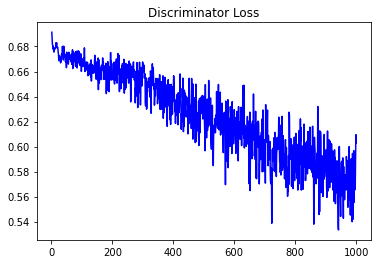

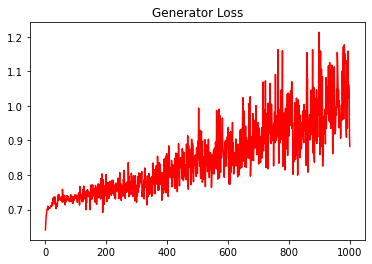

In [8]:
performanceMetrics.plotTrainingLoss2(discLossG1,genLossG1,np.linspace(1,n_epochs,n_epochs).astype(int))

In [9]:
GAN1_metrics = train_test.test_generator(generator,test_data,device)
sb.glue("GAN_1 Metrics",GAN1_metrics)

tensor([[ 0.3815],
        [ 0.3786],
        [ 0.7931],
        [-0.4141],
        [ 0.7529],
        [ 0.1862],
        [ 0.1527],
        [-0.1150],
        [-0.9359],
        [-0.1028],
        [ 0.5053],
        [-0.9267],
        [-3.8466],
        [ 0.3554],
        [ 0.6268],
        [ 0.7881],
        [ 0.4542],
        [-0.2611],
        [ 0.1963],
        [ 0.2039]], grad_fn=<MmBackward>)
tensor([[ 0.3388],
        [ 0.2409],
        [ 0.6228],
        [-0.2732],
        [ 0.6162],
        [ 0.4079],
        [ 0.1104],
        [-0.0481],
        [-0.0393],
        [ 0.1956],
        [ 0.5073],
        [-1.0187],
        [-3.9977],
        [ 0.3970],
        [ 0.6364],
        [ 0.5599],
        [ 0.5691],
        [ 0.1094],
        [ 0.1180],
        [ 0.2830]], grad_fn=<MmBackward>)
tensor([[ 0.2962],
        [ 0.3934],
        [ 0.7910],
        [-0.2404],
        [ 0.6580],
        [ 0.2375],
        [ 0.1084],
        [-0.1562],
        [ 0.1283],
        [ 0.4411],
    

tensor([[ 2.7229e-01],
        [ 3.9719e-01],
        [ 7.0964e-01],
        [-2.1388e-01],
        [ 6.8935e-01],
        [ 2.1695e-01],
        [ 5.1789e-02],
        [-2.7649e-03],
        [-1.1387e+00],
        [ 4.6717e-01],
        [ 4.7602e-01],
        [-9.0091e-01],
        [-3.5573e+00],
        [ 4.5470e-01],
        [ 5.6822e-01],
        [ 6.3229e-01],
        [ 6.7239e-01],
        [-3.6542e-01],
        [ 1.0912e-01],
        [ 1.1397e-01]], grad_fn=<MmBackward>)
tensor([[ 0.3137],
        [ 0.3895],
        [ 0.6712],
        [-0.3201],
        [ 0.7086],
        [ 0.2422],
        [ 0.0869],
        [-0.1284],
        [-0.0412],
        [ 0.4976],
        [ 0.4458],
        [-0.8653],
        [-3.8688],
        [ 0.2967],
        [ 0.5747],
        [ 0.5194],
        [ 0.4780],
        [-0.2630],
        [ 0.1215],
        [ 0.2078]], grad_fn=<MmBackward>)
tensor([[ 0.2790],
        [ 0.3935],
        [ 0.5499],
        [-0.3781],
        [ 0.7156],
        [ 0.2544],


tensor([[ 0.3267],
        [ 0.4356],
        [ 0.8660],
        [-0.2941],
        [ 0.7407],
        [ 0.2754],
        [ 0.1357],
        [-0.1166],
        [-1.3112],
        [ 0.5583],
        [ 0.4651],
        [-0.9184],
        [-3.8942],
        [ 0.3164],
        [ 0.6804],
        [ 0.4990],
        [ 0.5521],
        [-0.1778],
        [ 0.1741],
        [ 0.1319]], grad_fn=<MmBackward>)
tensor([[ 0.2837],
        [ 0.4092],
        [ 0.4927],
        [-0.2019],
        [ 0.6173],
        [ 0.3457],
        [ 0.0589],
        [-0.0541],
        [-1.0622],
        [ 0.4484],
        [ 0.4982],
        [-1.1225],
        [-3.7651],
        [ 0.4223],
        [ 0.5980],
        [ 0.5233],
        [ 0.6829],
        [ 0.1615],
        [ 0.2093],
        [ 0.1305]], grad_fn=<MmBackward>)
tensor([[ 0.3207],
        [ 0.4172],
        [ 0.3131],
        [-0.1134],
        [ 0.6846],
        [ 0.2613],
        [ 0.1089],
        [-0.0738],
        [-1.0798],
        [ 0.5839],
    

tensor([[ 0.4771],
        [ 0.3840],
        [ 0.7775],
        [-0.3572],
        [ 0.8429],
        [ 0.2603],
        [ 0.1054],
        [-0.0372],
        [-1.1953],
        [ 0.5453],
        [ 0.5123],
        [-0.9580],
        [-3.8258],
        [ 0.3591],
        [ 0.6891],
        [ 0.4507],
        [ 0.5637],
        [-0.1567],
        [ 0.1518],
        [ 0.1098]], grad_fn=<MmBackward>)
tensor([[ 0.2720],
        [ 0.3769],
        [ 0.6102],
        [ 0.4133],
        [ 0.7288],
        [ 0.1660],
        [ 0.0400],
        [-0.0612],
        [-1.1380],
        [ 0.5320],
        [ 0.4498],
        [-1.0105],
        [-3.6173],
        [ 0.3680],
        [ 0.5686],
        [ 0.4966],
        [ 0.6165],
        [-0.1462],
        [ 0.1710],
        [ 0.1565]], grad_fn=<MmBackward>)
tensor([[ 0.2748],
        [ 0.3909],
        [ 0.7475],
        [-0.2760],
        [ 0.7925],
        [ 0.2594],
        [ 0.1403],
        [-0.0978],
        [ 0.0902],
        [ 0.2612],
    

tensor([[ 0.2690],
        [ 0.3979],
        [ 0.6718],
        [-0.3333],
        [ 0.7602],
        [ 0.3723],
        [ 0.0729],
        [-0.0485],
        [-0.9892],
        [ 0.5524],
        [ 0.4824],
        [-1.0691],
        [-3.6273],
        [ 0.5048],
        [ 0.7118],
        [ 0.5787],
        [ 0.7079],
        [-0.1624],
        [ 0.1852],
        [ 0.0908]], grad_fn=<MmBackward>)
tensor([[ 0.2933],
        [ 0.4001],
        [ 0.5750],
        [-0.2904],
        [ 0.7942],
        [ 0.3754],
        [ 0.0755],
        [-0.0723],
        [ 0.3031],
        [ 0.4957],
        [ 0.4841],
        [-0.9946],
        [-3.9503],
        [ 0.3213],
        [ 0.6733],
        [ 0.5167],
        [ 0.7190],
        [-0.2150],
        [ 0.1250],
        [ 0.0984]], grad_fn=<MmBackward>)
tensor([[ 0.2758],
        [ 0.4100],
        [ 0.6246],
        [-0.2816],
        [ 0.7762],
        [ 0.2744],
        [ 0.1834],
        [-0.0744],
        [-1.2810],
        [ 0.5199],
    

tensor([[ 0.2458],
        [ 0.4251],
        [ 0.7295],
        [-0.1429],
        [ 0.6870],
        [ 0.2915],
        [ 0.0922],
        [-0.0709],
        [-0.1533],
        [ 0.5024],
        [ 0.4768],
        [-0.9418],
        [-3.8345],
        [ 0.3730],
        [ 0.5543],
        [ 0.5273],
        [ 0.6569],
        [-0.0988],
        [ 0.1579],
        [ 0.0875]], grad_fn=<MmBackward>)
tensor([[ 0.2736],
        [ 0.4195],
        [ 0.5619],
        [-0.2447],
        [ 0.6939],
        [ 0.3189],
        [ 0.0864],
        [-0.0655],
        [-0.2297],
        [ 0.3133],
        [ 0.0175],
        [-1.0299],
        [-3.8624],
        [ 0.4383],
        [ 0.6008],
        [ 0.6241],
        [ 0.5641],
        [-0.1119],
        [ 0.1086],
        [ 0.1612]], grad_fn=<MmBackward>)
tensor([[ 0.2866],
        [ 0.3075],
        [ 0.5961],
        [-0.1590],
        [ 0.6840],
        [ 0.2861],
        [ 0.1141],
        [-0.0283],
        [ 0.0300],
        [ 0.3454],
    

tensor([[ 0.4326],
        [ 0.5232],
        [ 0.4696],
        [-0.3633],
        [ 0.8338],
        [ 0.2630],
        [ 0.1130],
        [-0.1265],
        [-1.1351],
        [ 0.4366],
        [ 0.4780],
        [-0.9957],
        [-3.8807],
        [ 0.3450],
        [ 0.6859],
        [ 0.5695],
        [ 0.4525],
        [ 0.0720],
        [ 0.2118],
        [ 0.1207]], grad_fn=<MmBackward>)
tensor([[ 0.4463],
        [ 0.2766],
        [ 0.4969],
        [-0.1551],
        [ 0.8085],
        [ 0.1958],
        [ 0.1462],
        [-0.0390],
        [-1.2707],
        [ 0.6233],
        [ 0.5367],
        [-0.9102],
        [-3.7672],
        [ 0.3563],
        [ 0.6382],
        [ 0.5238],
        [ 0.5776],
        [-0.2125],
        [ 0.2634],
        [ 0.0962]], grad_fn=<MmBackward>)
tensor([[ 0.3844],
        [ 0.3779],
        [ 0.3293],
        [-0.2280],
        [ 0.7215],
        [ 0.2089],
        [ 0.0958],
        [-0.0787],
        [-0.0260],
        [ 0.2241],
    

tensor([[ 0.3322],
        [ 0.3951],
        [ 0.7825],
        [-0.3494],
        [ 0.6672],
        [ 0.2634],
        [ 0.1460],
        [-0.1014],
        [-1.1894],
        [ 0.2088],
        [ 0.5296],
        [-1.0670],
        [-3.8723],
        [ 0.3856],
        [ 0.6221],
        [ 0.7846],
        [ 0.5772],
        [ 0.5842],
        [ 0.1836],
        [ 0.1314]], grad_fn=<MmBackward>)
tensor([[ 0.3408],
        [ 0.3668],
        [ 0.7705],
        [-0.1329],
        [ 0.8008],
        [ 0.2765],
        [ 0.0900],
        [-0.0245],
        [-1.1724],
        [ 0.7151],
        [ 0.4750],
        [-1.0175],
        [-3.6310],
        [ 0.2872],
        [ 0.6105],
        [ 0.5600],
        [ 0.7751],
        [-0.0147],
        [ 0.2045],
        [ 0.0977]], grad_fn=<MmBackward>)
tensor([[ 0.2578],
        [ 0.4674],
        [ 0.6868],
        [-0.2301],
        [ 0.7163],
        [ 0.2026],
        [ 0.0858],
        [-0.0859],
        [ 0.0176],
        [ 0.5009],
    

tensor([[ 0.4423],
        [ 0.3657],
        [ 0.5904],
        [-0.0833],
        [ 0.7291],
        [ 0.4235],
        [ 0.2040],
        [-0.0599],
        [-1.0053],
        [ 0.0501],
        [ 0.5381],
        [-0.9937],
        [-3.7544],
        [ 0.3633],
        [ 0.7075],
        [ 0.6083],
        [ 0.6499],
        [ 0.1250],
        [ 0.1601],
        [ 0.1159]], grad_fn=<MmBackward>)
tensor([[ 0.2739],
        [ 0.3953],
        [ 0.6085],
        [-0.3118],
        [ 0.7415],
        [ 0.4462],
        [ 0.0953],
        [-0.0968],
        [-1.1913],
        [ 0.5332],
        [ 0.5114],
        [-1.1121],
        [-3.6591],
        [ 0.3550],
        [ 0.6010],
        [ 0.6482],
        [ 0.5835],
        [ 0.0708],
        [ 0.1175],
        [ 0.0735]], grad_fn=<MmBackward>)
tensor([[ 0.2428],
        [ 0.8066],
        [ 0.5929],
        [-0.4035],
        [ 0.7121],
        [ 0.1767],
        [ 0.0680],
        [ 0.0302],
        [-0.9221],
        [ 0.1222],
    

tensor([[ 0.2797],
        [ 0.3866],
        [ 0.7627],
        [-0.2212],
        [ 0.6367],
        [ 0.2479],
        [ 0.1083],
        [-0.0854],
        [-1.3023],
        [ 0.3811],
        [ 0.4699],
        [-0.9087],
        [-3.7571],
        [ 0.3310],
        [ 0.6714],
        [ 0.5745],
        [ 0.7172],
        [-0.1144],
        [ 0.2769],
        [ 0.2026]], grad_fn=<MmBackward>)
tensor([[ 0.2799],
        [ 0.4832],
        [ 0.7175],
        [-0.2637],
        [ 0.6411],
        [ 0.2940],
        [ 0.1088],
        [-0.1280],
        [-0.6139],
        [ 0.4219],
        [ 0.4913],
        [-1.0619],
        [-3.8076],
        [ 0.6099],
        [ 0.6186],
        [ 0.6225],
        [ 0.6793],
        [-0.1985],
        [ 0.1635],
        [ 0.1342]], grad_fn=<MmBackward>)
tensor([[ 0.4434],
        [ 0.4217],
        [ 0.6617],
        [-0.1817],
        [ 0.7149],
        [ 0.2316],
        [ 0.1288],
        [-0.0239],
        [-0.9945],
        [-0.0046],
    

tensor([[ 0.4296],
        [ 0.3811],
        [ 0.6253],
        [-0.2781],
        [ 0.7303],
        [ 0.2555],
        [ 0.2177],
        [-0.1160],
        [-0.1168],
        [ 0.3953],
        [ 0.4401],
        [-0.9160],
        [-4.1225],
        [ 0.3820],
        [ 0.6360],
        [ 0.6106],
        [ 0.3810],
        [-0.3259],
        [ 0.1630],
        [ 0.1873]], grad_fn=<MmBackward>)
tensor([[ 0.2482],
        [ 0.3767],
        [ 0.4897],
        [-0.3168],
        [ 0.7695],
        [ 0.2495],
        [ 0.0917],
        [-0.0528],
        [ 0.1435],
        [ 0.2279],
        [ 0.5168],
        [-1.0014],
        [-3.7381],
        [ 0.6488],
        [ 0.5753],
        [ 0.6683],
        [ 0.7912],
        [ 0.0328],
        [ 0.1248],
        [ 0.0354]], grad_fn=<MmBackward>)
tensor([[ 0.3372],
        [ 0.3950],
        [ 0.6743],
        [-0.3683],
        [ 0.7701],
        [ 0.2804],
        [ 0.1987],
        [-0.0434],
        [-1.0297],
        [ 0.3144],
    

tensor([[ 0.2636],
        [ 0.4589],
        [ 0.4066],
        [-0.3577],
        [ 0.6953],
        [ 0.2764],
        [ 0.1270],
        [-0.1122],
        [-1.0351],
        [ 0.4005],
        [ 0.5400],
        [-1.1261],
        [-3.6982],
        [ 0.5430],
        [ 0.6318],
        [ 0.6999],
        [ 0.6232],
        [ 0.5696],
        [ 0.1775],
        [ 0.2064]], grad_fn=<MmBackward>)
tensor([[ 0.5326],
        [ 0.4431],
        [ 0.7231],
        [-0.3604],
        [ 0.7032],
        [ 0.4074],
        [ 0.1028],
        [-0.0636],
        [-1.2269],
        [ 0.3882],
        [ 0.5050],
        [-1.0121],
        [-3.6925],
        [ 0.5734],
        [ 0.5583],
        [ 0.5298],
        [ 0.5572],
        [-0.2037],
        [ 0.0543],
        [ 0.2192]], grad_fn=<MmBackward>)
tensor([[ 0.2340],
        [ 0.4633],
        [ 0.5527],
        [-0.3455],
        [ 0.6915],
        [ 0.2520],
        [ 0.1801],
        [-0.0840],
        [-0.8161],
        [ 0.4298],
    

tensor([[ 2.8601e-01],
        [ 4.1826e-01],
        [ 7.1321e-01],
        [-2.9763e-01],
        [ 8.2536e-01],
        [ 1.7499e-01],
        [ 4.9074e-02],
        [-6.9332e-02],
        [-8.4540e-03],
        [ 5.7016e-01],
        [ 4.6567e-01],
        [-1.0254e+00],
        [-3.7891e+00],
        [ 3.9198e-01],
        [ 5.6110e-01],
        [ 5.6624e-01],
        [ 6.4517e-01],
        [-1.1317e-03],
        [ 1.2161e-01],
        [ 2.1206e-01]], grad_fn=<MmBackward>)
tensor([[ 0.2905],
        [ 0.4180],
        [ 0.6516],
        [-0.4103],
        [ 0.6342],
        [ 0.3276],
        [ 0.0852],
        [-0.1230],
        [-0.2127],
        [ 0.3990],
        [ 0.4534],
        [-1.0639],
        [-4.0825],
        [ 0.3176],
        [ 0.5836],
        [ 0.6166],
        [ 0.4010],
        [-0.0899],
        [ 0.0989],
        [ 0.2411]], grad_fn=<MmBackward>)
tensor([[ 0.4278],
        [ 0.3970],
        [ 0.7458],
        [-0.2208],
        [ 0.7729],
        [ 0.2267],


tensor([[ 0.3252],
        [ 0.3611],
        [ 0.4919],
        [-0.3484],
        [ 0.7926],
        [ 0.2244],
        [ 0.1455],
        [-0.0901],
        [-0.3769],
        [ 0.5005],
        [ 0.5564],
        [-1.0217],
        [-3.7168],
        [ 0.3226],
        [ 0.6834],
        [ 0.4643],
        [ 0.6575],
        [-0.0837],
        [ 0.0912],
        [ 0.1085]], grad_fn=<MmBackward>)
tensor([[ 0.2663],
        [ 0.3740],
        [ 0.1245],
        [-0.2641],
        [ 0.6535],
        [ 0.1660],
        [ 0.0709],
        [-0.0239],
        [ 0.0204],
        [ 0.4268],
        [ 0.4949],
        [-1.0200],
        [-3.8345],
        [ 0.3827],
        [ 0.6028],
        [ 0.5601],
        [ 0.7433],
        [-0.2097],
        [ 0.1435],
        [ 0.2215]], grad_fn=<MmBackward>)
tensor([[ 0.2954],
        [ 0.4005],
        [ 0.5481],
        [-0.3206],
        [ 0.7609],
        [ 0.2621],
        [ 0.0630],
        [-0.0568],
        [-1.2546],
        [ 0.5034],
    

tensor([[ 0.3034],
        [ 0.4158],
        [ 0.2462],
        [-0.3447],
        [ 0.8006],
        [ 0.2349],
        [ 0.0947],
        [-0.0253],
        [-0.1856],
        [ 0.5963],
        [ 0.5177],
        [-1.0956],
        [-3.7355],
        [ 0.3322],
        [ 0.6465],
        [ 0.5769],
        [ 0.6405],
        [-0.3795],
        [ 0.1610],
        [ 0.0189]], grad_fn=<MmBackward>)
tensor([[ 0.2554],
        [ 0.6171],
        [ 0.7731],
        [-0.1260],
        [ 0.5955],
        [ 0.2524],
        [ 0.1182],
        [ 0.0042],
        [-1.2668],
        [ 0.3026],
        [ 0.5127],
        [-1.0698],
        [-3.7257],
        [ 0.3496],
        [ 0.6465],
        [ 0.6562],
        [ 0.5503],
        [-0.2896],
        [ 0.1852],
        [ 0.1155]], grad_fn=<MmBackward>)
tensor([[ 0.4042],
        [ 0.4566],
        [ 0.6056],
        [-0.3168],
        [ 0.6828],
        [ 0.3284],
        [ 0.1213],
        [-0.0672],
        [-1.1702],
        [ 0.2073],
    

tensor([[ 0.2673],
        [ 0.4561],
        [ 0.5492],
        [-0.3146],
        [ 0.6936],
        [ 0.3068],
        [ 0.1109],
        [-0.1273],
        [-0.1008],
        [ 0.3357],
        [ 0.4701],
        [-1.0436],
        [-3.7298],
        [ 0.6536],
        [ 0.5957],
        [ 0.5773],
        [ 0.8414],
        [ 0.0392],
        [ 0.1221],
        [ 0.1641]], grad_fn=<MmBackward>)
tensor([[ 0.3768],
        [ 0.4043],
        [ 0.4851],
        [-0.2925],
        [ 0.7367],
        [ 0.2807],
        [ 0.1478],
        [-0.0510],
        [-0.9258],
        [ 0.1074],
        [ 0.4828],
        [-1.1150],
        [-3.6538],
        [ 0.7111],
        [ 0.7020],
        [ 0.6332],
        [ 0.4532],
        [ 0.0659],
        [ 0.0460],
        [ 0.0986]], grad_fn=<MmBackward>)
tensor([[ 0.2762],
        [ 0.5621],
        [ 0.4463],
        [-0.3372],
        [ 0.8374],
        [ 0.3084],
        [ 0.0556],
        [-0.0109],
        [-0.9075],
        [ 0.5162],
    

tensor([[ 0.2417],
        [ 0.5229],
        [ 0.6069],
        [-0.2839],
        [ 0.6358],
        [ 0.4432],
        [ 0.0941],
        [-0.0232],
        [-0.9506],
        [ 0.0887],
        [ 0.4676],
        [-1.1419],
        [-3.5804],
        [ 0.6033],
        [ 0.6397],
        [ 0.5239],
        [ 0.5661],
        [ 0.3517],
        [ 0.0500],
        [ 0.0948]], grad_fn=<MmBackward>)
tensor([[ 0.2971],
        [ 0.4405],
        [ 0.3741],
        [-0.1706],
        [ 0.6541],
        [ 0.1702],
        [ 0.0532],
        [ 0.0417],
        [-1.3255],
        [ 0.4366],
        [ 0.4571],
        [-1.0026],
        [-3.8465],
        [ 0.3669],
        [ 0.6455],
        [ 0.6144],
        [ 0.5416],
        [-0.3302],
        [ 0.1827],
        [ 0.2211]], grad_fn=<MmBackward>)
tensor([[ 0.3554],
        [ 0.2344],
        [ 0.5481],
        [-0.1925],
        [ 0.6602],
        [ 0.6710],
        [ 0.1392],
        [-0.0691],
        [-0.1753],
        [ 0.3890],
    

tensor([[ 0.3106],
        [ 0.3486],
        [ 0.6828],
        [-0.3262],
        [ 0.7017],
        [ 0.3003],
        [ 0.1363],
        [-0.0473],
        [-0.4375],
        [ 0.3081],
        [ 0.4943],
        [-1.0200],
        [-3.6459],
        [ 0.3754],
        [ 0.9871],
        [ 0.6293],
        [ 0.5981],
        [-0.3399],
        [ 0.1103],
        [ 0.0499]], grad_fn=<MmBackward>)
tensor([[ 0.3269],
        [ 0.4758],
        [ 0.6892],
        [-0.2286],
        [ 0.6521],
        [ 0.2517],
        [ 0.1173],
        [-0.0433],
        [-0.2681],
        [ 0.5575],
        [ 0.4541],
        [-1.0742],
        [-3.6727],
        [ 0.7878],
        [ 0.5744],
        [ 0.5862],
        [ 0.7420],
        [-0.0908],
        [ 0.2111],
        [ 0.1130]], grad_fn=<MmBackward>)
tensor([[ 0.3313],
        [ 0.3849],
        [ 0.3882],
        [-0.4380],
        [ 0.6981],
        [ 0.2203],
        [ 0.0841],
        [ 0.0060],
        [-1.1256],
        [ 0.3463],
    

tensor([[ 0.3132],
        [ 0.4346],
        [ 0.6713],
        [-0.0910],
        [ 0.6997],
        [ 0.1824],
        [ 0.0960],
        [-0.0405],
        [-0.9618],
        [ 0.5310],
        [ 0.4250],
        [-0.9841],
        [-3.7713],
        [ 0.3611],
        [ 0.7127],
        [ 0.5588],
        [ 0.5775],
        [-0.1022],
        [ 0.1305],
        [ 0.0976]], grad_fn=<MmBackward>)
tensor([[ 0.3255],
        [ 0.3118],
        [ 0.2594],
        [-0.1207],
        [ 0.6015],
        [ 0.6635],
        [ 0.1143],
        [-0.0234],
        [-0.1184],
        [ 0.2304],
        [ 0.5150],
        [-1.0082],
        [-3.8317],
        [ 0.3307],
        [ 0.6313],
        [ 0.6403],
        [ 0.5893],
        [-0.0981],
        [ 0.1438],
        [ 0.0934]], grad_fn=<MmBackward>)
tensor([[ 0.3788],
        [ 0.4273],
        [ 0.5670],
        [-0.2710],
        [ 0.6630],
        [ 0.2362],
        [ 0.1113],
        [-0.1051],
        [-0.2076],
        [ 0.5297],
    

tensor([[ 0.3333],
        [ 0.4255],
        [ 0.7364],
        [-0.4053],
        [ 0.7520],
        [ 0.3151],
        [ 0.1717],
        [-0.0883],
        [-1.2900],
        [ 0.4691],
        [ 0.5244],
        [-0.9176],
        [-3.8008],
        [ 0.3094],
        [ 0.6393],
        [ 0.5853],
        [ 0.5765],
        [-0.2987],
        [ 0.2671],
        [ 0.1587]], grad_fn=<MmBackward>)
tensor([[ 0.2729],
        [ 0.4400],
        [ 0.6555],
        [-0.2370],
        [ 0.6534],
        [ 0.2562],
        [ 0.0909],
        [-0.0625],
        [-1.2211],
        [ 0.4210],
        [ 0.5274],
        [-1.0294],
        [-3.7557],
        [ 0.4267],
        [ 0.6102],
        [ 0.5329],
        [ 0.6474],
        [-0.1471],
        [ 0.2313],
        [ 0.1189]], grad_fn=<MmBackward>)
tensor([[ 0.3018],
        [ 0.3883],
        [ 0.6745],
        [-0.4449],
        [ 0.7303],
        [ 0.2265],
        [ 0.0622],
        [-0.0934],
        [-0.0226],
        [-0.0156],
    

tensor([[ 0.3030],
        [ 0.4168],
        [ 0.5618],
        [-0.3367],
        [ 0.7979],
        [ 0.2315],
        [ 0.1077],
        [-0.0659],
        [-0.1922],
        [ 0.3455],
        [ 0.5335],
        [-1.0682],
        [-3.7975],
        [ 0.3655],
        [ 0.6585],
        [ 0.6532],
        [ 0.6546],
        [ 0.1595],
        [ 0.1289],
        [ 0.1733]], grad_fn=<MmBackward>)
tensor([[ 0.2750],
        [ 0.4002],
        [ 0.5192],
        [-0.3298],
        [ 0.7431],
        [ 0.2743],
        [ 0.0729],
        [-0.1377],
        [-0.1513],
        [ 0.4427],
        [ 0.4827],
        [-1.1196],
        [-3.4611],
        [ 0.3119],
        [ 0.8204],
        [ 0.5659],
        [ 0.7018],
        [-0.1100],
        [ 0.0592],
        [ 0.1696]], grad_fn=<MmBackward>)
tensor([[ 0.2523],
        [ 0.5300],
        [ 0.4713],
        [-0.4092],
        [ 0.7720],
        [ 0.1741],
        [ 0.0818],
        [-0.0078],
        [-1.0031],
        [ 0.4885],
    

tensor([[ 0.2783],
        [ 0.3773],
        [ 0.4381],
        [-0.3023],
        [ 0.7786],
        [ 0.3004],
        [ 0.0623],
        [-0.0278],
        [-1.0938],
        [ 0.6064],
        [ 0.4586],
        [-0.9956],
        [-3.6627],
        [ 0.4301],
        [ 0.6146],
        [ 0.5266],
        [ 0.6193],
        [-0.2746],
        [ 0.1532],
        [ 0.2423]], grad_fn=<MmBackward>)
tensor([[ 0.3094],
        [ 0.3930],
        [ 0.5633],
        [-0.2645],
        [ 0.7994],
        [ 0.2870],
        [ 0.1049],
        [-0.1020],
        [ 0.3430],
        [ 0.5842],
        [ 0.4588],
        [-0.9989],
        [-4.0659],
        [ 0.3540],
        [ 0.6416],
        [ 0.5711],
        [ 0.6552],
        [-0.0245],
        [ 0.1716],
        [ 0.0881]], grad_fn=<MmBackward>)
tensor([[ 0.3092],
        [ 0.3824],
        [ 0.5909],
        [-0.1693],
        [ 0.6626],
        [ 0.2824],
        [ 0.1020],
        [-0.0240],
        [-1.0775],
        [ 0.6587],
    

tensor([[ 0.2739],
        [ 0.4128],
        [ 0.7681],
        [-0.1595],
        [ 0.5827],
        [ 0.2854],
        [ 0.0701],
        [-0.0943],
        [-1.0212],
        [ 0.5787],
        [ 0.4689],
        [-0.9582],
        [-3.6583],
        [ 0.2612],
        [ 0.6122],
        [ 0.5318],
        [ 0.6972],
        [-0.0466],
        [ 0.1567],
        [ 0.1778]], grad_fn=<MmBackward>)
tensor([[ 2.9595e-01],
        [ 4.1909e-01],
        [ 5.8021e-01],
        [-2.2754e-01],
        [ 8.0917e-01],
        [ 2.8783e-01],
        [ 7.1428e-02],
        [-1.2164e-01],
        [-1.1495e+00],
        [ 6.6699e-01],
        [ 4.9998e-01],
        [-9.7830e-01],
        [-3.7830e+00],
        [ 3.8488e-01],
        [ 5.9348e-01],
        [ 5.2232e-01],
        [ 6.2492e-01],
        [ 2.7639e-03],
        [ 2.2465e-01],
        [ 1.8719e-01]], grad_fn=<MmBackward>)
tensor([[ 0.3558],
        [ 0.3884],
        [ 0.4190],
        [-0.2684],
        [ 0.7035],
        [ 0.2199],


tensor([[ 0.2786],
        [ 0.4069],
        [ 0.4960],
        [-0.2851],
        [ 0.7280],
        [ 0.3437],
        [ 0.1549],
        [-0.0706],
        [-1.1517],
        [ 0.4575],
        [ 0.5333],
        [-1.0728],
        [-3.5296],
        [ 0.3477],
        [ 0.5338],
        [ 0.7541],
        [ 0.6825],
        [-0.0246],
        [ 0.1587],
        [ 0.1000]], grad_fn=<MmBackward>)
tensor([[ 0.2838],
        [ 0.4214],
        [ 0.6716],
        [-0.2124],
        [ 0.7216],
        [ 0.4528],
        [ 0.1322],
        [-0.0499],
        [-1.3350],
        [ 0.4038],
        [ 0.4892],
        [-1.0041],
        [-3.6784],
        [ 0.3700],
        [ 0.6864],
        [ 0.5479],
        [ 0.9254],
        [ 0.3307],
        [ 0.2578],
        [ 0.1327]], grad_fn=<MmBackward>)
tensor([[ 0.2702],
        [ 0.3805],
        [ 0.4242],
        [-0.3701],
        [ 0.8119],
        [ 0.2515],
        [ 0.1276],
        [-0.0712],
        [-0.0052],
        [ 0.0272],
    

tensor([[ 0.2669],
        [ 0.3587],
        [ 0.7520],
        [-0.3056],
        [ 0.7337],
        [ 0.2444],
        [ 0.0944],
        [-0.0103],
        [-1.3148],
        [ 0.2915],
        [ 0.4527],
        [-0.8599],
        [-3.5500],
        [ 0.3484],
        [ 0.5633],
        [ 0.5933],
        [ 0.8856],
        [-0.2300],
        [ 0.1806],
        [ 0.1014]], grad_fn=<MmBackward>)
tensor([[ 2.5293e-01],
        [ 5.4958e-01],
        [ 5.1586e-01],
        [-1.7398e-01],
        [ 7.2150e-01],
        [ 1.7489e-01],
        [ 7.4908e-02],
        [ 2.4977e-03],
        [-7.1261e-01],
        [ 3.8416e-01],
        [ 4.7533e-01],
        [-1.0535e+00],
        [-3.5018e+00],
        [ 4.5264e-01],
        [ 6.0242e-01],
        [ 6.5348e-01],
        [ 8.0576e-01],
        [ 1.4105e-02],
        [ 1.5320e-01],
        [ 8.0459e-02]], grad_fn=<MmBackward>)
tensor([[ 0.2876],
        [ 0.4618],
        [ 0.7271],
        [-0.1940],
        [ 0.7141],
        [ 0.2984],


tensor([[ 0.5927],
        [ 0.4104],
        [ 0.7036],
        [-0.2766],
        [ 0.7604],
        [ 0.3504],
        [ 0.1261],
        [-0.0433],
        [-1.1383],
        [ 0.5059],
        [ 0.5016],
        [-0.9929],
        [-3.6566],
        [ 0.3641],
        [ 0.6420],
        [ 0.5437],
        [ 0.6908],
        [ 0.0210],
        [ 0.0975],
        [ 0.1237]], grad_fn=<MmBackward>)
tensor([[ 0.2607],
        [ 0.6532],
        [ 0.6641],
        [-0.2866],
        [ 0.7211],
        [ 0.1942],
        [ 0.0537],
        [-0.0767],
        [-1.1519],
        [ 0.4809],
        [ 0.4779],
        [-1.1162],
        [-3.7405],
        [ 0.3182],
        [ 0.5300],
        [ 0.5244],
        [ 0.5255],
        [ 0.1265],
        [ 0.1136],
        [ 0.1674]], grad_fn=<MmBackward>)
tensor([[ 0.2755],
        [ 0.4226],
        [ 0.3852],
        [-0.3596],
        [ 0.7565],
        [ 0.2739],
        [ 0.1508],
        [-0.0616],
        [-0.8992],
        [ 0.4198],
    

tensor([[ 0.2524],
        [ 0.3873],
        [ 0.5718],
        [-0.1414],
        [ 0.6770],
        [ 0.3542],
        [ 0.0750],
        [-0.0415],
        [-0.1498],
        [ 0.4800],
        [ 0.4391],
        [-1.0273],
        [-3.5913],
        [ 0.2577],
        [ 0.5190],
        [ 0.5336],
        [ 0.6117],
        [-0.1718],
        [ 0.1312],
        [ 0.0632]], grad_fn=<MmBackward>)
tensor([[ 0.2462],
        [ 0.4216],
        [ 0.4005],
        [-0.4191],
        [ 0.7686],
        [ 0.2811],
        [ 0.1454],
        [-0.0864],
        [-0.5164],
        [ 0.4416],
        [ 0.5463],
        [-0.9699],
        [-3.7393],
        [ 0.3245],
        [ 0.5483],
        [ 0.7732],
        [ 0.6804],
        [-0.1332],
        [ 0.1275],
        [ 0.0784]], grad_fn=<MmBackward>)
tensor([[ 0.2644],
        [ 0.3760],
        [ 0.4446],
        [-0.3902],
        [ 0.7676],
        [ 0.1825],
        [ 0.1511],
        [-0.0714],
        [ 0.0922],
        [ 0.1189],
    

tensor([[ 0.2334],
        [ 0.5711],
        [ 0.7124],
        [-0.2215],
        [ 0.6897],
        [ 0.2350],
        [ 0.1573],
        [-0.0845],
        [-0.2893],
        [ 0.1674],
        [ 0.5190],
        [-1.0742],
        [-3.8129],
        [ 0.3720],
        [ 0.6235],
        [ 0.7658],
        [ 0.6262],
        [ 0.1215],
        [ 0.0937],
        [ 0.1416]], grad_fn=<MmBackward>)
tensor([[ 0.2498],
        [ 0.5412],
        [ 0.6551],
        [-0.3077],
        [ 0.6734],
        [ 0.1959],
        [-0.0074],
        [-0.0036],
        [-0.8682],
        [ 0.4325],
        [ 0.5133],
        [-1.1254],
        [-3.5495],
        [ 0.8004],
        [ 0.6175],
        [ 0.4759],
        [ 0.5768],
        [-0.2639],
        [ 0.0787],
        [ 0.0737]], grad_fn=<MmBackward>)
tensor([[ 0.3927],
        [ 0.4094],
        [ 0.7473],
        [-0.0347],
        [ 0.6180],
        [ 0.1634],
        [ 0.0886],
        [-0.0471],
        [-1.1963],
        [ 0.5344],
    

tensor([[ 0.2818],
        [ 0.3824],
        [ 0.7418],
        [-0.2151],
        [ 0.5909],
        [ 0.1873],
        [ 0.0594],
        [-0.0718],
        [-0.0157],
        [ 0.2232],
        [ 0.4464],
        [-1.0052],
        [-4.0187],
        [ 0.3062],
        [ 0.6806],
        [ 0.5783],
        [ 0.5559],
        [-0.1459],
        [ 0.1767],
        [ 0.1673]], grad_fn=<MmBackward>)
tensor([[ 0.5204],
        [ 0.3892],
        [ 0.2095],
        [-0.3423],
        [ 0.7797],
        [ 0.2204],
        [ 0.1184],
        [-0.1019],
        [-1.1312],
        [ 0.4849],
        [ 0.4911],
        [-0.9243],
        [-3.8702],
        [ 0.4161],
        [ 0.6881],
        [ 0.4024],
        [ 0.4146],
        [-0.0110],
        [ 0.1935],
        [ 0.2394]], grad_fn=<MmBackward>)
tensor([[ 0.3033],
        [ 0.6514],
        [ 0.6689],
        [-0.2506],
        [ 0.6973],
        [ 0.1661],
        [ 0.0534],
        [-0.0608],
        [ 0.3392],
        [ 0.4639],
    

tensor([[ 0.3458],
        [ 0.3690],
        [ 0.6365],
        [-0.3252],
        [ 0.7014],
        [ 0.2102],
        [ 0.1217],
        [-0.0261],
        [-0.5244],
        [ 0.4045],
        [ 0.4852],
        [-0.9754],
        [-3.6938],
        [ 0.4273],
        [ 0.8257],
        [ 0.5647],
        [ 0.4112],
        [-0.5315],
        [ 0.0908],
        [ 0.1913]], grad_fn=<MmBackward>)
tensor([[ 0.3089],
        [ 0.3635],
        [ 0.4737],
        [-0.2581],
        [ 0.8249],
        [ 0.4339],
        [ 0.2257],
        [-0.0394],
        [-1.0894],
        [ 0.6065],
        [ 0.4893],
        [-1.0413],
        [-3.5879],
        [ 0.4342],
        [ 0.6563],
        [ 0.5085],
        [ 0.6131],
        [-0.2334],
        [ 0.1817],
        [ 0.0532]], grad_fn=<MmBackward>)
tensor([[ 0.2481],
        [ 0.3464],
        [ 0.6095],
        [-0.3399],
        [ 0.6246],
        [ 0.1684],
        [ 0.1379],
        [ 0.0042],
        [-0.2991],
        [ 0.1518],
    

tensor([[ 0.2932],
        [ 0.3622],
        [ 0.6856],
        [-0.2838],
        [ 0.7132],
        [ 0.1916],
        [ 0.0494],
        [-0.1290],
        [-0.3396],
        [ 0.5651],
        [ 0.4536],
        [-1.0199],
        [-3.9222],
        [ 0.3575],
        [ 0.5832],
        [ 0.5141],
        [ 0.5593],
        [-0.0434],
        [ 0.1485],
        [ 0.0646]], grad_fn=<MmBackward>)
tensor([[ 0.2576],
        [ 0.4079],
        [ 0.6762],
        [-0.2586],
        [ 0.6971],
        [ 0.4657],
        [ 0.1275],
        [-0.0762],
        [-1.0690],
        [ 0.4795],
        [ 0.5267],
        [-1.1382],
        [-3.5559],
        [ 0.4422],
        [ 0.5619],
        [ 0.6021],
        [ 0.6921],
        [ 0.3049],
        [ 0.1455],
        [ 0.0954]], grad_fn=<MmBackward>)
tensor([[ 0.3827],
        [ 0.4116],
        [ 0.7182],
        [-0.2530],
        [ 0.7169],
        [ 0.2334],
        [ 0.0988],
        [-0.0597],
        [ 0.0264],
        [ 0.2492],
    

tensor([[ 0.2982],
        [ 0.3744],
        [ 0.7146],
        [-0.3151],
        [ 0.8006],
        [ 0.2748],
        [ 0.1054],
        [-0.0644],
        [-1.1370],
        [ 0.6537],
        [ 0.4999],
        [-1.0059],
        [-3.6504],
        [ 0.3122],
        [ 0.6599],
        [ 0.6145],
        [ 0.6070],
        [-0.3582],
        [ 0.1880],
        [ 0.1182]], grad_fn=<MmBackward>)
tensor([[ 0.2961],
        [ 0.4295],
        [ 0.5970],
        [-0.3243],
        [ 0.7410],
        [ 0.2820],
        [ 0.1301],
        [-0.1013],
        [-1.2287],
        [ 0.4928],
        [ 0.5191],
        [-1.0567],
        [-3.9214],
        [ 0.3374],
        [ 0.6582],
        [ 0.6971],
        [ 0.5839],
        [ 0.5662],
        [ 0.1618],
        [ 0.1221]], grad_fn=<MmBackward>)
tensor([[ 2.9551e-01],
        [ 3.9358e-01],
        [ 6.8739e-01],
        [-2.1770e-02],
        [ 7.0314e-01],
        [ 2.3195e-01],
        [ 8.1244e-02],
        [-2.7391e-03],
        [-

tensor([[ 0.2876],
        [ 0.4353],
        [ 0.4712],
        [-0.2787],
        [ 0.6704],
        [ 0.3781],
        [ 0.0483],
        [-0.0133],
        [-1.2798],
        [ 0.5575],
        [ 0.5168],
        [-1.0596],
        [-3.7543],
        [ 0.4073],
        [ 0.6592],
        [ 0.4957],
        [ 0.6316],
        [-0.2763],
        [ 0.2200],
        [ 0.1006]], grad_fn=<MmBackward>)
tensor([[ 0.3559],
        [ 0.2819],
        [ 0.6390],
        [-0.3087],
        [ 0.7621],
        [ 0.3130],
        [ 0.1793],
        [-0.0547],
        [-1.0625],
        [ 0.2970],
        [ 0.5354],
        [-0.9215],
        [-3.7571],
        [ 0.6681],
        [ 0.6166],
        [ 0.4888],
        [ 0.6095],
        [-0.1874],
        [ 0.1110],
        [ 0.2030]], grad_fn=<MmBackward>)
tensor([[ 2.7768e-01],
        [ 4.3930e-01],
        [ 5.8026e-01],
        [-2.6312e-01],
        [ 6.9841e-01],
        [ 2.9538e-01],
        [-1.3286e-03],
        [-8.2286e-02],
        [-

tensor([[ 0.3086],
        [ 0.4078],
        [ 0.5213],
        [-0.1973],
        [ 0.7681],
        [ 0.2411],
        [ 0.0529],
        [-0.0057],
        [-1.1512],
        [ 0.5668],
        [ 0.4628],
        [-0.8610],
        [-3.7439],
        [ 0.3055],
        [ 0.4942],
        [ 0.5826],
        [ 0.6158],
        [-0.3273],
        [ 0.1853],
        [ 0.0684]], grad_fn=<MmBackward>)
tensor([[ 0.3703],
        [ 0.3668],
        [ 0.6773],
        [-0.2702],
        [ 0.8015],
        [ 0.3628],
        [ 0.0966],
        [-0.0976],
        [-1.1661],
        [ 0.6127],
        [ 0.4826],
        [-0.8605],
        [-3.7099],
        [ 0.3013],
        [ 0.6629],
        [ 0.5284],
        [ 0.5561],
        [-0.2400],
        [ 0.2014],
        [ 0.1781]], grad_fn=<MmBackward>)
tensor([[ 0.2695],
        [ 0.3842],
        [ 0.6606],
        [-0.1616],
        [ 0.6518],
        [ 0.4154],
        [ 0.1731],
        [-0.0363],
        [-1.0779],
        [ 0.3952],
    

tensor([[ 0.2810],
        [ 0.3603],
        [ 0.6361],
        [-0.2083],
        [ 0.6814],
        [ 0.2894],
        [ 0.1075],
        [-0.0811],
        [-0.2521],
        [ 0.3808],
        [ 0.4271],
        [-0.9650],
        [-3.9354],
        [ 0.4190],
        [ 0.5415],
        [ 0.5849],
        [ 0.6585],
        [-0.2515],
        [ 0.1761],
        [ 0.2453]], grad_fn=<MmBackward>)
tensor([[ 0.2828],
        [ 0.7094],
        [ 0.4797],
        [-0.3799],
        [ 0.7435],
        [ 0.3728],
        [ 0.1668],
        [-0.0088],
        [-0.8265],
        [ 0.4378],
        [ 0.5339],
        [-1.1307],
        [-3.4724],
        [ 0.3458],
        [ 0.6205],
        [ 0.5426],
        [ 0.6895],
        [ 0.2959],
        [ 0.1493],
        [ 0.0688]], grad_fn=<MmBackward>)
tensor([[ 0.5143],
        [ 0.3717],
        [ 0.4209],
        [-0.2836],
        [ 0.5796],
        [ 0.2237],
        [ 0.1453],
        [ 0.0377],
        [-0.9902],
        [ 0.1940],
    

tensor([[ 0.2683],
        [ 0.4841],
        [ 0.7739],
        [-0.0112],
        [ 0.6992],
        [ 0.2035],
        [ 0.0917],
        [ 0.0392],
        [-1.2234],
        [ 0.4306],
        [ 0.4486],
        [-0.9964],
        [-3.4956],
        [ 0.2809],
        [ 0.6332],
        [ 0.6799],
        [ 0.8001],
        [-0.0745],
        [ 0.1684],
        [ 0.1016]], grad_fn=<MmBackward>)
tensor([[ 0.2534],
        [ 0.4219],
        [ 0.4084],
        [-0.1745],
        [ 0.6347],
        [ 0.3920],
        [ 0.1304],
        [-0.0644],
        [ 0.0208],
        [ 0.2000],
        [ 0.4876],
        [-1.0671],
        [-3.8252],
        [ 0.3289],
        [ 0.6629],
        [ 0.7923],
        [ 0.5724],
        [-0.0412],
        [ 0.0679],
        [ 0.1695]], grad_fn=<MmBackward>)
tensor([[ 0.2671],
        [ 0.4389],
        [ 0.7840],
        [-0.2984],
        [ 0.7490],
        [ 0.2535],
        [ 0.1320],
        [-0.0520],
        [-1.1665],
        [ 0.4196],
    

tensor([[ 0.2782],
        [ 0.4780],
        [ 0.6570],
        [-0.2886],
        [ 0.7007],
        [ 0.2803],
        [ 0.0445],
        [-0.0329],
        [-1.1878],
        [ 0.2708],
        [ 0.1489],
        [-1.0196],
        [-3.7700],
        [ 0.4920],
        [ 0.6969],
        [ 0.5455],
        [ 0.6478],
        [-0.1428],
        [ 0.1819],
        [ 0.1951]], grad_fn=<MmBackward>)
tensor([[ 0.3288],
        [ 0.4821],
        [ 0.5730],
        [-0.3809],
        [ 0.6907],
        [ 0.2839],
        [ 0.1354],
        [-0.1139],
        [ 0.0444],
        [-0.0086],
        [ 0.4703],
        [-1.0499],
        [-3.7947],
        [ 0.4215],
        [ 0.7071],
        [ 0.7623],
        [ 0.6456],
        [ 0.0797],
        [ 0.0306],
        [ 0.1185]], grad_fn=<MmBackward>)
tensor([[ 0.3632],
        [ 0.4193],
        [ 0.6229],
        [-0.1313],
        [ 0.7270],
        [ 0.1977],
        [ 0.1220],
        [-0.1081],
        [-0.1988],
        [ 0.5027],
    

tensor([[ 0.2618],
        [ 0.4637],
        [ 0.6325],
        [-0.1414],
        [ 0.5861],
        [ 0.1664],
        [ 0.0560],
        [ 0.0613],
        [-1.0113],
        [ 0.4197],
        [ 0.5279],
        [-1.2082],
        [-3.4332],
        [ 0.5420],
        [ 0.6223],
        [ 0.5883],
        [ 0.6308],
        [-0.1349],
        [ 0.0824],
        [ 0.2279]], grad_fn=<MmBackward>)
tensor([[ 0.2832],
        [ 0.4289],
        [ 0.5890],
        [-0.0857],
        [ 0.6888],
        [ 0.1875],
        [ 0.0348],
        [-0.0863],
        [-0.2262],
        [ 0.5289],
        [ 0.4316],
        [-1.0660],
        [-3.8072],
        [ 0.3997],
        [ 0.5480],
        [ 0.5687],
        [ 0.4672],
        [-0.0801],
        [ 0.1139],
        [ 0.1700]], grad_fn=<MmBackward>)
tensor([[ 0.2814],
        [ 0.3979],
        [ 0.5752],
        [-0.2034],
        [ 0.7071],
        [ 0.1737],
        [ 0.1360],
        [-0.0612],
        [ 0.1364],
        [ 0.4042],
    

tensor([[ 0.2928],
        [ 0.8944],
        [ 0.3998],
        [-0.3018],
        [ 0.8398],
        [ 0.2080],
        [ 0.0889],
        [-0.0598],
        [-0.0298],
        [ 0.4141],
        [ 0.5279],
        [-1.0991],
        [-3.5316],
        [ 0.3494],
        [ 0.5316],
        [ 0.5014],
        [ 0.6624],
        [ 0.1961],
        [ 0.1202],
        [ 0.0611]], grad_fn=<MmBackward>)
tensor([[ 0.3479],
        [ 0.4103],
        [ 0.8354],
        [-0.0872],
        [ 0.7753],
        [ 0.2179],
        [ 0.0868],
        [-0.0785],
        [-1.1819],
        [ 0.5284],
        [ 0.4906],
        [-0.9894],
        [-3.7355],
        [ 0.3327],
        [ 0.5693],
        [ 0.4406],
        [ 0.5108],
        [-0.1540],
        [ 0.1844],
        [ 0.0922]], grad_fn=<MmBackward>)
tensor([[ 0.4173],
        [ 0.4179],
        [ 0.4533],
        [-0.2941],
        [ 0.5429],
        [ 0.3294],
        [ 0.1061],
        [ 0.0428],
        [-1.1762],
        [ 0.4527],
    

tensor([[ 0.2904],
        [ 0.5034],
        [ 0.8033],
        [-0.2873],
        [ 0.7463],
        [ 0.2166],
        [ 0.0773],
        [-0.0524],
        [-1.1698],
        [ 0.5187],
        [ 0.4766],
        [-0.9631],
        [-3.7306],
        [ 0.4357],
        [ 0.5956],
        [ 0.5582],
        [ 0.5607],
        [-0.3353],
        [ 0.1657],
        [ 0.0399]], grad_fn=<MmBackward>)
tensor([[ 0.2812],
        [ 0.4404],
        [ 0.7136],
        [-0.2795],
        [ 0.8265],
        [ 0.2310],
        [ 0.1204],
        [-0.0190],
        [-0.5063],
        [ 0.4579],
        [ 0.5097],
        [-0.8445],
        [-3.7629],
        [ 0.4070],
        [ 0.6954],
        [ 0.5038],
        [ 0.9360],
        [-0.2707],
        [ 0.2419],
        [ 0.1101]], grad_fn=<MmBackward>)
tensor([[ 0.3167],
        [ 0.3516],
        [ 0.2856],
        [-0.2789],
        [ 0.8475],
        [ 0.4376],
        [ 0.0943],
        [-0.0274],
        [-1.0706],
        [ 0.5379],
    

tensor([[ 0.3233],
        [ 0.3233],
        [ 0.3204],
        [-0.2659],
        [ 0.7596],
        [ 0.6115],
        [ 0.1182],
        [-0.0815],
        [ 0.1477],
        [ 0.2119],
        [ 0.4925],
        [-1.0275],
        [-3.6592],
        [ 0.4172],
        [ 0.5335],
        [ 0.6205],
        [ 0.6460],
        [-0.1047],
        [ 0.0910],
        [ 0.1060]], grad_fn=<MmBackward>)
tensor([[ 0.2915],
        [ 0.4714],
        [ 0.6649],
        [-0.1140],
        [ 0.6884],
        [ 0.2047],
        [ 0.0530],
        [ 0.0626],
        [-1.0035],
        [ 0.6095],
        [ 0.4847],
        [-1.0373],
        [-3.5203],
        [ 0.4174],
        [ 0.6295],
        [ 0.5633],
        [ 0.7842],
        [-0.3366],
        [ 0.2202],
        [ 0.0697]], grad_fn=<MmBackward>)
tensor([[ 0.2125],
        [ 0.3548],
        [ 0.4537],
        [-0.2460],
        [ 0.5572],
        [ 0.4457],
        [ 0.1241],
        [ 0.0068],
        [-1.1031],
        [ 0.3311],
    

tensor([[ 0.2504],
        [ 0.3833],
        [ 0.5335],
        [-0.3483],
        [ 0.6940],
        [ 0.3413],
        [ 0.1107],
        [-0.1065],
        [-0.3880],
        [ 0.4402],
        [ 0.5213],
        [-0.8731],
        [-3.7288],
        [ 0.3948],
        [ 0.6518],
        [ 0.5136],
        [ 0.6596],
        [-0.1639],
        [ 0.0746],
        [ 0.0726]], grad_fn=<MmBackward>)
tensor([[ 0.3198],
        [ 0.4120],
        [ 0.5454],
        [-0.0849],
        [ 0.6295],
        [ 0.2742],
        [ 0.1163],
        [-0.1413],
        [ 0.1661],
        [ 0.4720],
        [ 0.4471],
        [-1.0175],
        [-4.0286],
        [ 0.2839],
        [ 0.6770],
        [ 0.5490],
        [ 0.4617],
        [-0.0790],
        [ 0.1465],
        [ 0.0738]], grad_fn=<MmBackward>)
tensor([[ 0.2896],
        [ 0.3939],
        [ 0.4449],
        [-0.1584],
        [ 0.5988],
        [ 0.2089],
        [ 0.0451],
        [-0.0377],
        [ 0.0557],
        [ 0.4807],
    

tensor([[ 0.3857],
        [ 0.3988],
        [ 0.3818],
        [-0.3641],
        [ 0.7428],
        [ 0.2657],
        [ 0.1437],
        [-0.0517],
        [-1.3579],
        [ 0.4932],
        [ 0.4880],
        [-1.0122],
        [-3.7507],
        [ 0.4093],
        [ 0.7007],
        [ 0.6941],
        [ 0.6244],
        [-0.1700],
        [ 0.1624],
        [ 0.1488]], grad_fn=<MmBackward>)
tensor([[ 0.2454],
        [ 0.4504],
        [ 0.7075],
        [-0.3015],
        [ 0.6220],
        [ 0.3172],
        [ 0.1227],
        [-0.0142],
        [-1.2563],
        [ 0.4046],
        [ 0.5017],
        [-0.9927],
        [-3.6374],
        [ 0.4264],
        [ 0.7004],
        [ 0.6884],
        [ 0.7188],
        [-0.1891],
        [ 0.0881],
        [ 0.1286]], grad_fn=<MmBackward>)
tensor([[ 0.2671],
        [ 0.4139],
        [ 0.6863],
        [-0.1994],
        [ 0.6976],
        [ 0.2516],
        [ 0.0579],
        [-0.0717],
        [ 0.0384],
        [ 0.3695],
    

tensor([[ 0.2927],
        [ 0.4081],
        [ 0.8163],
        [-0.2391],
        [ 0.7642],
        [ 0.3171],
        [ 0.0955],
        [-0.1292],
        [-0.4554],
        [ 0.3579],
        [ 0.4723],
        [-0.8688],
        [-3.9138],
        [ 0.3646],
        [ 0.7621],
        [ 0.5480],
        [ 0.6355],
        [-0.1846],
        [ 0.1948],
        [ 0.1023]], grad_fn=<MmBackward>)
tensor([[ 0.2892],
        [ 0.5676],
        [ 0.5735],
        [-0.2231],
        [ 0.7491],
        [ 0.2804],
        [ 0.0319],
        [-0.0050],
        [-1.1975],
        [ 0.3912],
        [ 0.5041],
        [-1.0877],
        [-3.5145],
        [ 0.2981],
        [ 0.6762],
        [ 0.5153],
        [ 0.6716],
        [ 0.0858],
        [ 0.1406],
        [ 0.2326]], grad_fn=<MmBackward>)
tensor([[ 0.2632],
        [ 0.4389],
        [ 0.5713],
        [-0.3386],
        [ 0.7000],
        [ 0.2859],
        [ 0.1711],
        [-0.0395],
        [-1.2242],
        [ 0.2004],
    

tensor([[ 0.3201],
        [ 0.3749],
        [ 0.6656],
        [-0.1993],
        [ 0.7896],
        [ 0.3180],
        [ 0.1260],
        [-0.0713],
        [-1.2687],
        [ 0.5868],
        [ 0.5121],
        [-0.9768],
        [-3.7666],
        [ 0.3630],
        [ 0.6345],
        [ 0.5978],
        [ 0.6300],
        [-0.1022],
        [ 0.2064],
        [ 0.0695]], grad_fn=<MmBackward>)
tensor([[ 0.2673],
        [ 0.3682],
        [ 0.6869],
        [-0.2150],
        [ 0.6187],
        [ 0.3359],
        [ 0.1200],
        [-0.0551],
        [-0.9692],
        [ 0.2256],
        [ 0.5415],
        [-1.0729],
        [-3.5661],
        [ 0.3559],
        [ 0.8515],
        [ 0.6250],
        [ 0.6949],
        [ 0.0261],
        [ 0.1644],
        [ 0.1338]], grad_fn=<MmBackward>)
tensor([[ 0.2731],
        [ 0.3218],
        [ 0.3948],
        [-0.2792],
        [ 0.6728],
        [ 0.3062],
        [ 0.0960],
        [ 0.0102],
        [-0.3780],
        [ 0.3981],
    

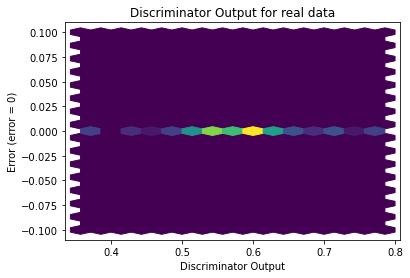

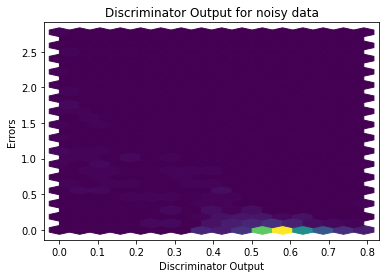

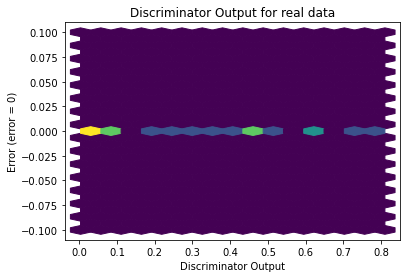

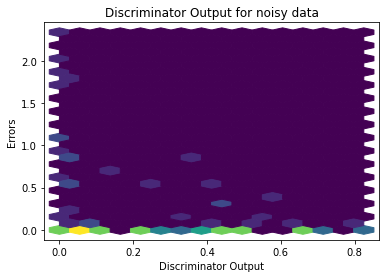

In [10]:
sanityChecks.discProbVsError(train_data,discriminator,device)
sanityChecks.discProbVsError(test_data,discriminator,device)